In [2]:
import os
import pandas as pd
import IPython.display as ipd
# import librosa
# import librosa.display
import music21
from musicir.rhythm.generate import Euclid, RhythmViewer
from musicir.rhythm import generate 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import copy
import glob
import random

Combinei com Flavio que vou incrementar o corpus adicionando notas de tensão. No entanto, preciso me atentar para que elas não dominem por completo cada compasso. Por isso, estipulamos um limite de 2 notas de tensão por acorde, que é realmente o que acontece em músicas da vida real.

In [3]:
semitons = list(range(0,12))
semitons.extend(list(range(0,12)))
semitons

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [4]:
notes = ['C','Db','D','Eb','E','F','Gb','G','Ab','A','Bb','B']

### Regras para as tensões

- No máximo 2 tensões por acorde
- Priorizar 9a
- Não podemos ter mais de um tipo da mesma tensão num acorde (ex.: 9 e b9)
- Tensões aparecem apenas em ritmos com mais de 4 articulações

### Ritmos euclidianos 

In [5]:
# criando um dicionário com cada ritmo e seu respectivo número de articulações
ritmos_dict = {}
for rhy in generate.traditional_rhythms.items():
    notas = rhy[1].beat[0].notes
    ritmos_dict[rhy[0]] =  len(notas)
    
ritmos_dict

{'fandango': 4,
 'cueca': 2,
 'khafif-e-ramal': 2,
 'cumbia': 3,
 'calypso': 3,
 'khalif-e-saghil': 3,
 'khafif-e-ramal_2': 3,
 'ruchenitza': 3,
 'tresillo': 3,
 'ruchenitza_2': 4,
 'aksak': 4,
 'outside_now': 4,
 'york-samai': 5,
 'Nawakhat': 5,
 'cinquillo': 5,
 'spanish_tango': 5,
 'al-saghil-al-sani': 5,
 'agsag-samai': 5,
 'venda': 5,
 'pictures_at_an_exhibition': 5,
 'venda_clapping': 5,
 'bossa-nova': 5,
 'bendir': 7,
 'mpre': 7,
 'samba': 7,
 'agogo-samba': 9,
 'ngbaka-maibo': 9,
 'aka': 11,
 'aka_upper_sangha': 13}

#### 5 ou mais articulações

In [6]:
ritmos = {ritmo: n_ataques for ritmo, n_ataques in ritmos_dict.items() if n_ataques > 4}
ritmos

{'york-samai': 5,
 'Nawakhat': 5,
 'cinquillo': 5,
 'spanish_tango': 5,
 'al-saghil-al-sani': 5,
 'agsag-samai': 5,
 'venda': 5,
 'pictures_at_an_exhibition': 5,
 'venda_clapping': 5,
 'bossa-nova': 5,
 'bendir': 7,
 'mpre': 7,
 'samba': 7,
 'agogo-samba': 9,
 'ngbaka-maibo': 9,
 'aka': 11,
 'aka_upper_sangha': 13}

Definindo a quantidade de semitons de cada tensão:

In [58]:
dict_9 = {1:'b9', 2:'9'}
dict_11 = {5:'11', 6:'#11'}
dict_13 = {8:'b13', 9:'13'}

dict_tensoes = {**dict_9, **dict_11, **dict_13}
dict_tensoes

{1: 'b9', 2: '9', 5: '11', 6: '#11', 8: 'b13', 9: '13'}

In [70]:
tensoes_list = []#dict_tensoes.keys()
for n, nome in dict_tensoes.items():
    tensoes_list.append(n)
    
tensoes_list

[1, 2, 5, 6, 8, 9]

Ideia de estruturação de código: se eu tiver apenas uma tensão, ela será a 9a, e só explorarei o primeiro dicionário (das nonas). Se tiver mais de uma tensão, sortearei duas do dicionário de todas as tensões e as adicionarei ao acorde.

In [ ]:
# dict_chords_tensions = {'maj7':['b9', ], 
#                         '7', 
#                         'min7', 
#                         'dim', 
#                         'meio_dim'}



### Acordes <font color ='red'> maiores </font> com sétima <font color ='red'> maior </font>

In [29]:
np.random.choice(tensoes_list, 1)[0]

'#11'

In [57]:
list(dict_9.values())

[1, 2]

In [78]:
tensoes_list

[1, 2, 5, 6, 8, 9]

In [82]:
dict_tensoes

{1: 'b9', 2: '9', 5: '11', 6: '#11', 8: 'b13', 9: '13'}

In [61]:
acorde_dict

{11: 'B4', 3: 'Eb5', 6: 'Gb5', 10: 'Bb5'}

Playing corpus/generated_chords/audio_tensions/maj7/Cmaj7_york-samai_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Cmaj7_york-samai_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


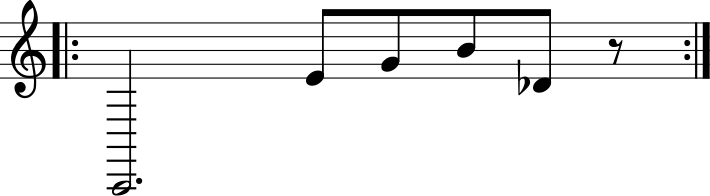

Playing corpus/generated_chords/audio_tensions/maj7/Dbmaj7_york-samai_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dbmaj7_york-samai_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


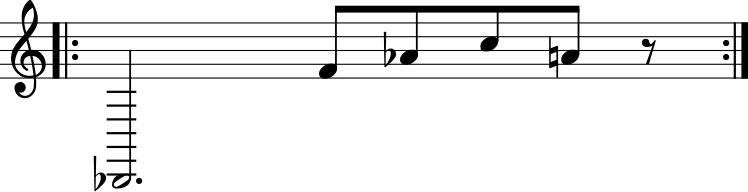

Playing corpus/generated_chords/audio_tensions/maj7/Dmaj7_york-samai_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dmaj7_york-samai_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


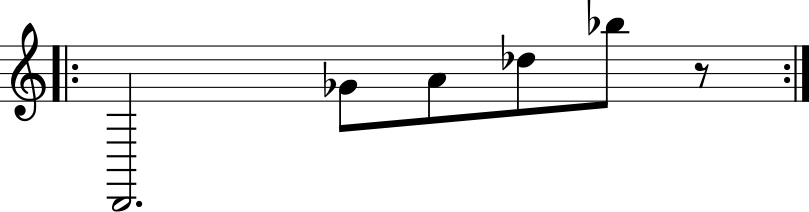

Playing corpus/generated_chords/audio_tensions/maj7/Ebmaj7_york-samai_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Ebmaj7_york-samai_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


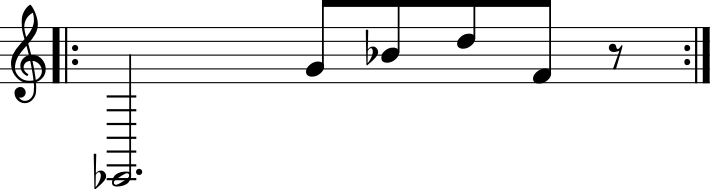

Playing corpus/generated_chords/audio_tensions/maj7/Emaj7_york-samai_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Emaj7_york-samai_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


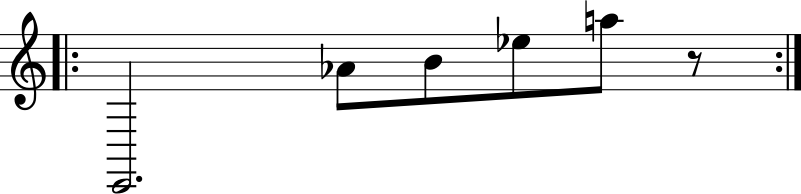

Playing corpus/generated_chords/audio_tensions/maj7/Fmaj7_york-samai_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Fmaj7_york-samai_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


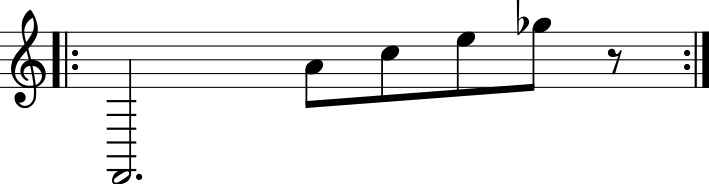

Playing corpus/generated_chords/audio_tensions/maj7/Gbmaj7_york-samai_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gbmaj7_york-samai_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


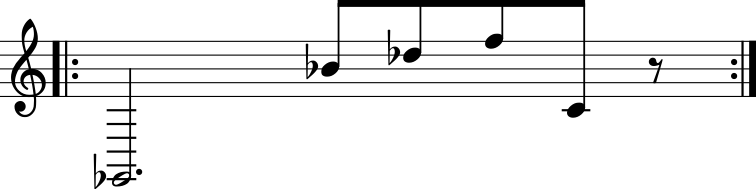

Playing corpus/generated_chords/audio_tensions/maj7/Gmaj7_york-samai_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gmaj7_york-samai_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


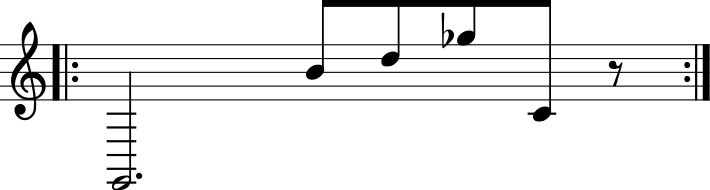

Playing corpus/generated_chords/audio_tensions/maj7/Abmaj7_york-samai_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Abmaj7_york-samai_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


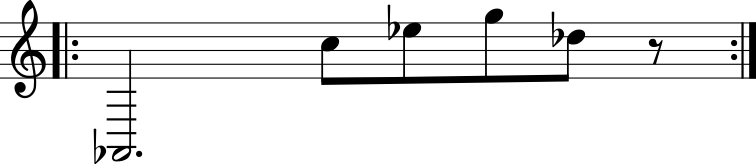

Playing corpus/generated_chords/audio_tensions/maj7/Amaj7_york-samai_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Amaj7_york-samai_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


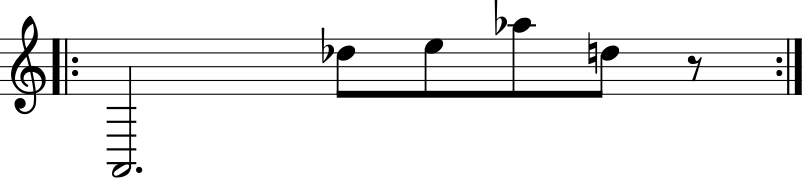

Playing corpus/generated_chords/audio_tensions/maj7/Bbmaj7_york-samai_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bbmaj7_york-samai_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


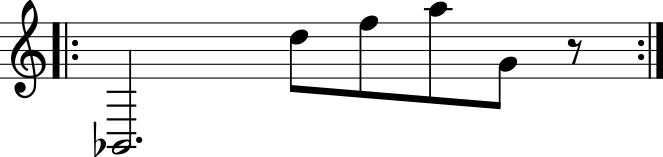

Playing corpus/generated_chords/audio_tensions/maj7/Bmaj7_york-samai_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bmaj7_york-samai_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


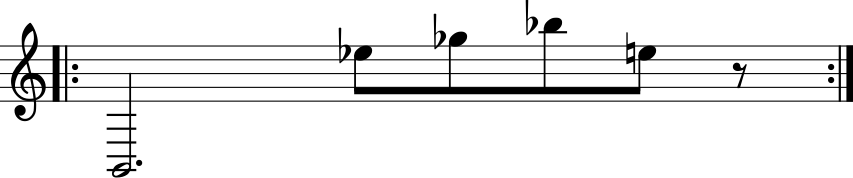

Playing corpus/generated_chords/audio_tensions/maj7/Cmaj7_Nawakhat_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Cmaj7_Nawakhat_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


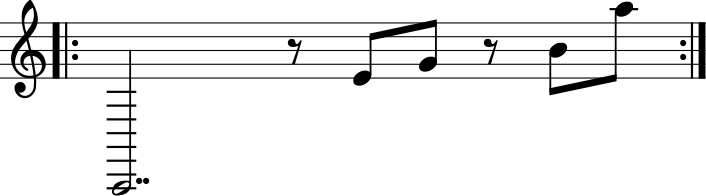

Playing corpus/generated_chords/audio_tensions/maj7/Dbmaj7_Nawakhat_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dbmaj7_Nawakhat_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


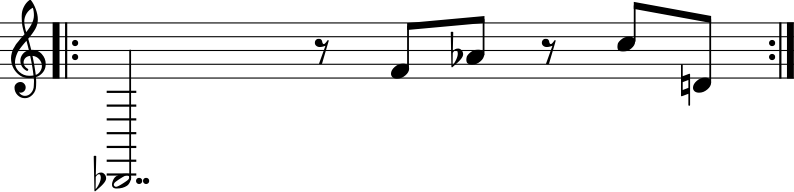

Playing corpus/generated_chords/audio_tensions/maj7/Dmaj7_Nawakhat_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dmaj7_Nawakhat_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


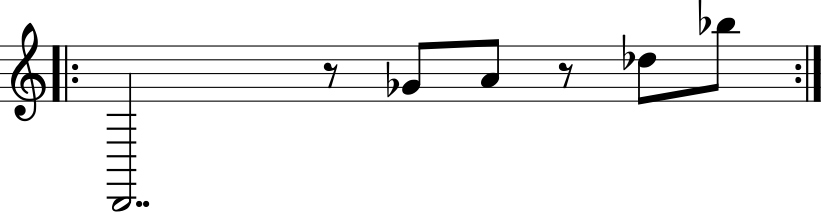

Playing corpus/generated_chords/audio_tensions/maj7/Ebmaj7_Nawakhat_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Ebmaj7_Nawakhat_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


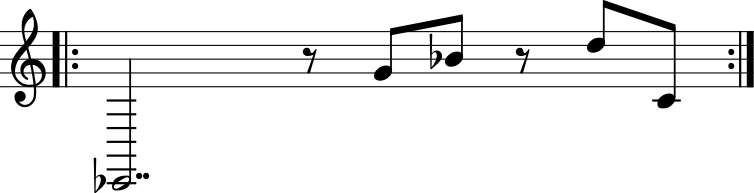

Playing corpus/generated_chords/audio_tensions/maj7/Emaj7_Nawakhat_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Emaj7_Nawakhat_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


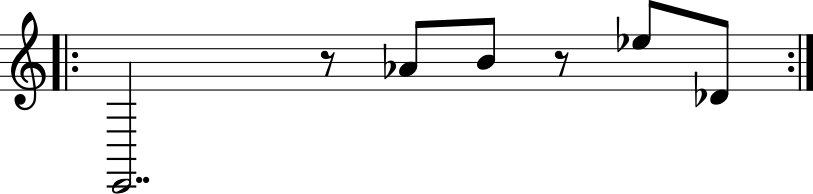

Playing corpus/generated_chords/audio_tensions/maj7/Fmaj7_Nawakhat_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Fmaj7_Nawakhat_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


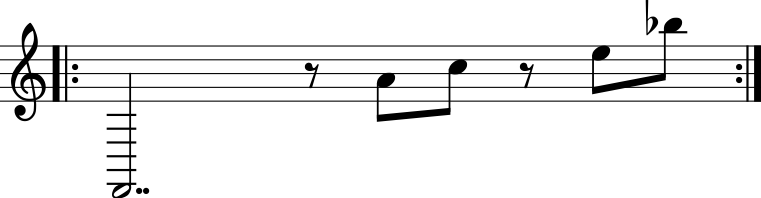

Playing corpus/generated_chords/audio_tensions/maj7/Gbmaj7_Nawakhat_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gbmaj7_Nawakhat_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


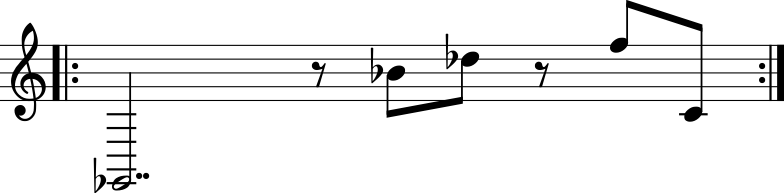

Playing corpus/generated_chords/audio_tensions/maj7/Gmaj7_Nawakhat_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gmaj7_Nawakhat_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


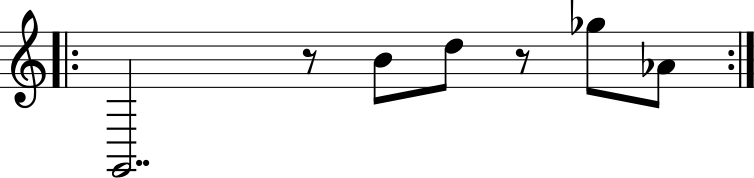

Playing corpus/generated_chords/audio_tensions/maj7/Abmaj7_Nawakhat_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Abmaj7_Nawakhat_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


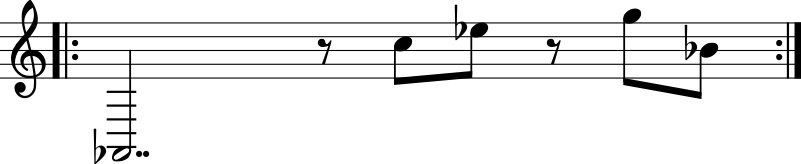

Playing corpus/generated_chords/audio_tensions/maj7/Amaj7_Nawakhat_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Amaj7_Nawakhat_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


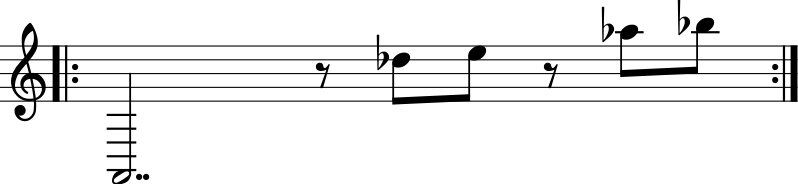

Playing corpus/generated_chords/audio_tensions/maj7/Bbmaj7_Nawakhat_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bbmaj7_Nawakhat_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


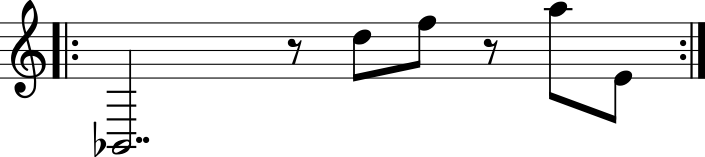

Playing corpus/generated_chords/audio_tensions/maj7/Bmaj7_Nawakhat_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bmaj7_Nawakhat_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


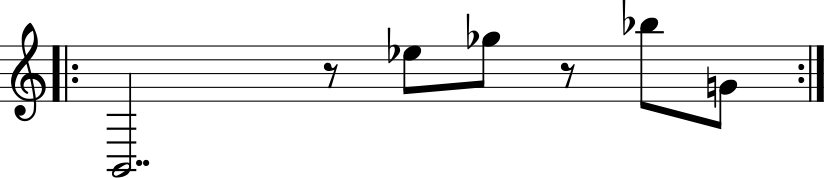

Playing corpus/generated_chords/audio_tensions/maj7/Cmaj7_cinquillo_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Cmaj7_cinquillo_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


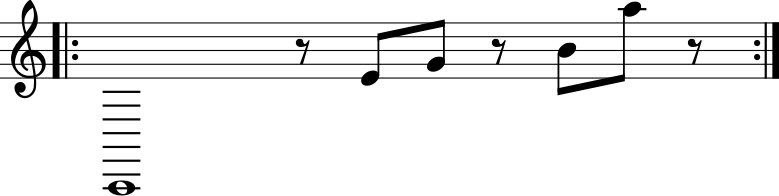

Playing corpus/generated_chords/audio_tensions/maj7/Dbmaj7_cinquillo_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dbmaj7_cinquillo_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


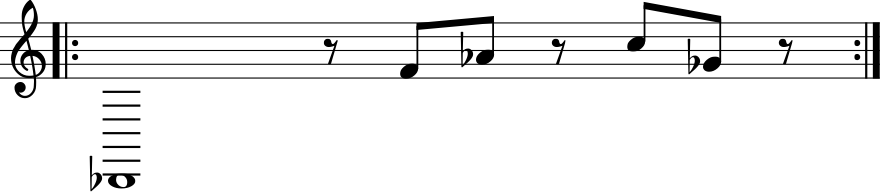

Playing corpus/generated_chords/audio_tensions/maj7/Dmaj7_cinquillo_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dmaj7_cinquillo_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


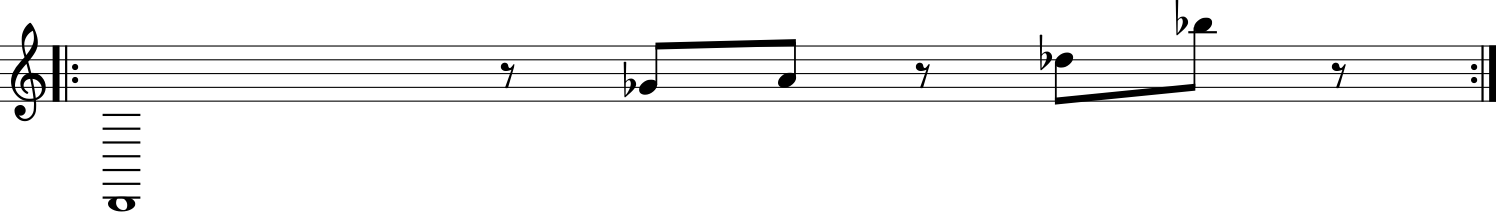

Playing corpus/generated_chords/audio_tensions/maj7/Ebmaj7_cinquillo_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Ebmaj7_cinquillo_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


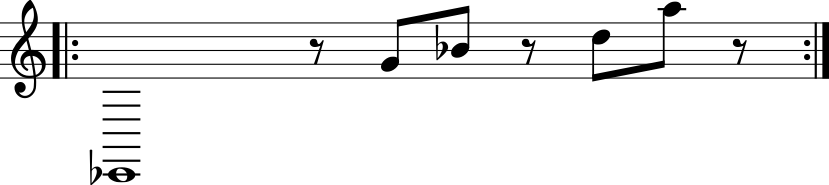

Playing corpus/generated_chords/audio_tensions/maj7/Emaj7_cinquillo_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Emaj7_cinquillo_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


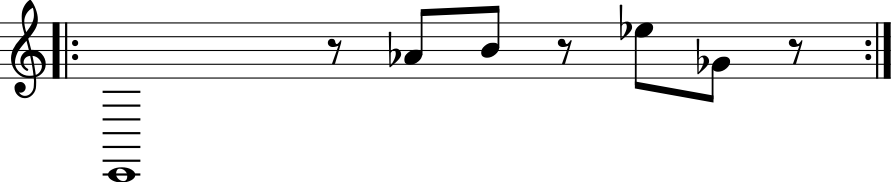

Playing corpus/generated_chords/audio_tensions/maj7/Fmaj7_cinquillo_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Fmaj7_cinquillo_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


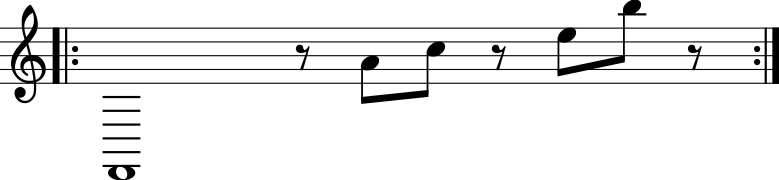

Playing corpus/generated_chords/audio_tensions/maj7/Gbmaj7_cinquillo_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gbmaj7_cinquillo_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


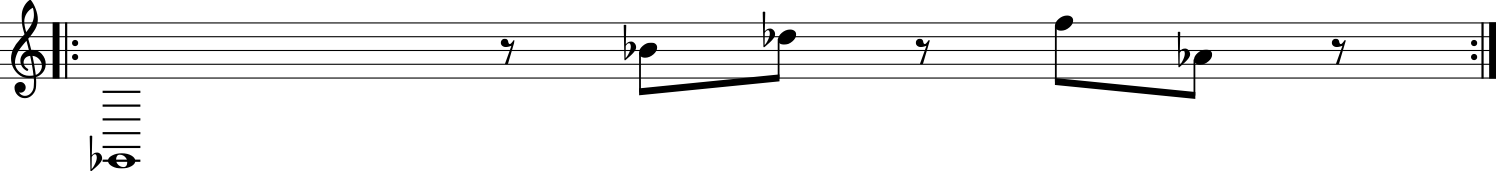

Playing corpus/generated_chords/audio_tensions/maj7/Gmaj7_cinquillo_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gmaj7_cinquillo_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


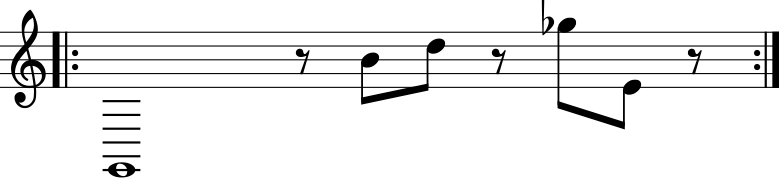

Playing corpus/generated_chords/audio_tensions/maj7/Abmaj7_cinquillo_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Abmaj7_cinquillo_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


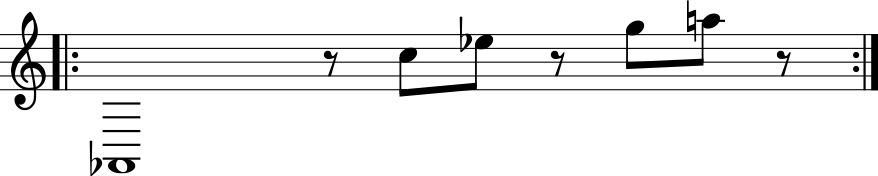

Playing corpus/generated_chords/audio_tensions/maj7/Amaj7_cinquillo_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Amaj7_cinquillo_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


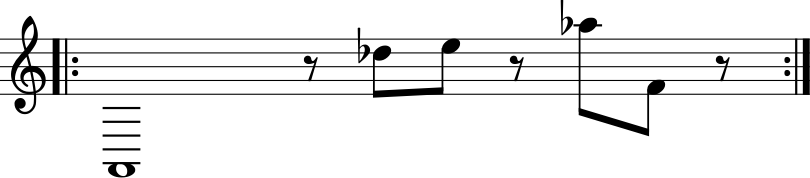

Playing corpus/generated_chords/audio_tensions/maj7/Bbmaj7_cinquillo_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bbmaj7_cinquillo_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


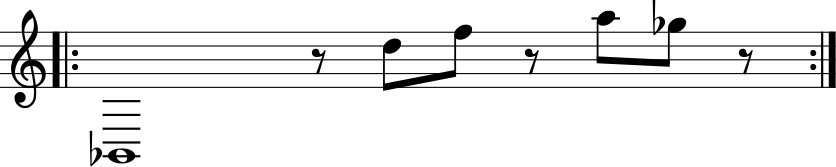

Playing corpus/generated_chords/audio_tensions/maj7/Bmaj7_cinquillo_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bmaj7_cinquillo_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


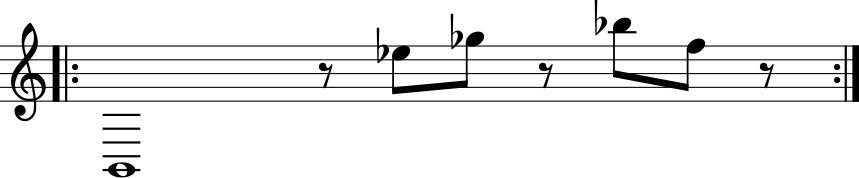

Playing corpus/generated_chords/audio_tensions/maj7/Cmaj7_spanish_tango_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Cmaj7_spanish_tango_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


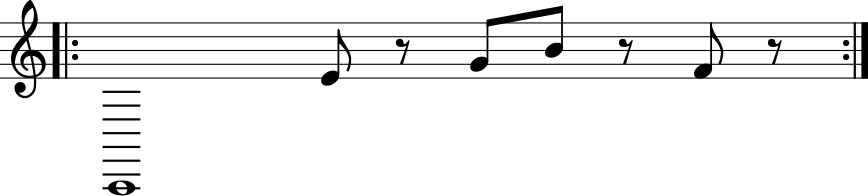

Playing corpus/generated_chords/audio_tensions/maj7/Dbmaj7_spanish_tango_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dbmaj7_spanish_tango_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


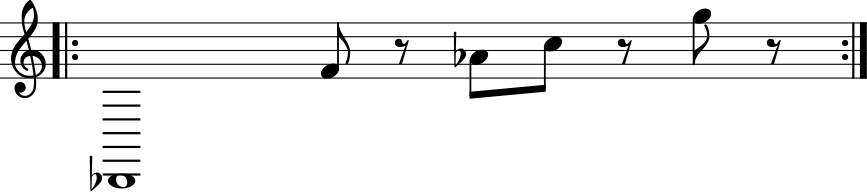

Playing corpus/generated_chords/audio_tensions/maj7/Dmaj7_spanish_tango_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dmaj7_spanish_tango_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


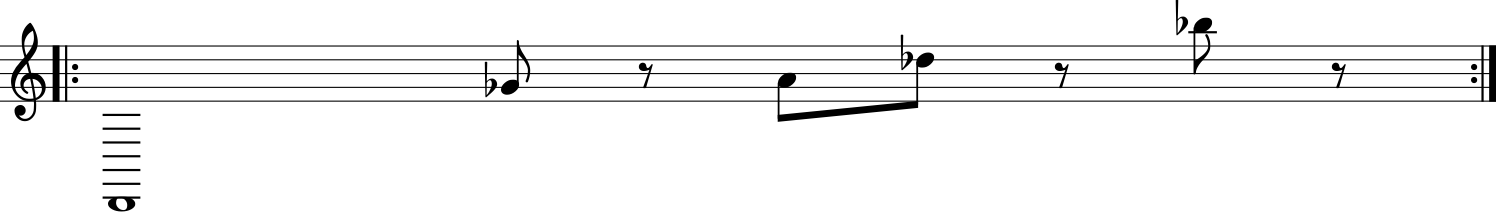

Playing corpus/generated_chords/audio_tensions/maj7/Ebmaj7_spanish_tango_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Ebmaj7_spanish_tango_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


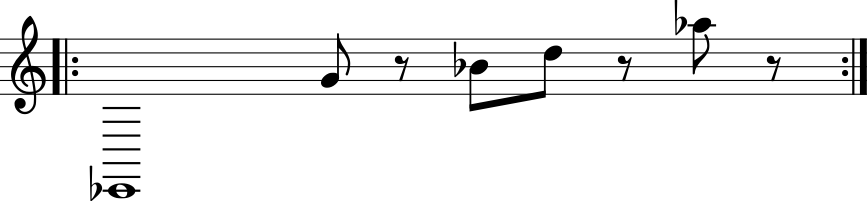

Playing corpus/generated_chords/audio_tensions/maj7/Emaj7_spanish_tango_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Emaj7_spanish_tango_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


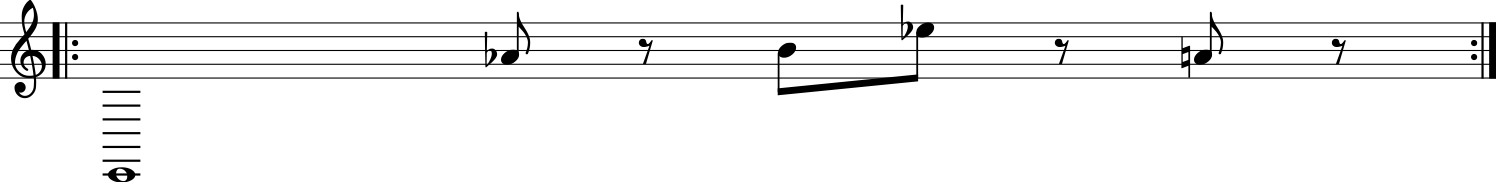

Playing corpus/generated_chords/audio_tensions/maj7/Fmaj7_spanish_tango_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Fmaj7_spanish_tango_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


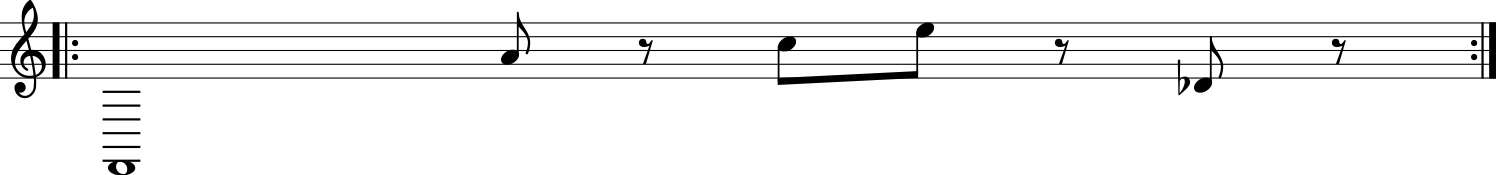

Playing corpus/generated_chords/audio_tensions/maj7/Gbmaj7_spanish_tango_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gbmaj7_spanish_tango_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


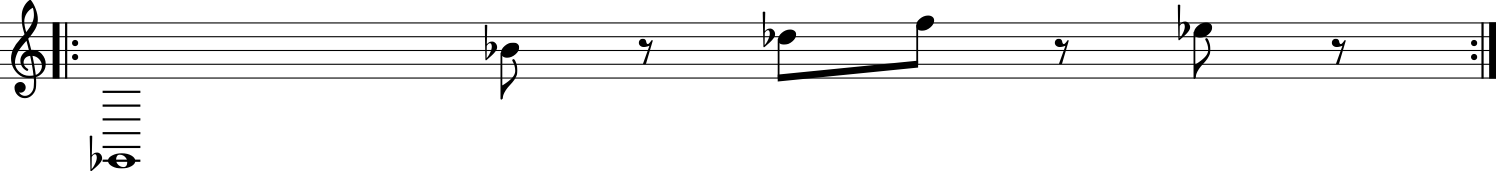

Playing corpus/generated_chords/audio_tensions/maj7/Gmaj7_spanish_tango_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gmaj7_spanish_tango_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


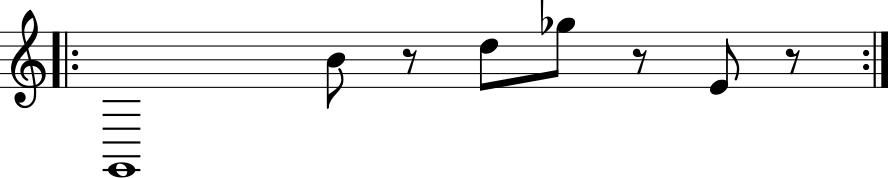

Playing corpus/generated_chords/audio_tensions/maj7/Abmaj7_spanish_tango_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Abmaj7_spanish_tango_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


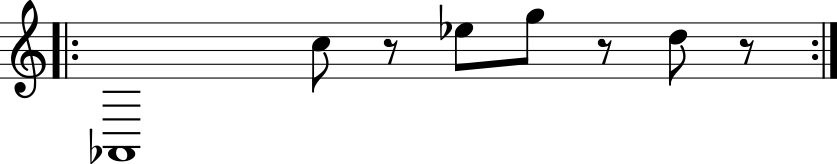

Playing corpus/generated_chords/audio_tensions/maj7/Amaj7_spanish_tango_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Amaj7_spanish_tango_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


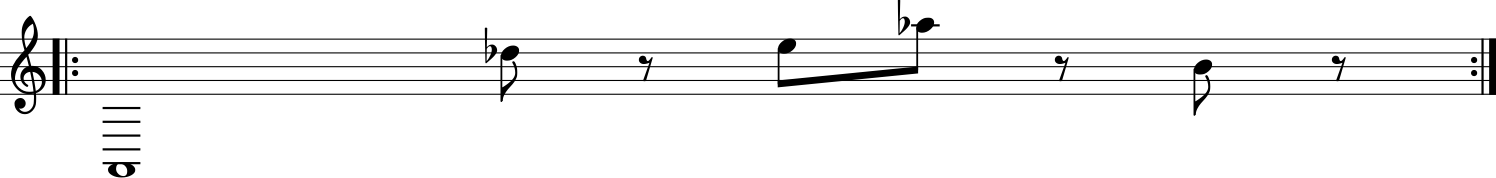

Playing corpus/generated_chords/audio_tensions/maj7/Bbmaj7_spanish_tango_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bbmaj7_spanish_tango_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


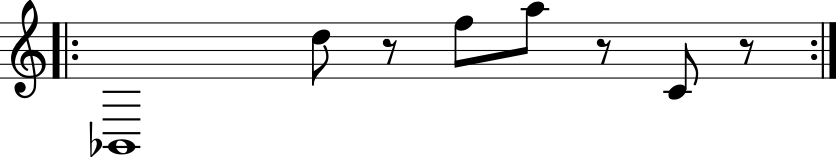

Playing corpus/generated_chords/audio_tensions/maj7/Bmaj7_spanish_tango_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bmaj7_spanish_tango_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


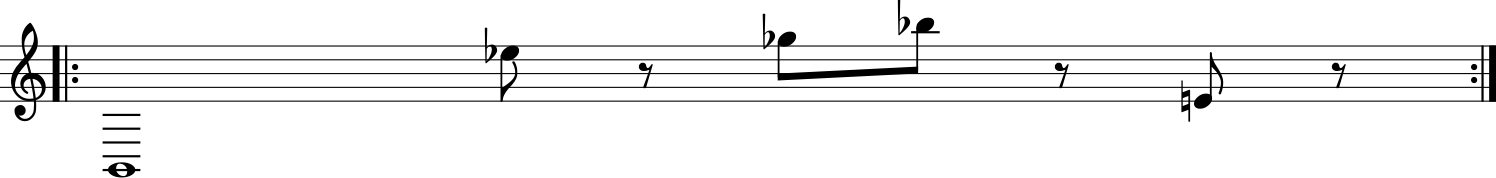

Playing corpus/generated_chords/audio_tensions/maj7/Cmaj7_al-saghil-al-sani_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Cmaj7_al-saghil-al-sani_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


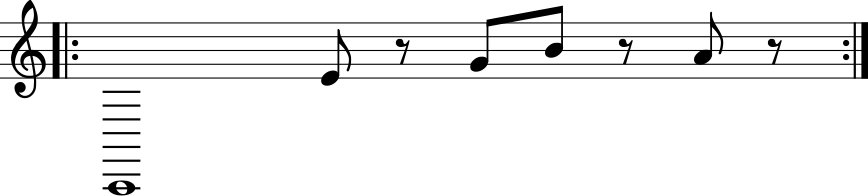

Playing corpus/generated_chords/audio_tensions/maj7/Dbmaj7_al-saghil-al-sani_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dbmaj7_al-saghil-al-sani_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


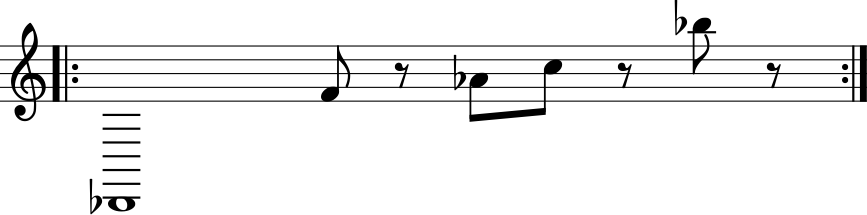

Playing corpus/generated_chords/audio_tensions/maj7/Dmaj7_al-saghil-al-sani_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dmaj7_al-saghil-al-sani_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


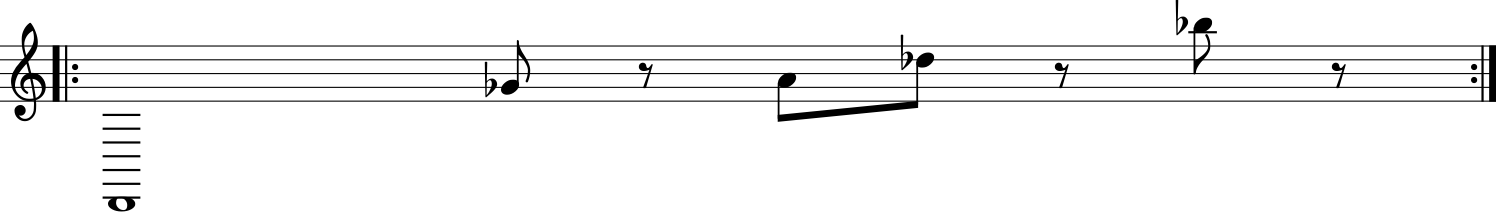

Playing corpus/generated_chords/audio_tensions/maj7/Ebmaj7_al-saghil-al-sani_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Ebmaj7_al-saghil-al-sani_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


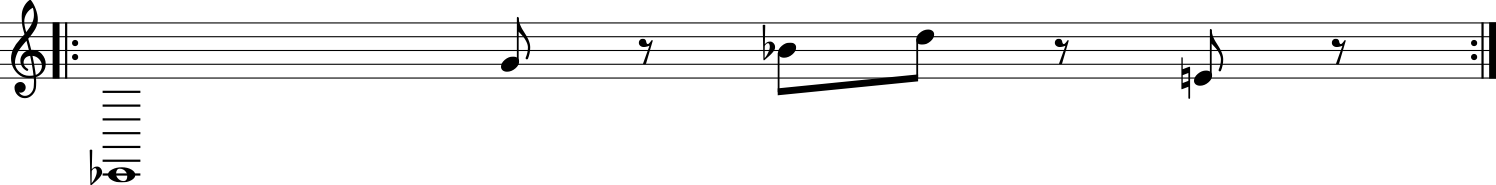

Playing corpus/generated_chords/audio_tensions/maj7/Emaj7_al-saghil-al-sani_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Emaj7_al-saghil-al-sani_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


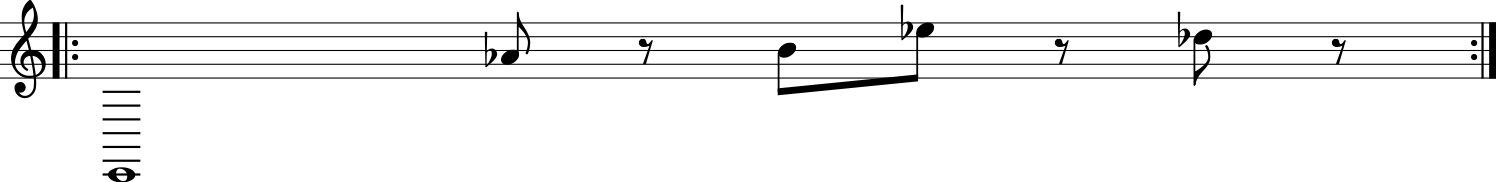

Playing corpus/generated_chords/audio_tensions/maj7/Fmaj7_al-saghil-al-sani_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Fmaj7_al-saghil-al-sani_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


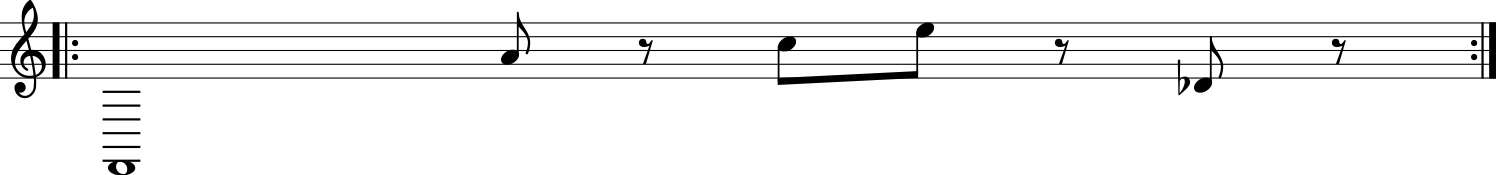

Playing corpus/generated_chords/audio_tensions/maj7/Gbmaj7_al-saghil-al-sani_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gbmaj7_al-saghil-al-sani_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


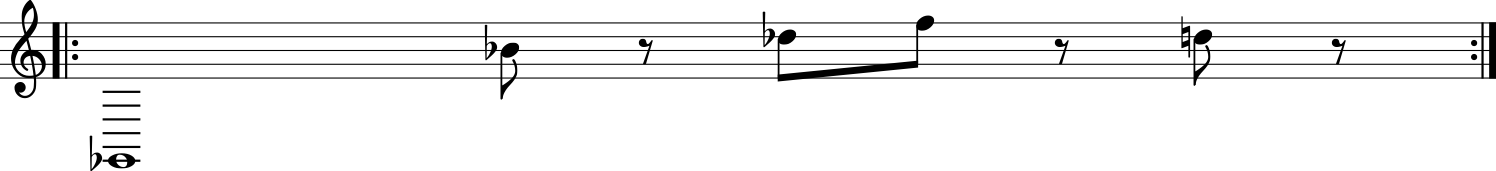

Playing corpus/generated_chords/audio_tensions/maj7/Gmaj7_al-saghil-al-sani_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gmaj7_al-saghil-al-sani_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


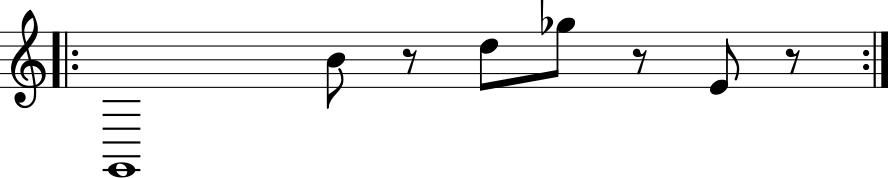

Playing corpus/generated_chords/audio_tensions/maj7/Abmaj7_al-saghil-al-sani_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Abmaj7_al-saghil-al-sani_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


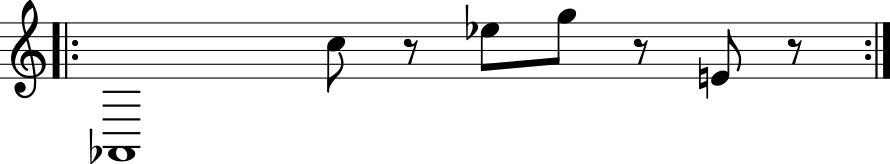

Playing corpus/generated_chords/audio_tensions/maj7/Amaj7_al-saghil-al-sani_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Amaj7_al-saghil-al-sani_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


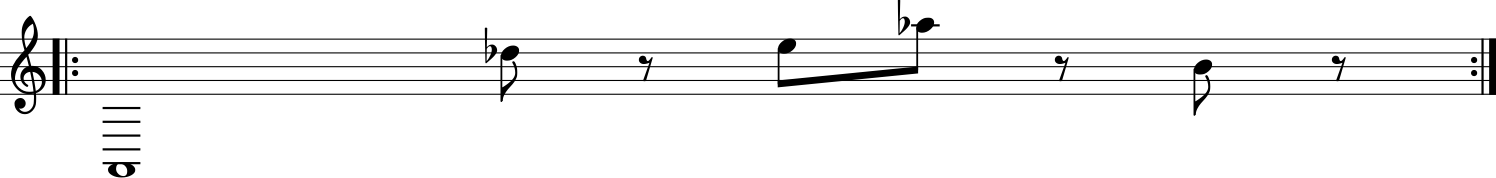

Playing corpus/generated_chords/audio_tensions/maj7/Bbmaj7_al-saghil-al-sani_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bbmaj7_al-saghil-al-sani_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


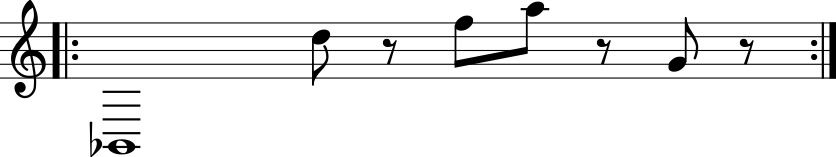

Playing corpus/generated_chords/audio_tensions/maj7/Bmaj7_al-saghil-al-sani_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bmaj7_al-saghil-al-sani_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


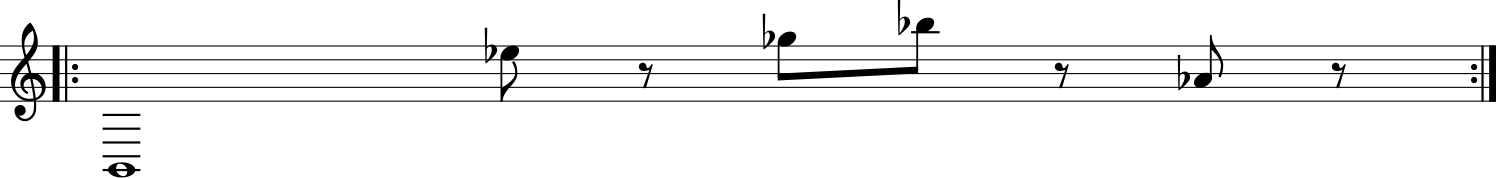

Playing corpus/generated_chords/audio_tensions/maj7/Cmaj7_agsag-samai_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Cmaj7_agsag-samai_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


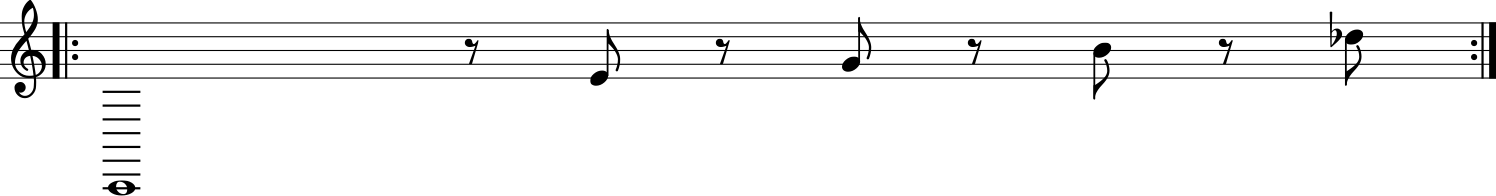

Playing corpus/generated_chords/audio_tensions/maj7/Dbmaj7_agsag-samai_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dbmaj7_agsag-samai_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


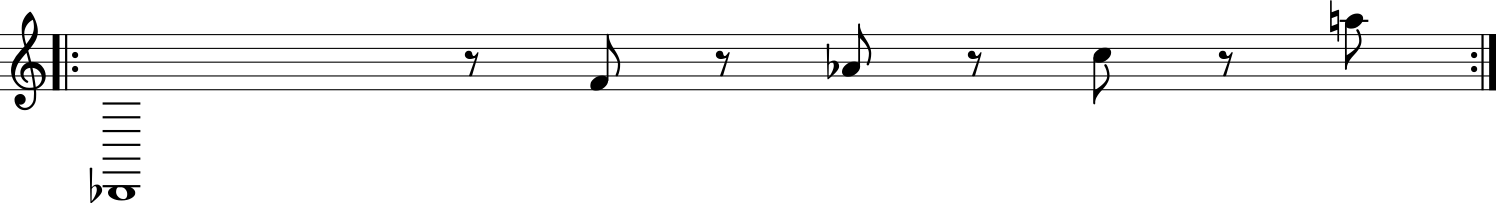

Playing corpus/generated_chords/audio_tensions/maj7/Dmaj7_agsag-samai_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dmaj7_agsag-samai_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


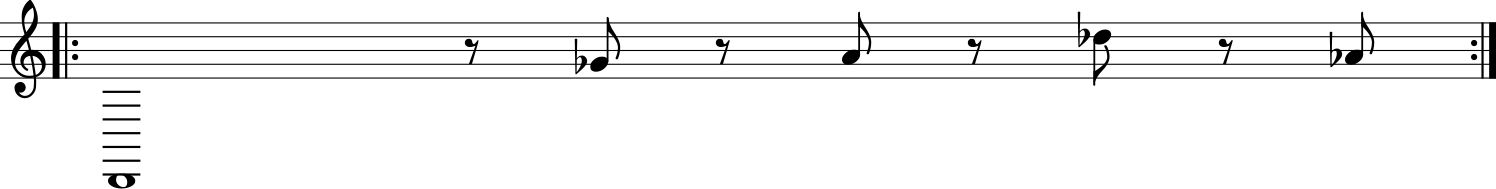

Playing corpus/generated_chords/audio_tensions/maj7/Ebmaj7_agsag-samai_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Ebmaj7_agsag-samai_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


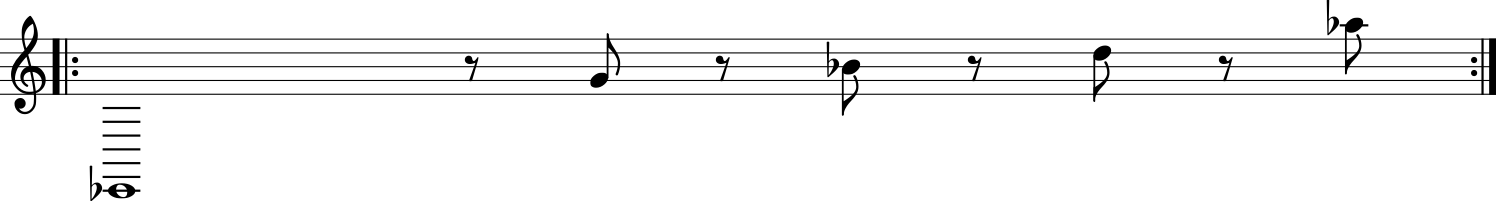

Playing corpus/generated_chords/audio_tensions/maj7/Emaj7_agsag-samai_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Emaj7_agsag-samai_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


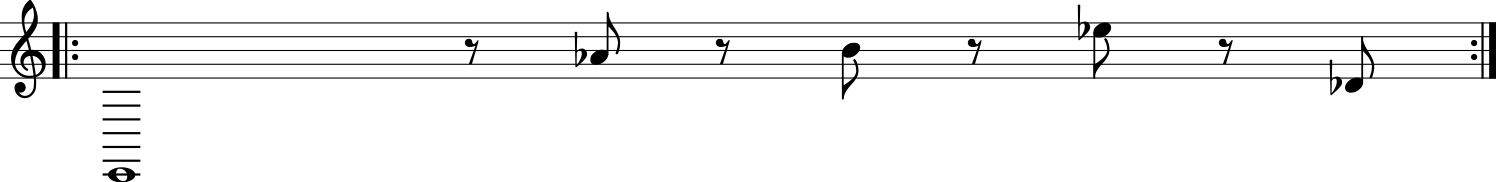

Playing corpus/generated_chords/audio_tensions/maj7/Fmaj7_agsag-samai_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Fmaj7_agsag-samai_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


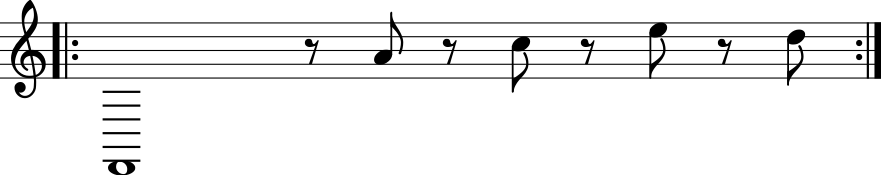

Playing corpus/generated_chords/audio_tensions/maj7/Gbmaj7_agsag-samai_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gbmaj7_agsag-samai_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


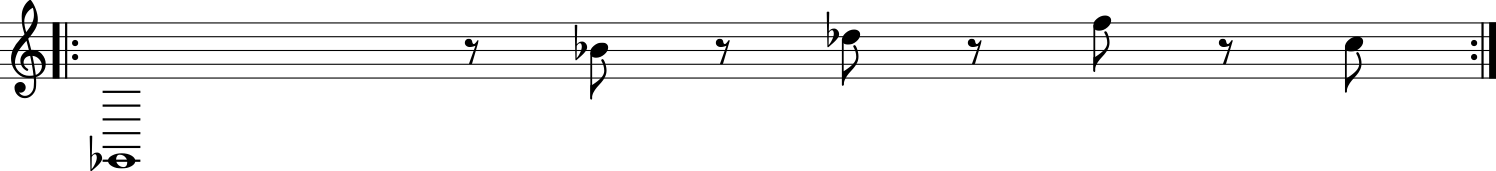

Playing corpus/generated_chords/audio_tensions/maj7/Gmaj7_agsag-samai_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gmaj7_agsag-samai_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


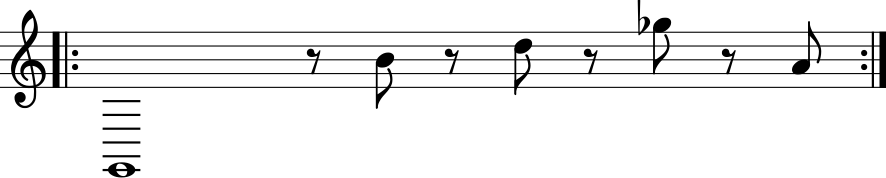

Playing corpus/generated_chords/audio_tensions/maj7/Abmaj7_agsag-samai_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Abmaj7_agsag-samai_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


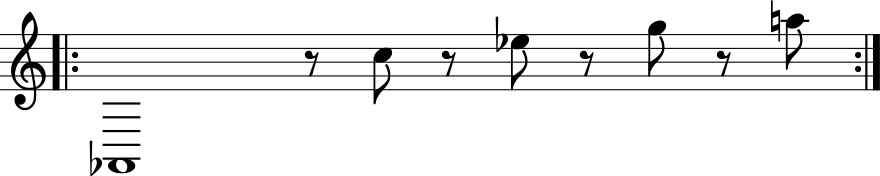

Playing corpus/generated_chords/audio_tensions/maj7/Amaj7_agsag-samai_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Amaj7_agsag-samai_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


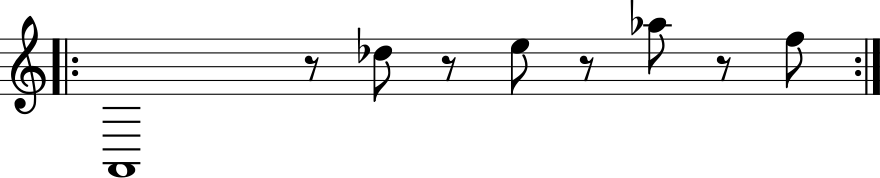

Playing corpus/generated_chords/audio_tensions/maj7/Bbmaj7_agsag-samai_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bbmaj7_agsag-samai_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


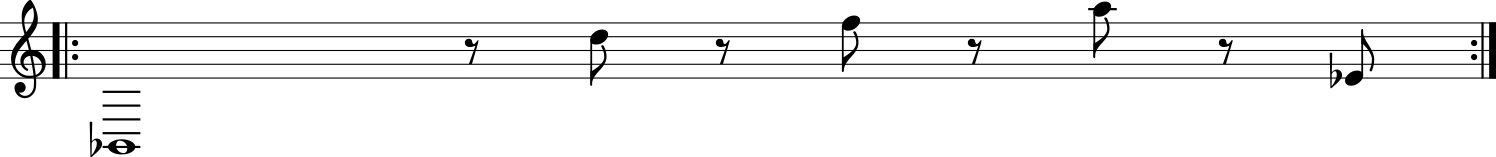

Playing corpus/generated_chords/audio_tensions/maj7/Bmaj7_agsag-samai_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bmaj7_agsag-samai_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


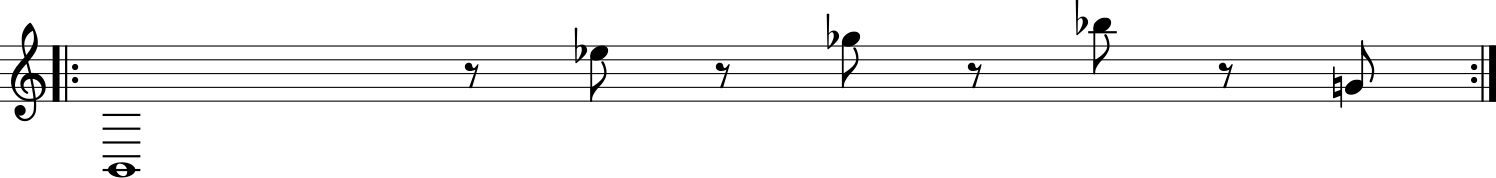

Playing corpus/generated_chords/audio_tensions/maj7/Cmaj7_venda_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Cmaj7_venda_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


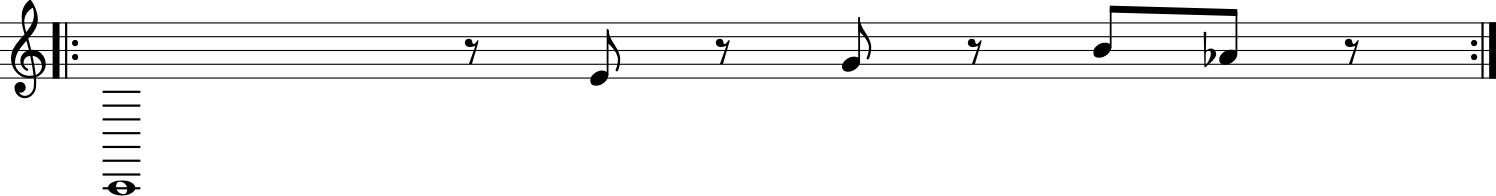

Playing corpus/generated_chords/audio_tensions/maj7/Dbmaj7_venda_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dbmaj7_venda_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


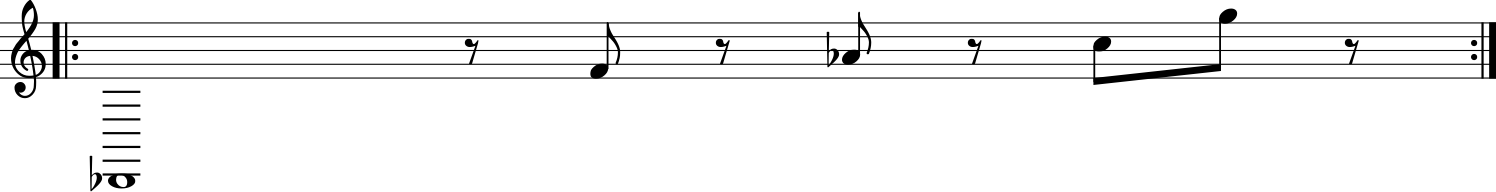

Playing corpus/generated_chords/audio_tensions/maj7/Dmaj7_venda_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dmaj7_venda_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


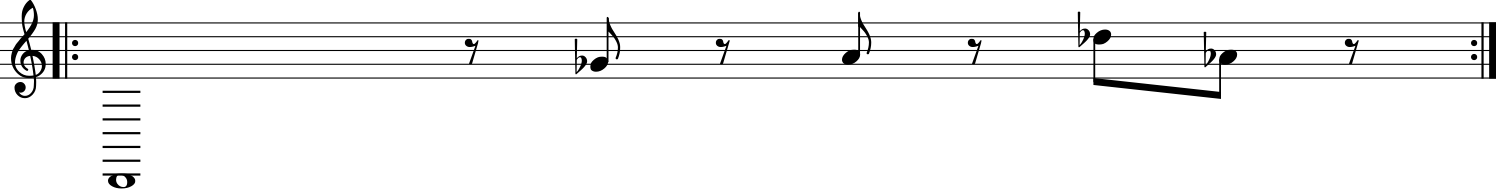

Playing corpus/generated_chords/audio_tensions/maj7/Ebmaj7_venda_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Ebmaj7_venda_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


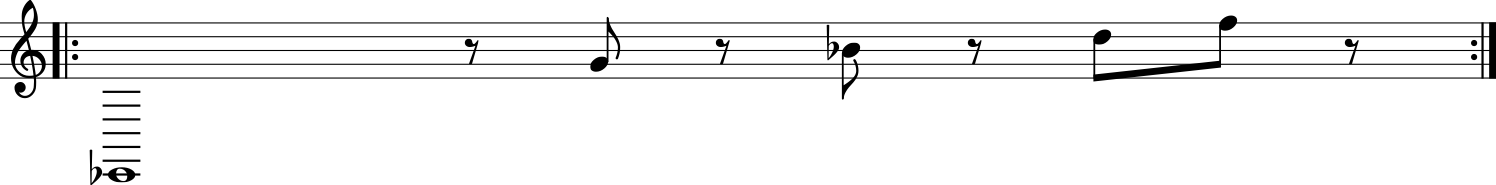

Playing corpus/generated_chords/audio_tensions/maj7/Emaj7_venda_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Emaj7_venda_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


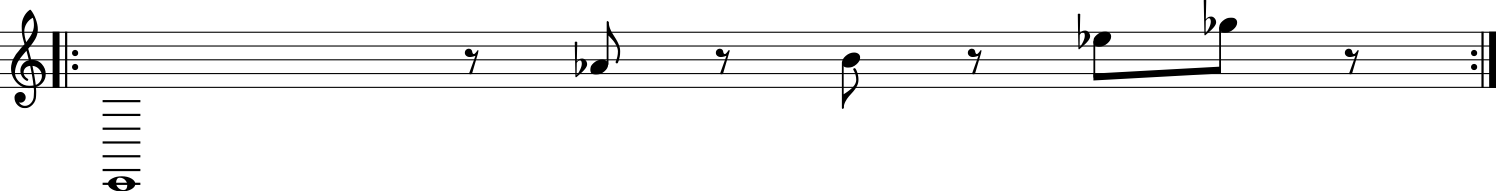

Playing corpus/generated_chords/audio_tensions/maj7/Fmaj7_venda_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Fmaj7_venda_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


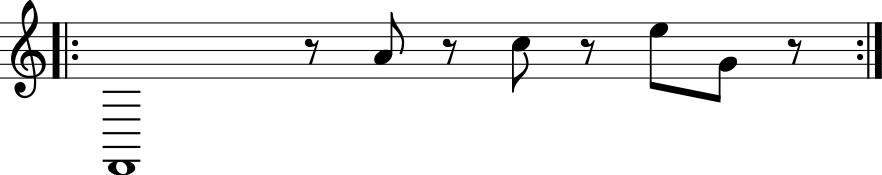

Playing corpus/generated_chords/audio_tensions/maj7/Gbmaj7_venda_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gbmaj7_venda_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


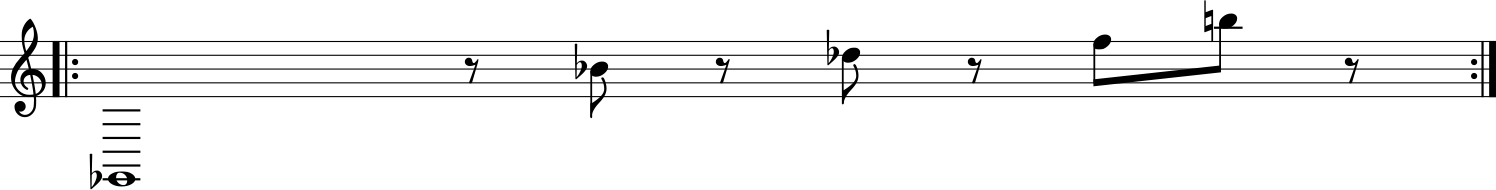

Playing corpus/generated_chords/audio_tensions/maj7/Gmaj7_venda_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gmaj7_venda_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


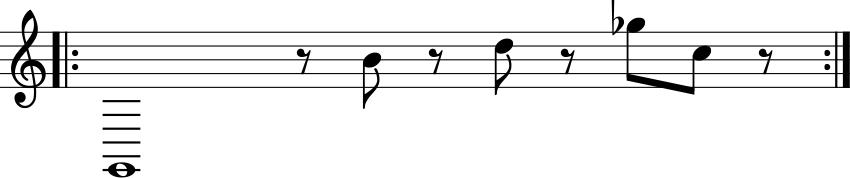

Playing corpus/generated_chords/audio_tensions/maj7/Abmaj7_venda_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Abmaj7_venda_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


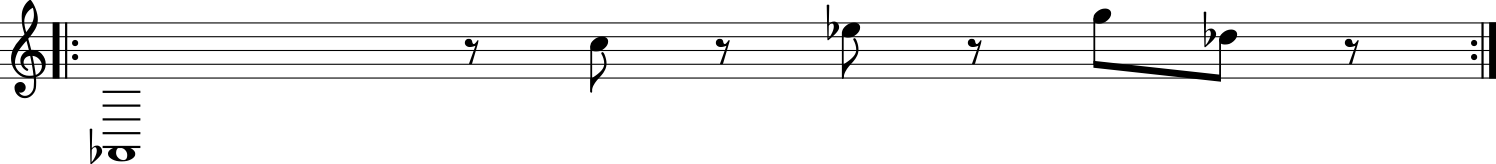

Playing corpus/generated_chords/audio_tensions/maj7/Amaj7_venda_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Amaj7_venda_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


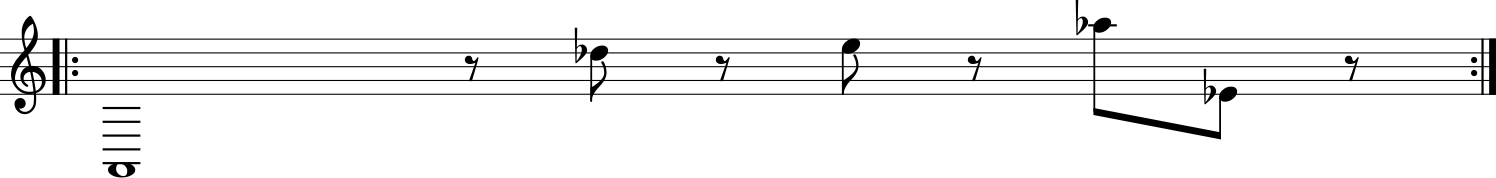

Playing corpus/generated_chords/audio_tensions/maj7/Bbmaj7_venda_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bbmaj7_venda_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


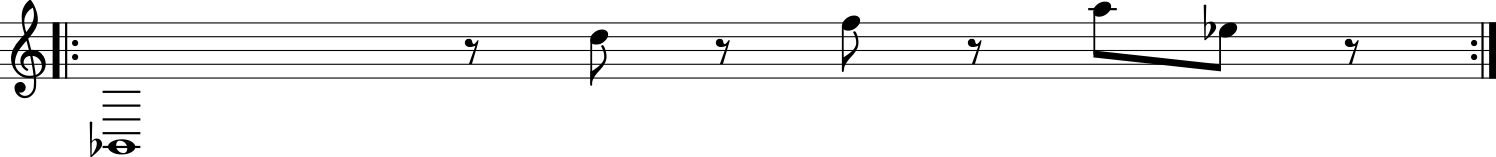

Playing corpus/generated_chords/audio_tensions/maj7/Bmaj7_venda_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bmaj7_venda_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


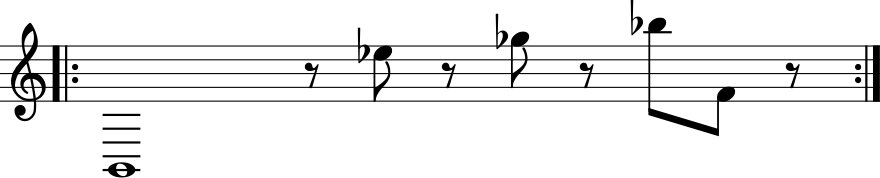

Playing corpus/generated_chords/audio_tensions/maj7/Cmaj7_pictures_at_an_exhibition_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Cmaj7_pictures_at_an_exhibition_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


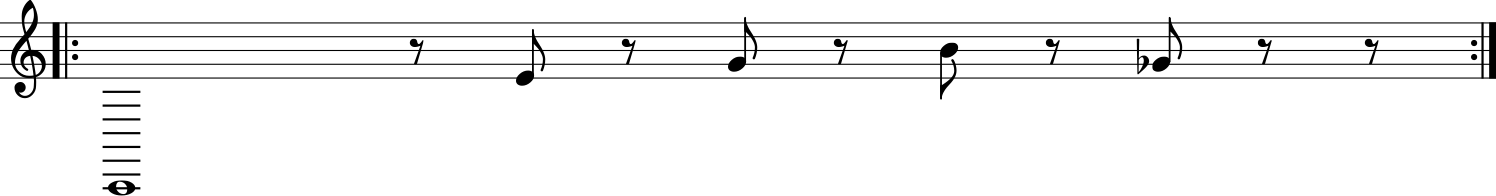

Playing corpus/generated_chords/audio_tensions/maj7/Dbmaj7_pictures_at_an_exhibition_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dbmaj7_pictures_at_an_exhibition_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


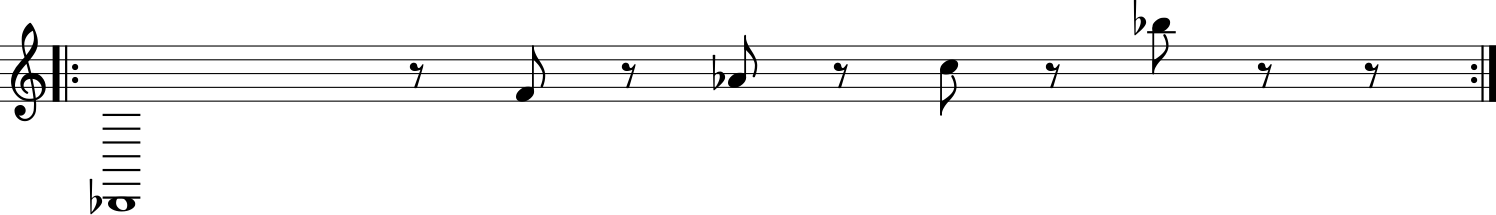

Playing corpus/generated_chords/audio_tensions/maj7/Dmaj7_pictures_at_an_exhibition_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dmaj7_pictures_at_an_exhibition_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


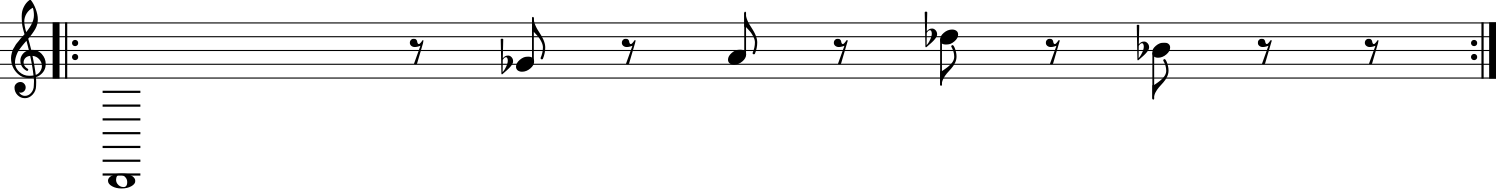

Playing corpus/generated_chords/audio_tensions/maj7/Ebmaj7_pictures_at_an_exhibition_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Ebmaj7_pictures_at_an_exhibition_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


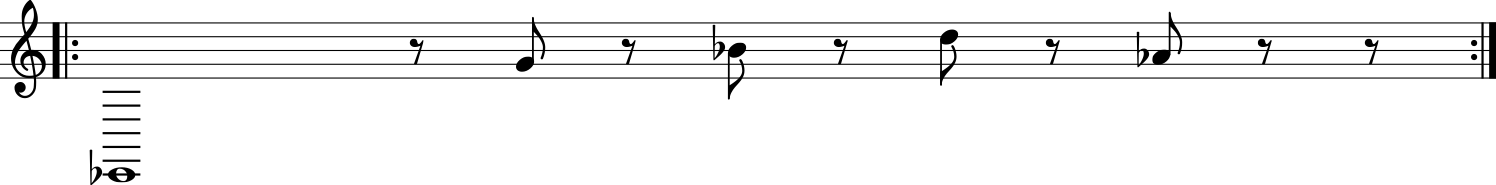

Playing corpus/generated_chords/audio_tensions/maj7/Emaj7_pictures_at_an_exhibition_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Emaj7_pictures_at_an_exhibition_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


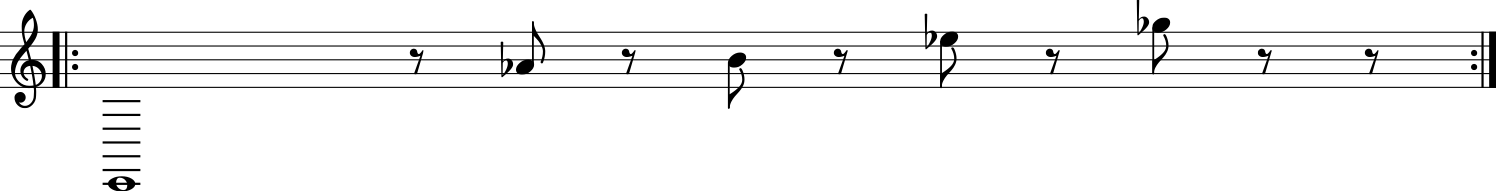

Playing corpus/generated_chords/audio_tensions/maj7/Fmaj7_pictures_at_an_exhibition_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Fmaj7_pictures_at_an_exhibition_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


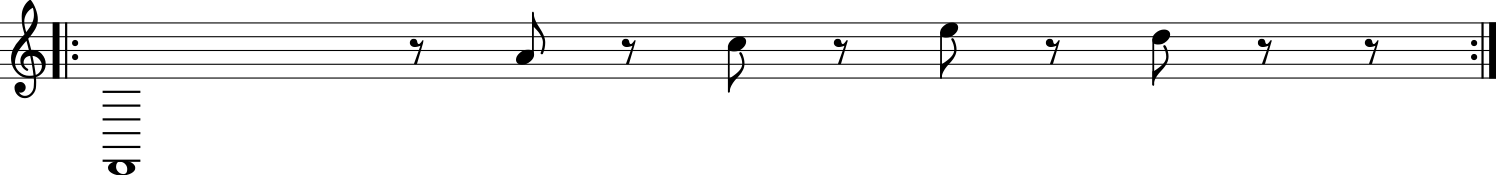

Playing corpus/generated_chords/audio_tensions/maj7/Gbmaj7_pictures_at_an_exhibition_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gbmaj7_pictures_at_an_exhibition_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


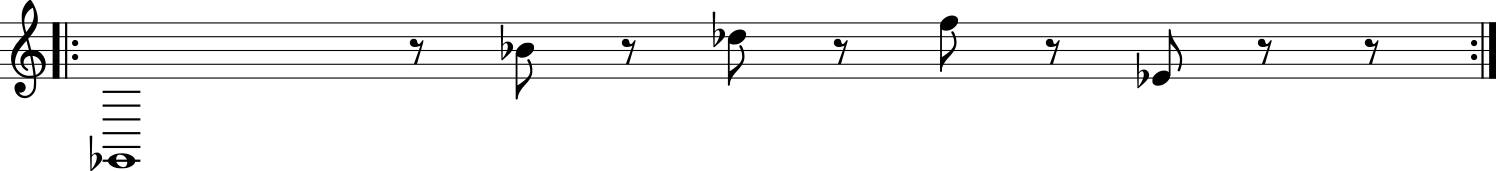

Playing corpus/generated_chords/audio_tensions/maj7/Gmaj7_pictures_at_an_exhibition_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gmaj7_pictures_at_an_exhibition_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


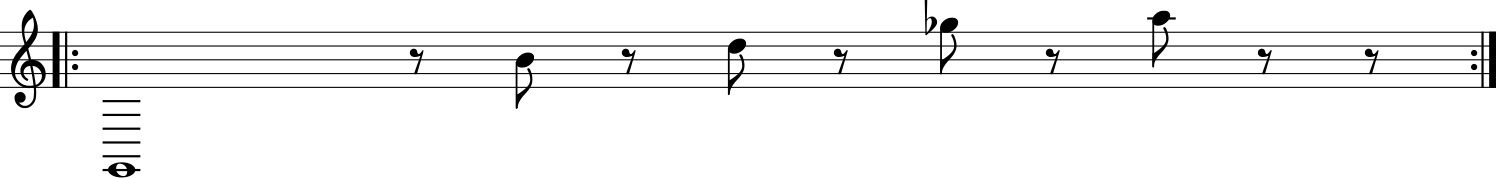

Playing corpus/generated_chords/audio_tensions/maj7/Abmaj7_pictures_at_an_exhibition_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Abmaj7_pictures_at_an_exhibition_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


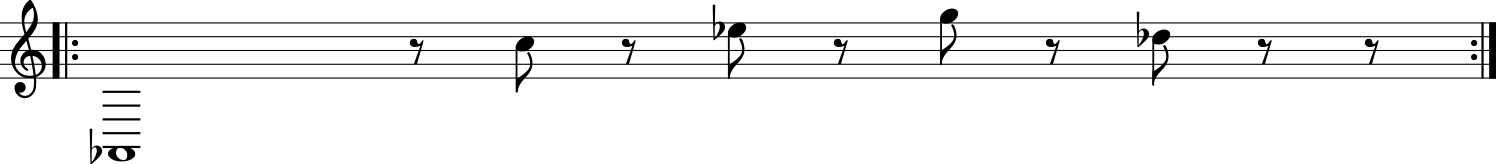

Playing corpus/generated_chords/audio_tensions/maj7/Amaj7_pictures_at_an_exhibition_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Amaj7_pictures_at_an_exhibition_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


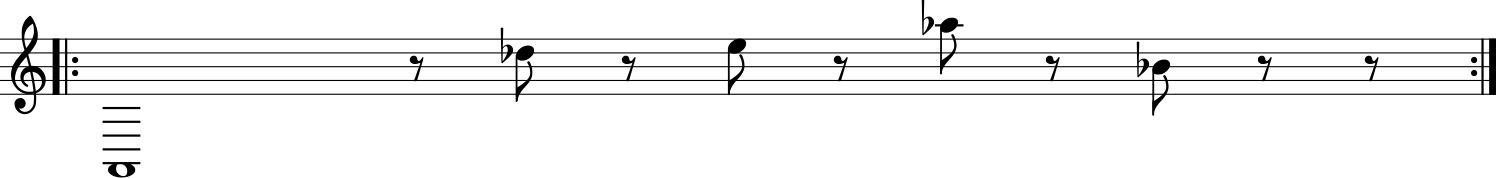

Playing corpus/generated_chords/audio_tensions/maj7/Bbmaj7_pictures_at_an_exhibition_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bbmaj7_pictures_at_an_exhibition_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


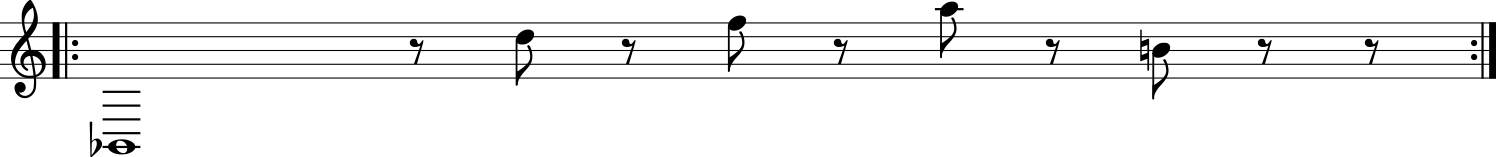

Playing corpus/generated_chords/audio_tensions/maj7/Bmaj7_pictures_at_an_exhibition_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bmaj7_pictures_at_an_exhibition_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


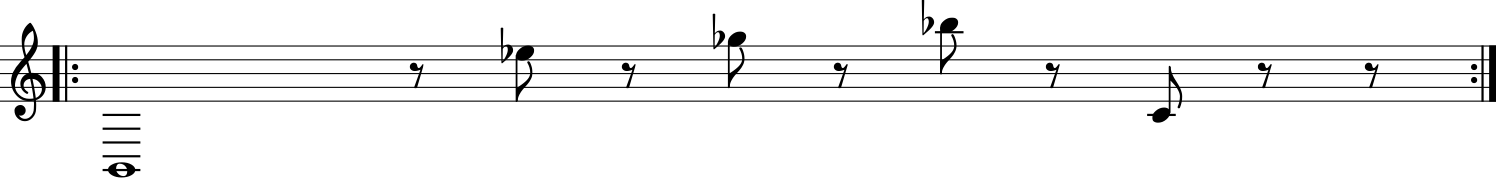

Playing corpus/generated_chords/audio_tensions/maj7/Cmaj7_venda_clapping_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Cmaj7_venda_clapping_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


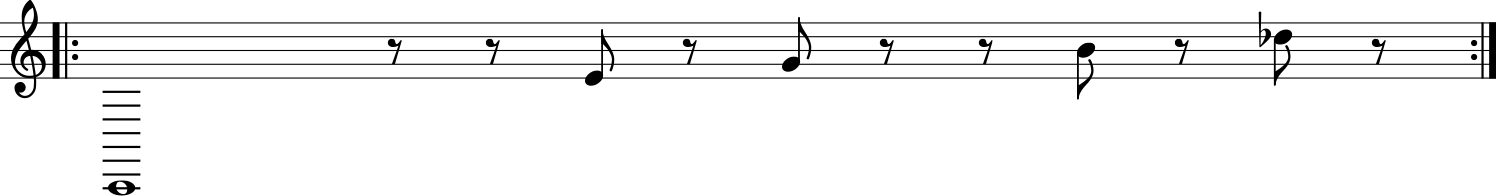

Playing corpus/generated_chords/audio_tensions/maj7/Dbmaj7_venda_clapping_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dbmaj7_venda_clapping_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


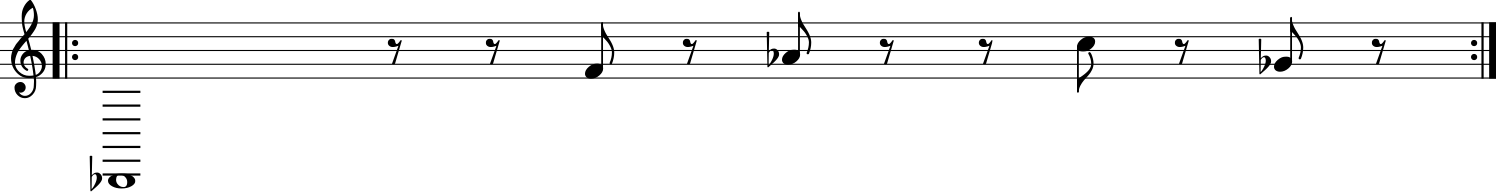

Playing corpus/generated_chords/audio_tensions/maj7/Dmaj7_venda_clapping_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dmaj7_venda_clapping_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


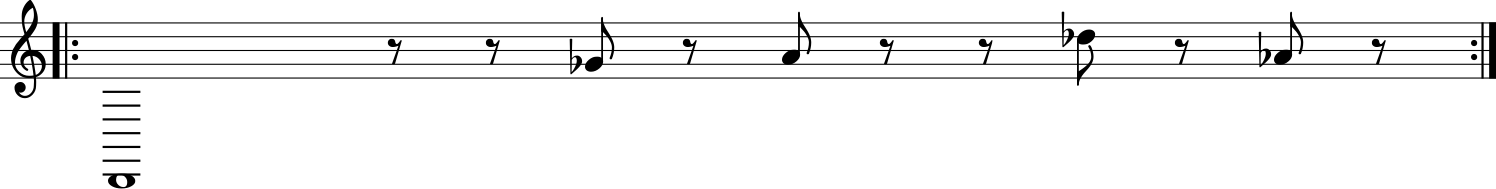

Playing corpus/generated_chords/audio_tensions/maj7/Ebmaj7_venda_clapping_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Ebmaj7_venda_clapping_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


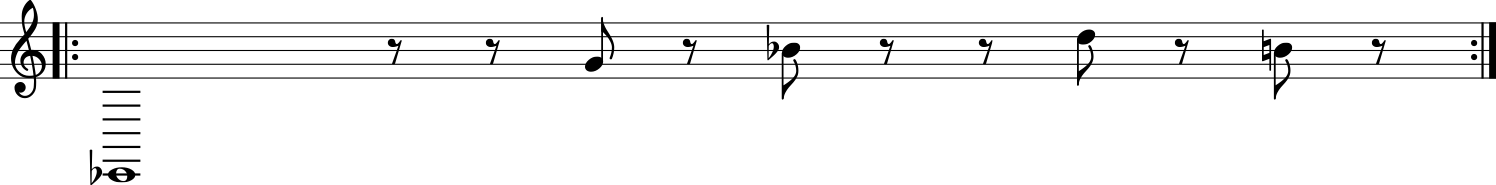

Playing corpus/generated_chords/audio_tensions/maj7/Emaj7_venda_clapping_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Emaj7_venda_clapping_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


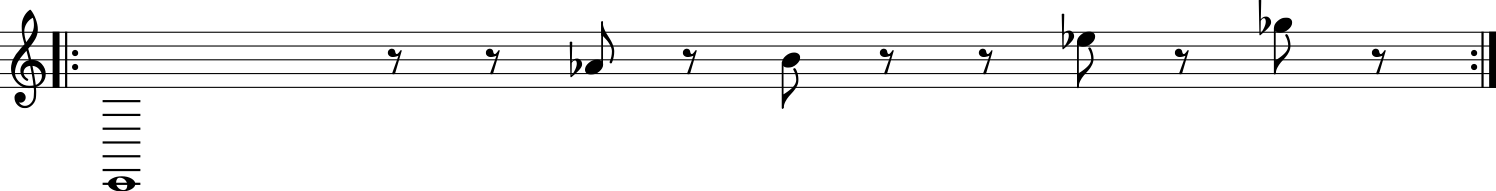

Playing corpus/generated_chords/audio_tensions/maj7/Fmaj7_venda_clapping_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Fmaj7_venda_clapping_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


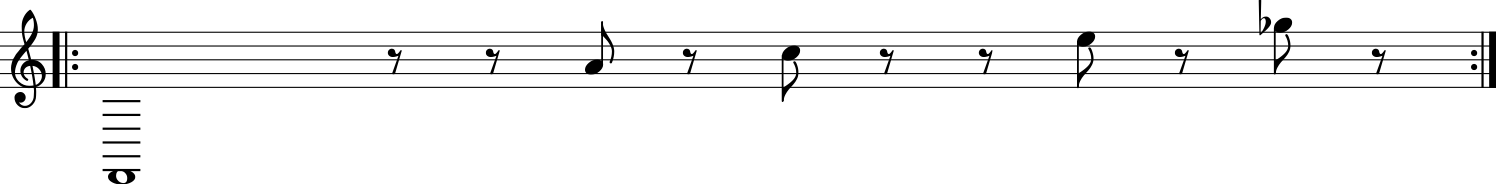

Playing corpus/generated_chords/audio_tensions/maj7/Gbmaj7_venda_clapping_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gbmaj7_venda_clapping_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


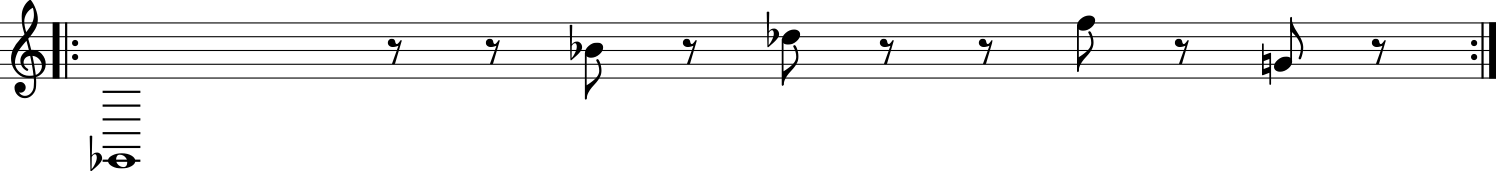

Playing corpus/generated_chords/audio_tensions/maj7/Gmaj7_venda_clapping_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gmaj7_venda_clapping_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


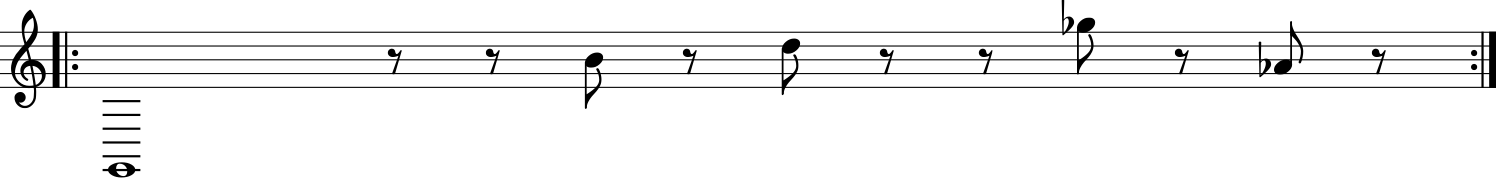

Playing corpus/generated_chords/audio_tensions/maj7/Abmaj7_venda_clapping_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Abmaj7_venda_clapping_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


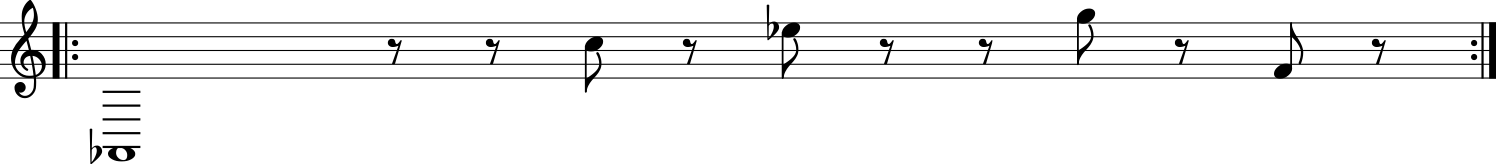

Playing corpus/generated_chords/audio_tensions/maj7/Amaj7_venda_clapping_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Amaj7_venda_clapping_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


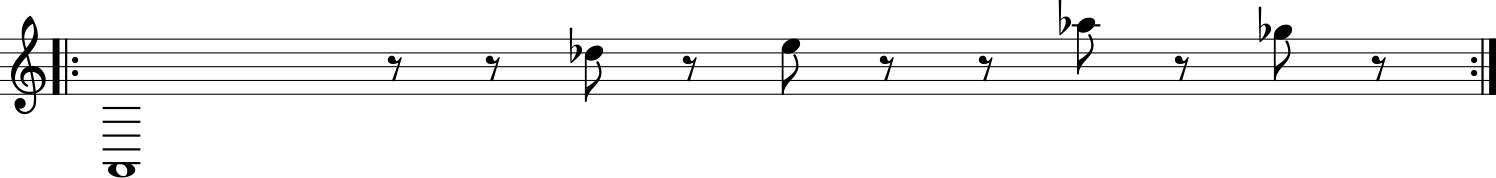

Playing corpus/generated_chords/audio_tensions/maj7/Bbmaj7_venda_clapping_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bbmaj7_venda_clapping_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


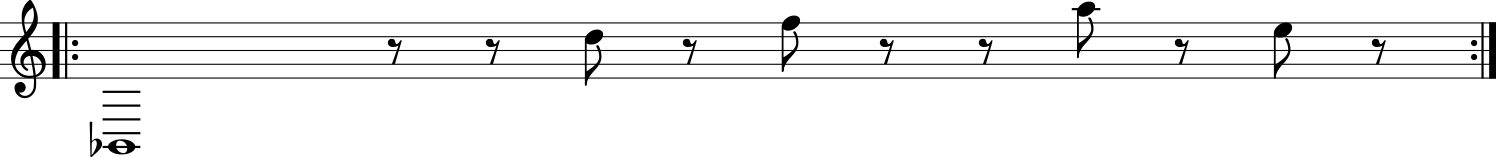

Playing corpus/generated_chords/audio_tensions/maj7/Bmaj7_venda_clapping_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bmaj7_venda_clapping_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


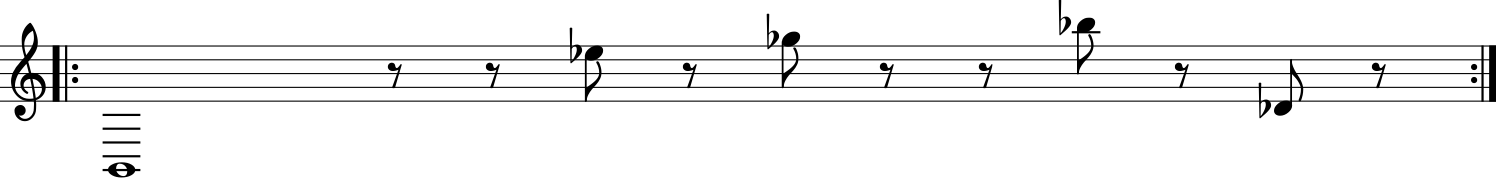

Playing corpus/generated_chords/audio_tensions/maj7/Cmaj7_bossa-nova_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Cmaj7_bossa-nova_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


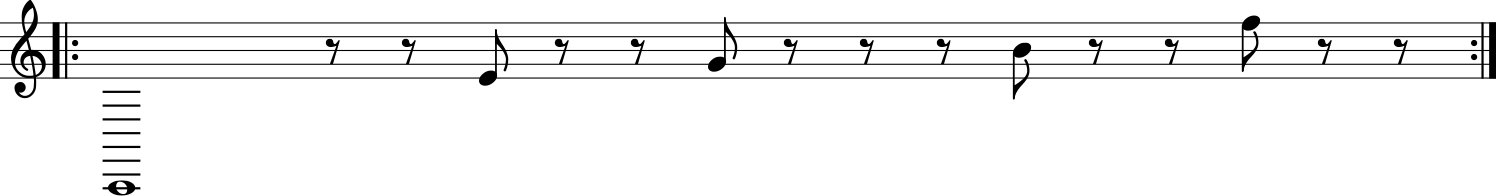

Playing corpus/generated_chords/audio_tensions/maj7/Dbmaj7_bossa-nova_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dbmaj7_bossa-nova_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


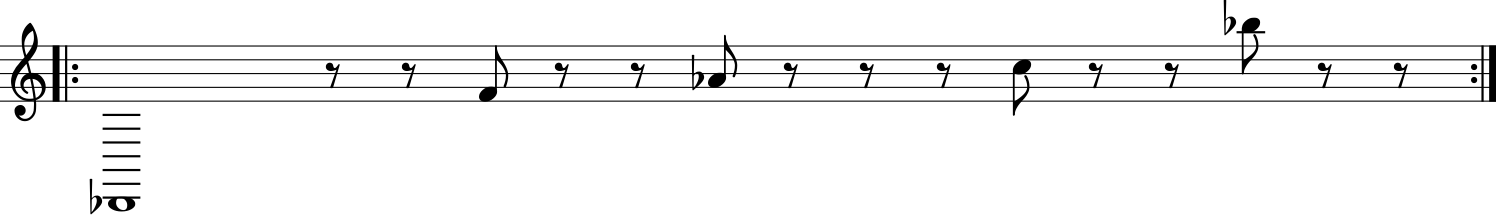

Playing corpus/generated_chords/audio_tensions/maj7/Dmaj7_bossa-nova_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dmaj7_bossa-nova_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


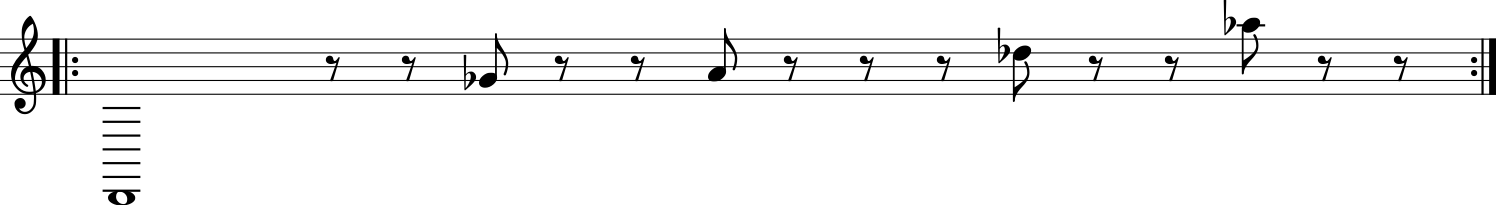

Playing corpus/generated_chords/audio_tensions/maj7/Ebmaj7_bossa-nova_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Ebmaj7_bossa-nova_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


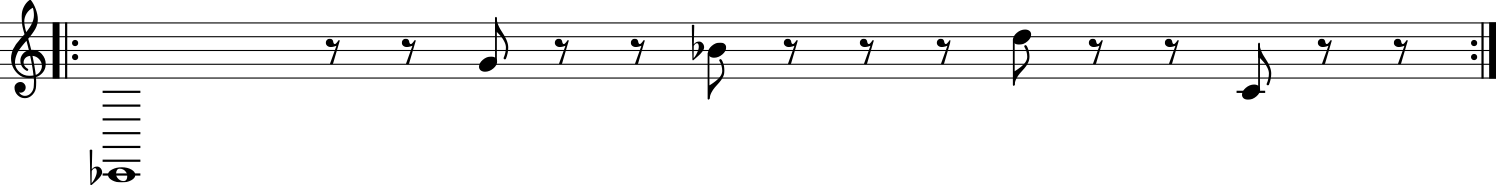

Playing corpus/generated_chords/audio_tensions/maj7/Emaj7_bossa-nova_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Emaj7_bossa-nova_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


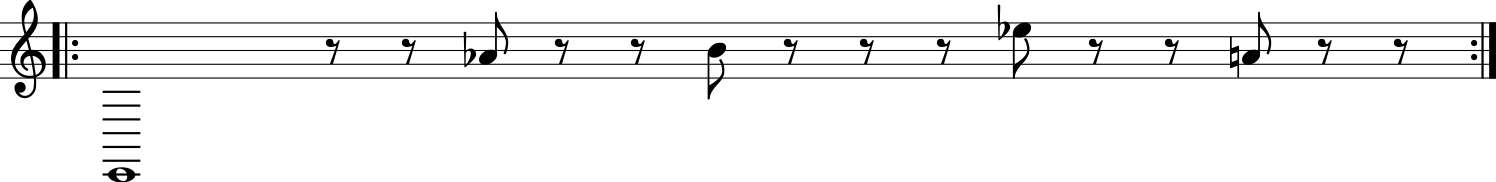

Playing corpus/generated_chords/audio_tensions/maj7/Fmaj7_bossa-nova_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Fmaj7_bossa-nova_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


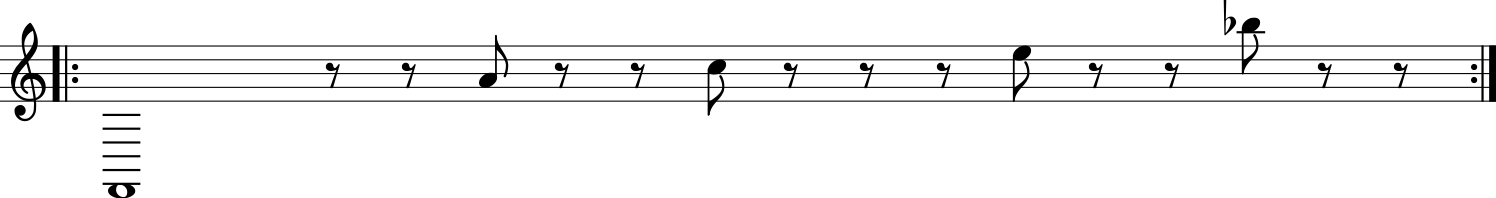

Playing corpus/generated_chords/audio_tensions/maj7/Gbmaj7_bossa-nova_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gbmaj7_bossa-nova_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


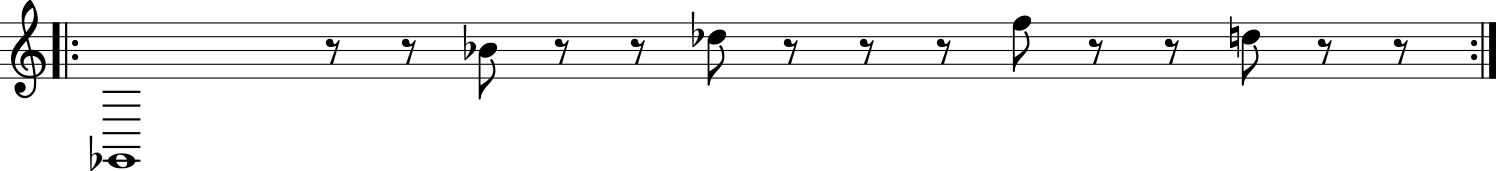

Playing corpus/generated_chords/audio_tensions/maj7/Gmaj7_bossa-nova_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gmaj7_bossa-nova_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


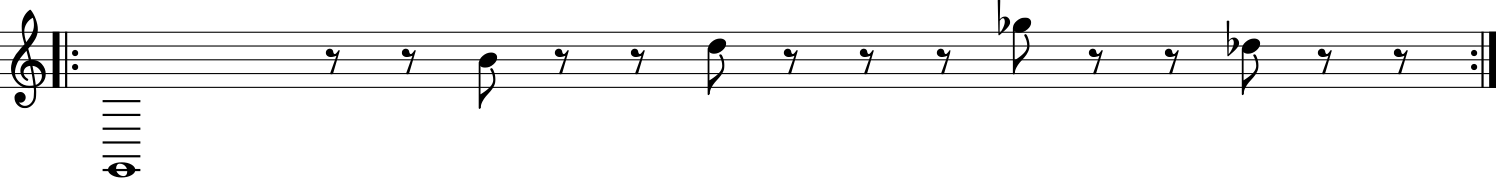

Playing corpus/generated_chords/audio_tensions/maj7/Abmaj7_bossa-nova_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Abmaj7_bossa-nova_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


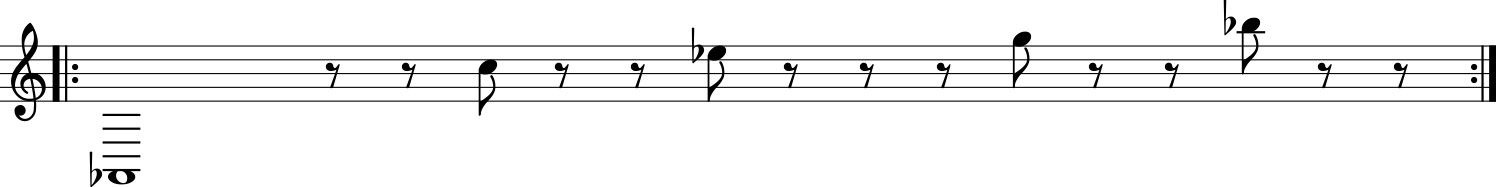

Playing corpus/generated_chords/audio_tensions/maj7/Amaj7_bossa-nova_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Amaj7_bossa-nova_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


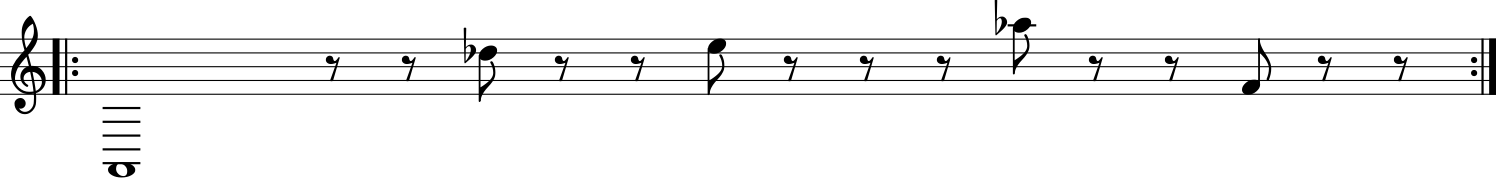

Playing corpus/generated_chords/audio_tensions/maj7/Bbmaj7_bossa-nova_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bbmaj7_bossa-nova_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


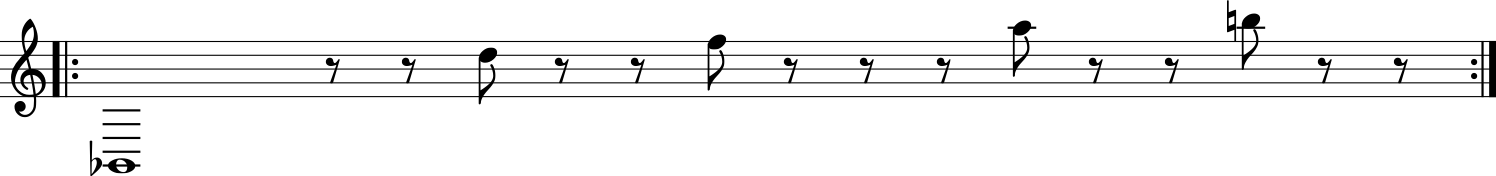

Playing corpus/generated_chords/audio_tensions/maj7/Bmaj7_bossa-nova_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bmaj7_bossa-nova_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


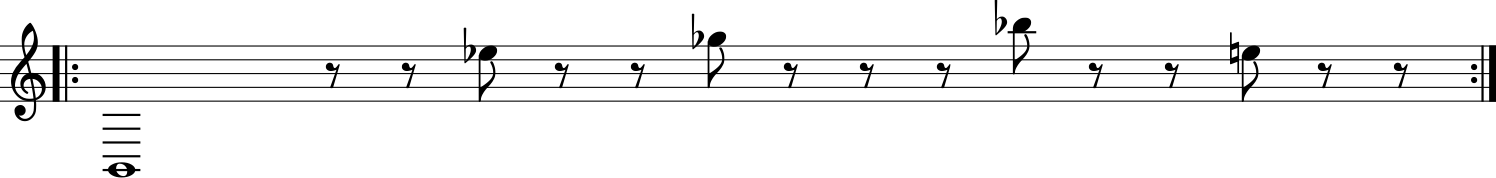

Playing corpus/generated_chords/audio_tensions/maj7/Cmaj7_bendir_Piano_13_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Cmaj7_bendir_Piano_13_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


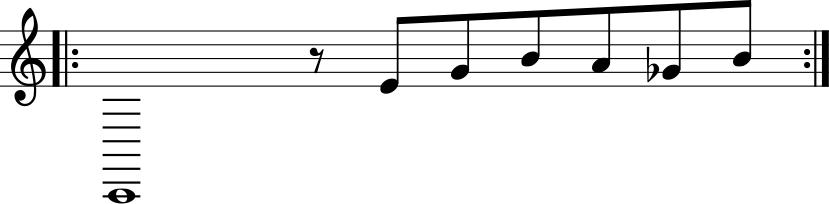

Playing corpus/generated_chords/audio_tensions/maj7/Dbmaj7_bendir_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dbmaj7_bendir_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


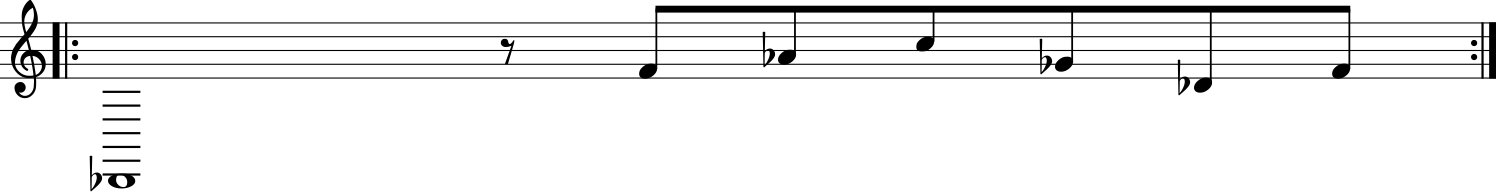

Playing corpus/generated_chords/audio_tensions/maj7/Dmaj7_bendir_Piano_b13_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dmaj7_bendir_Piano_b13_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


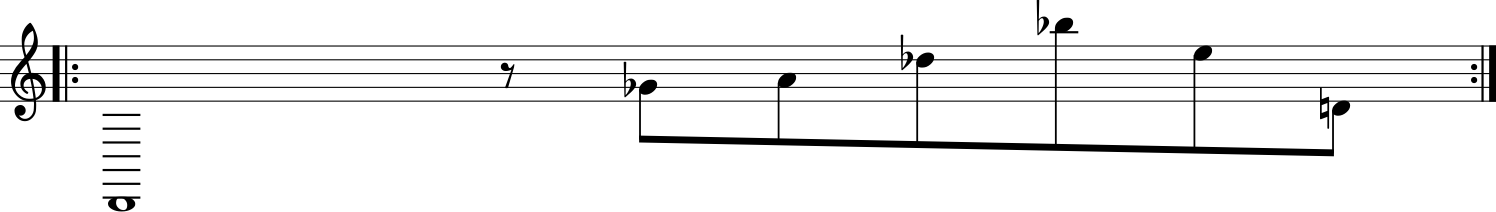

Playing corpus/generated_chords/audio_tensions/maj7/Ebmaj7_bendir_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Ebmaj7_bendir_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


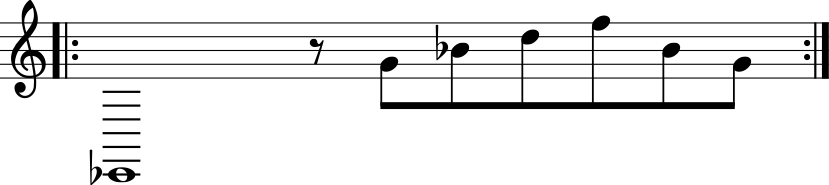

Playing corpus/generated_chords/audio_tensions/maj7/Emaj7_bendir_Piano_b13_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Emaj7_bendir_Piano_b13_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


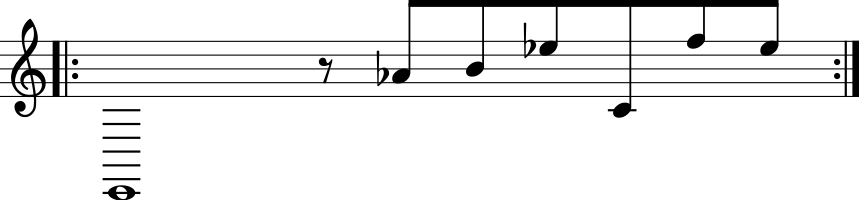

Playing corpus/generated_chords/audio_tensions/maj7/Fmaj7_bendir_Piano_b13_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Fmaj7_bendir_Piano_b13_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


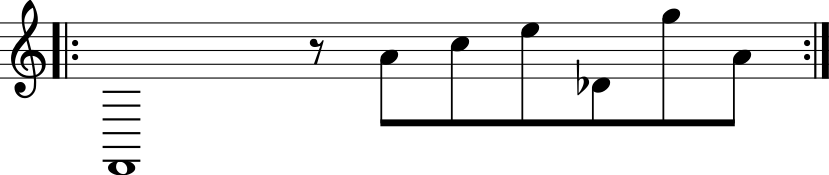

Playing corpus/generated_chords/audio_tensions/maj7/Gbmaj7_bendir_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gbmaj7_bendir_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


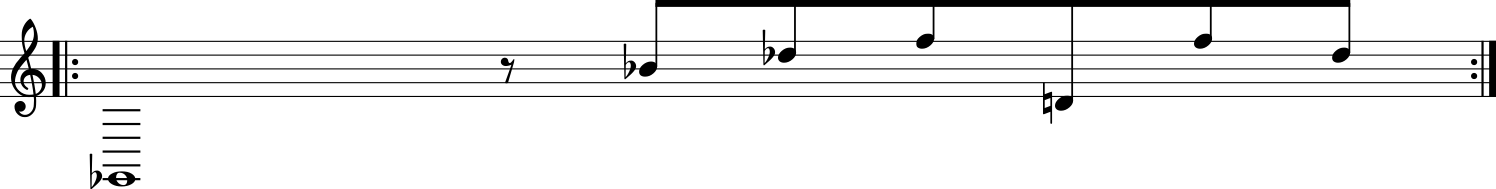

Playing corpus/generated_chords/audio_tensions/maj7/Gmaj7_bendir_Piano_b9_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gmaj7_bendir_Piano_b9_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


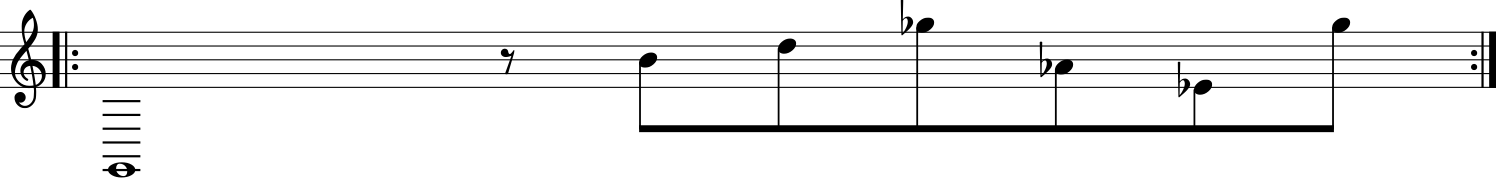

Playing corpus/generated_chords/audio_tensions/maj7/Abmaj7_bendir_Piano_13_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Abmaj7_bendir_Piano_13_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


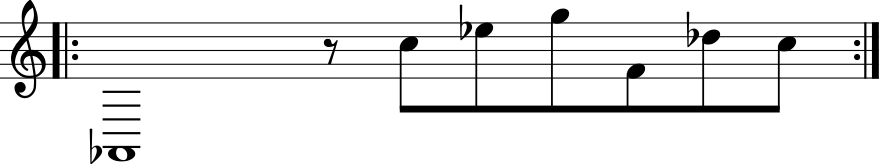

Playing corpus/generated_chords/audio_tensions/maj7/Amaj7_bendir_Piano_b13_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Amaj7_bendir_Piano_b13_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


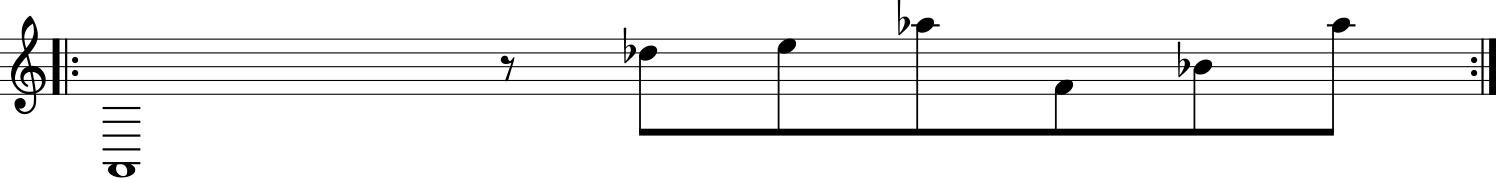

Playing corpus/generated_chords/audio_tensions/maj7/Bbmaj7_bendir_Piano_9_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bbmaj7_bendir_Piano_9_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


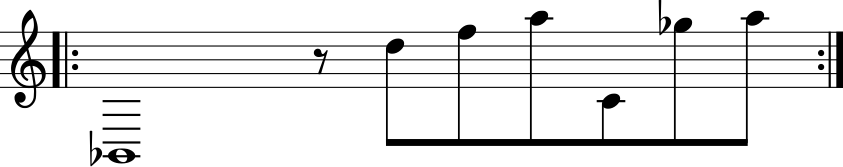

Playing corpus/generated_chords/audio_tensions/maj7/Bmaj7_bendir_Piano_b13_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bmaj7_bendir_Piano_b13_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


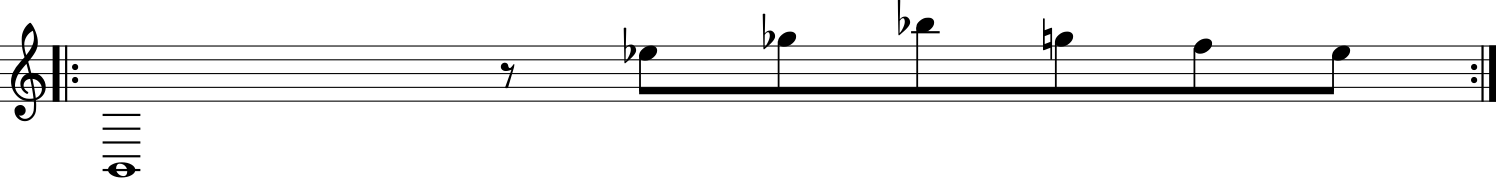

Playing corpus/generated_chords/audio_tensions/maj7/Cmaj7_mpre_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Cmaj7_mpre_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


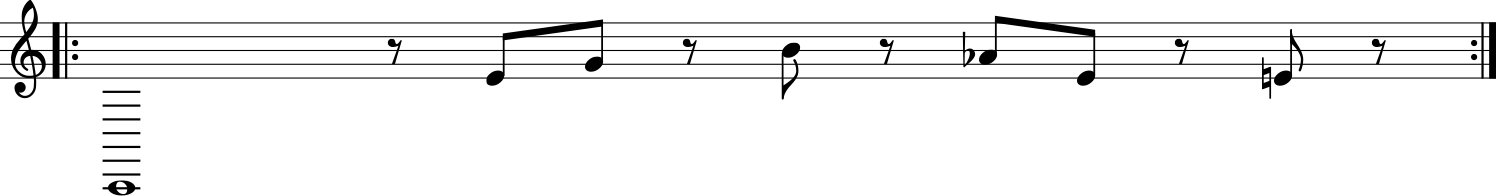

Playing corpus/generated_chords/audio_tensions/maj7/Dbmaj7_mpre_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dbmaj7_mpre_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


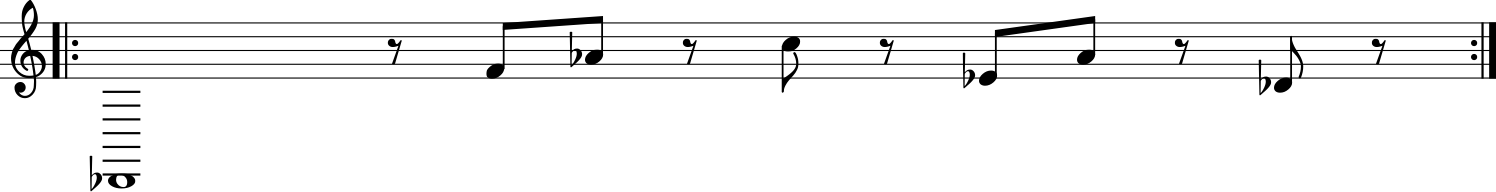

Playing corpus/generated_chords/audio_tensions/maj7/Dmaj7_mpre_Piano_#11_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dmaj7_mpre_Piano_#11_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


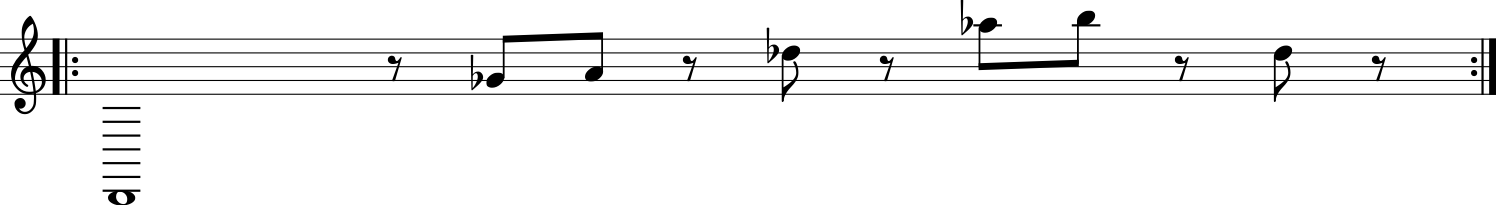

Playing corpus/generated_chords/audio_tensions/maj7/Ebmaj7_mpre_Piano_11_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Ebmaj7_mpre_Piano_11_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


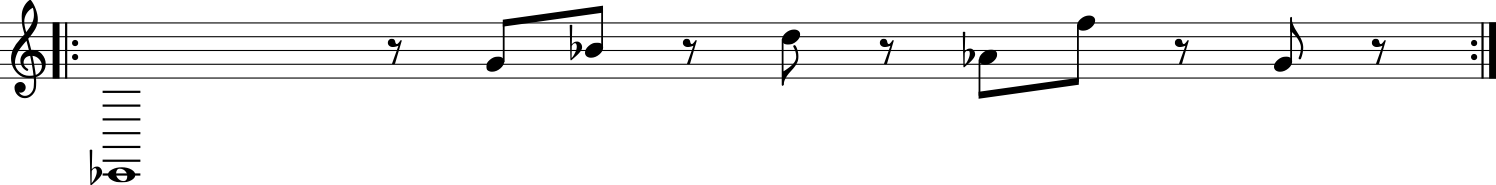

Playing corpus/generated_chords/audio_tensions/maj7/Emaj7_mpre_Piano_b9_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Emaj7_mpre_Piano_b9_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


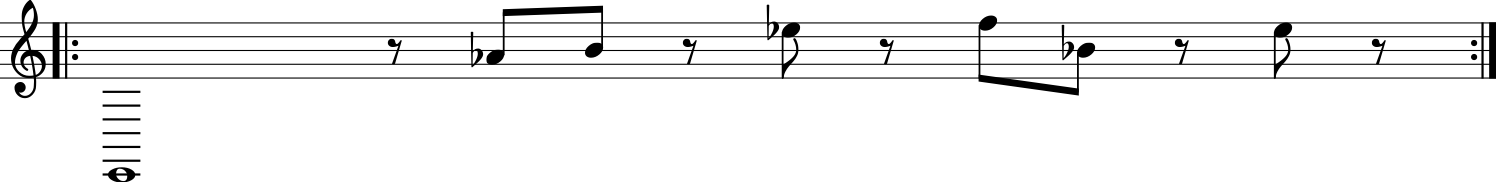

Playing corpus/generated_chords/audio_tensions/maj7/Fmaj7_mpre_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Fmaj7_mpre_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


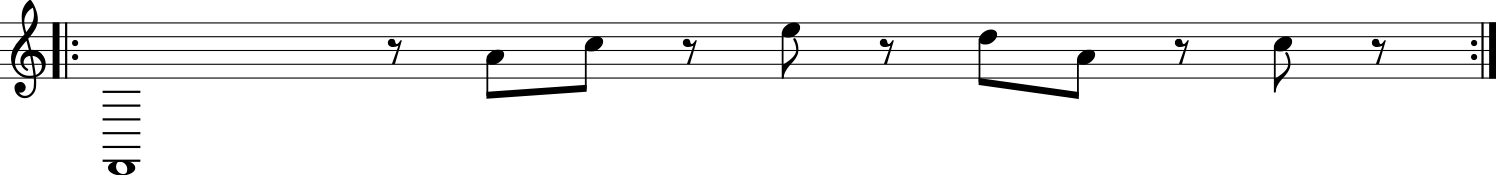

Playing corpus/generated_chords/audio_tensions/maj7/Gbmaj7_mpre_Piano_b13_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gbmaj7_mpre_Piano_b13_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


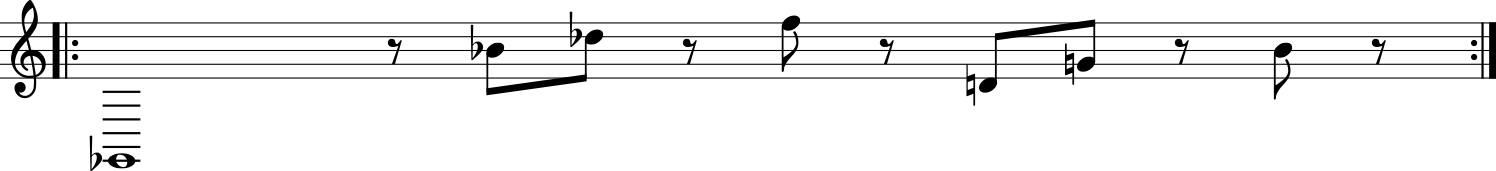

Playing corpus/generated_chords/audio_tensions/maj7/Gmaj7_mpre_Piano_11_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gmaj7_mpre_Piano_11_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


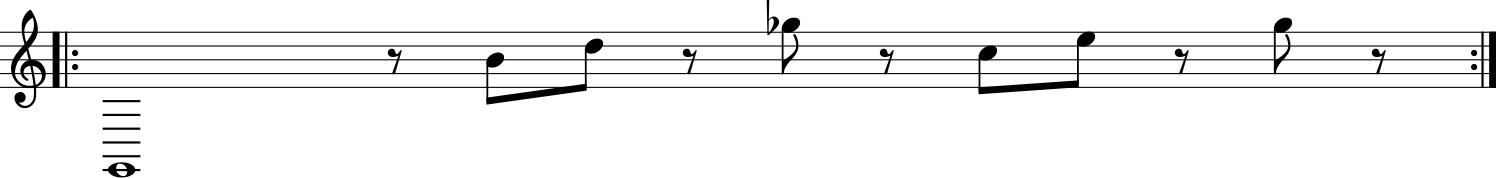

Playing corpus/generated_chords/audio_tensions/maj7/Abmaj7_mpre_Piano_9_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Abmaj7_mpre_Piano_9_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


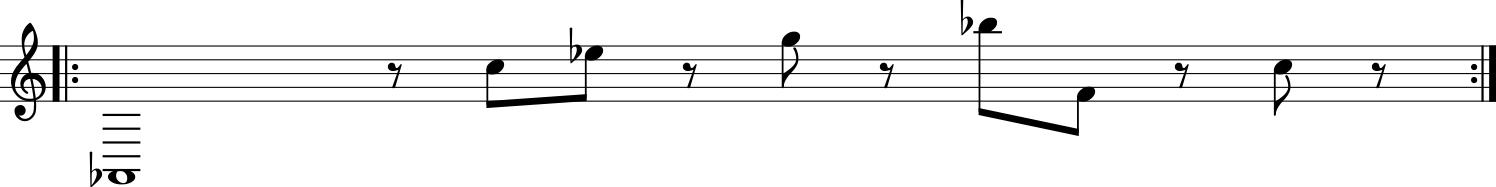

Playing corpus/generated_chords/audio_tensions/maj7/Amaj7_mpre_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Amaj7_mpre_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


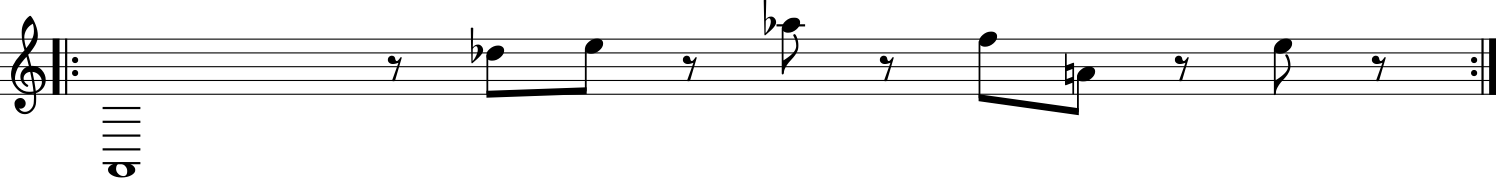

Playing corpus/generated_chords/audio_tensions/maj7/Bbmaj7_mpre_Piano_b9_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bbmaj7_mpre_Piano_b9_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


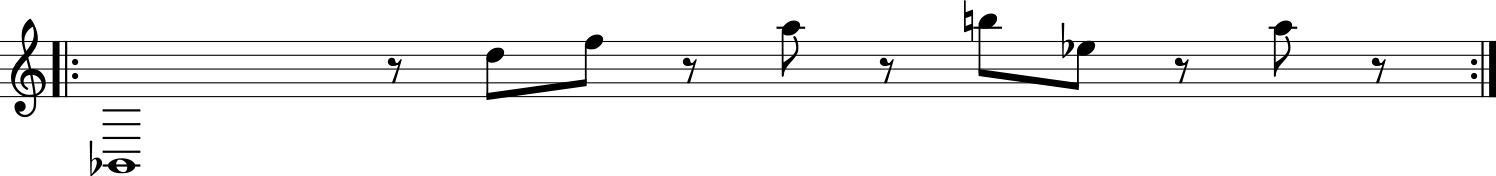

Playing corpus/generated_chords/audio_tensions/maj7/Bmaj7_mpre_Piano_13_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bmaj7_mpre_Piano_13_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


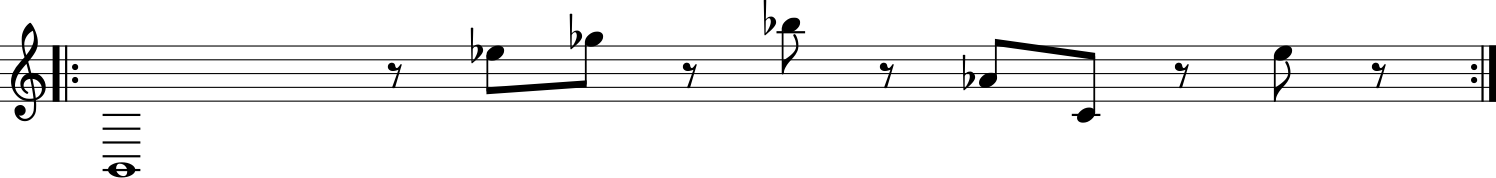

Playing corpus/generated_chords/audio_tensions/maj7/Cmaj7_samba_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Cmaj7_samba_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


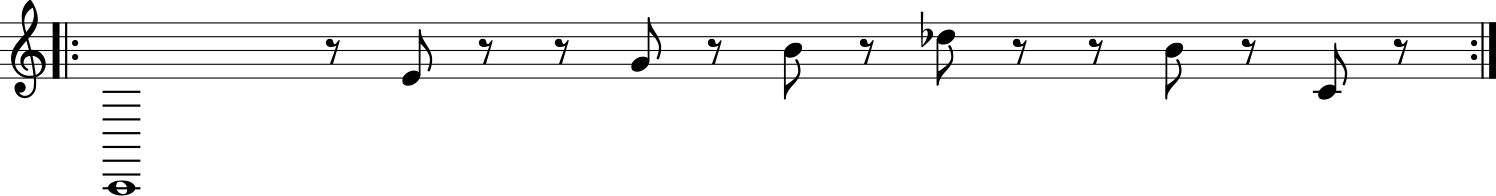

Playing corpus/generated_chords/audio_tensions/maj7/Dbmaj7_samba_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dbmaj7_samba_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


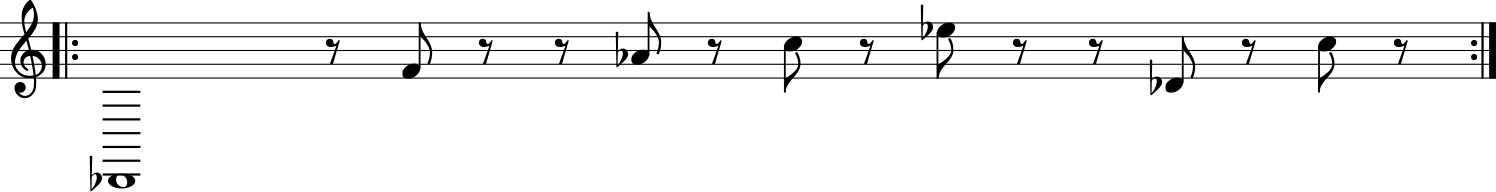

Playing corpus/generated_chords/audio_tensions/maj7/Dmaj7_samba_Piano_9_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dmaj7_samba_Piano_9_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


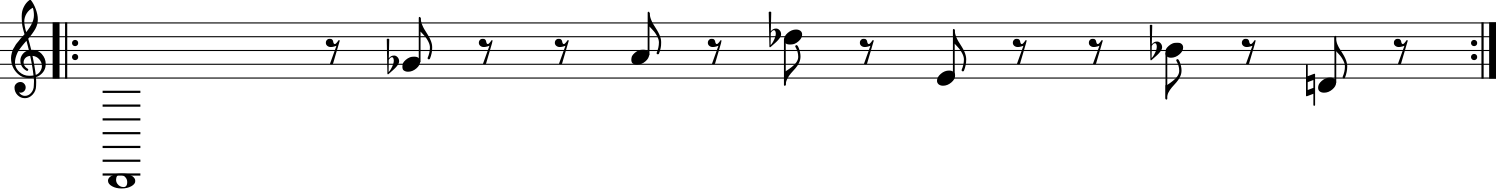

Playing corpus/generated_chords/audio_tensions/maj7/Ebmaj7_samba_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Ebmaj7_samba_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


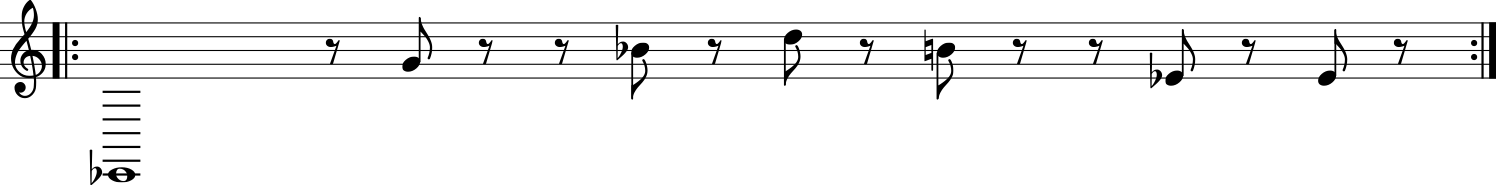

Playing corpus/generated_chords/audio_tensions/maj7/Emaj7_samba_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Emaj7_samba_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


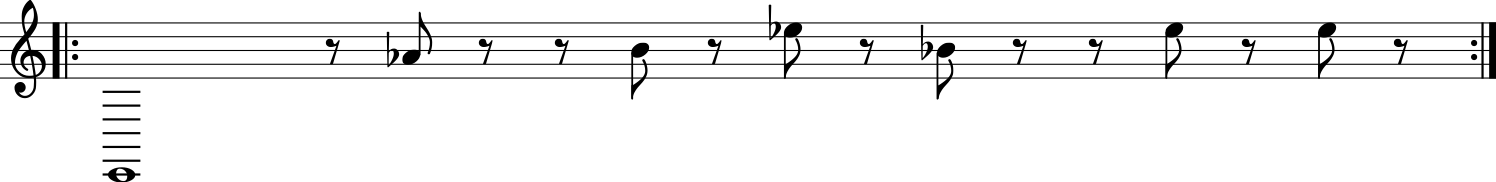

Playing corpus/generated_chords/audio_tensions/maj7/Fmaj7_samba_Piano_9_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Fmaj7_samba_Piano_9_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


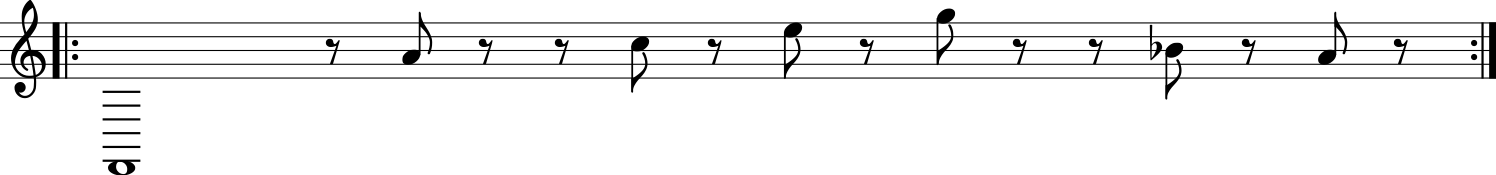

Playing corpus/generated_chords/audio_tensions/maj7/Gbmaj7_samba_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gbmaj7_samba_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


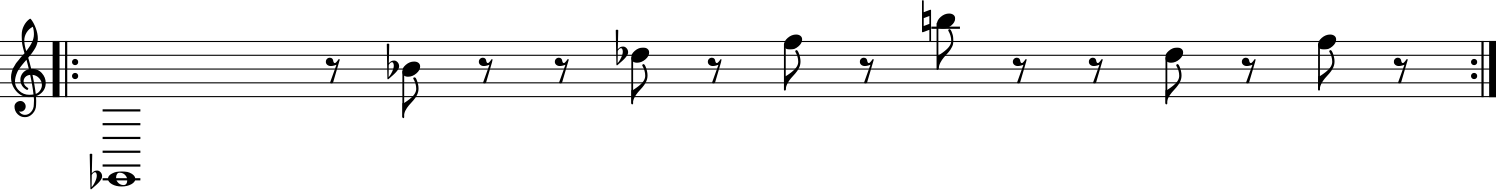

Playing corpus/generated_chords/audio_tensions/maj7/Gmaj7_samba_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gmaj7_samba_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


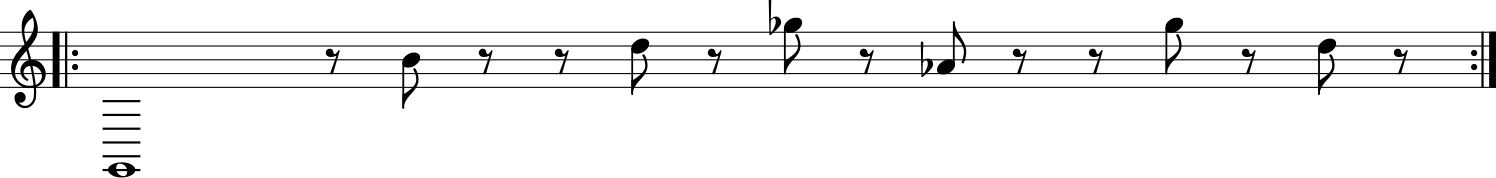

Playing corpus/generated_chords/audio_tensions/maj7/Abmaj7_samba_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Abmaj7_samba_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


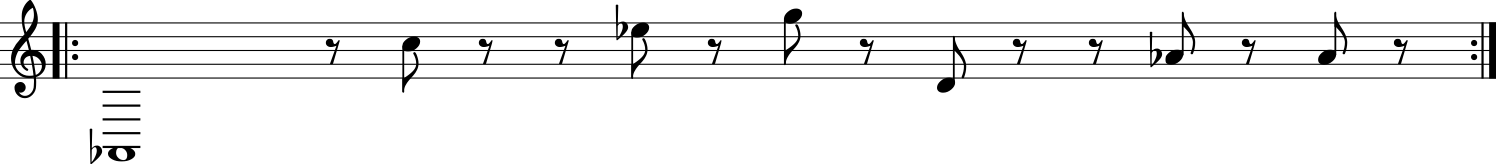

Playing corpus/generated_chords/audio_tensions/maj7/Amaj7_samba_Piano_11_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Amaj7_samba_Piano_11_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


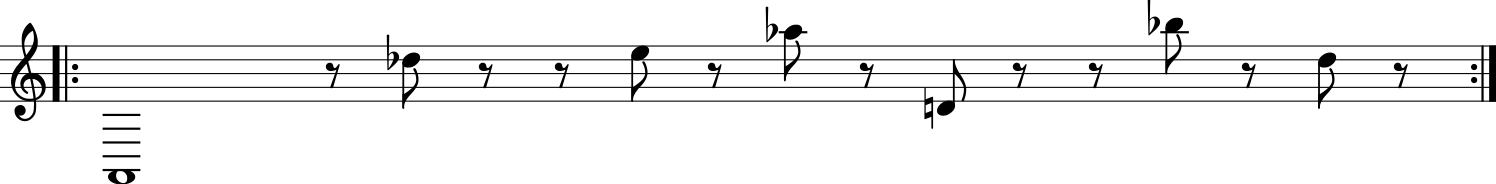

Playing corpus/generated_chords/audio_tensions/maj7/Bbmaj7_samba_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bbmaj7_samba_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


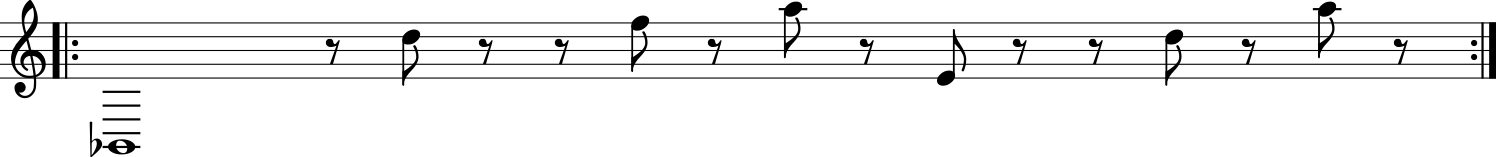

Playing corpus/generated_chords/audio_tensions/maj7/Bmaj7_samba_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bmaj7_samba_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


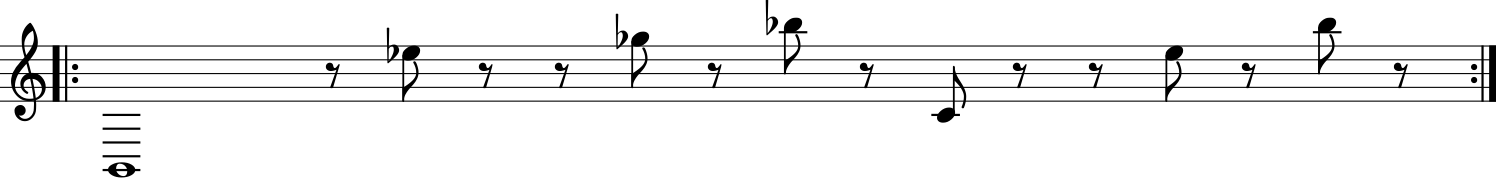

Playing corpus/generated_chords/audio_tensions/maj7/Cmaj7_agogo-samba_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Cmaj7_agogo-samba_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


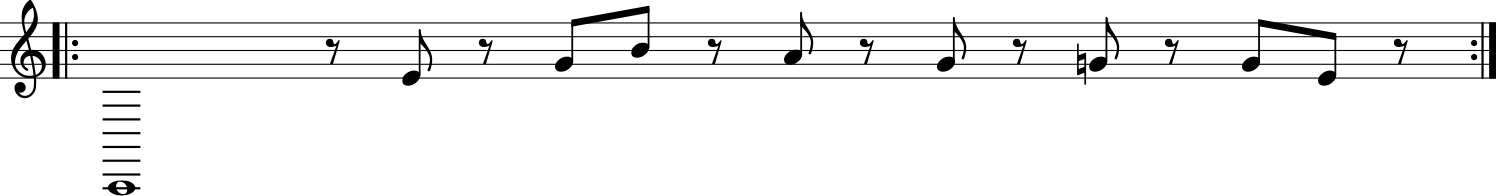

Playing corpus/generated_chords/audio_tensions/maj7/Dbmaj7_agogo-samba_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dbmaj7_agogo-samba_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


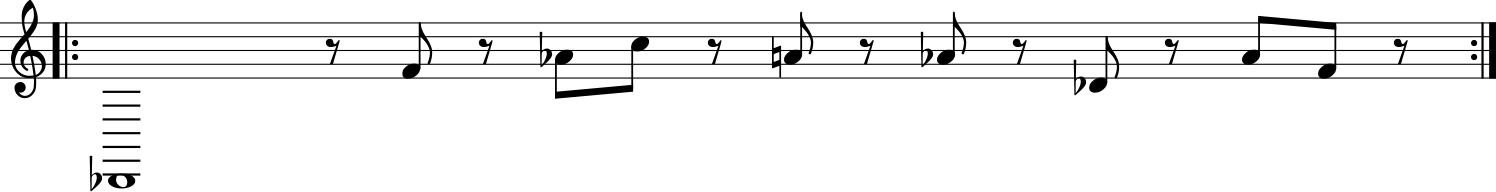

Playing corpus/generated_chords/audio_tensions/maj7/Dmaj7_agogo-samba_Piano_b9_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dmaj7_agogo-samba_Piano_b9_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


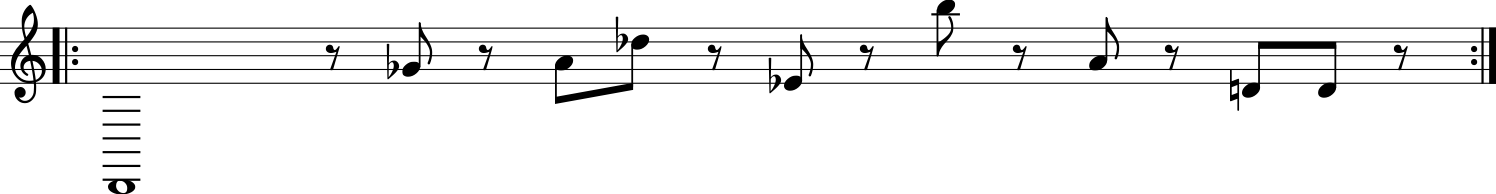

Playing corpus/generated_chords/audio_tensions/maj7/Ebmaj7_agogo-samba_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Ebmaj7_agogo-samba_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


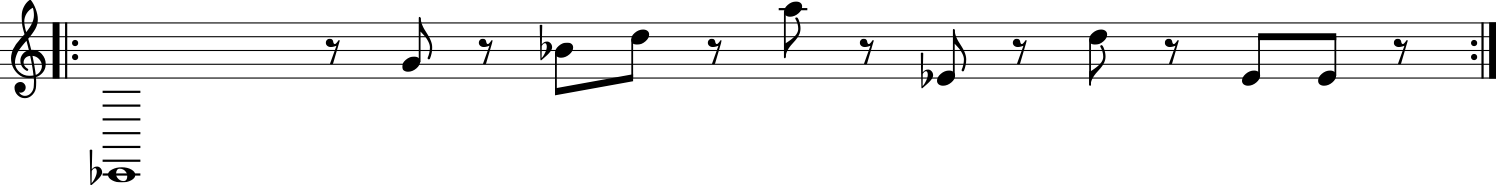

Playing corpus/generated_chords/audio_tensions/maj7/Emaj7_agogo-samba_Piano_11_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Emaj7_agogo-samba_Piano_11_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


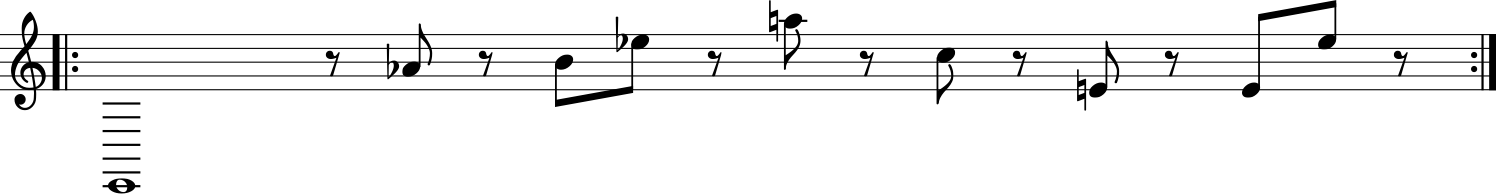

Playing corpus/generated_chords/audio_tensions/maj7/Fmaj7_agogo-samba_Piano_b13_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Fmaj7_agogo-samba_Piano_b13_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


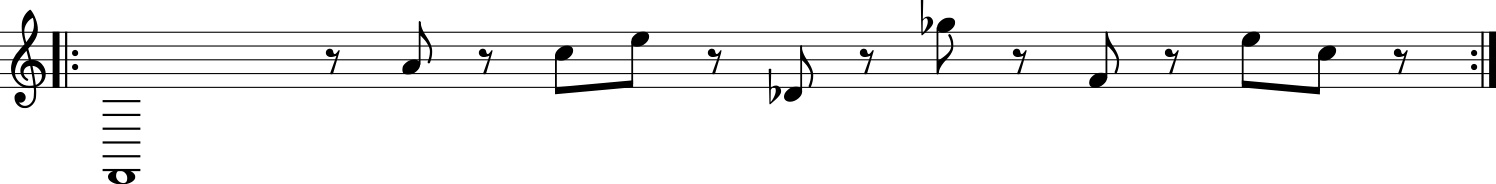

Playing corpus/generated_chords/audio_tensions/maj7/Gbmaj7_agogo-samba_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gbmaj7_agogo-samba_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


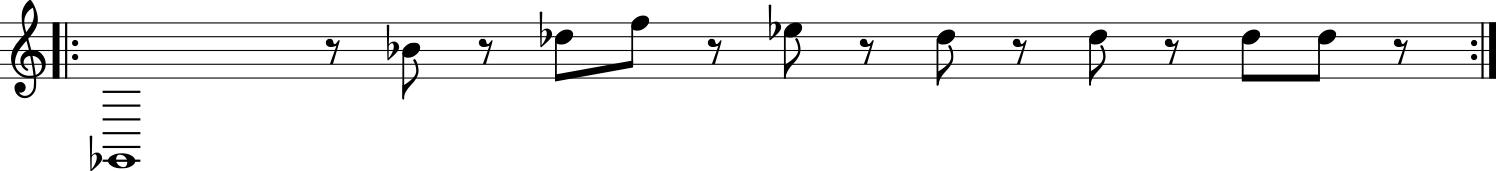

Playing corpus/generated_chords/audio_tensions/maj7/Gmaj7_agogo-samba_Piano_b13_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gmaj7_agogo-samba_Piano_b13_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


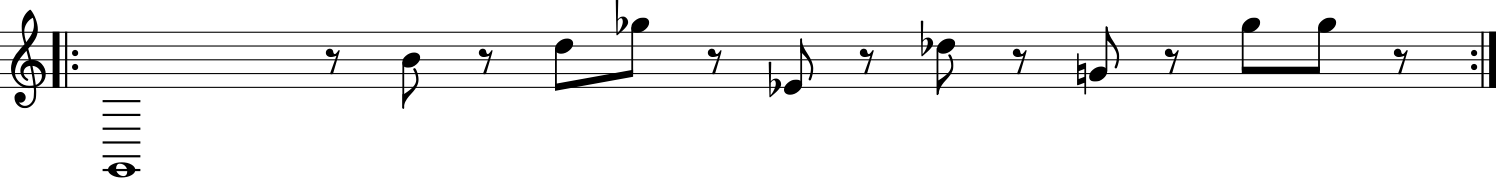

Playing corpus/generated_chords/audio_tensions/maj7/Abmaj7_agogo-samba_Piano_b13_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Abmaj7_agogo-samba_Piano_b13_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


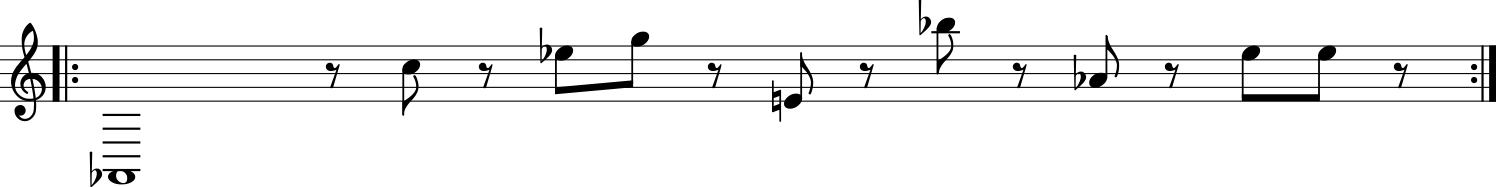

Playing corpus/generated_chords/audio_tensions/maj7/Amaj7_agogo-samba_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Amaj7_agogo-samba_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


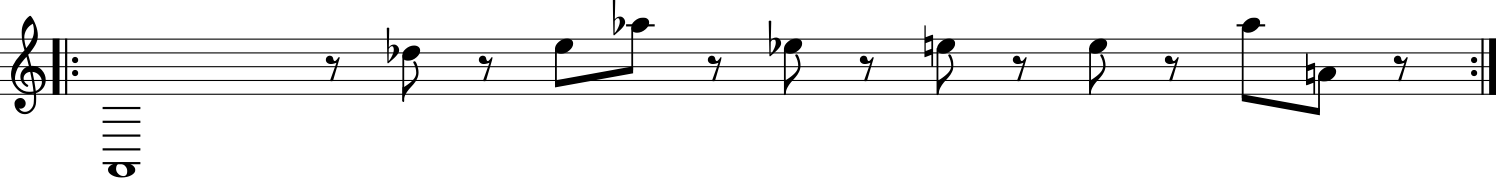

Playing corpus/generated_chords/audio_tensions/maj7/Bbmaj7_agogo-samba_Piano_9_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bbmaj7_agogo-samba_Piano_9_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


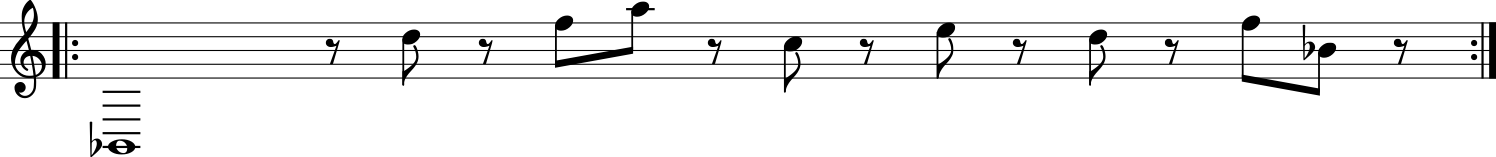

Playing corpus/generated_chords/audio_tensions/maj7/Bmaj7_agogo-samba_Piano_b13_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bmaj7_agogo-samba_Piano_b13_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


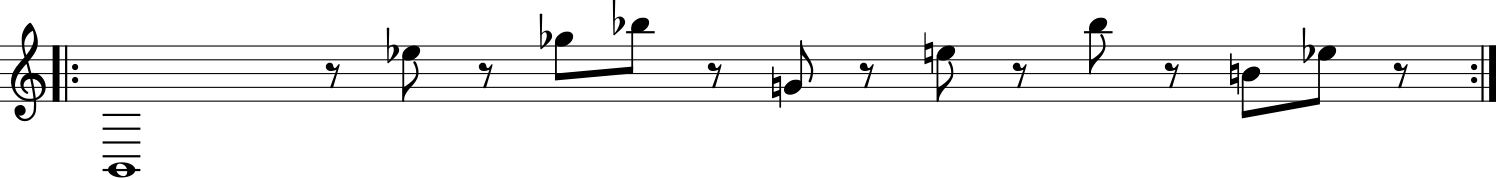

Playing corpus/generated_chords/audio_tensions/maj7/Cmaj7_ngbaka-maibo_Piano_b9_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Cmaj7_ngbaka-maibo_Piano_b9_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


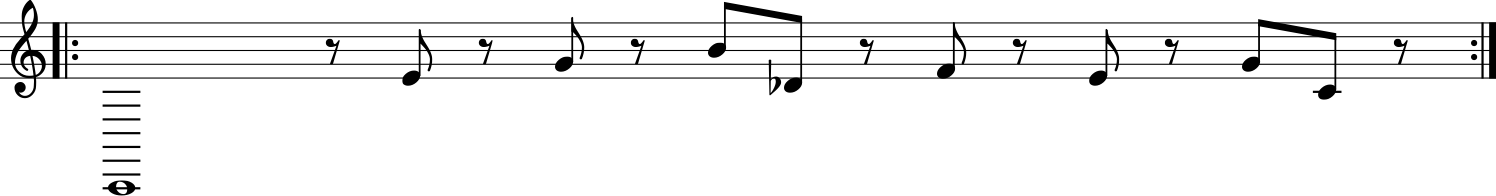

Playing corpus/generated_chords/audio_tensions/maj7/Dbmaj7_ngbaka-maibo_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dbmaj7_ngbaka-maibo_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


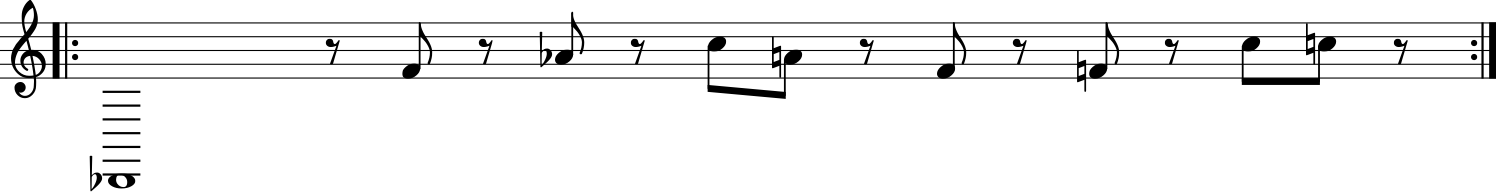

Playing corpus/generated_chords/audio_tensions/maj7/Dmaj7_ngbaka-maibo_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dmaj7_ngbaka-maibo_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


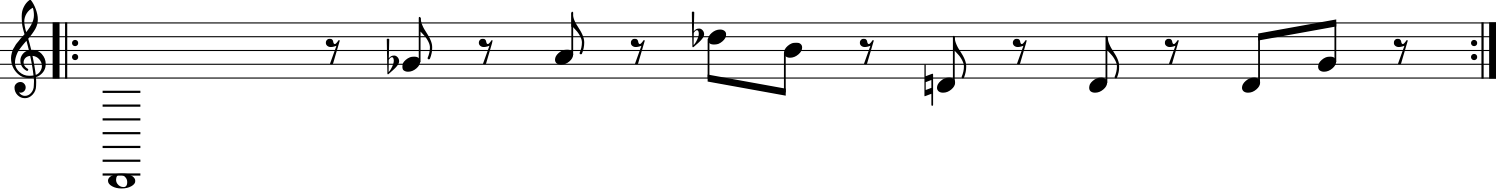

Playing corpus/generated_chords/audio_tensions/maj7/Ebmaj7_ngbaka-maibo_Piano_#11_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Ebmaj7_ngbaka-maibo_Piano_#11_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


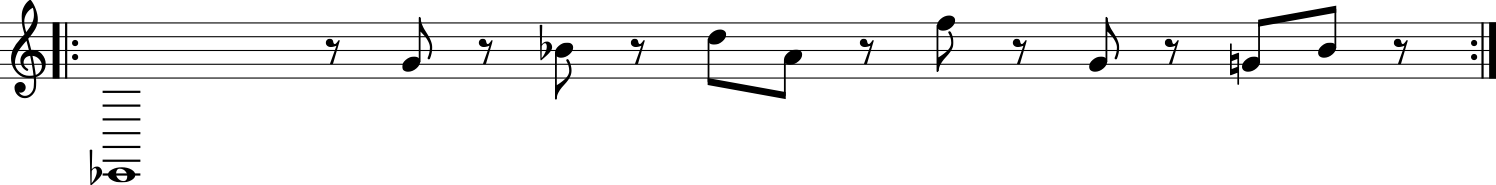

Playing corpus/generated_chords/audio_tensions/maj7/Emaj7_ngbaka-maibo_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Emaj7_ngbaka-maibo_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


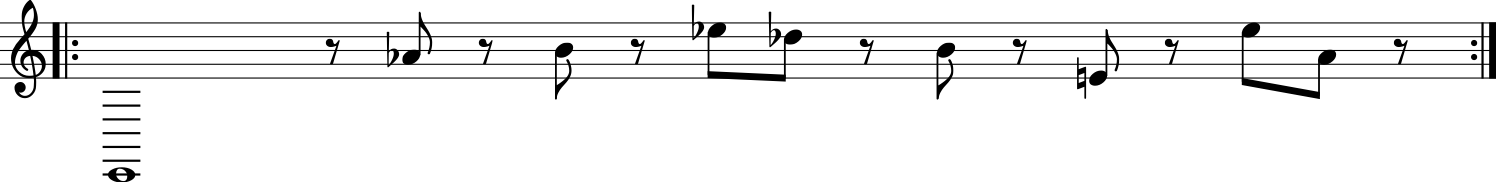

Playing corpus/generated_chords/audio_tensions/maj7/Fmaj7_ngbaka-maibo_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Fmaj7_ngbaka-maibo_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


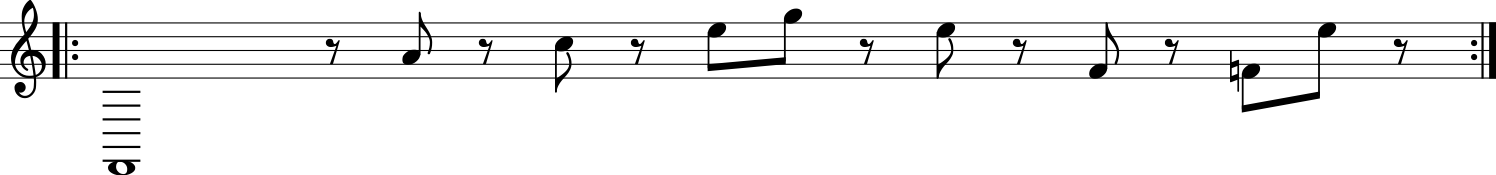

Playing corpus/generated_chords/audio_tensions/maj7/Gbmaj7_ngbaka-maibo_Piano_b9_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gbmaj7_ngbaka-maibo_Piano_b9_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


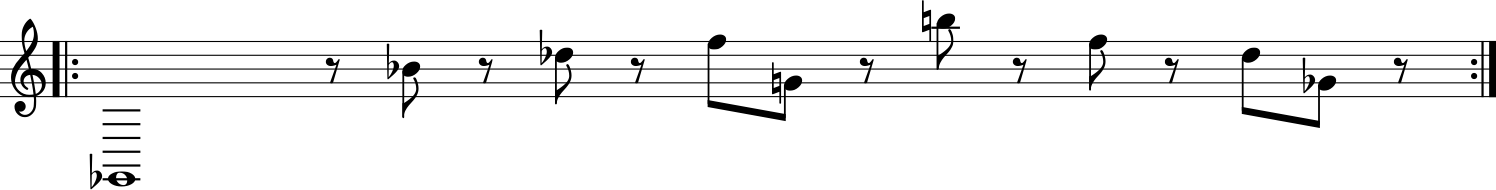

Playing corpus/generated_chords/audio_tensions/maj7/Gmaj7_ngbaka-maibo_Piano_b9_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gmaj7_ngbaka-maibo_Piano_b9_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


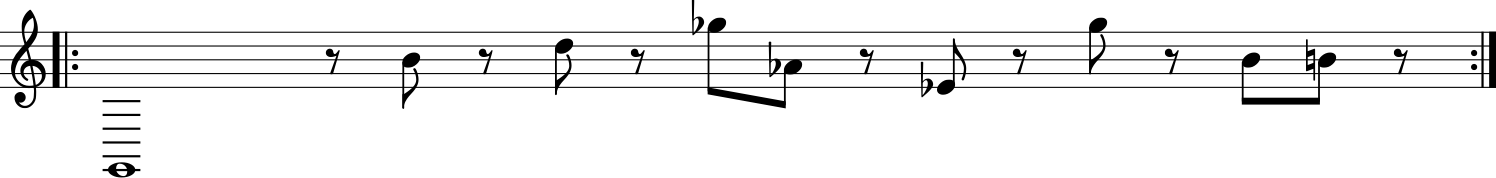

Playing corpus/generated_chords/audio_tensions/maj7/Abmaj7_ngbaka-maibo_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Abmaj7_ngbaka-maibo_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


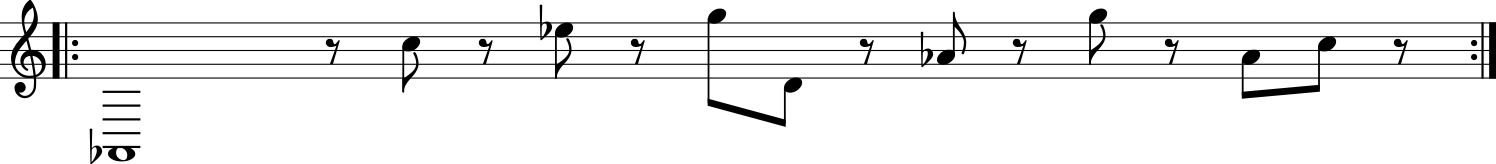

Playing corpus/generated_chords/audio_tensions/maj7/Amaj7_ngbaka-maibo_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Amaj7_ngbaka-maibo_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


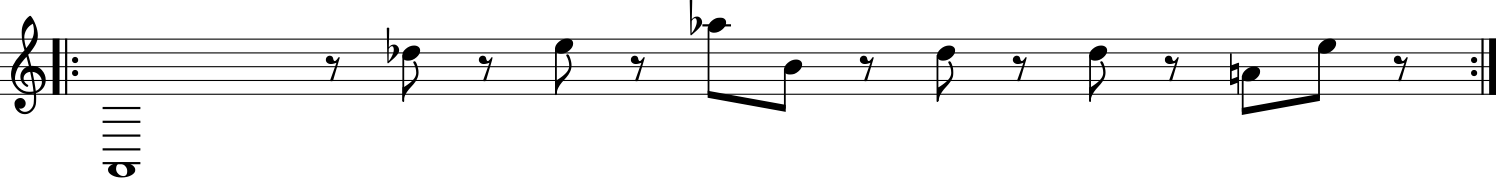

Playing corpus/generated_chords/audio_tensions/maj7/Bbmaj7_ngbaka-maibo_Piano_b13_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bbmaj7_ngbaka-maibo_Piano_b13_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


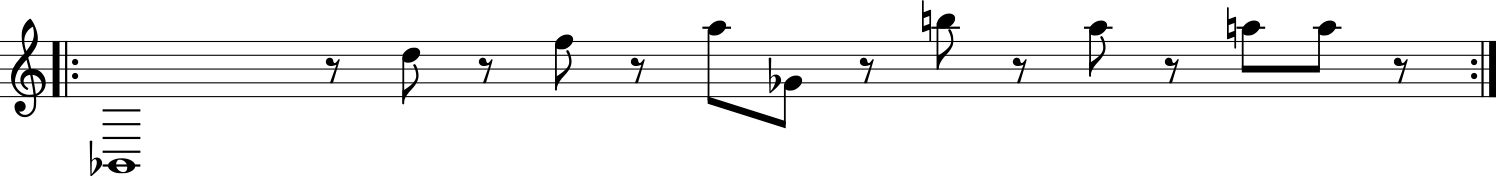

Playing corpus/generated_chords/audio_tensions/maj7/Bmaj7_ngbaka-maibo_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bmaj7_ngbaka-maibo_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


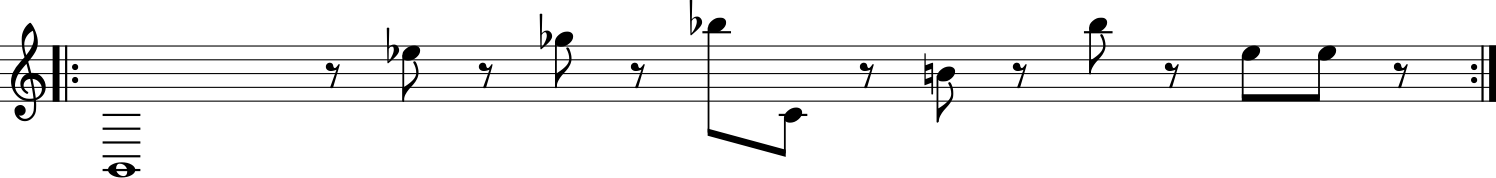

Playing corpus/generated_chords/audio_tensions/maj7/Cmaj7_aka_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Cmaj7_aka_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


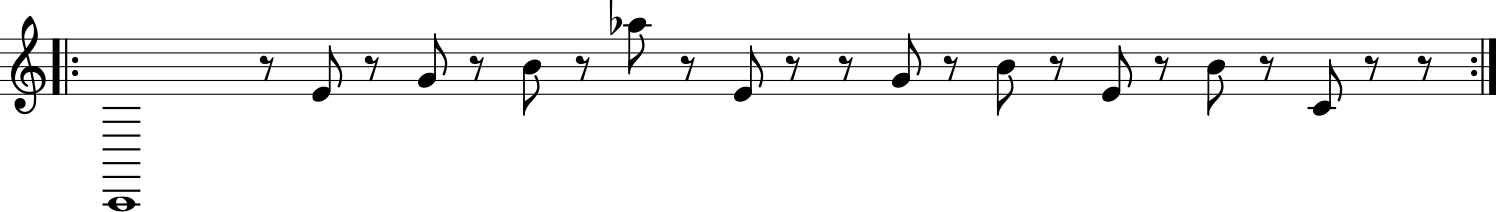

Playing corpus/generated_chords/audio_tensions/maj7/Dbmaj7_aka_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dbmaj7_aka_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


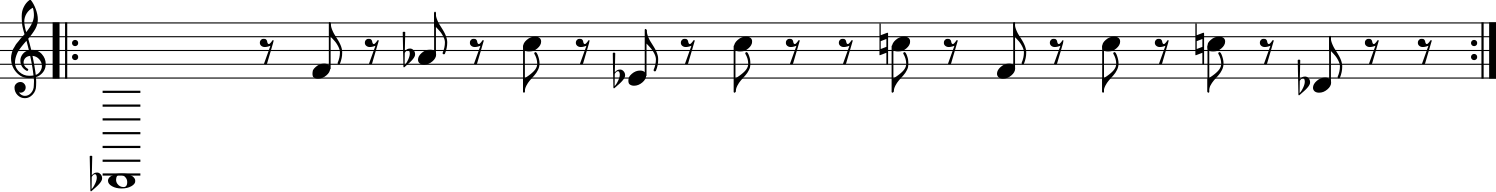

Playing corpus/generated_chords/audio_tensions/maj7/Dmaj7_aka_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dmaj7_aka_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


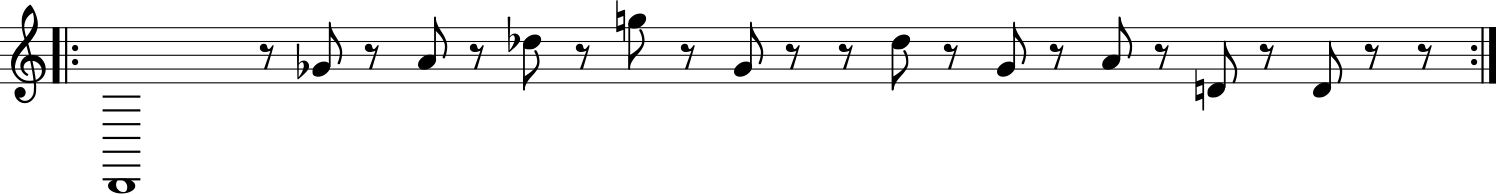

Playing corpus/generated_chords/audio_tensions/maj7/Ebmaj7_aka_Piano_13_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Ebmaj7_aka_Piano_13_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


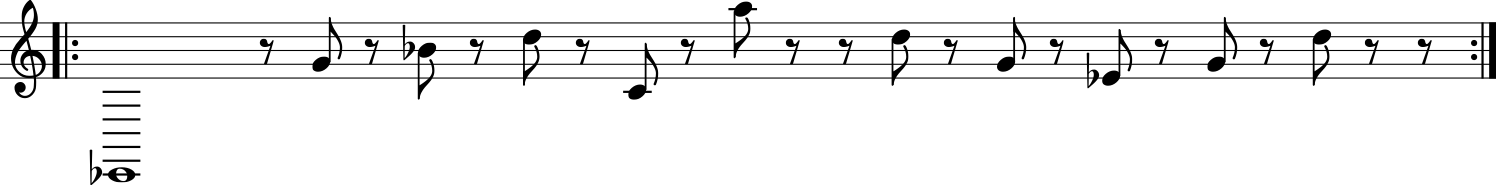

Playing corpus/generated_chords/audio_tensions/maj7/Emaj7_aka_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Emaj7_aka_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


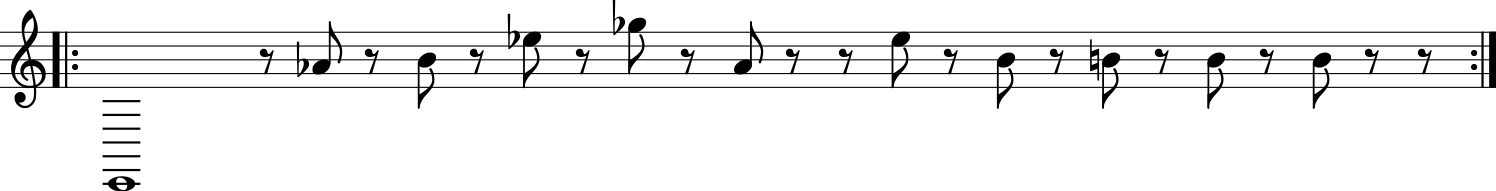

Playing corpus/generated_chords/audio_tensions/maj7/Fmaj7_aka_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Fmaj7_aka_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


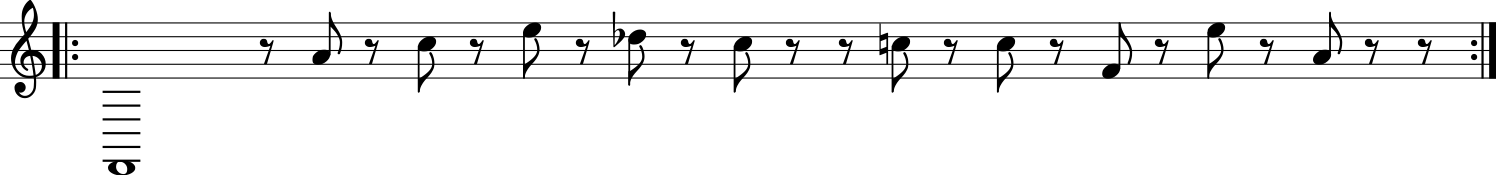

Playing corpus/generated_chords/audio_tensions/maj7/Gbmaj7_aka_Piano_11_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gbmaj7_aka_Piano_11_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


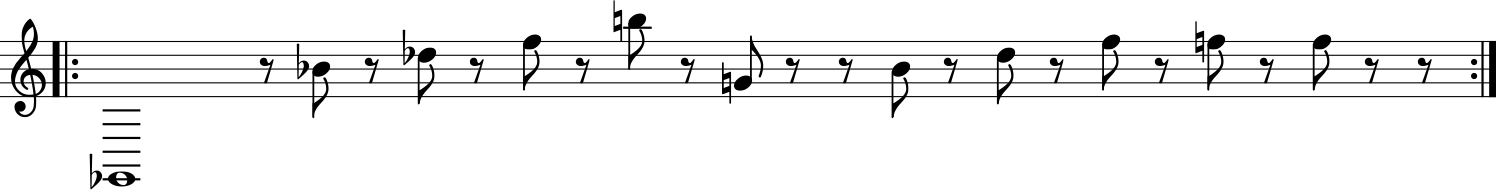

Playing corpus/generated_chords/audio_tensions/maj7/Gmaj7_aka_Piano_13_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gmaj7_aka_Piano_13_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


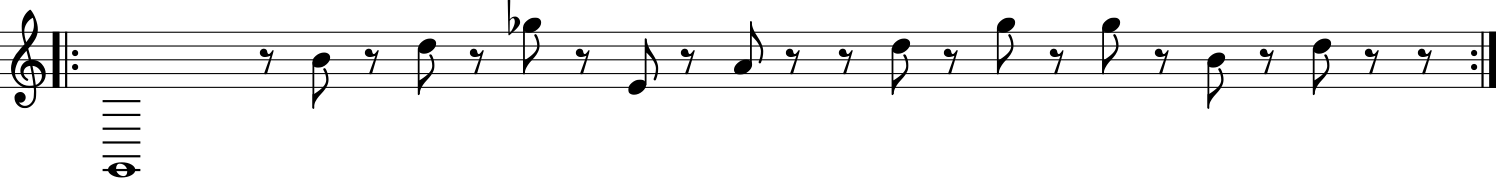

Playing corpus/generated_chords/audio_tensions/maj7/Abmaj7_aka_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Abmaj7_aka_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


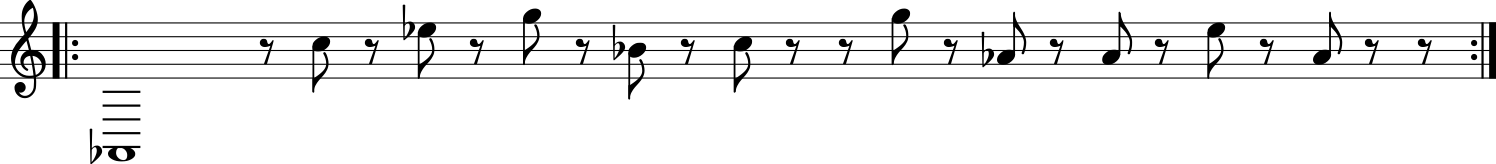

Playing corpus/generated_chords/audio_tensions/maj7/Amaj7_aka_Piano_#11_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Amaj7_aka_Piano_#11_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


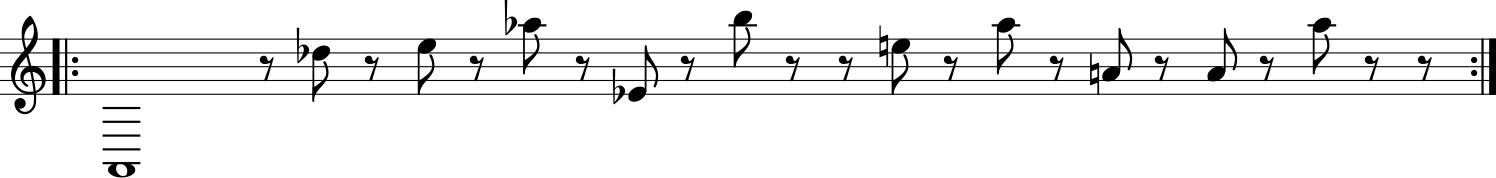

Playing corpus/generated_chords/audio_tensions/maj7/Bbmaj7_aka_Piano_11_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bbmaj7_aka_Piano_11_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


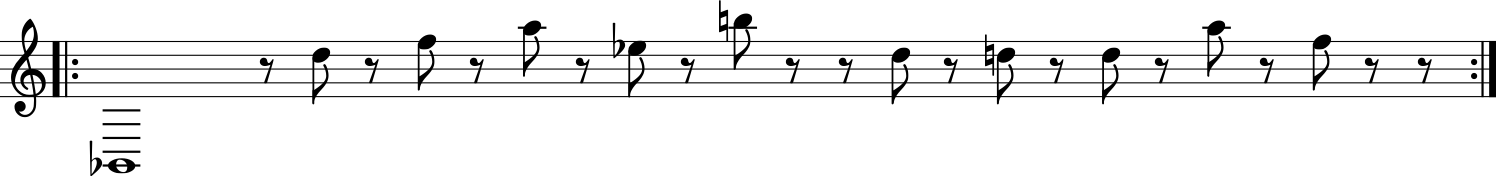

Playing corpus/generated_chords/audio_tensions/maj7/Bmaj7_aka_Piano_9_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bmaj7_aka_Piano_9_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


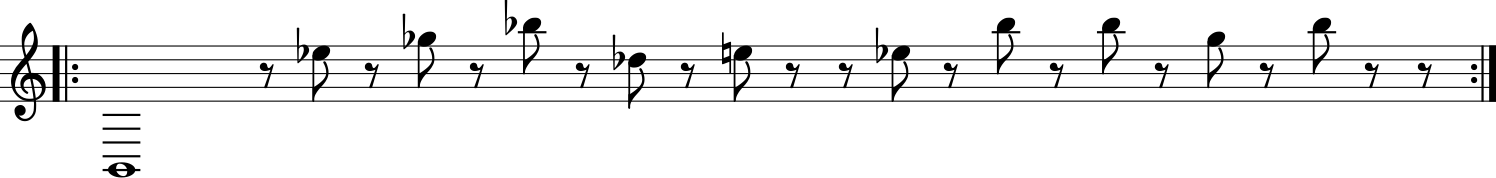

Playing corpus/generated_chords/audio_tensions/maj7/Cmaj7_aka_upper_sangha_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Cmaj7_aka_upper_sangha_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


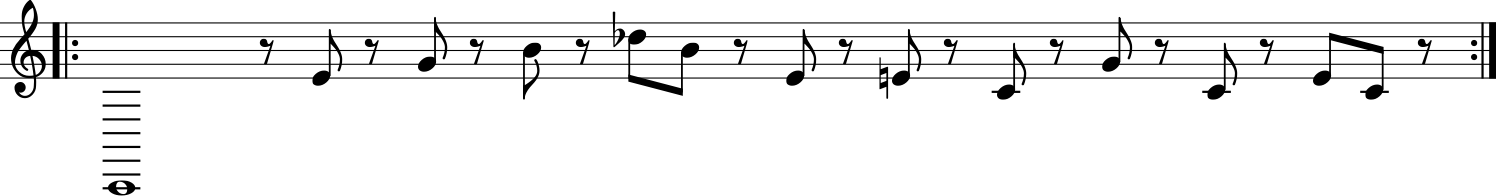

Playing corpus/generated_chords/audio_tensions/maj7/Dbmaj7_aka_upper_sangha_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dbmaj7_aka_upper_sangha_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


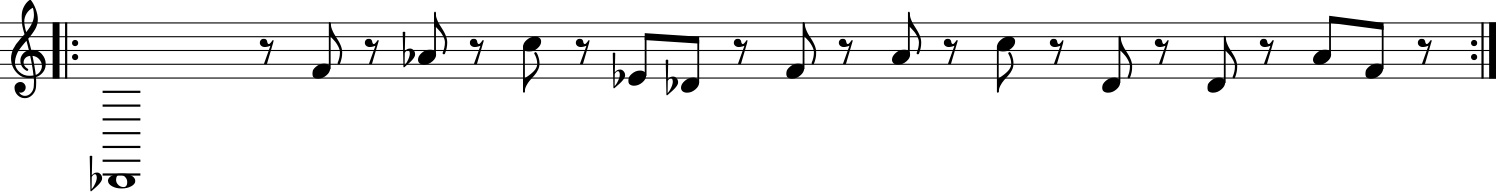

Playing corpus/generated_chords/audio_tensions/maj7/Dmaj7_aka_upper_sangha_Piano_13_9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Dmaj7_aka_upper_sangha_Piano_13_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


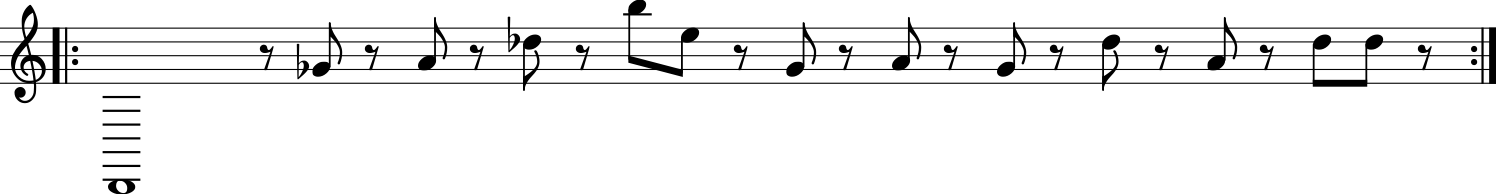

Playing corpus/generated_chords/audio_tensions/maj7/Ebmaj7_aka_upper_sangha_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Ebmaj7_aka_upper_sangha_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


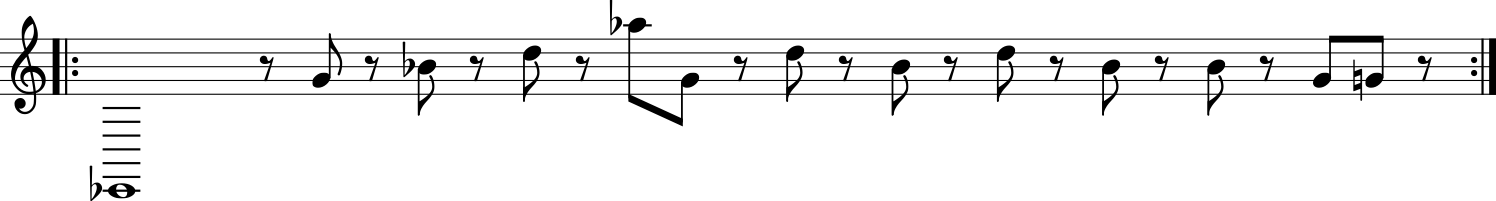

Playing corpus/generated_chords/audio_tensions/maj7/Emaj7_aka_upper_sangha_Piano_9_11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Emaj7_aka_upper_sangha_Piano_9_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


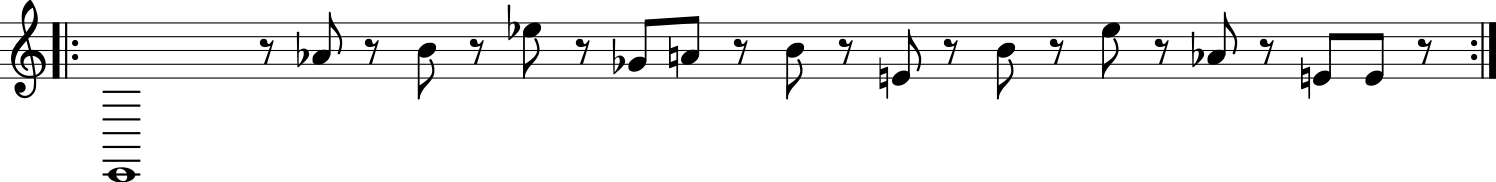

Playing corpus/generated_chords/audio_tensions/maj7/Fmaj7_aka_upper_sangha_Piano_9_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Fmaj7_aka_upper_sangha_Piano_9_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


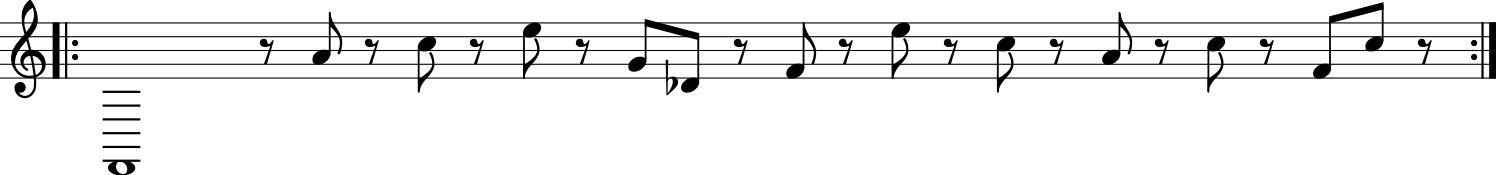

Playing corpus/generated_chords/audio_tensions/maj7/Gbmaj7_aka_upper_sangha_Piano_11_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gbmaj7_aka_upper_sangha_Piano_11_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


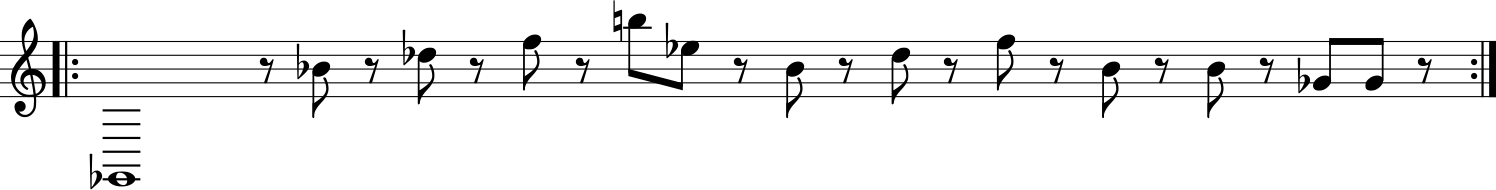

Playing corpus/generated_chords/audio_tensions/maj7/Gmaj7_aka_upper_sangha_Piano_13_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Gmaj7_aka_upper_sangha_Piano_13_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


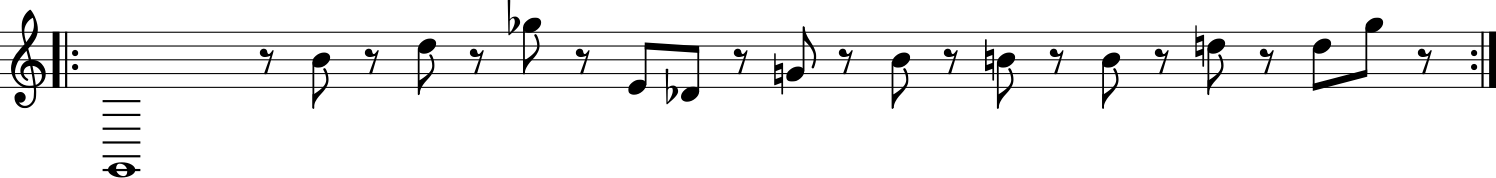

Playing corpus/generated_chords/audio_tensions/maj7/Abmaj7_aka_upper_sangha_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Abmaj7_aka_upper_sangha_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


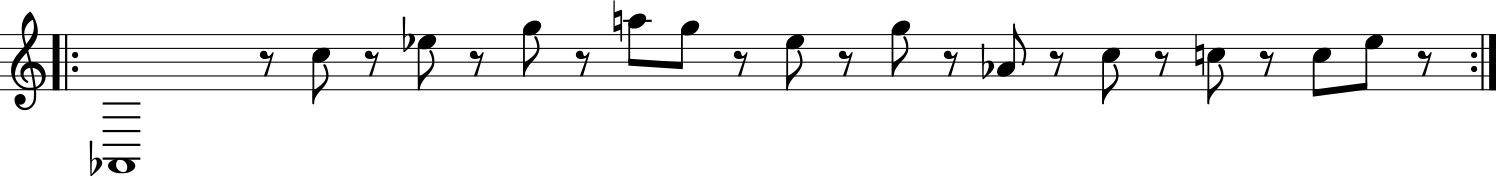

Playing corpus/generated_chords/audio_tensions/maj7/Amaj7_aka_upper_sangha_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Amaj7_aka_upper_sangha_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


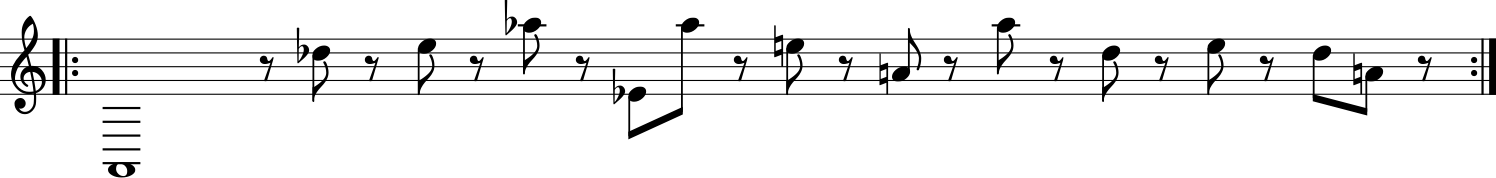

Playing corpus/generated_chords/audio_tensions/maj7/Bbmaj7_aka_upper_sangha_Piano_9_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bbmaj7_aka_upper_sangha_Piano_9_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


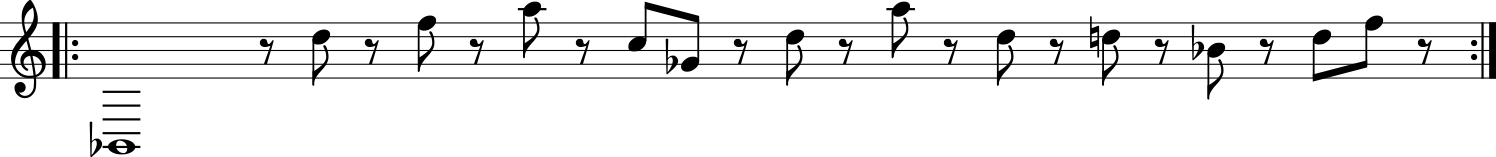

Playing corpus/generated_chords/audio_tensions/maj7/Bmaj7_aka_upper_sangha_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/maj7/Bmaj7_aka_upper_sangha_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


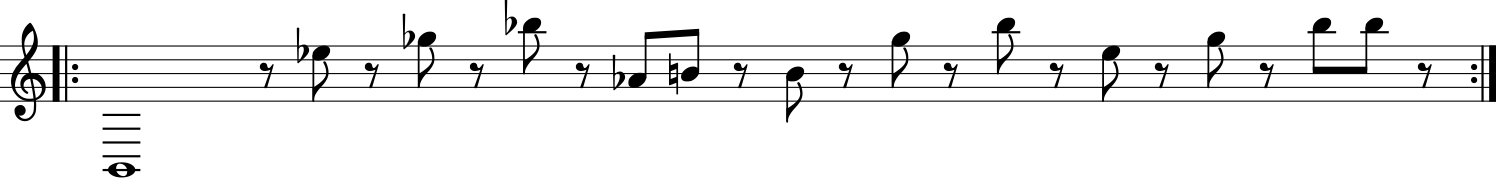

In [86]:
# variando os ritmos dos arpejos
chord_type = 'maj7'
for ritmo, n_ataques in ritmos.items():    
    
    # variando a fundamental do acorde
    for i in list(range(12)):
        
        stream_teste = generate.traditional_rhythms[ritmo].get_beat()

        # definindo cada nota do acorde a partir dos intervalos, em semitons
        fundamental = 0 + i
        terca = fundamental + 4
        quinta = fundamental + 7
        setima = fundamental + 11

        # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
        i_C = semitons[fundamental]
        i_E = semitons[terca]
        i_G = semitons[quinta]
        i_B = semitons[setima]


        # criando um dicionário, em que a chave é a distância em semitons do dó e o valor é seu nome, como string
        acorde_dict = {i_C:notes[i_C], 
                       i_E:notes[i_E], 
                       i_G:notes[i_G], 
                       i_B:notes[i_B]}


        # aqui, tratamos a questão das oitavas. terça, quinta e sétima precisam ser sempre mais agudas que a fundamental
        semitom_fundamental = i_C
        for key, value in acorde_dict.items():
            if key < semitom_fundamental:
                acorde_dict[key] = value + '5'

            else:
                acorde_dict[key] = value + '4'

        acorde_list = []
        for key, value in acorde_dict.items():
            acorde_list.append(value)


        # amostrando aleatoriamente as notas que faltam pra completar a quantidade de ataques
        # ex.: se temos 7 ataques no ritmo, amostraremos 7 - 4 = 3 notas
        # obs.: as notas extra precisam ser pertencentes ao acorde em questão
        
        
        # se tivermos exatamente 5 ataques, só podemos ter 1 tensão
        # se tivermos mais do que 5 ataques, podemos ter 1 ou 2 tensões
        if n_ataques == 5:
            n_tensoes = 1
            
            # array de tamanho 1
            tensoes = np.random.choice(tensoes_list, 
                                       size=n_tensoes).tolist()
                
        else:
            n_tensoes = np.random.choice([1, 2], 1)[0]
            # se forem 2 tensões, não pode ser b9 e 9, por ex.
            
            tipos_tensao = np.random.choice(['9', '11', '13'], 
                                            size=n_tensoes, 
                                            replace=False)
            
            # a lista abaixo contem 1 ou 2 elementos, correspondendo a quantidade de semitons da tensão
            # em relação à fundamental
            tensoes = []
            for tipo_tensao in tipos_tensao:
                if tipo_tensao == '9':
                    tensao = np.random.choice(list(dict_9.keys()), 
                                              size=1, 
                                              replace=False)[0]
                    tensoes.append(tensao)
                    
                elif tipo_tensao == '11':
                    tensao = np.random.choice(list(dict_11.keys()), 
                                              size=1, 
                                              replace=False)[0]
                    tensoes.append(tensao)
                    
                else:
                    tensao = np.random.choice(list(dict_13.keys()), 
                                              size=1, 
                                              replace=False)[0]
                    tensoes.append(tensao)
            
        
        
#         print(tensoes)
        
        # criando um dicionário em que a chave é a quantidade de semitons da nota de tensão 
        # (ex.: se a tensão for b9 e a fundamental for D, a chave será 3, correspondendo ao Eb)
        # e o valor é o nome da nota de tensão no caso da fundamental em questão. no mesmo exemplo acima, o valor
        # seria Eb.
        
        
        nomes_tensoes = []
        notas_tensoes = []
        
        for tensao in tensoes:
            nota_tensao = tensao + i 
            i_tensao = semitons[nota_tensao]
            
            oitava_tensao = np.random.choice(['4', '5'], size=1)[0]
            
            # refletindo sobre se encararia, por exemplo, um 13 como 13 mesmo ou como 6 (pela oitava)
            # aí decidi alternar. a oitava da tensão é escolhida aleatoriamente entre 4 ou 5
             
            notas_tensoes.append(notes[i_tensao] + oitava_tensao)
            nomes_tensoes.append(dict_tensoes[tensao])
            
        
        
        if n_tensoes == 1:
            str_tensoes = nomes_tensoes[0]
            
        else:
            str_tensoes = nomes_tensoes[0] + '_' + nomes_tensoes[1]
        
        
        
#         print(notas_tensoes,'|' ,'fundamental:', notes[i_C])
            
        # ----------------------------------------------------
        

        notas_extra = np.random.choice(acorde_list, 
                                       size=n_ataques - 4 - n_tensoes, 
                                       replace=True)
        
        acorde_list.extend(notas_tensoes)
        acorde_list.extend(notas_extra)
        
#         print('fundamental:', notes[i_C], acorde_list)



        # Flavio pediu pra fundamental durar o compasso todo
        durations = []
        for element in stream_teste[0]:
            durations.append(element.duration.quarterLength)

        duration_fund = sum(durations)



        # alterando as notas do nosso stream, para serem iguais às notas do acorde
        counter = 0
        for element in stream_teste[0]:
            if type(element) == music21.note.Note:

                nota_nova = acorde_list[counter]

                note_name = nota_nova[0] 
                note_octave = nota_nova[-1]

                element.step = note_name
                element.pitch.octave = note_octave

                # tratando o problema com bemóis
                if 'b' in nota_nova:
                    element.pitch.accidental = '-'
#                     print(nota_nova, element.step, element.pitch.accidental)

                else:            
                    element.pitch.accidental = 'natural'
#                     print(nota_nova, element.step)

                # fundamental deve durar o compasso todo e soar na oitava 2
                if counter == 0:
                    element.duration = music21.duration.Duration(duration_fund)
                    element.pitch.octave = 2


                counter += 1

#         stream_teste.show('midi')
        
        output_file = 'corpus/generated_chords/audio_tensions/{}/{}{}_{}_Piano_{}.mid'.format(chord_type, 
                                                                                     notes[i], 
                                                                                     chord_type, 
                                                                                     ritmo,
                                                                                     str_tensoes)
        
        stream_teste.write('midi', output_file)
        output_file_name = output_file.split('.mid')[0]
    
    
        !timidity {output_file_name}.mid -Ow -o {output_file_name}.wav
        
        stream_teste.show()

### Acordes <font color ='red'> maiores </font> com sétima <font color ='blue'> menor </font>

Playing corpus/generated_chords/audio_tensions/7/C7_york-samai_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/C7_york-samai_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


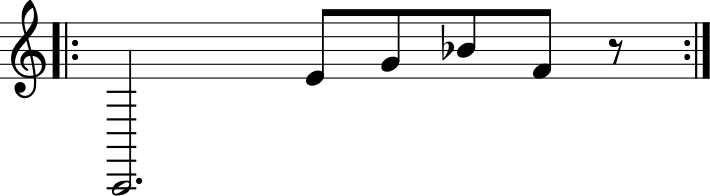

Playing corpus/generated_chords/audio_tensions/7/Db7_york-samai_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Db7_york-samai_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


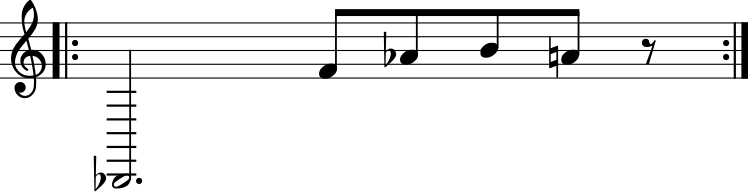

Playing corpus/generated_chords/audio_tensions/7/D7_york-samai_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/D7_york-samai_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


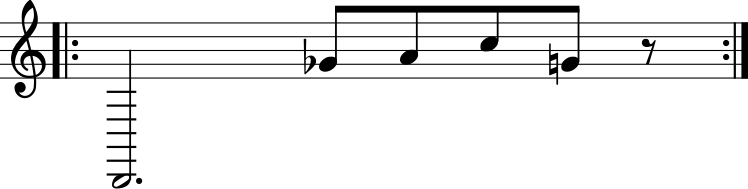

Playing corpus/generated_chords/audio_tensions/7/Eb7_york-samai_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Eb7_york-samai_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


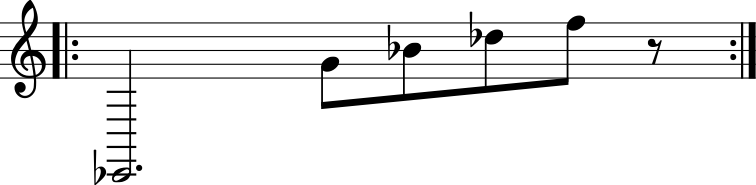

Playing corpus/generated_chords/audio_tensions/7/E7_york-samai_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/E7_york-samai_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


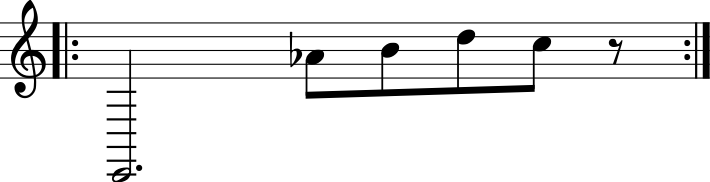

Playing corpus/generated_chords/audio_tensions/7/F7_york-samai_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/F7_york-samai_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


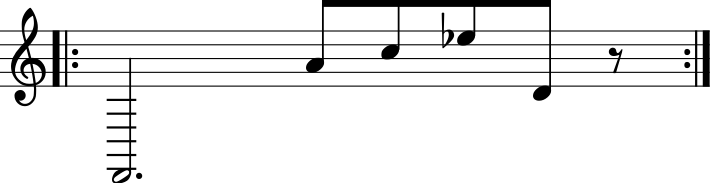

Playing corpus/generated_chords/audio_tensions/7/Gb7_york-samai_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Gb7_york-samai_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


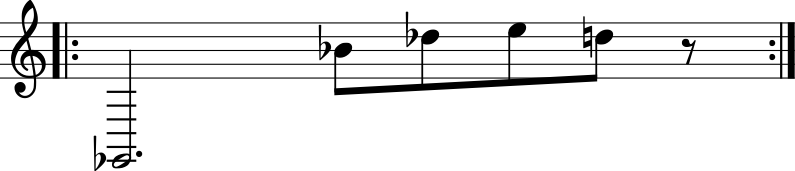

Playing corpus/generated_chords/audio_tensions/7/G7_york-samai_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/G7_york-samai_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


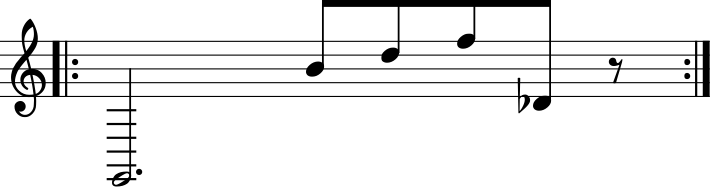

Playing corpus/generated_chords/audio_tensions/7/Ab7_york-samai_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Ab7_york-samai_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


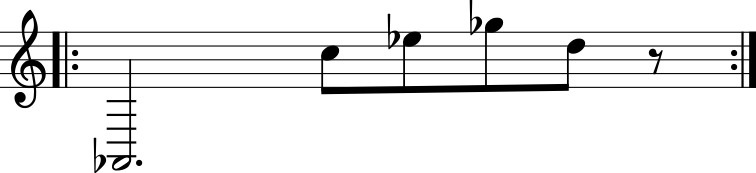

Playing corpus/generated_chords/audio_tensions/7/A7_york-samai_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/A7_york-samai_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


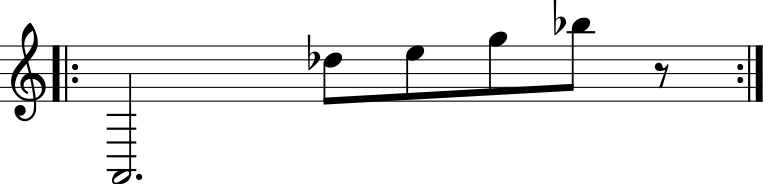

Playing corpus/generated_chords/audio_tensions/7/Bb7_york-samai_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Bb7_york-samai_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


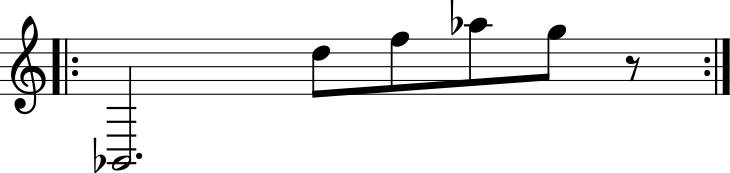

Playing corpus/generated_chords/audio_tensions/7/B7_york-samai_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/B7_york-samai_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


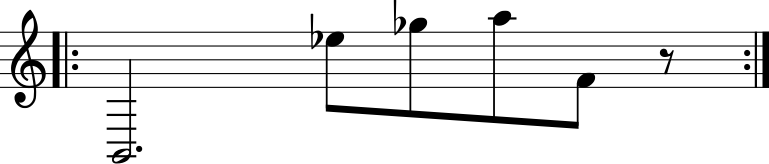

Playing corpus/generated_chords/audio_tensions/7/C7_Nawakhat_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/C7_Nawakhat_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


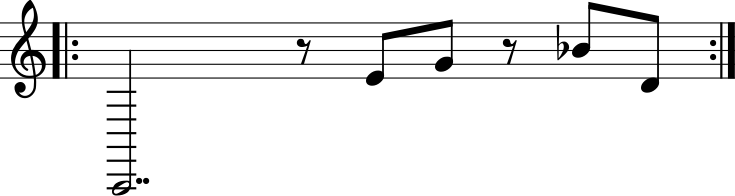

Playing corpus/generated_chords/audio_tensions/7/Db7_Nawakhat_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Db7_Nawakhat_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


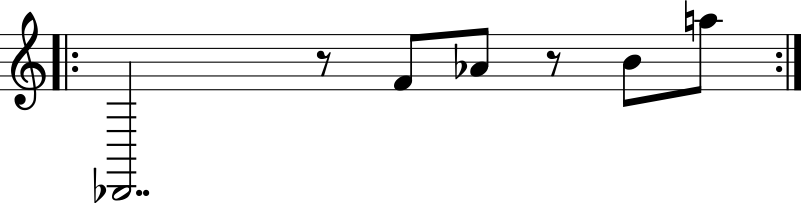

Playing corpus/generated_chords/audio_tensions/7/D7_Nawakhat_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/D7_Nawakhat_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


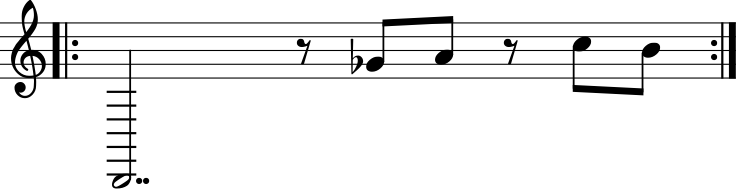

Playing corpus/generated_chords/audio_tensions/7/Eb7_Nawakhat_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Eb7_Nawakhat_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


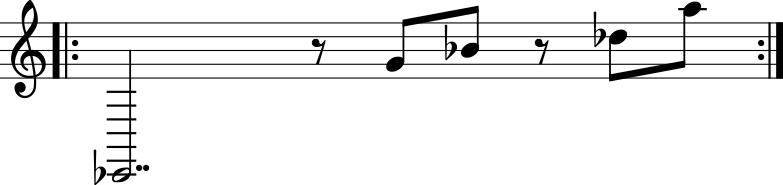

Playing corpus/generated_chords/audio_tensions/7/E7_Nawakhat_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/E7_Nawakhat_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


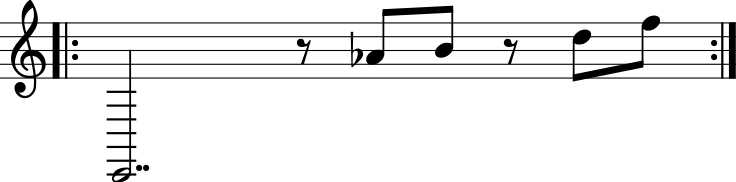

Playing corpus/generated_chords/audio_tensions/7/F7_Nawakhat_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/F7_Nawakhat_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


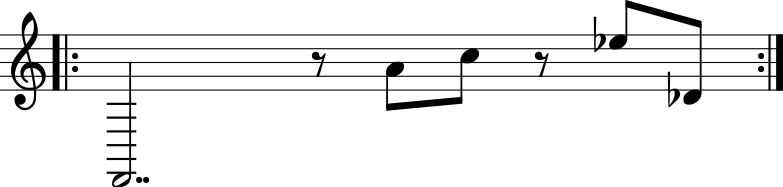

Playing corpus/generated_chords/audio_tensions/7/Gb7_Nawakhat_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Gb7_Nawakhat_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


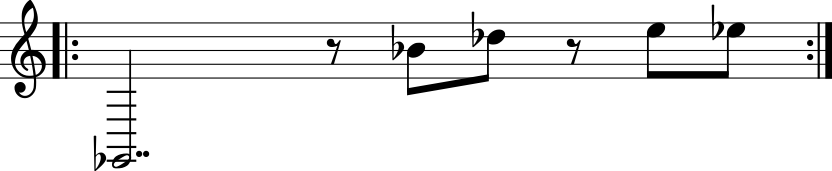

Playing corpus/generated_chords/audio_tensions/7/G7_Nawakhat_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/G7_Nawakhat_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


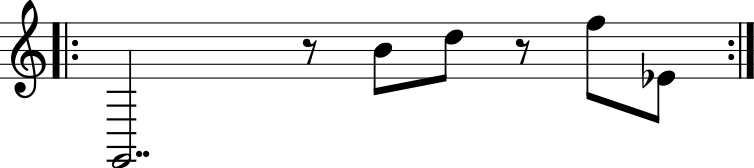

Playing corpus/generated_chords/audio_tensions/7/Ab7_Nawakhat_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Ab7_Nawakhat_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


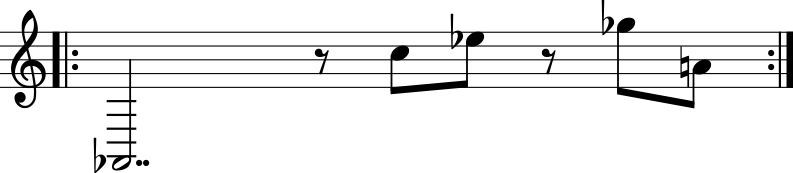

Playing corpus/generated_chords/audio_tensions/7/A7_Nawakhat_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/A7_Nawakhat_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


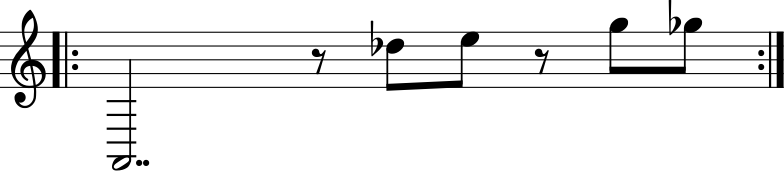

Playing corpus/generated_chords/audio_tensions/7/Bb7_Nawakhat_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Bb7_Nawakhat_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


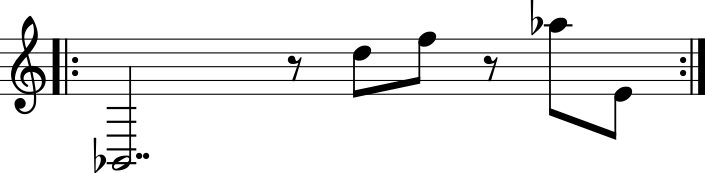

Playing corpus/generated_chords/audio_tensions/7/B7_Nawakhat_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/B7_Nawakhat_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


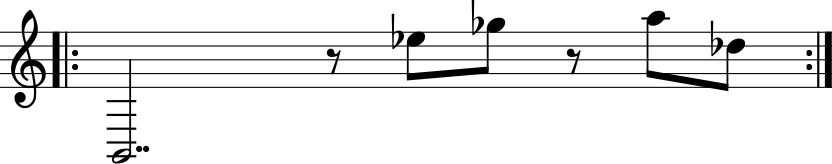

Playing corpus/generated_chords/audio_tensions/7/C7_cinquillo_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/C7_cinquillo_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


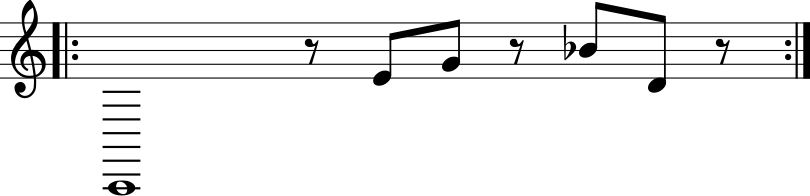

Playing corpus/generated_chords/audio_tensions/7/Db7_cinquillo_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Db7_cinquillo_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


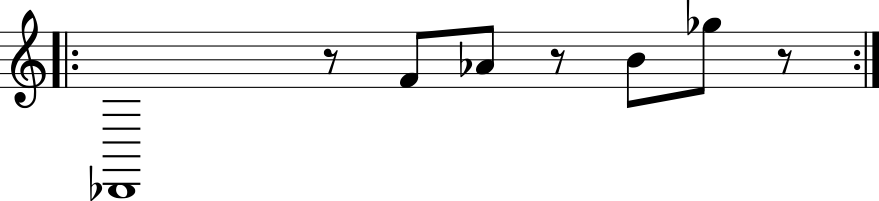

Playing corpus/generated_chords/audio_tensions/7/D7_cinquillo_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/D7_cinquillo_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


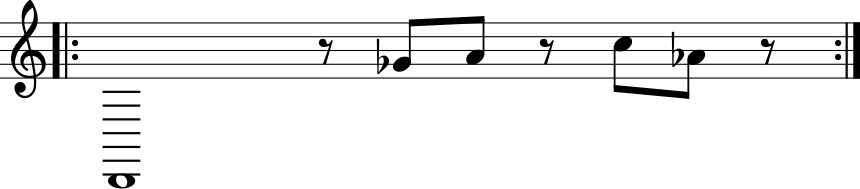

Playing corpus/generated_chords/audio_tensions/7/Eb7_cinquillo_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Eb7_cinquillo_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


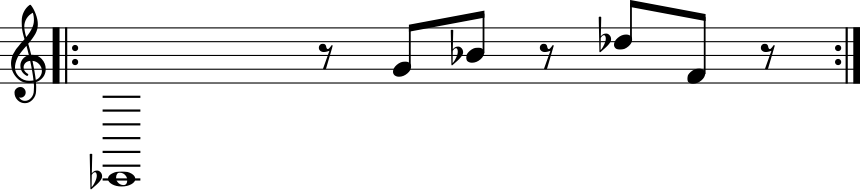

Playing corpus/generated_chords/audio_tensions/7/E7_cinquillo_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/E7_cinquillo_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


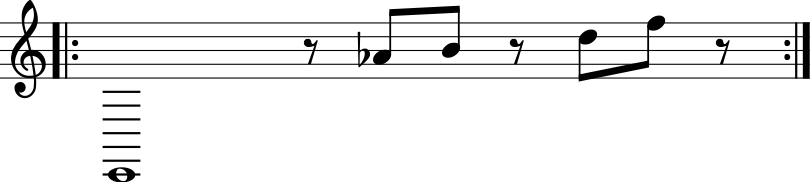

Playing corpus/generated_chords/audio_tensions/7/F7_cinquillo_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/F7_cinquillo_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


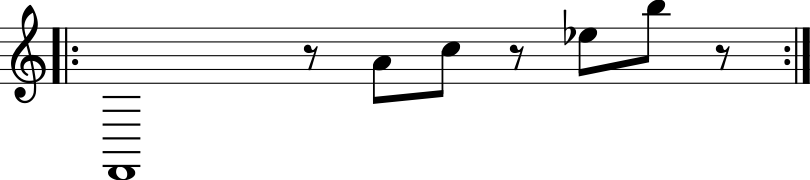

Playing corpus/generated_chords/audio_tensions/7/Gb7_cinquillo_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Gb7_cinquillo_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


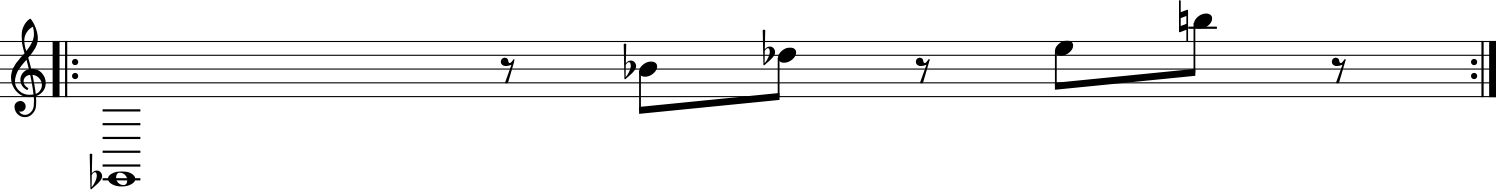

Playing corpus/generated_chords/audio_tensions/7/G7_cinquillo_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/G7_cinquillo_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


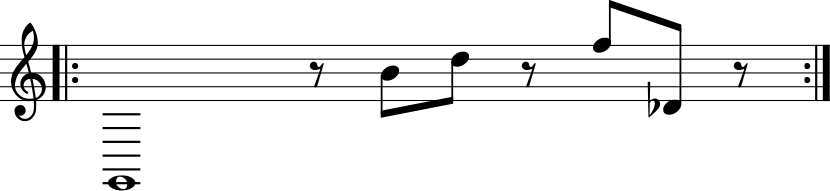

Playing corpus/generated_chords/audio_tensions/7/Ab7_cinquillo_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Ab7_cinquillo_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


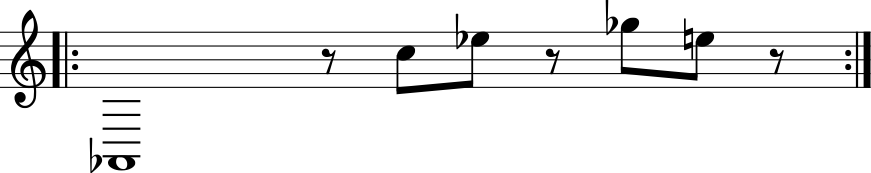

Playing corpus/generated_chords/audio_tensions/7/A7_cinquillo_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/A7_cinquillo_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


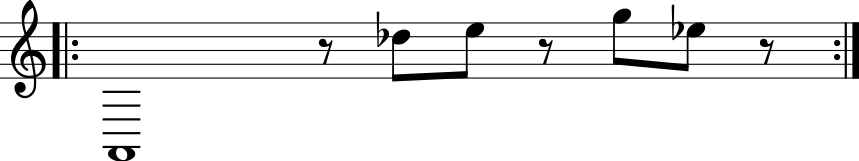

Playing corpus/generated_chords/audio_tensions/7/Bb7_cinquillo_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Bb7_cinquillo_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


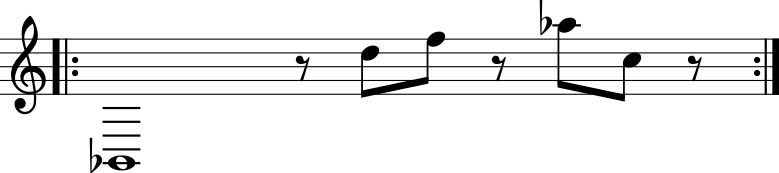

Playing corpus/generated_chords/audio_tensions/7/B7_cinquillo_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/B7_cinquillo_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


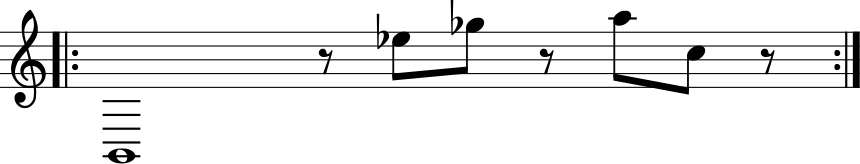

Playing corpus/generated_chords/audio_tensions/7/C7_spanish_tango_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/C7_spanish_tango_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


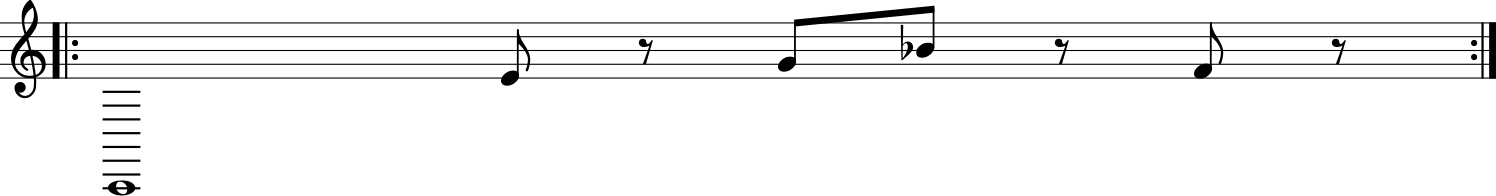

Playing corpus/generated_chords/audio_tensions/7/Db7_spanish_tango_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Db7_spanish_tango_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


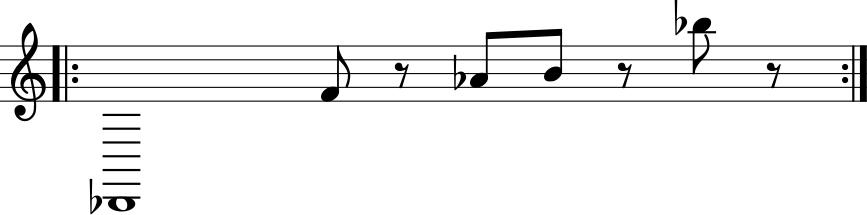

Playing corpus/generated_chords/audio_tensions/7/D7_spanish_tango_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/D7_spanish_tango_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


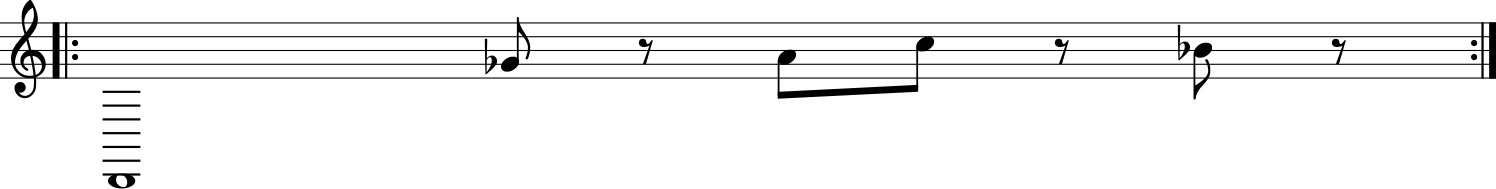

Playing corpus/generated_chords/audio_tensions/7/Eb7_spanish_tango_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Eb7_spanish_tango_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


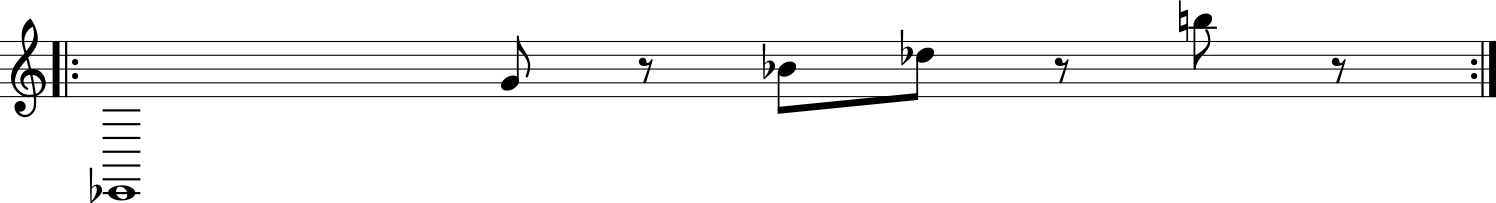

Playing corpus/generated_chords/audio_tensions/7/E7_spanish_tango_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/E7_spanish_tango_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


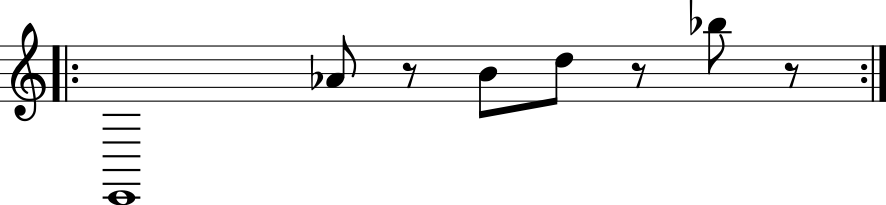

Playing corpus/generated_chords/audio_tensions/7/F7_spanish_tango_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/F7_spanish_tango_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


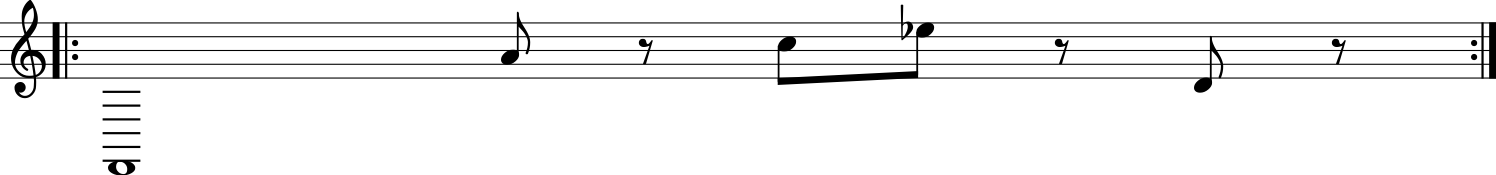

Playing corpus/generated_chords/audio_tensions/7/Gb7_spanish_tango_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Gb7_spanish_tango_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


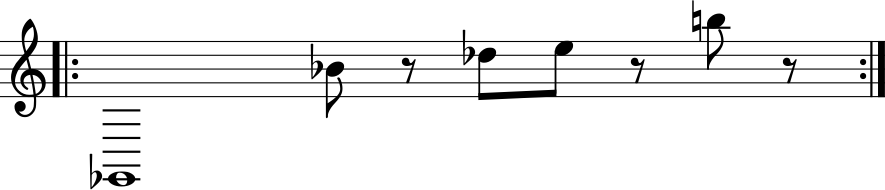

Playing corpus/generated_chords/audio_tensions/7/G7_spanish_tango_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/G7_spanish_tango_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


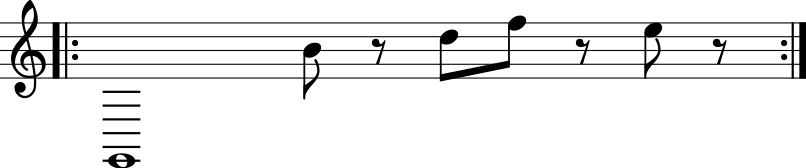

Playing corpus/generated_chords/audio_tensions/7/Ab7_spanish_tango_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Ab7_spanish_tango_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


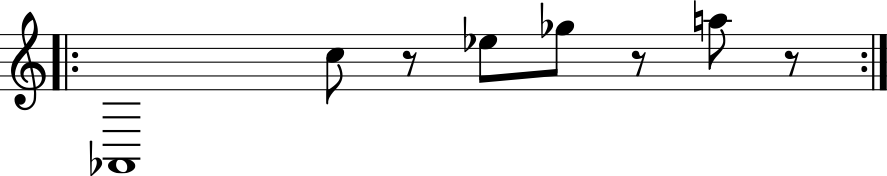

Playing corpus/generated_chords/audio_tensions/7/A7_spanish_tango_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/A7_spanish_tango_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


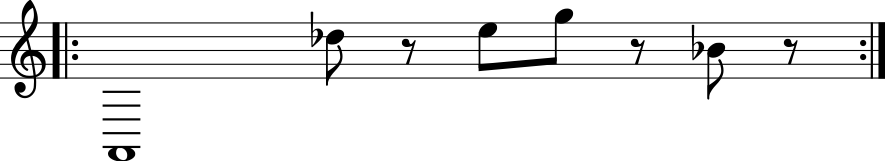

Playing corpus/generated_chords/audio_tensions/7/Bb7_spanish_tango_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Bb7_spanish_tango_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


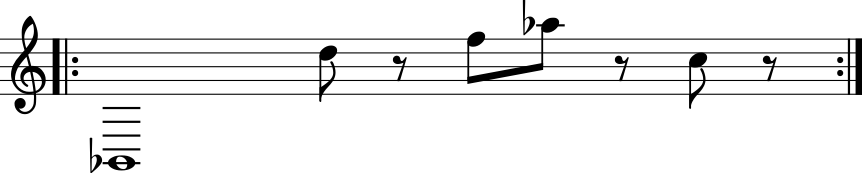

Playing corpus/generated_chords/audio_tensions/7/B7_spanish_tango_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/B7_spanish_tango_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


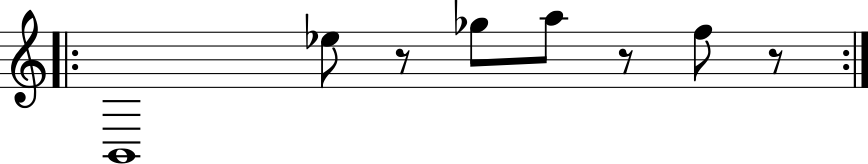

Playing corpus/generated_chords/audio_tensions/7/C7_al-saghil-al-sani_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/C7_al-saghil-al-sani_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


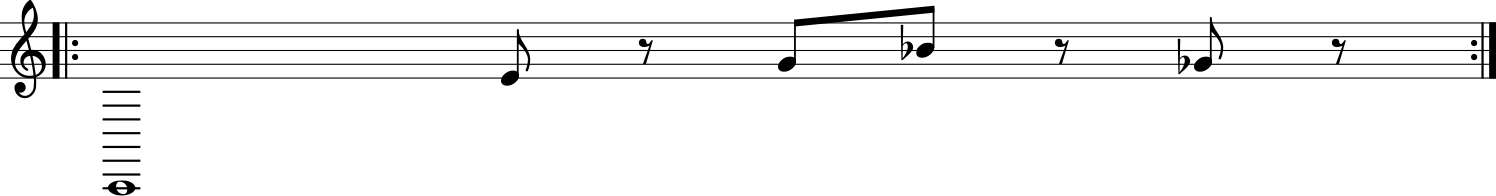

Playing corpus/generated_chords/audio_tensions/7/Db7_al-saghil-al-sani_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Db7_al-saghil-al-sani_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


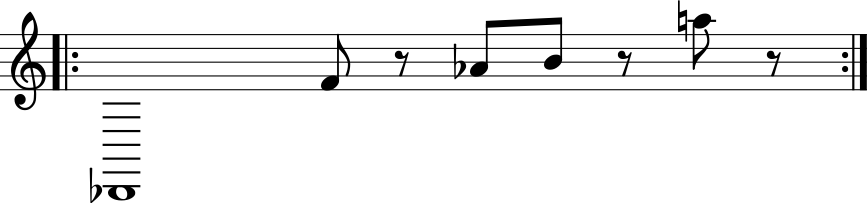

Playing corpus/generated_chords/audio_tensions/7/D7_al-saghil-al-sani_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/D7_al-saghil-al-sani_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


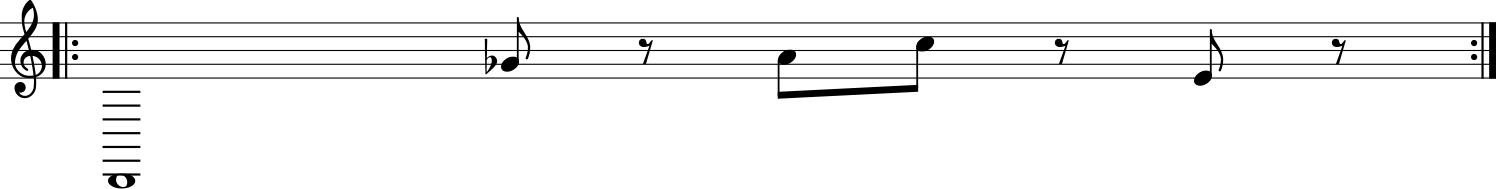

Playing corpus/generated_chords/audio_tensions/7/Eb7_al-saghil-al-sani_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Eb7_al-saghil-al-sani_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


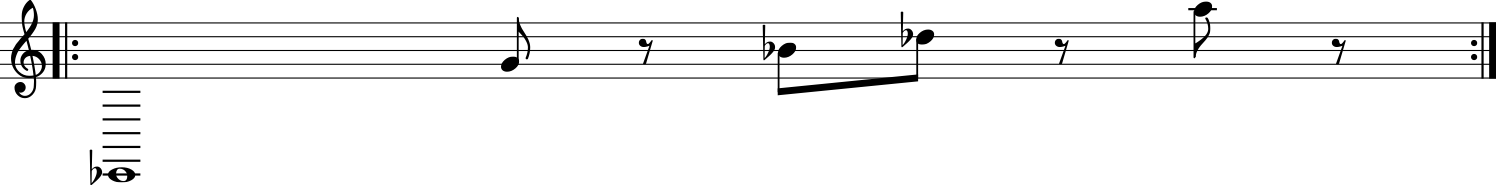

Playing corpus/generated_chords/audio_tensions/7/E7_al-saghil-al-sani_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/E7_al-saghil-al-sani_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


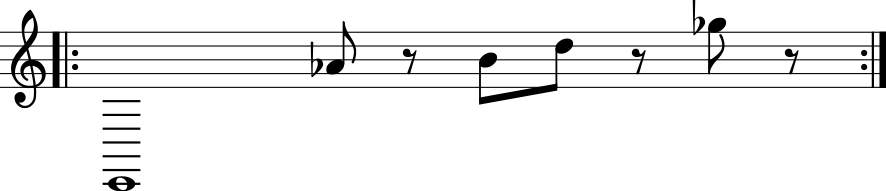

Playing corpus/generated_chords/audio_tensions/7/F7_al-saghil-al-sani_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/F7_al-saghil-al-sani_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


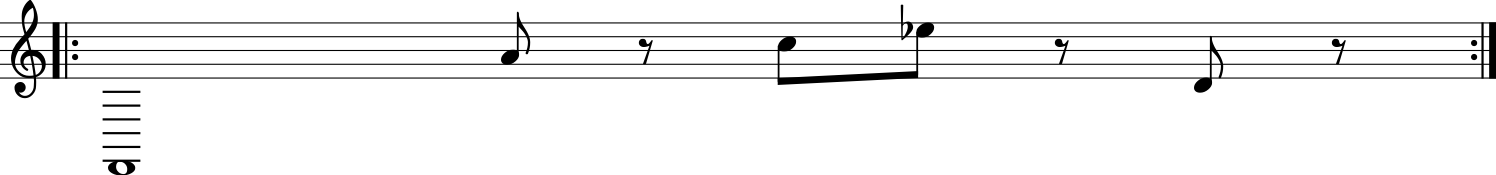

Playing corpus/generated_chords/audio_tensions/7/Gb7_al-saghil-al-sani_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Gb7_al-saghil-al-sani_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


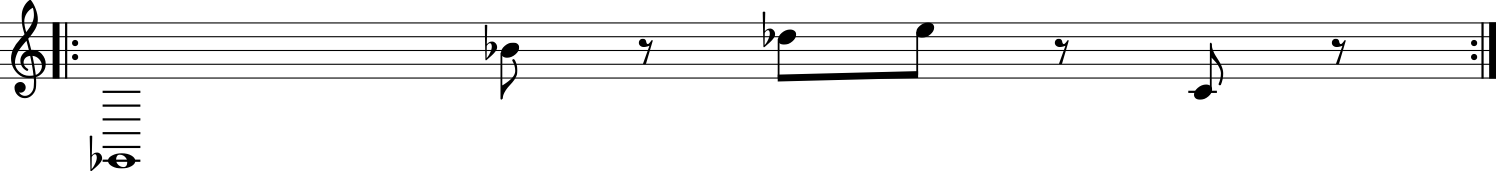

Playing corpus/generated_chords/audio_tensions/7/G7_al-saghil-al-sani_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/G7_al-saghil-al-sani_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


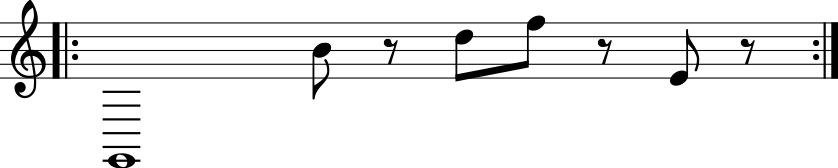

Playing corpus/generated_chords/audio_tensions/7/Ab7_al-saghil-al-sani_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Ab7_al-saghil-al-sani_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


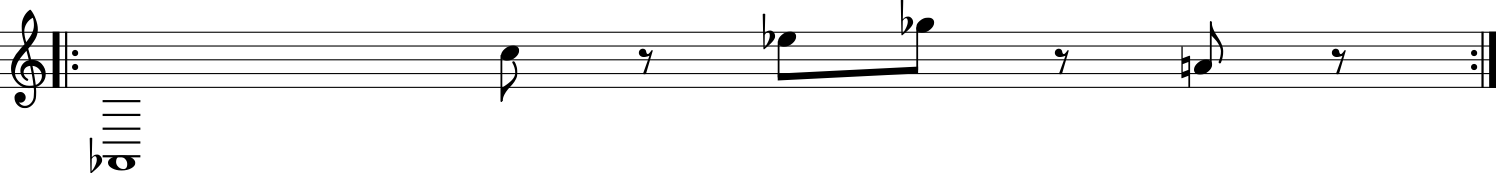

Playing corpus/generated_chords/audio_tensions/7/A7_al-saghil-al-sani_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/A7_al-saghil-al-sani_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


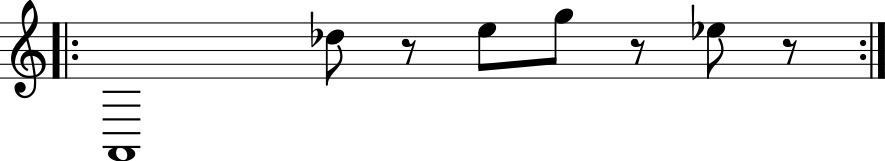

Playing corpus/generated_chords/audio_tensions/7/Bb7_al-saghil-al-sani_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Bb7_al-saghil-al-sani_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


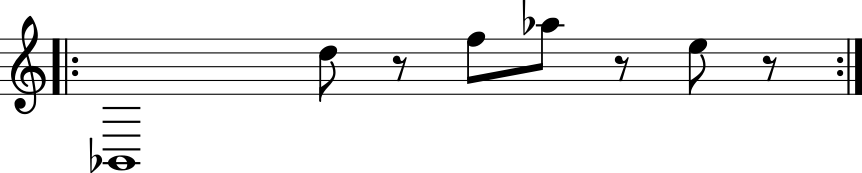

Playing corpus/generated_chords/audio_tensions/7/B7_al-saghil-al-sani_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/B7_al-saghil-al-sani_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


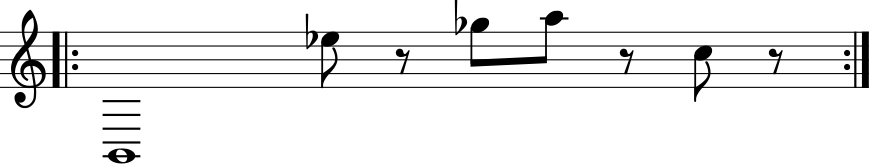

Playing corpus/generated_chords/audio_tensions/7/C7_agsag-samai_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/C7_agsag-samai_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


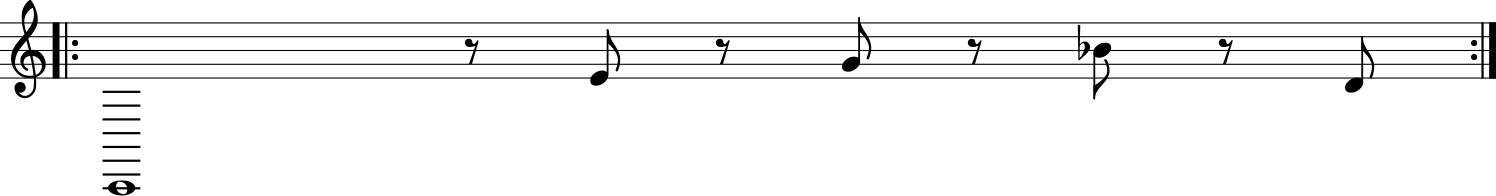

Playing corpus/generated_chords/audio_tensions/7/Db7_agsag-samai_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Db7_agsag-samai_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


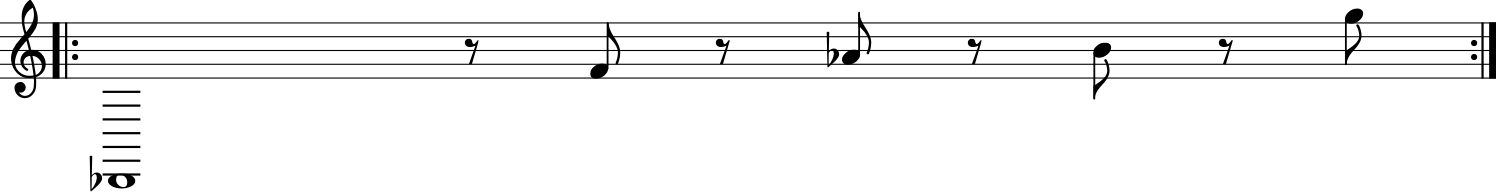

Playing corpus/generated_chords/audio_tensions/7/D7_agsag-samai_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/D7_agsag-samai_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


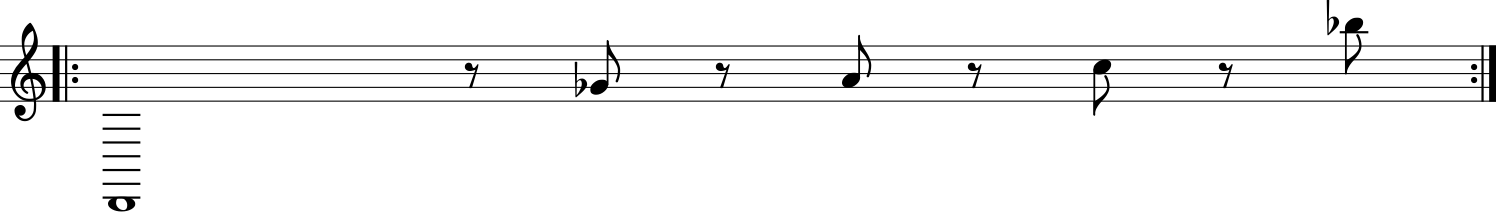

Playing corpus/generated_chords/audio_tensions/7/Eb7_agsag-samai_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Eb7_agsag-samai_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


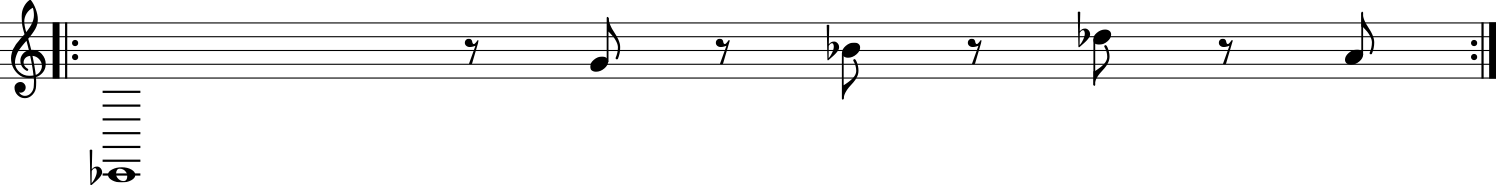

Playing corpus/generated_chords/audio_tensions/7/E7_agsag-samai_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/E7_agsag-samai_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


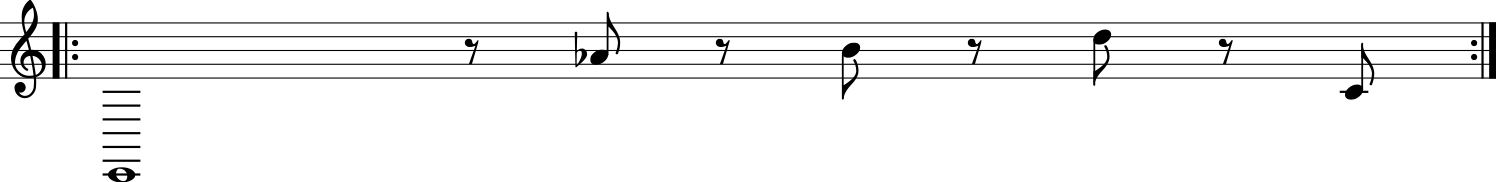

Playing corpus/generated_chords/audio_tensions/7/F7_agsag-samai_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/F7_agsag-samai_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


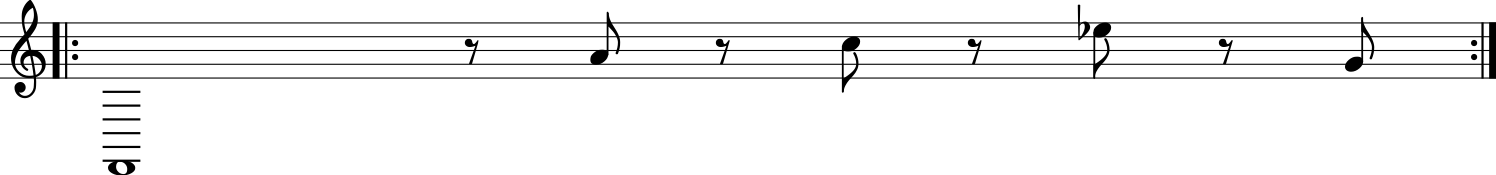

Playing corpus/generated_chords/audio_tensions/7/Gb7_agsag-samai_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Gb7_agsag-samai_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


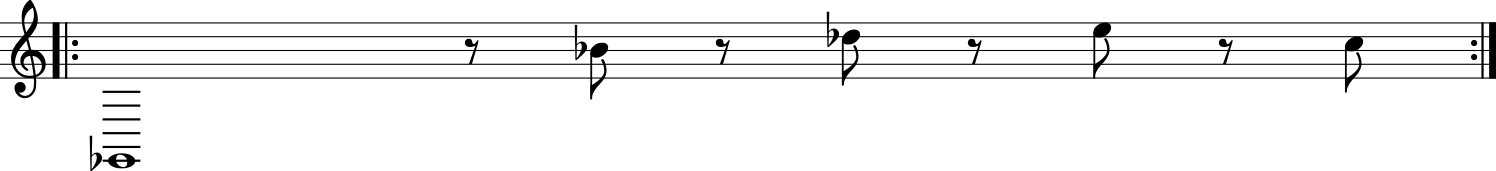

Playing corpus/generated_chords/audio_tensions/7/G7_agsag-samai_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/G7_agsag-samai_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


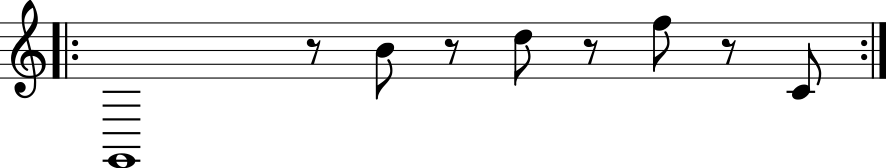

Playing corpus/generated_chords/audio_tensions/7/Ab7_agsag-samai_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Ab7_agsag-samai_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


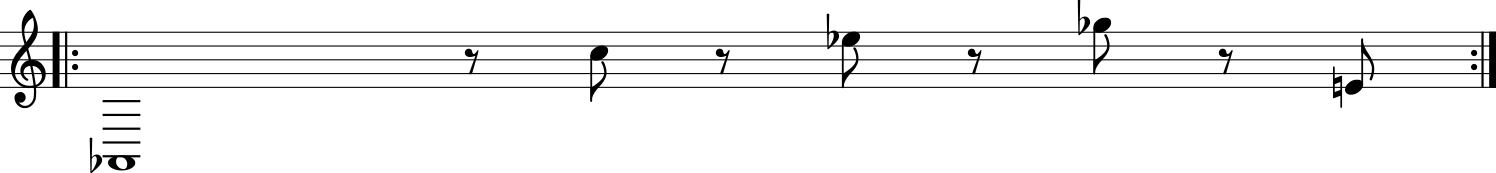

Playing corpus/generated_chords/audio_tensions/7/A7_agsag-samai_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/A7_agsag-samai_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


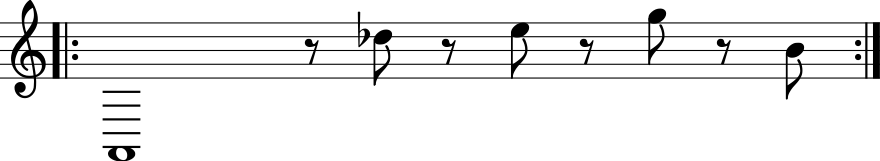

Playing corpus/generated_chords/audio_tensions/7/Bb7_agsag-samai_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Bb7_agsag-samai_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


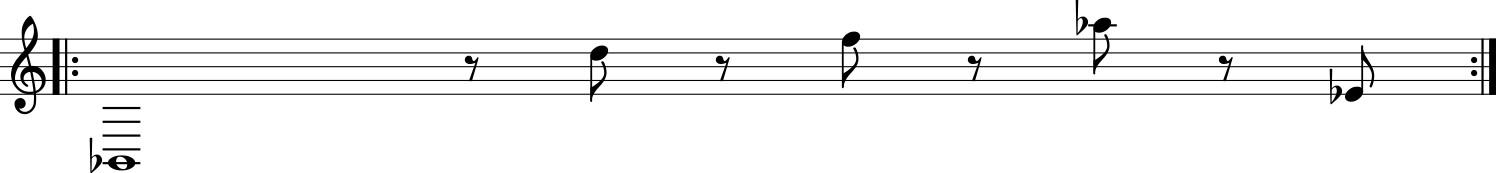

Playing corpus/generated_chords/audio_tensions/7/B7_agsag-samai_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/B7_agsag-samai_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


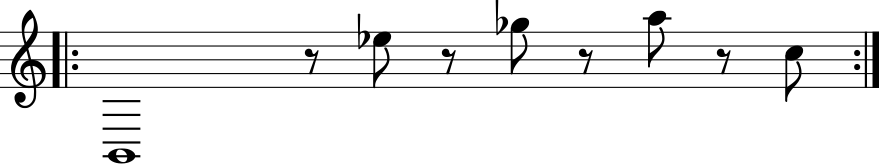

Playing corpus/generated_chords/audio_tensions/7/C7_venda_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/C7_venda_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


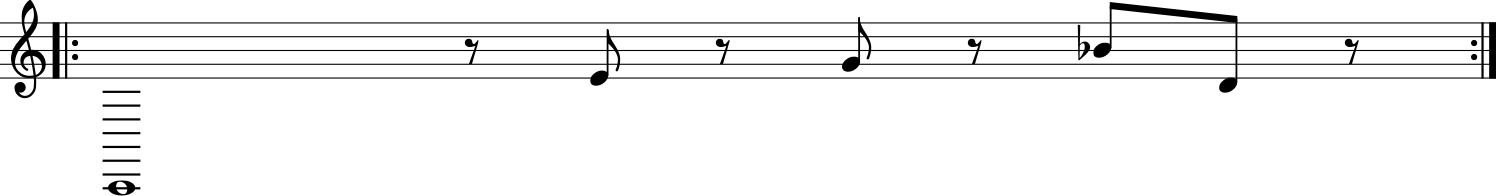

Playing corpus/generated_chords/audio_tensions/7/Db7_venda_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Db7_venda_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


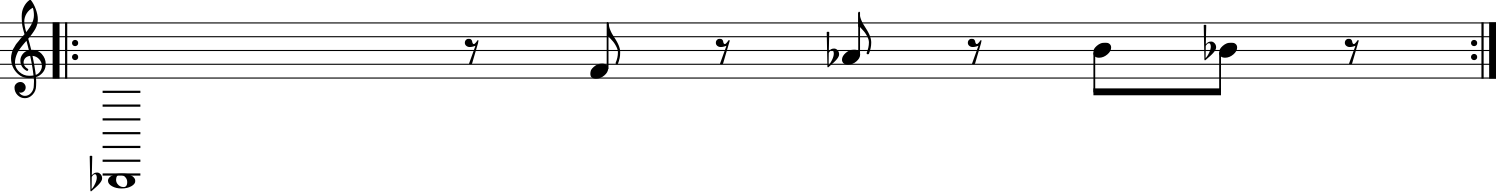

Playing corpus/generated_chords/audio_tensions/7/D7_venda_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/D7_venda_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


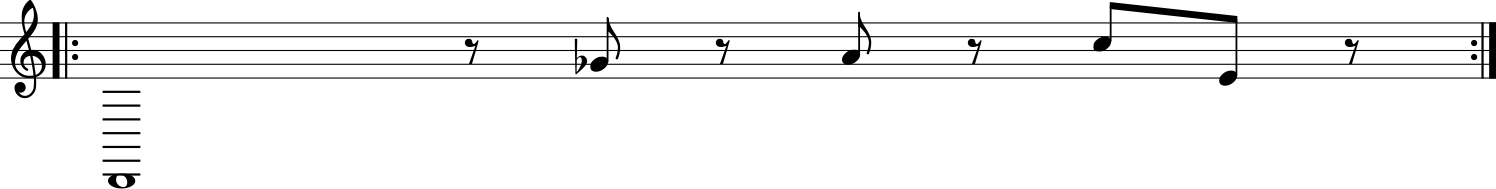

Playing corpus/generated_chords/audio_tensions/7/Eb7_venda_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Eb7_venda_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


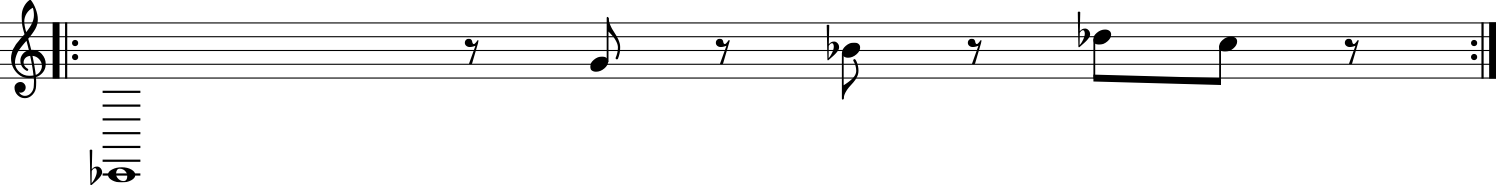

Playing corpus/generated_chords/audio_tensions/7/E7_venda_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/E7_venda_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


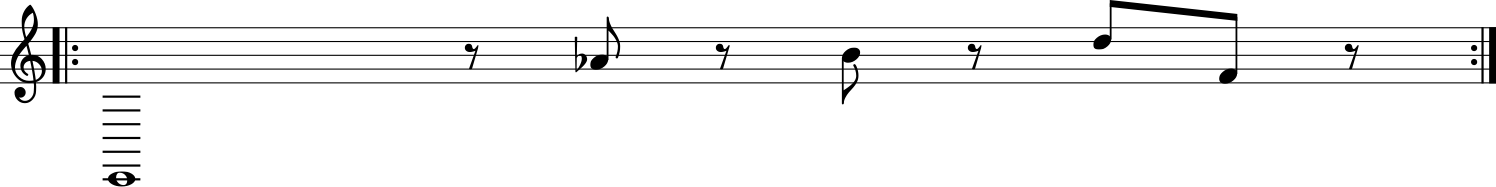

Playing corpus/generated_chords/audio_tensions/7/F7_venda_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/F7_venda_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


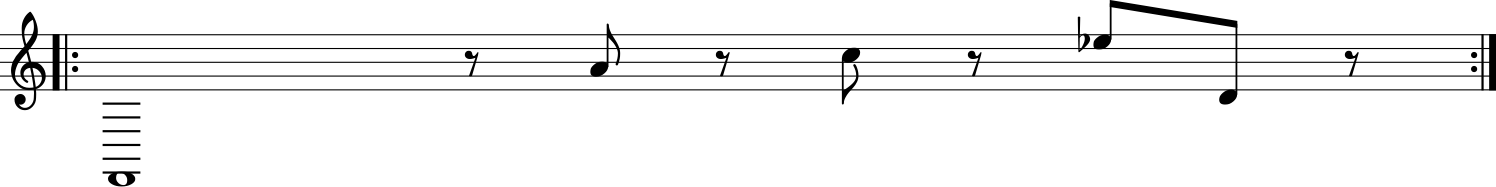

Playing corpus/generated_chords/audio_tensions/7/Gb7_venda_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Gb7_venda_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


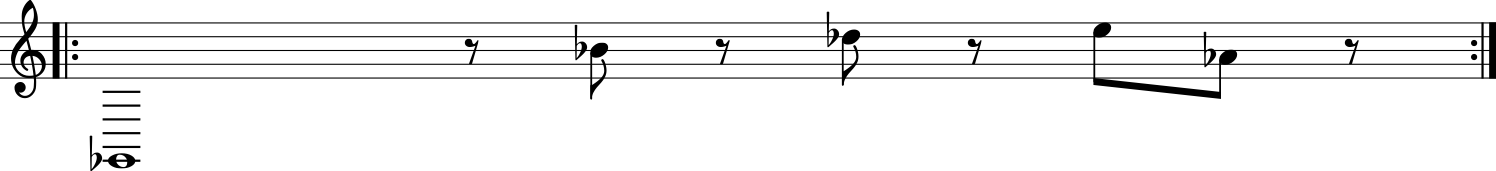

Playing corpus/generated_chords/audio_tensions/7/G7_venda_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/G7_venda_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


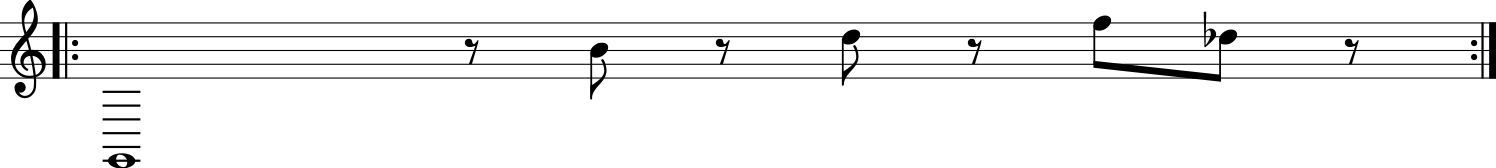

Playing corpus/generated_chords/audio_tensions/7/Ab7_venda_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Ab7_venda_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


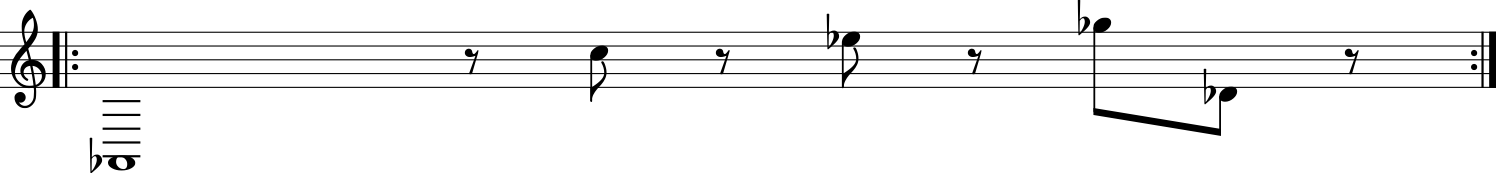

Playing corpus/generated_chords/audio_tensions/7/A7_venda_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/A7_venda_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


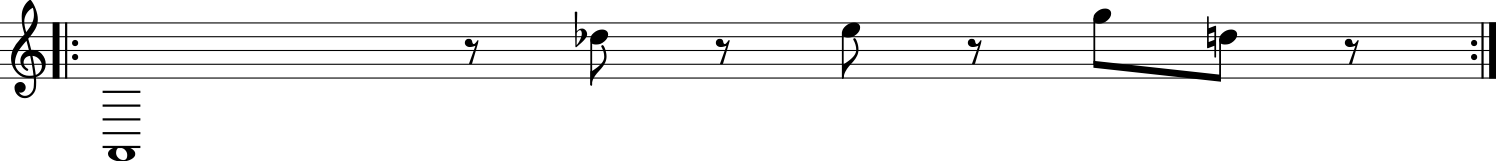

Playing corpus/generated_chords/audio_tensions/7/Bb7_venda_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Bb7_venda_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


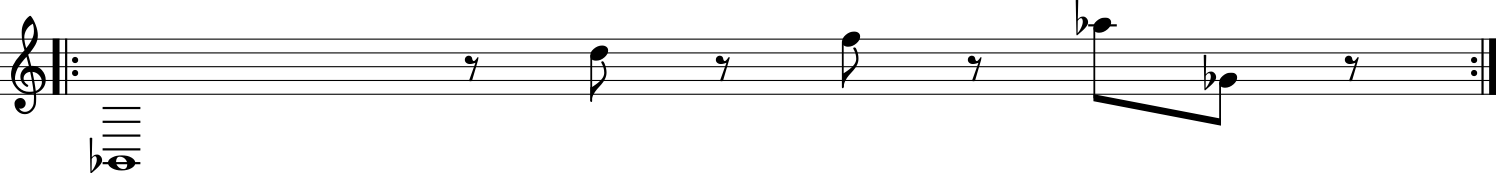

Playing corpus/generated_chords/audio_tensions/7/B7_venda_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/B7_venda_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


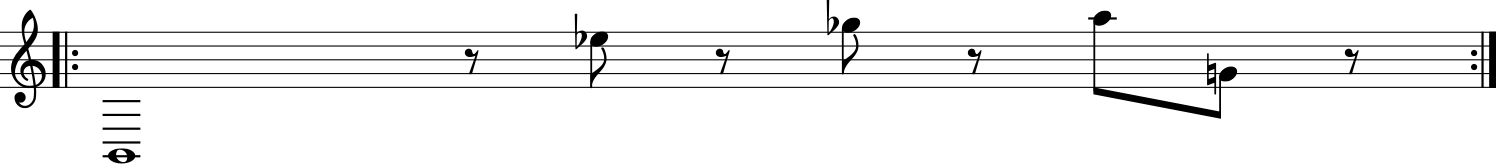

Playing corpus/generated_chords/audio_tensions/7/C7_pictures_at_an_exhibition_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/C7_pictures_at_an_exhibition_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


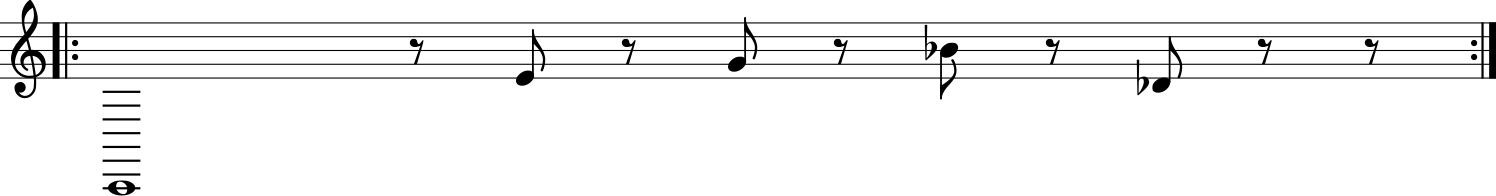

Playing corpus/generated_chords/audio_tensions/7/Db7_pictures_at_an_exhibition_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Db7_pictures_at_an_exhibition_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


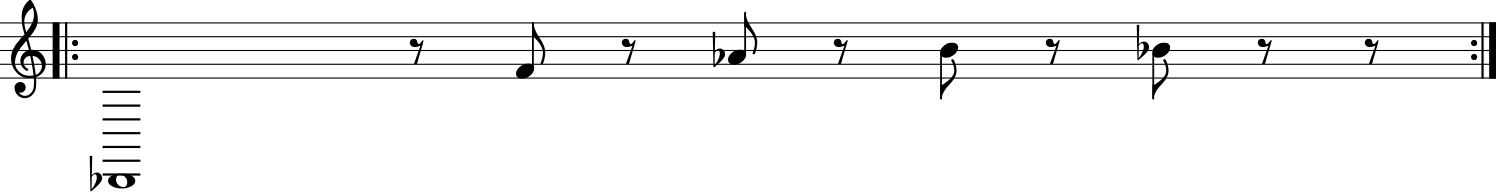

Playing corpus/generated_chords/audio_tensions/7/D7_pictures_at_an_exhibition_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/D7_pictures_at_an_exhibition_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


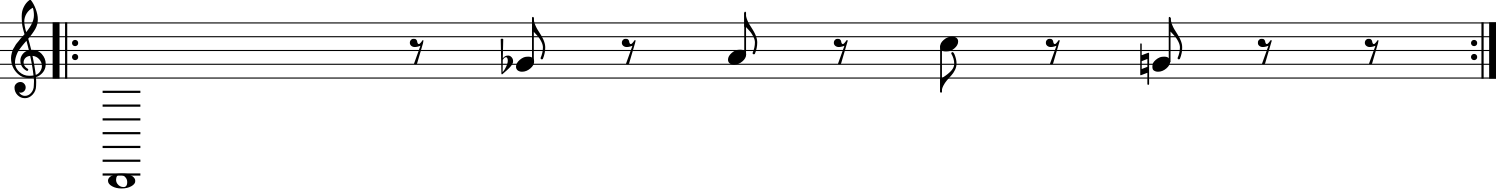

Playing corpus/generated_chords/audio_tensions/7/Eb7_pictures_at_an_exhibition_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Eb7_pictures_at_an_exhibition_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


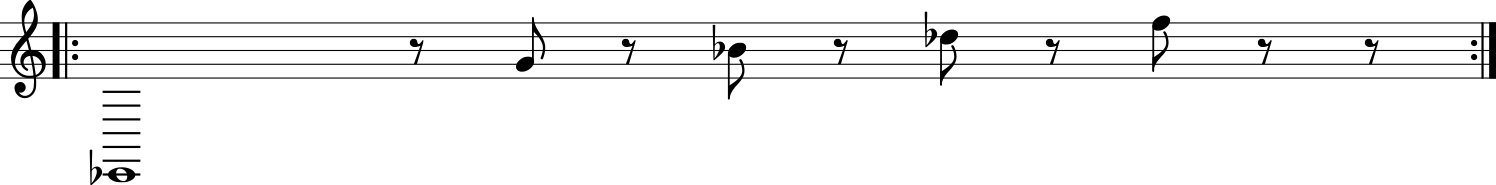

Playing corpus/generated_chords/audio_tensions/7/E7_pictures_at_an_exhibition_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/E7_pictures_at_an_exhibition_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


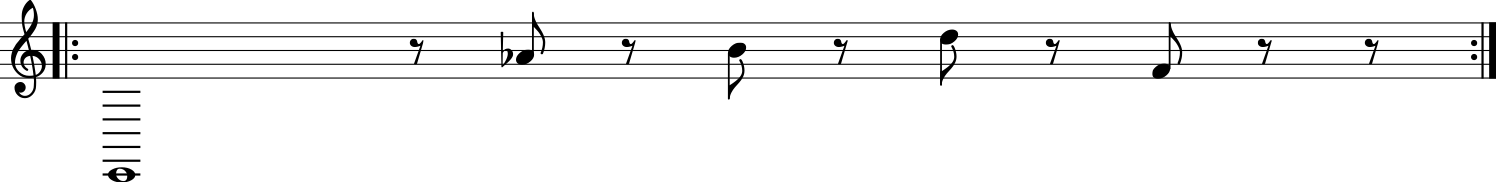

Playing corpus/generated_chords/audio_tensions/7/F7_pictures_at_an_exhibition_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/F7_pictures_at_an_exhibition_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


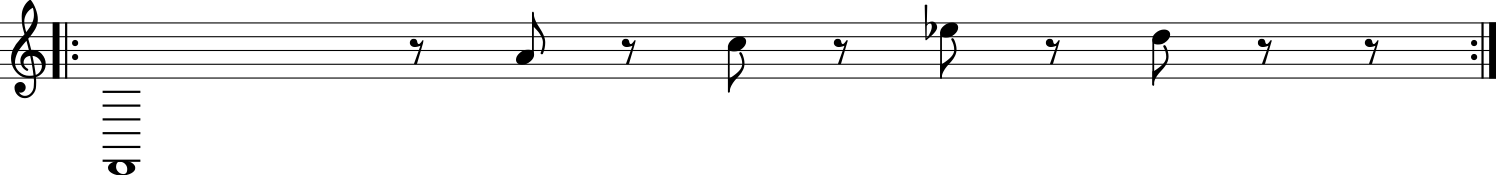

Playing corpus/generated_chords/audio_tensions/7/Gb7_pictures_at_an_exhibition_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Gb7_pictures_at_an_exhibition_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


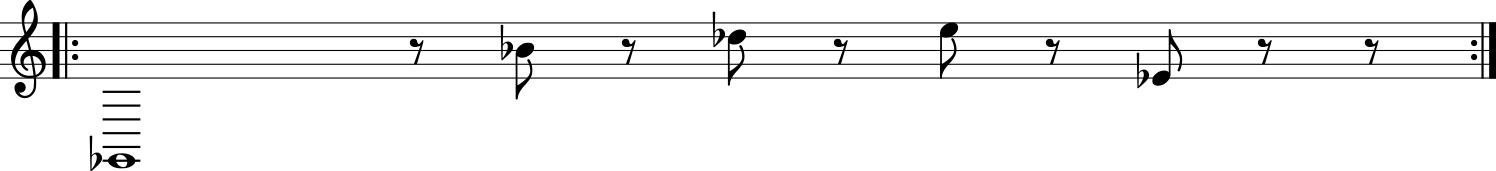

Playing corpus/generated_chords/audio_tensions/7/G7_pictures_at_an_exhibition_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/G7_pictures_at_an_exhibition_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


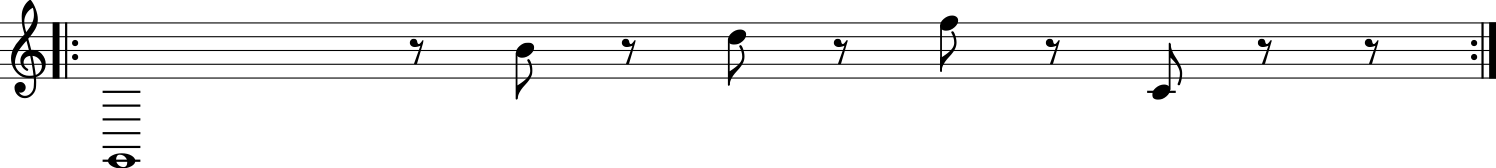

Playing corpus/generated_chords/audio_tensions/7/Ab7_pictures_at_an_exhibition_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Ab7_pictures_at_an_exhibition_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


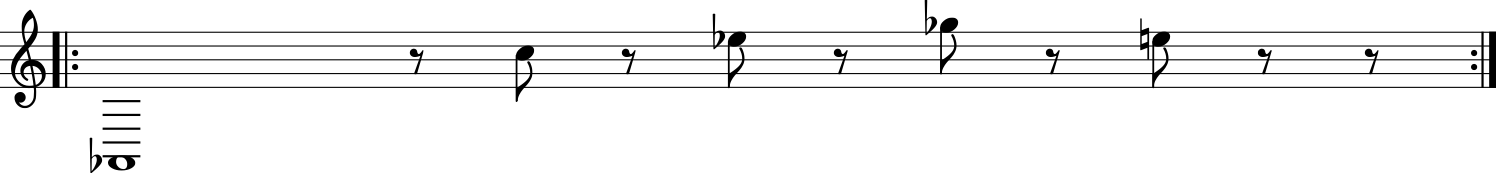

Playing corpus/generated_chords/audio_tensions/7/A7_pictures_at_an_exhibition_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/A7_pictures_at_an_exhibition_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


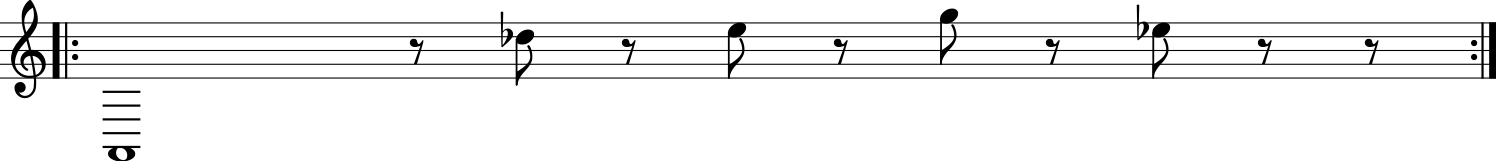

Playing corpus/generated_chords/audio_tensions/7/Bb7_pictures_at_an_exhibition_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Bb7_pictures_at_an_exhibition_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


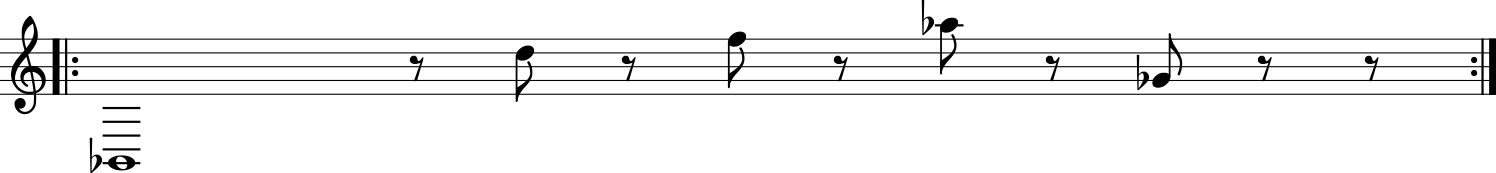

Playing corpus/generated_chords/audio_tensions/7/B7_pictures_at_an_exhibition_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/B7_pictures_at_an_exhibition_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


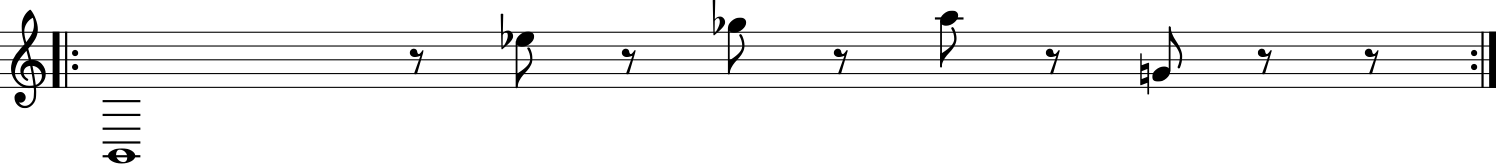

Playing corpus/generated_chords/audio_tensions/7/C7_venda_clapping_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/C7_venda_clapping_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


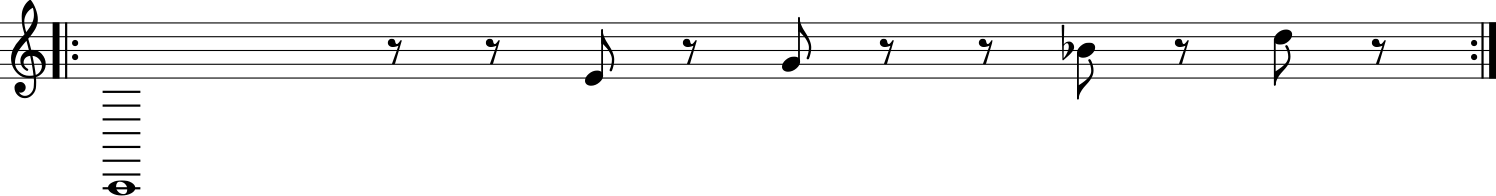

Playing corpus/generated_chords/audio_tensions/7/Db7_venda_clapping_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Db7_venda_clapping_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


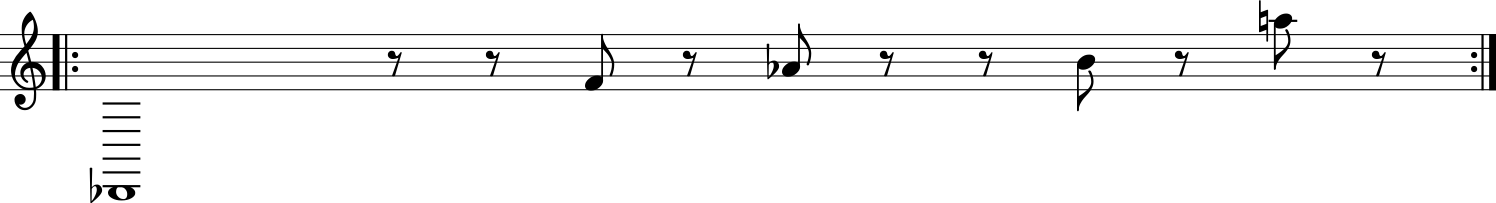

Playing corpus/generated_chords/audio_tensions/7/D7_venda_clapping_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/D7_venda_clapping_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


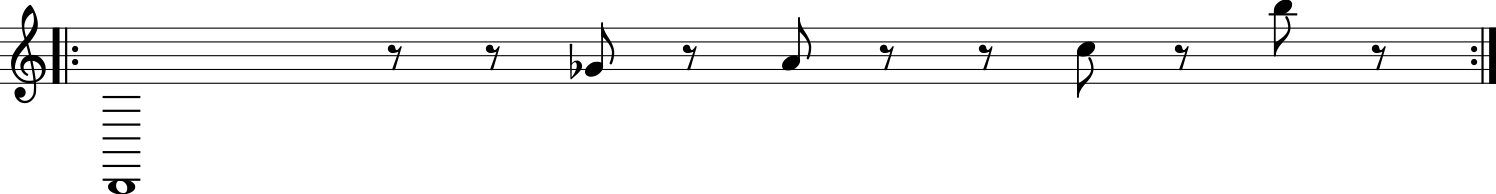

Playing corpus/generated_chords/audio_tensions/7/Eb7_venda_clapping_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Eb7_venda_clapping_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


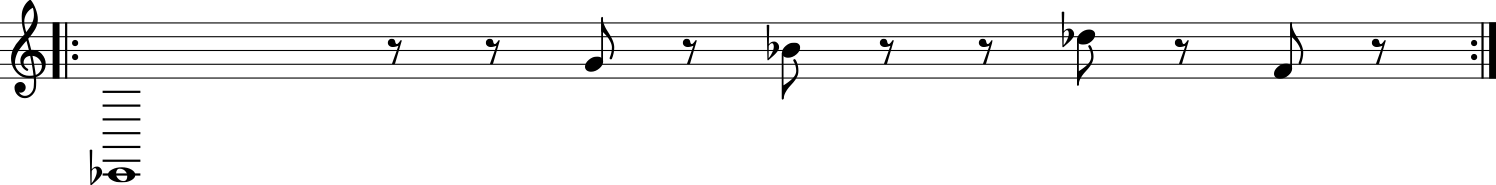

Playing corpus/generated_chords/audio_tensions/7/E7_venda_clapping_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/E7_venda_clapping_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


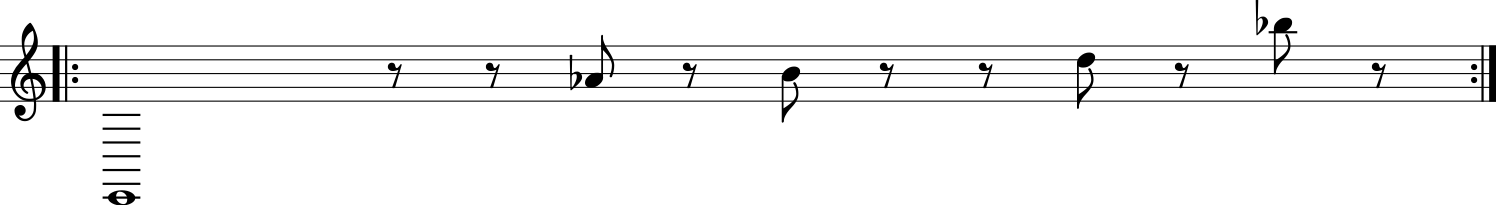

Playing corpus/generated_chords/audio_tensions/7/F7_venda_clapping_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/F7_venda_clapping_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


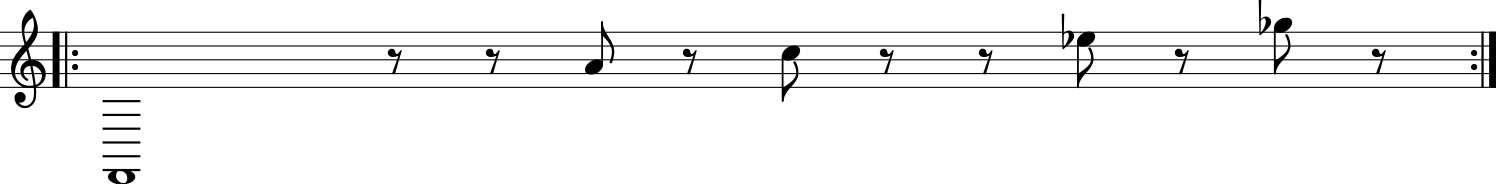

Playing corpus/generated_chords/audio_tensions/7/Gb7_venda_clapping_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Gb7_venda_clapping_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


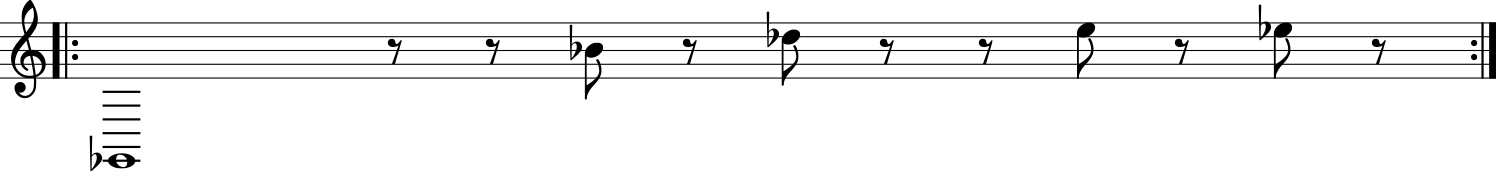

Playing corpus/generated_chords/audio_tensions/7/G7_venda_clapping_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/G7_venda_clapping_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


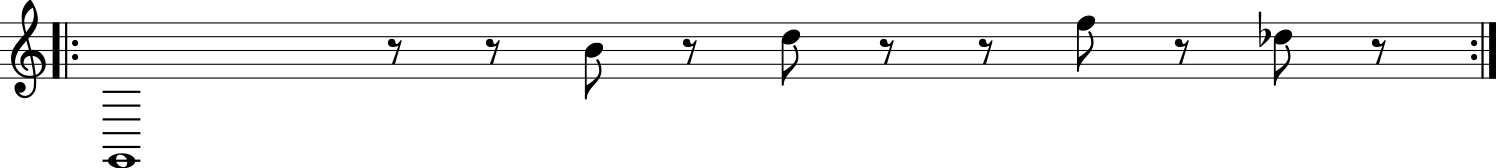

Playing corpus/generated_chords/audio_tensions/7/Ab7_venda_clapping_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Ab7_venda_clapping_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


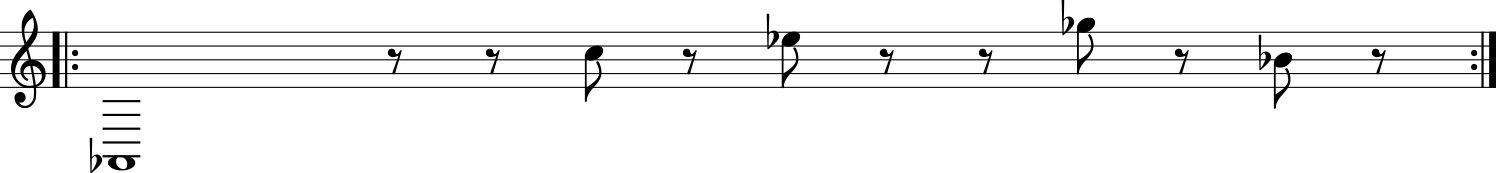

Playing corpus/generated_chords/audio_tensions/7/A7_venda_clapping_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/A7_venda_clapping_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


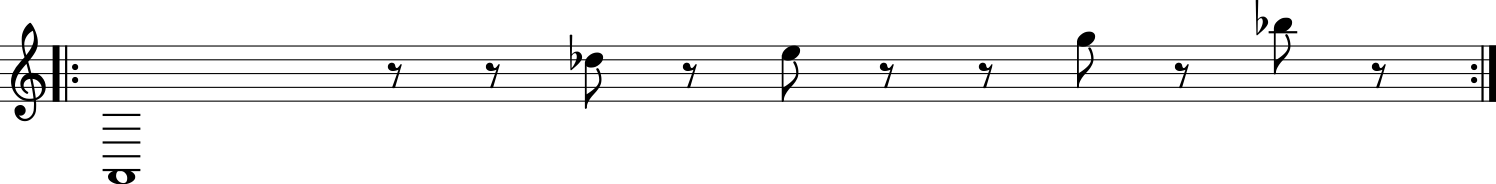

Playing corpus/generated_chords/audio_tensions/7/Bb7_venda_clapping_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Bb7_venda_clapping_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


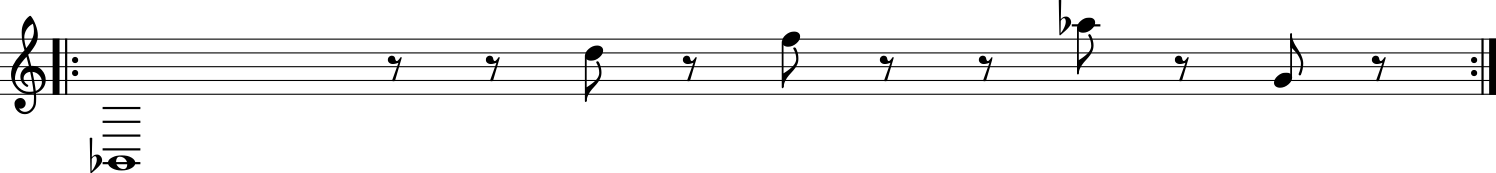

Playing corpus/generated_chords/audio_tensions/7/B7_venda_clapping_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/B7_venda_clapping_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


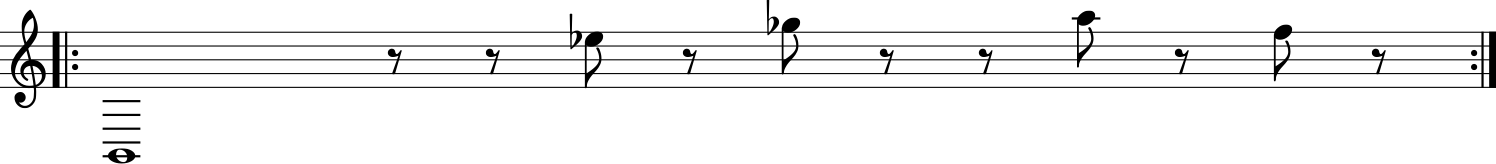

Playing corpus/generated_chords/audio_tensions/7/C7_bossa-nova_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/C7_bossa-nova_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


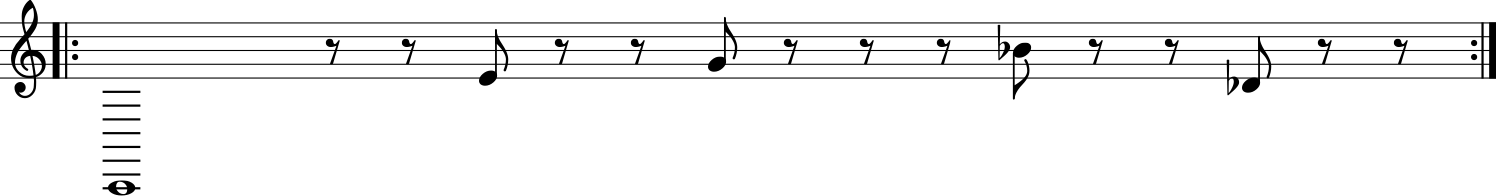

Playing corpus/generated_chords/audio_tensions/7/Db7_bossa-nova_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Db7_bossa-nova_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


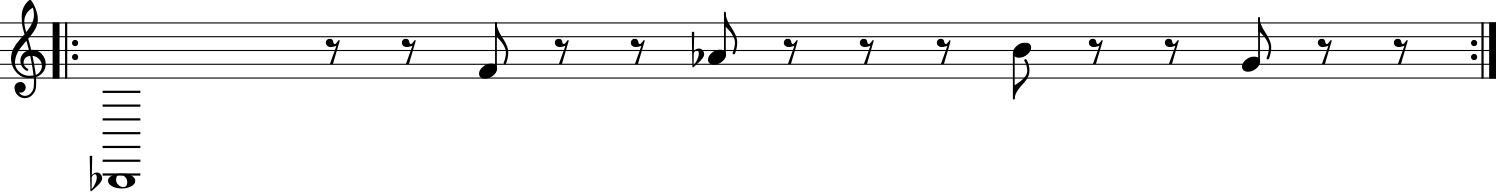

Playing corpus/generated_chords/audio_tensions/7/D7_bossa-nova_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/D7_bossa-nova_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


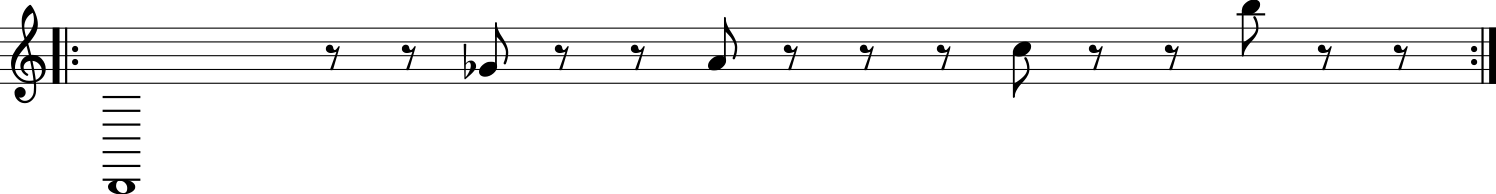

Playing corpus/generated_chords/audio_tensions/7/Eb7_bossa-nova_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Eb7_bossa-nova_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


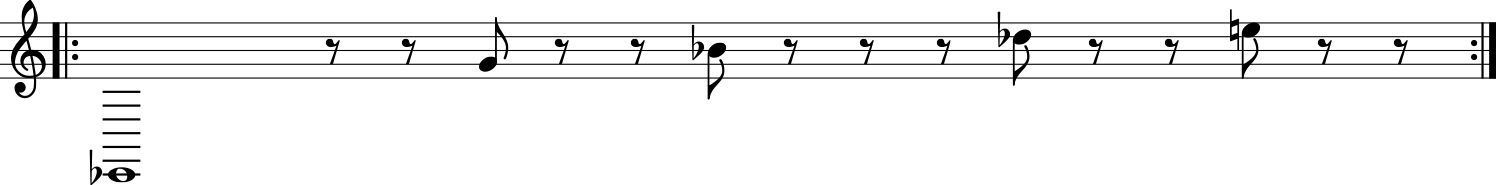

Playing corpus/generated_chords/audio_tensions/7/E7_bossa-nova_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/E7_bossa-nova_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


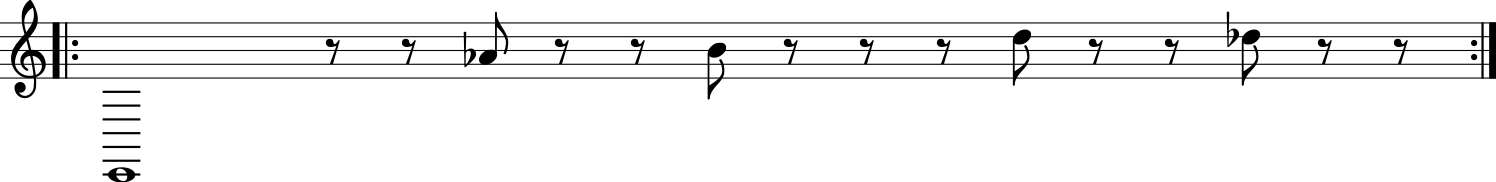

Playing corpus/generated_chords/audio_tensions/7/F7_bossa-nova_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/F7_bossa-nova_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


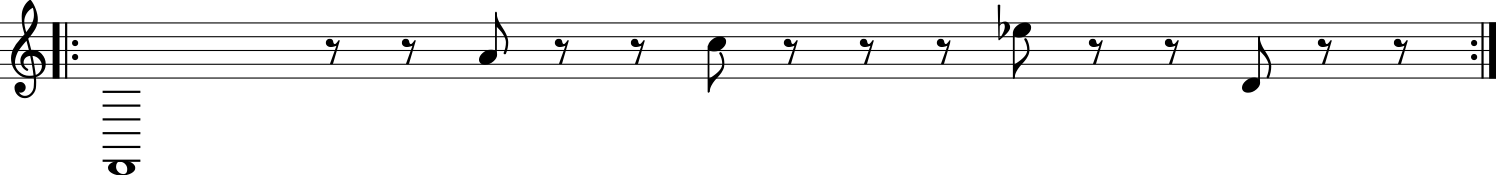

Playing corpus/generated_chords/audio_tensions/7/Gb7_bossa-nova_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Gb7_bossa-nova_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


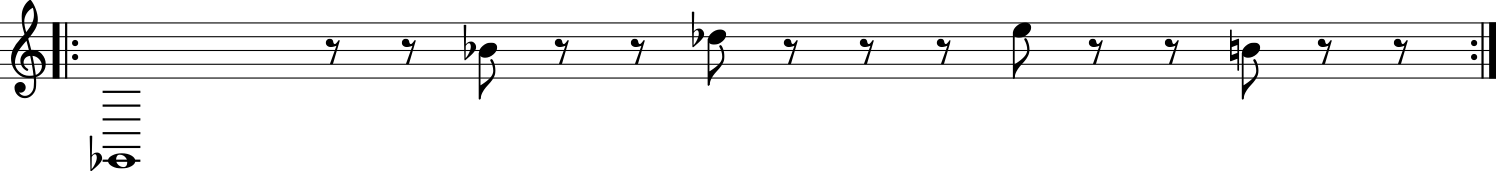

Playing corpus/generated_chords/audio_tensions/7/G7_bossa-nova_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/G7_bossa-nova_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


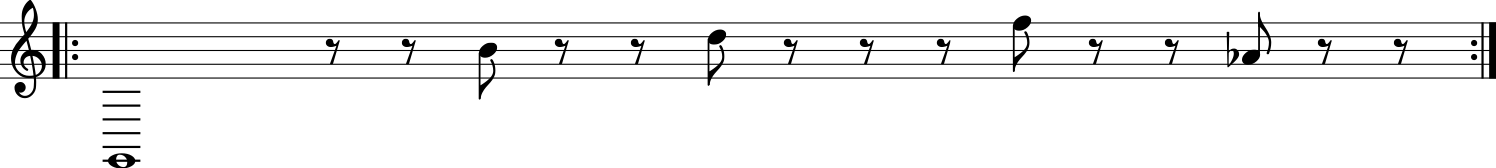

Playing corpus/generated_chords/audio_tensions/7/Ab7_bossa-nova_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Ab7_bossa-nova_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


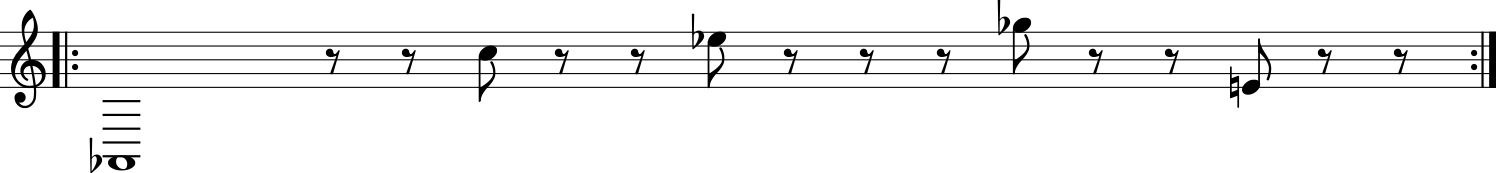

Playing corpus/generated_chords/audio_tensions/7/A7_bossa-nova_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/A7_bossa-nova_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


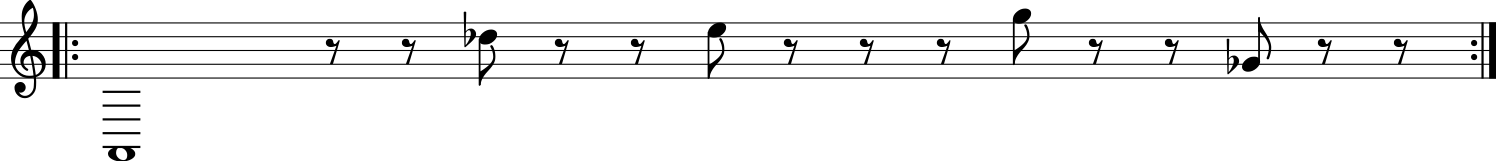

Playing corpus/generated_chords/audio_tensions/7/Bb7_bossa-nova_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Bb7_bossa-nova_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


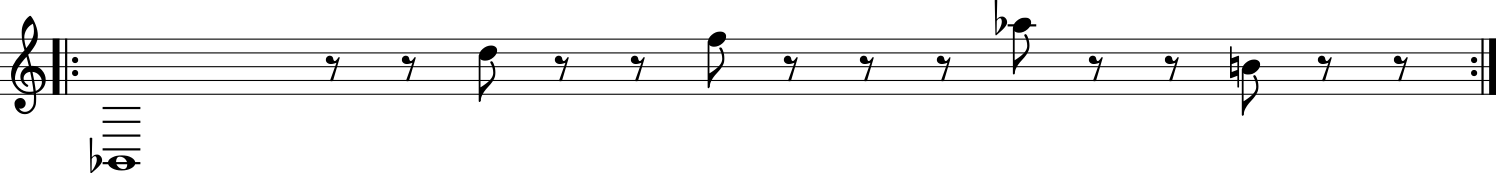

Playing corpus/generated_chords/audio_tensions/7/B7_bossa-nova_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/B7_bossa-nova_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


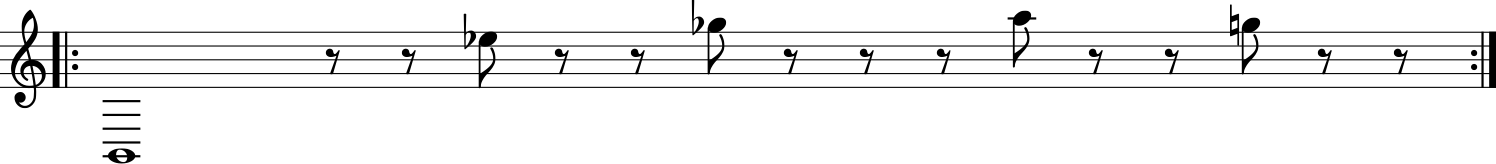

Playing corpus/generated_chords/audio_tensions/7/C7_bendir_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/C7_bendir_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


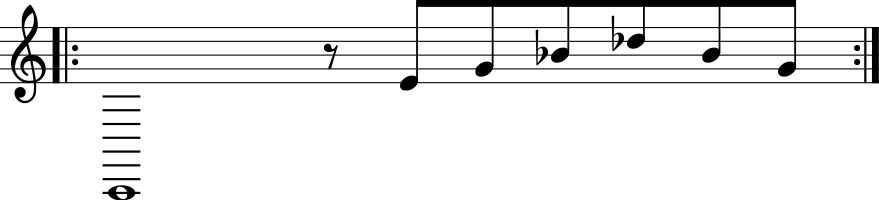

Playing corpus/generated_chords/audio_tensions/7/Db7_bendir_Piano_b9_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Db7_bendir_Piano_b9_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


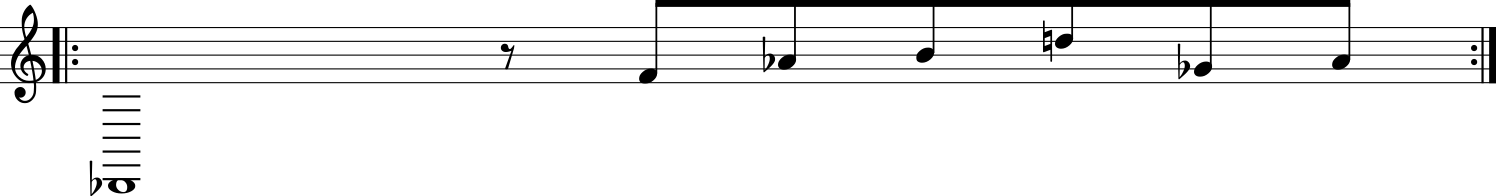

Playing corpus/generated_chords/audio_tensions/7/D7_bendir_Piano_9_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/D7_bendir_Piano_9_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


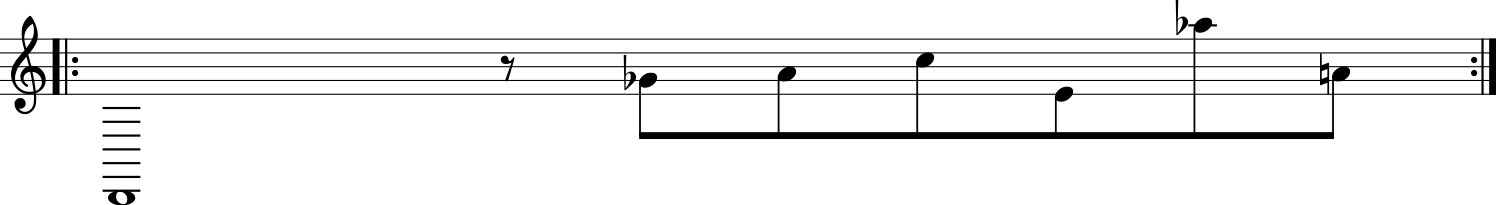

Playing corpus/generated_chords/audio_tensions/7/Eb7_bendir_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Eb7_bendir_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


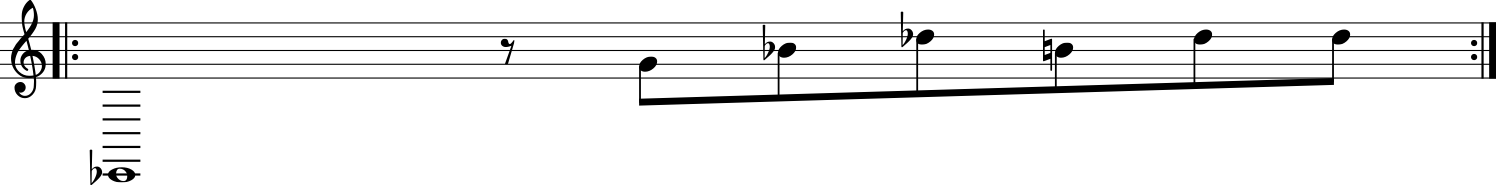

Playing corpus/generated_chords/audio_tensions/7/E7_bendir_Piano_11_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/E7_bendir_Piano_11_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


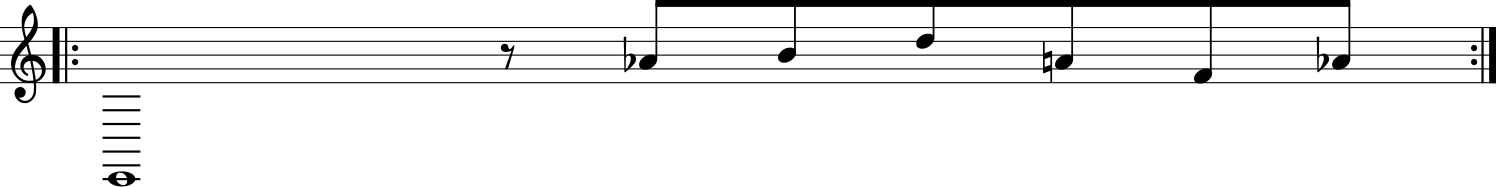

Playing corpus/generated_chords/audio_tensions/7/F7_bendir_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/F7_bendir_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


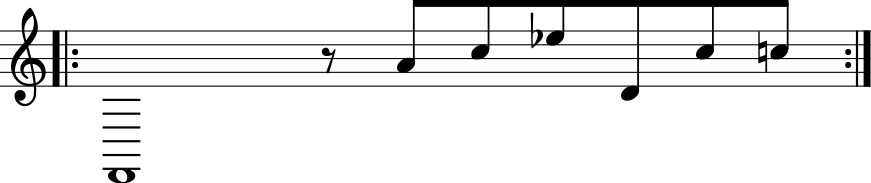

Playing corpus/generated_chords/audio_tensions/7/Gb7_bendir_Piano_13_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Gb7_bendir_Piano_13_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


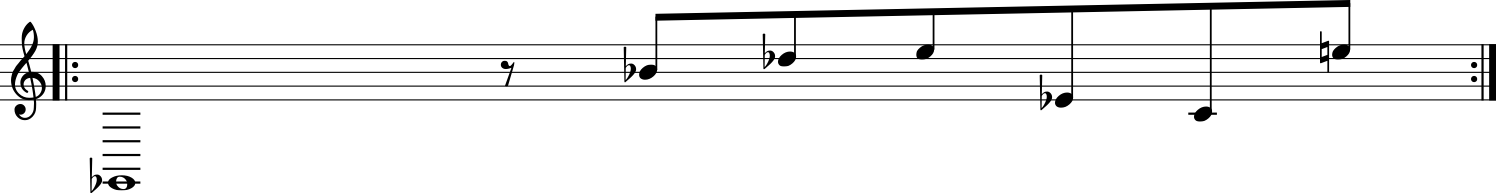

Playing corpus/generated_chords/audio_tensions/7/G7_bendir_Piano_#11_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/G7_bendir_Piano_#11_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


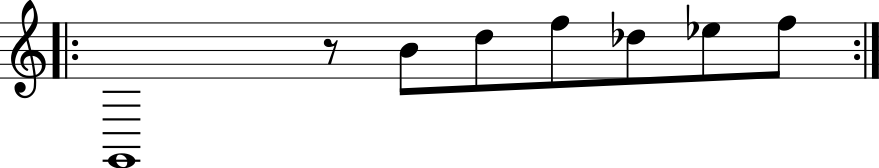

Playing corpus/generated_chords/audio_tensions/7/Ab7_bendir_Piano_11_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Ab7_bendir_Piano_11_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


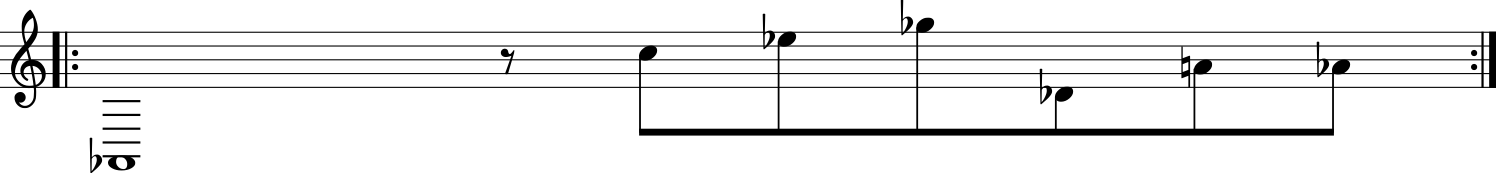

Playing corpus/generated_chords/audio_tensions/7/A7_bendir_Piano_9_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/A7_bendir_Piano_9_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


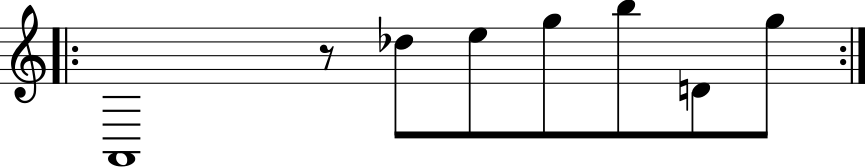

Playing corpus/generated_chords/audio_tensions/7/Bb7_bendir_Piano_13_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Bb7_bendir_Piano_13_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


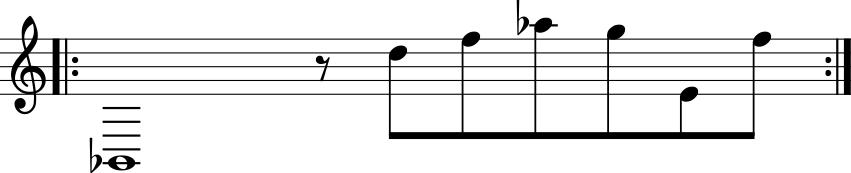

Playing corpus/generated_chords/audio_tensions/7/B7_bendir_Piano_#11_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/B7_bendir_Piano_#11_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


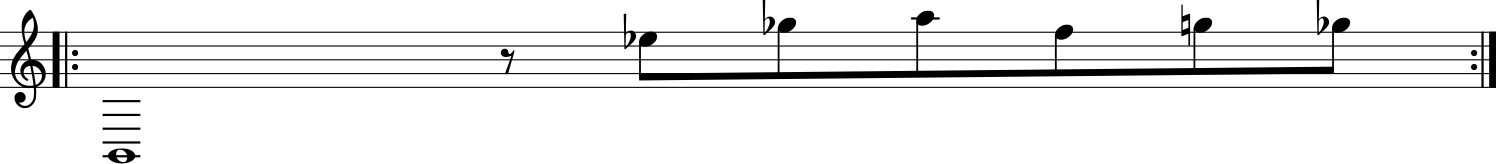

Playing corpus/generated_chords/audio_tensions/7/C7_mpre_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/C7_mpre_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


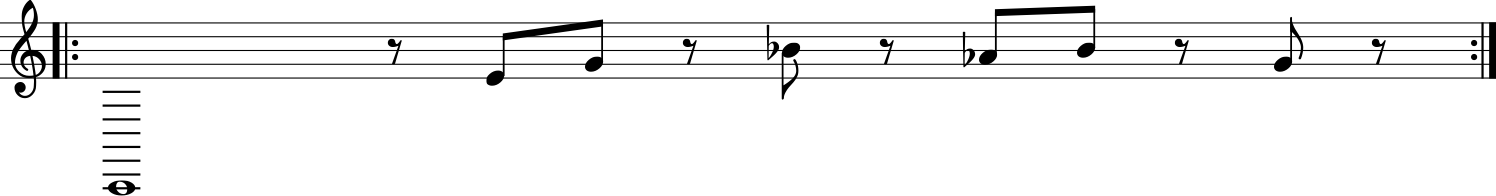

Playing corpus/generated_chords/audio_tensions/7/Db7_mpre_Piano_11_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Db7_mpre_Piano_11_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


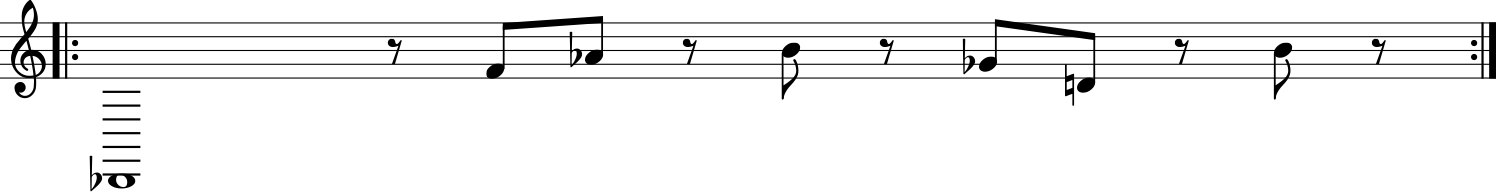

Playing corpus/generated_chords/audio_tensions/7/D7_mpre_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/D7_mpre_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


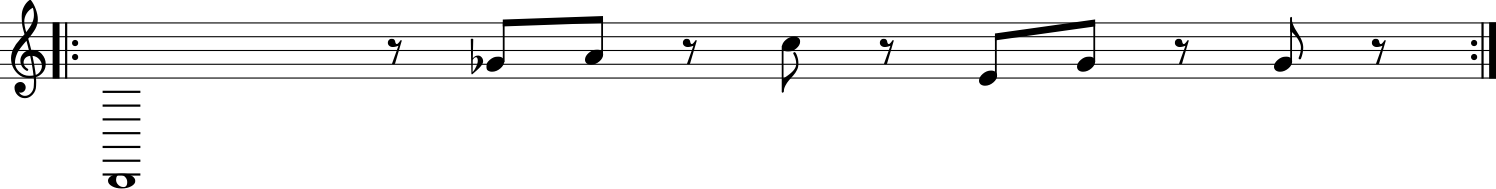

Playing corpus/generated_chords/audio_tensions/7/Eb7_mpre_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Eb7_mpre_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


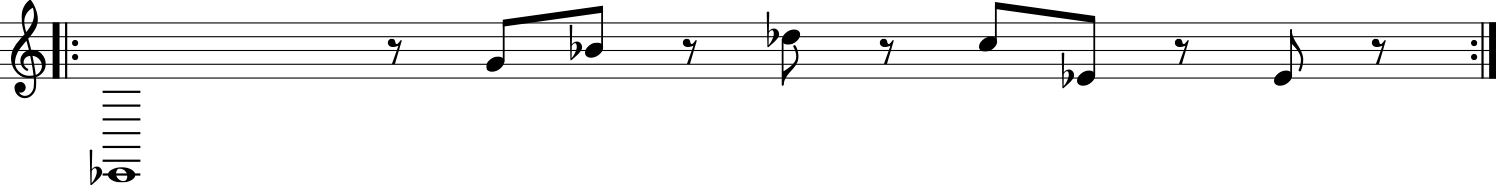

Playing corpus/generated_chords/audio_tensions/7/E7_mpre_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/E7_mpre_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


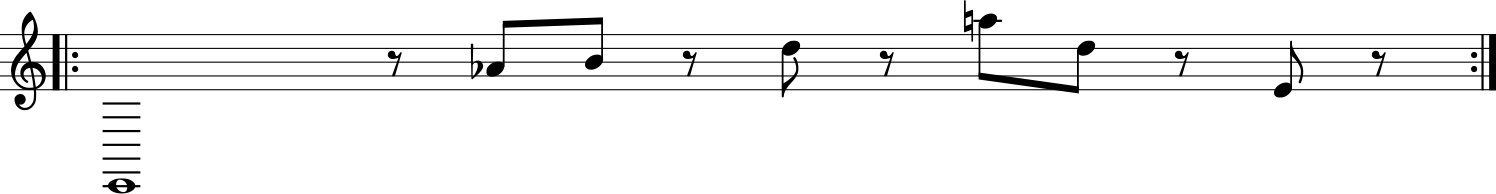

Playing corpus/generated_chords/audio_tensions/7/F7_mpre_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/F7_mpre_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


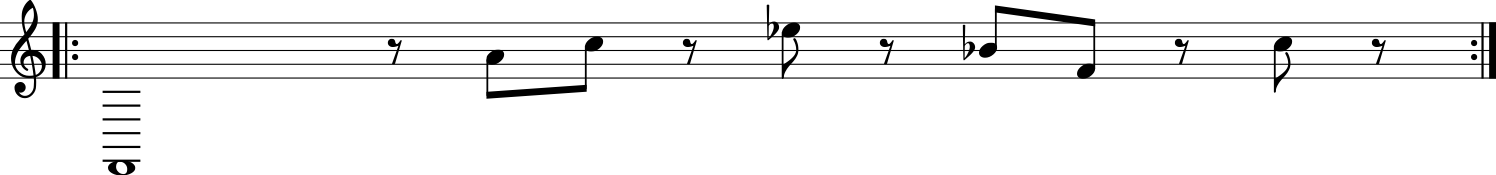

Playing corpus/generated_chords/audio_tensions/7/Gb7_mpre_Piano_9_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Gb7_mpre_Piano_9_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


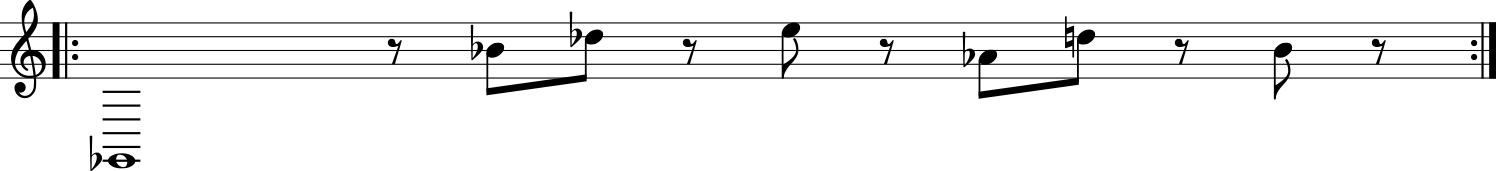

Playing corpus/generated_chords/audio_tensions/7/G7_mpre_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/G7_mpre_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


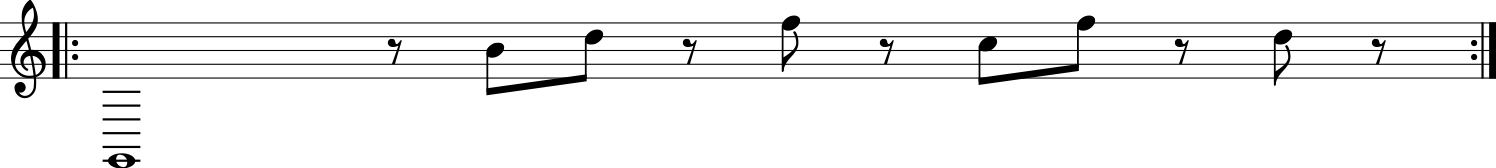

Playing corpus/generated_chords/audio_tensions/7/Ab7_mpre_Piano_b9_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Ab7_mpre_Piano_b9_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


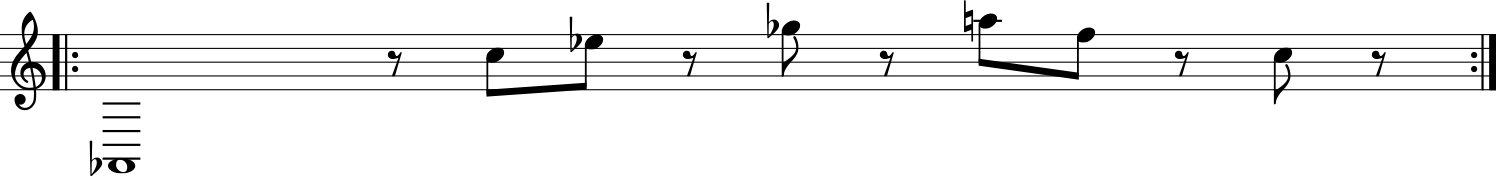

Playing corpus/generated_chords/audio_tensions/7/A7_mpre_Piano_13_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/A7_mpre_Piano_13_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


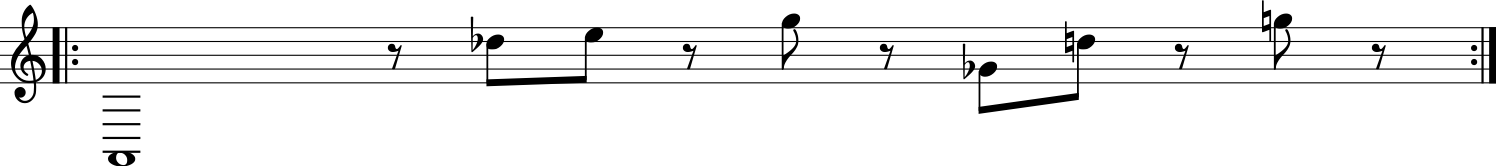

Playing corpus/generated_chords/audio_tensions/7/Bb7_mpre_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Bb7_mpre_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


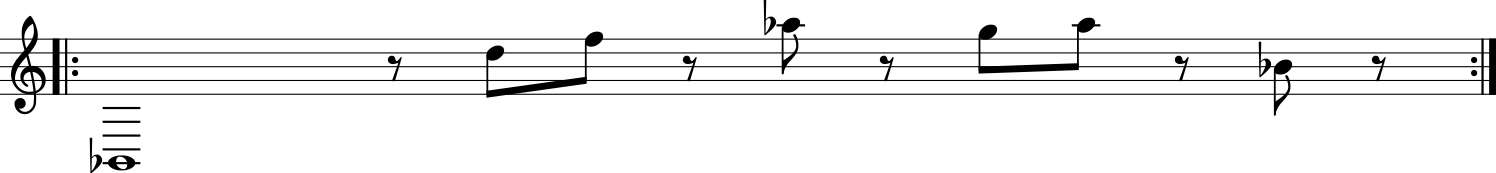

Playing corpus/generated_chords/audio_tensions/7/B7_mpre_Piano_9_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/B7_mpre_Piano_9_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


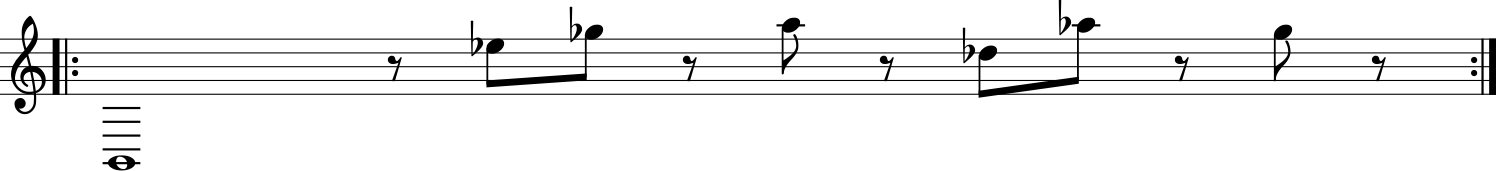

Playing corpus/generated_chords/audio_tensions/7/C7_samba_Piano_b13_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/C7_samba_Piano_b13_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


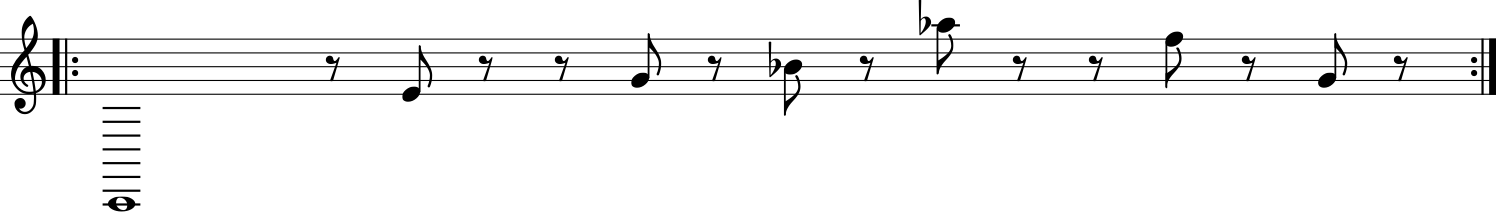

Playing corpus/generated_chords/audio_tensions/7/Db7_samba_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Db7_samba_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


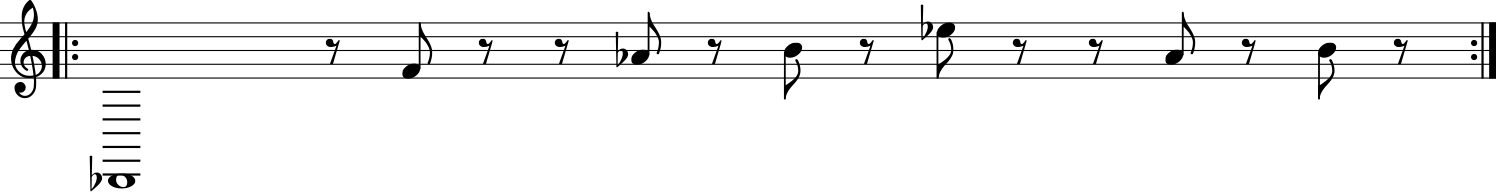

Playing corpus/generated_chords/audio_tensions/7/D7_samba_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/D7_samba_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


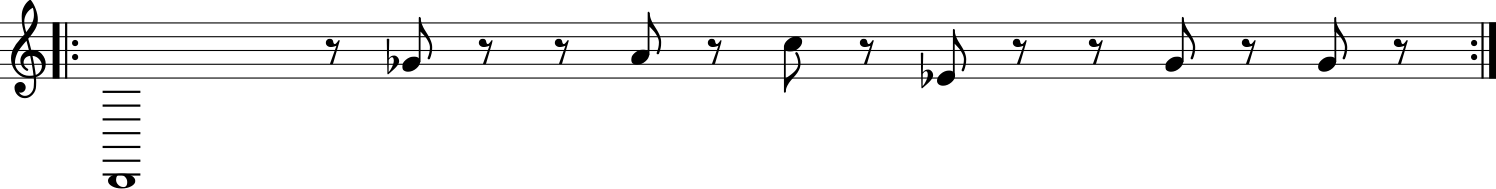

Playing corpus/generated_chords/audio_tensions/7/Eb7_samba_Piano_b9_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Eb7_samba_Piano_b9_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


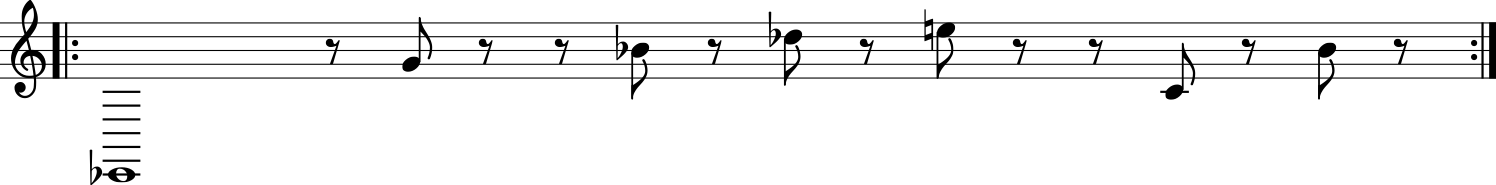

Playing corpus/generated_chords/audio_tensions/7/E7_samba_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/E7_samba_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


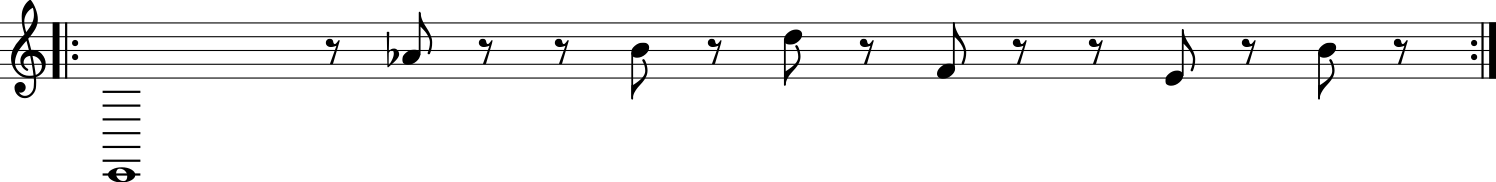

Playing corpus/generated_chords/audio_tensions/7/F7_samba_Piano_b13_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/F7_samba_Piano_b13_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


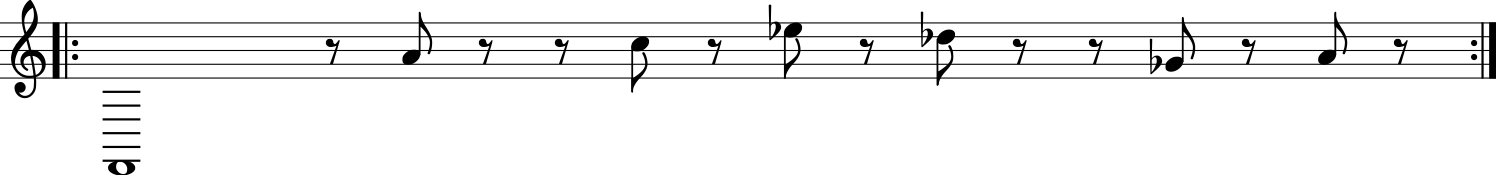

Playing corpus/generated_chords/audio_tensions/7/Gb7_samba_Piano_b9_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Gb7_samba_Piano_b9_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


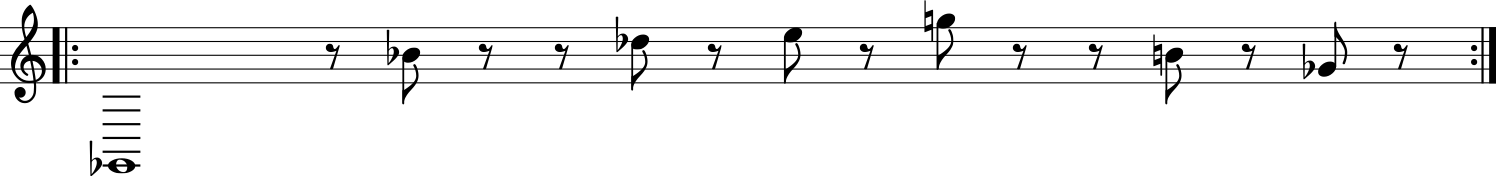

Playing corpus/generated_chords/audio_tensions/7/G7_samba_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/G7_samba_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


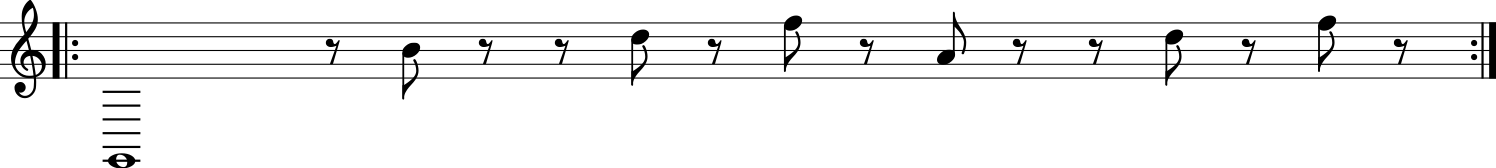

Playing corpus/generated_chords/audio_tensions/7/Ab7_samba_Piano_9_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Ab7_samba_Piano_9_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


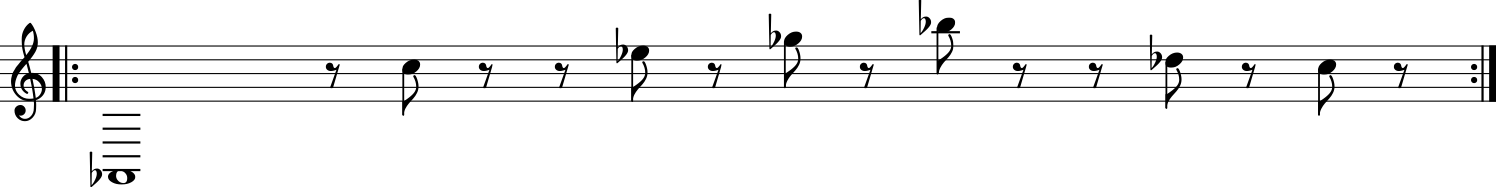

Playing corpus/generated_chords/audio_tensions/7/A7_samba_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/A7_samba_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


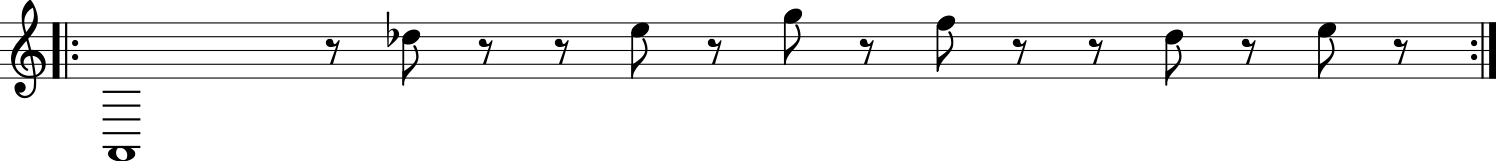

Playing corpus/generated_chords/audio_tensions/7/Bb7_samba_Piano_b13_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Bb7_samba_Piano_b13_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


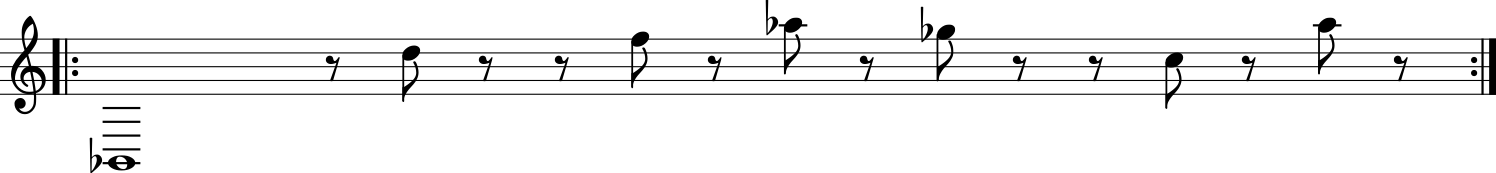

Playing corpus/generated_chords/audio_tensions/7/B7_samba_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/B7_samba_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


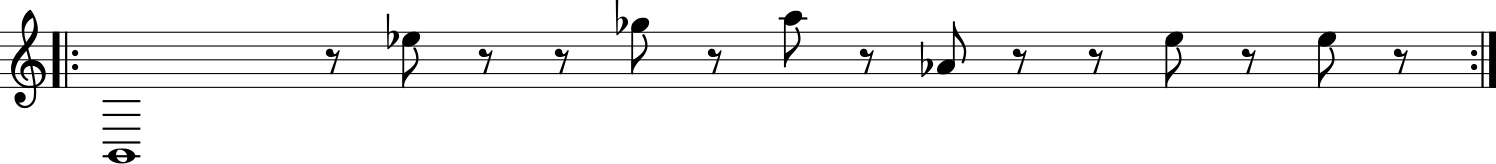

Playing corpus/generated_chords/audio_tensions/7/C7_agogo-samba_Piano_13_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/C7_agogo-samba_Piano_13_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


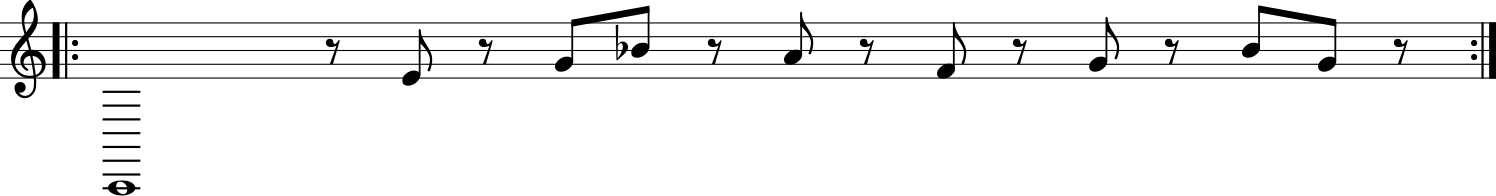

Playing corpus/generated_chords/audio_tensions/7/Db7_agogo-samba_Piano_#11_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Db7_agogo-samba_Piano_#11_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


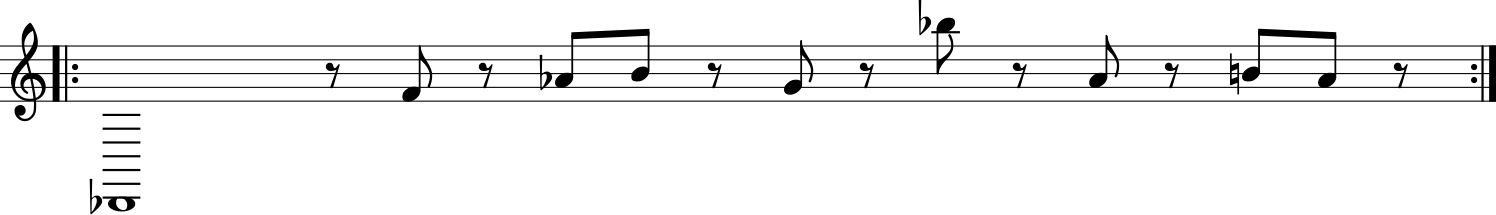

Playing corpus/generated_chords/audio_tensions/7/D7_agogo-samba_Piano_#11_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/D7_agogo-samba_Piano_#11_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


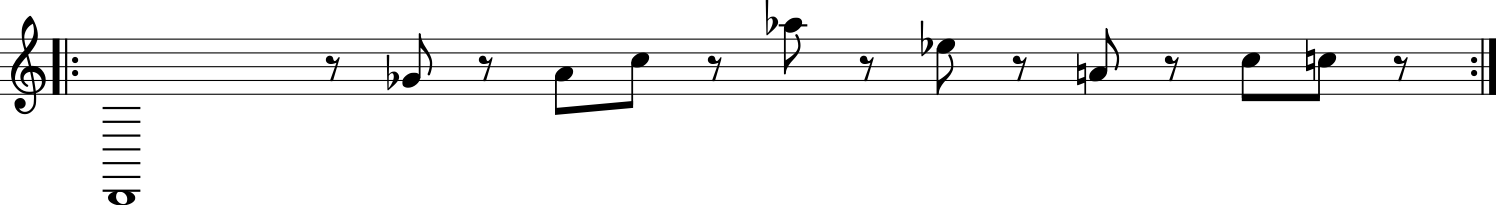

Playing corpus/generated_chords/audio_tensions/7/Eb7_agogo-samba_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Eb7_agogo-samba_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


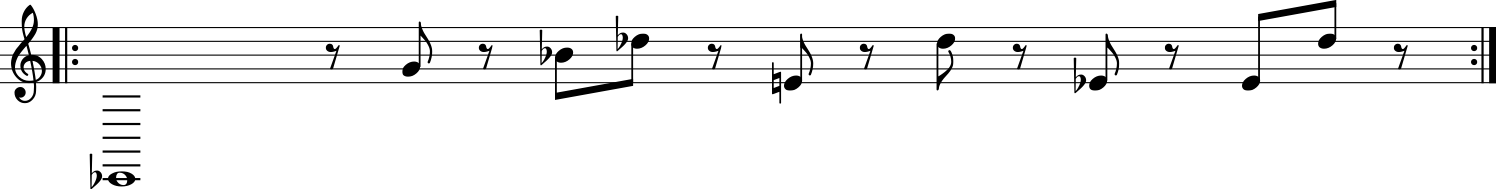

Playing corpus/generated_chords/audio_tensions/7/E7_agogo-samba_Piano_b9_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/E7_agogo-samba_Piano_b9_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


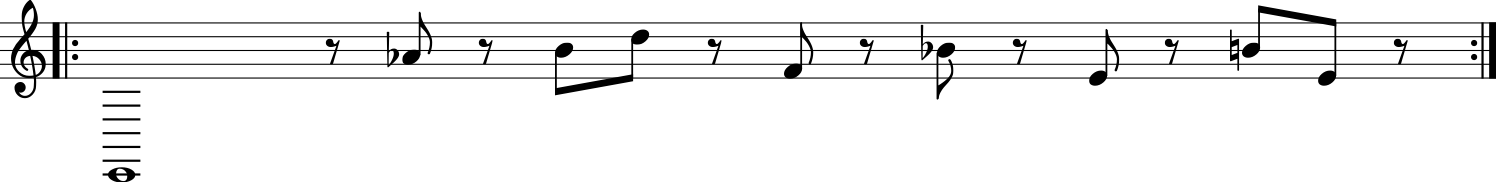

Playing corpus/generated_chords/audio_tensions/7/F7_agogo-samba_Piano_13_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/F7_agogo-samba_Piano_13_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


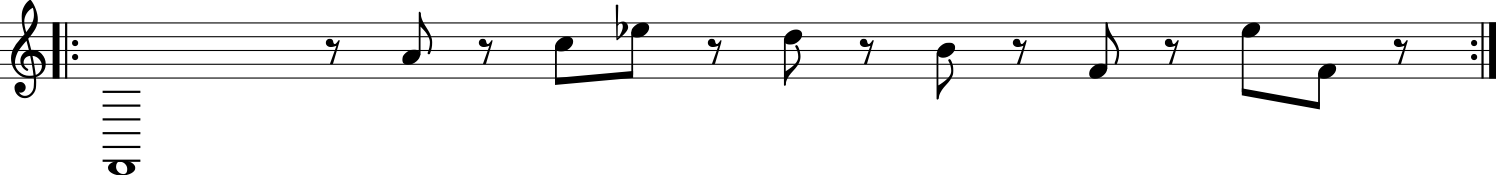

Playing corpus/generated_chords/audio_tensions/7/Gb7_agogo-samba_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Gb7_agogo-samba_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


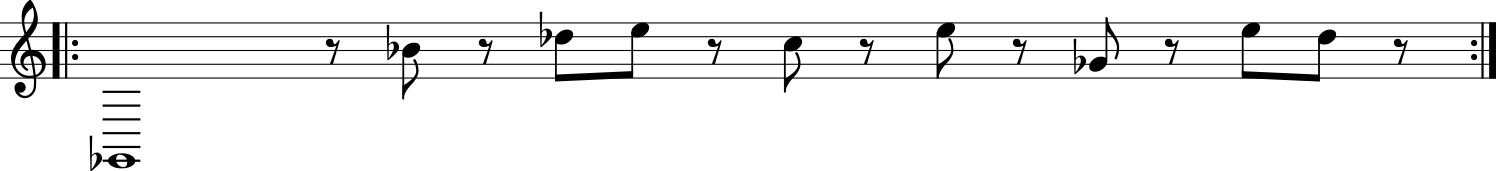

Playing corpus/generated_chords/audio_tensions/7/G7_agogo-samba_Piano_9_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/G7_agogo-samba_Piano_9_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


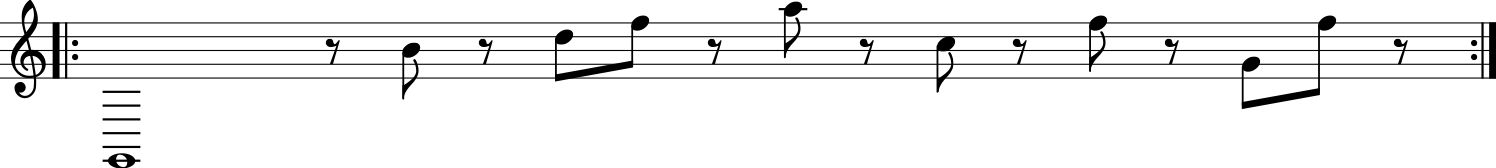

Playing corpus/generated_chords/audio_tensions/7/Ab7_agogo-samba_Piano_9_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Ab7_agogo-samba_Piano_9_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


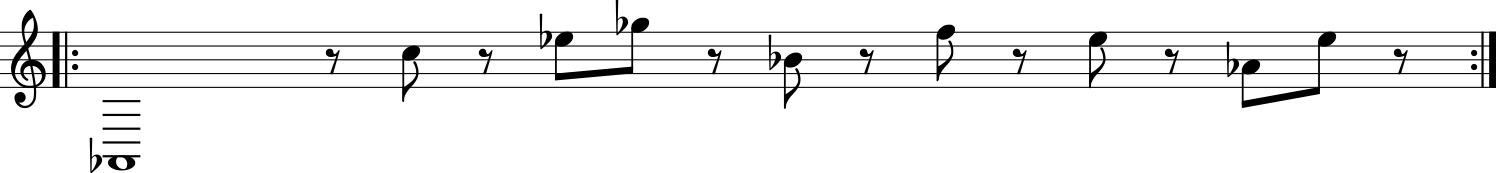

Playing corpus/generated_chords/audio_tensions/7/A7_agogo-samba_Piano_b13_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/A7_agogo-samba_Piano_b13_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


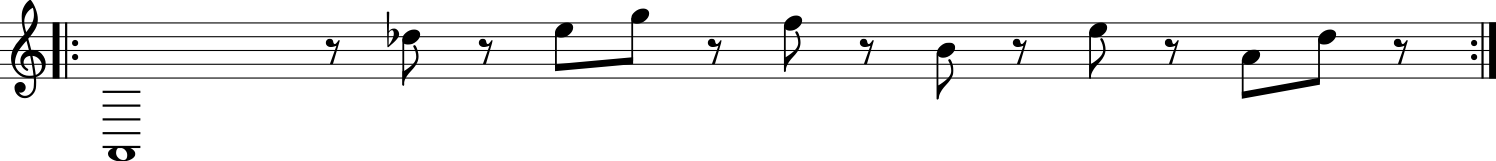

Playing corpus/generated_chords/audio_tensions/7/Bb7_agogo-samba_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Bb7_agogo-samba_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


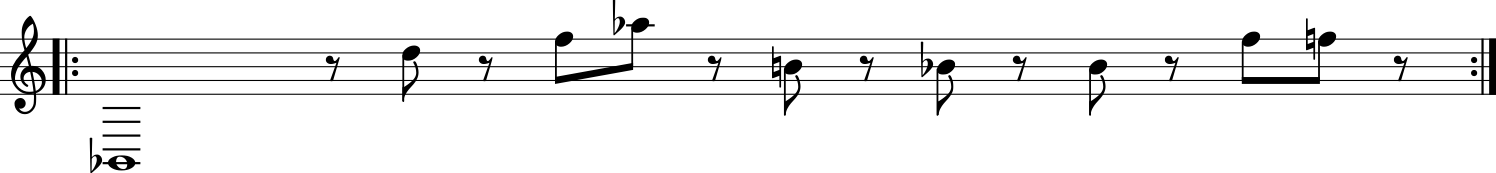

Playing corpus/generated_chords/audio_tensions/7/B7_agogo-samba_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/B7_agogo-samba_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


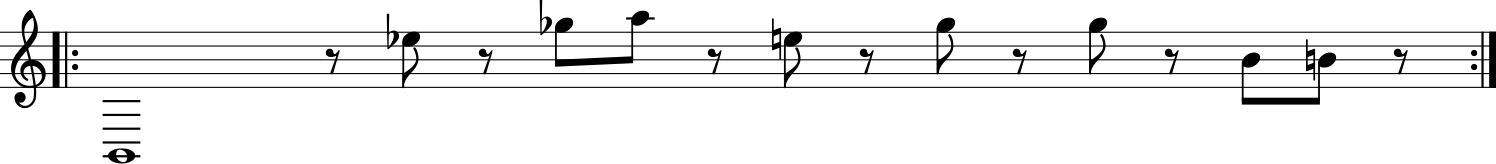

Playing corpus/generated_chords/audio_tensions/7/C7_ngbaka-maibo_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/C7_ngbaka-maibo_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


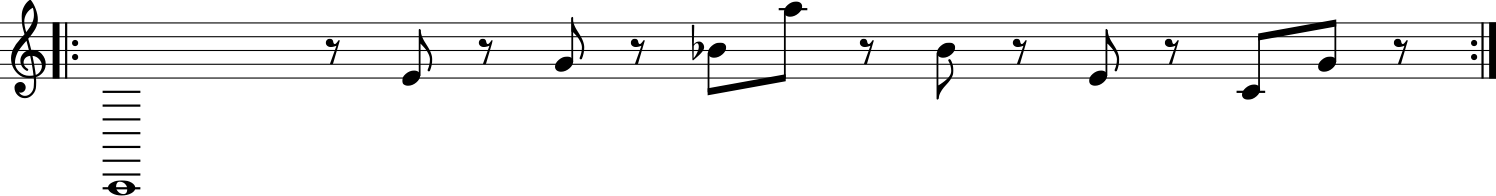

Playing corpus/generated_chords/audio_tensions/7/Db7_ngbaka-maibo_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Db7_ngbaka-maibo_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


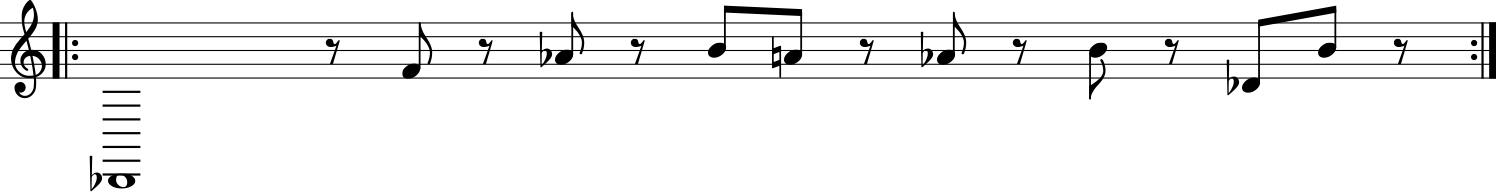

Playing corpus/generated_chords/audio_tensions/7/D7_ngbaka-maibo_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/D7_ngbaka-maibo_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


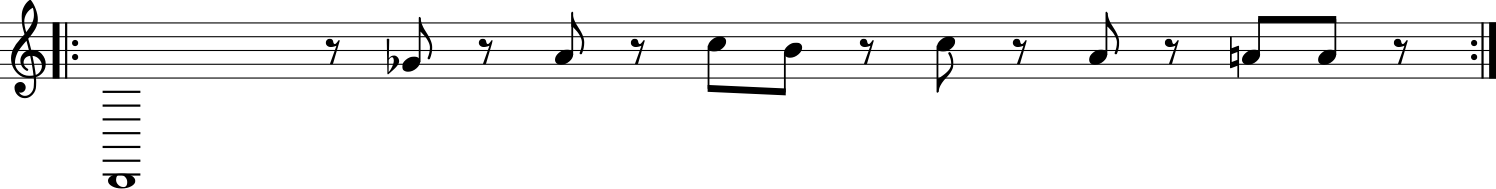

Playing corpus/generated_chords/audio_tensions/7/Eb7_ngbaka-maibo_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Eb7_ngbaka-maibo_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


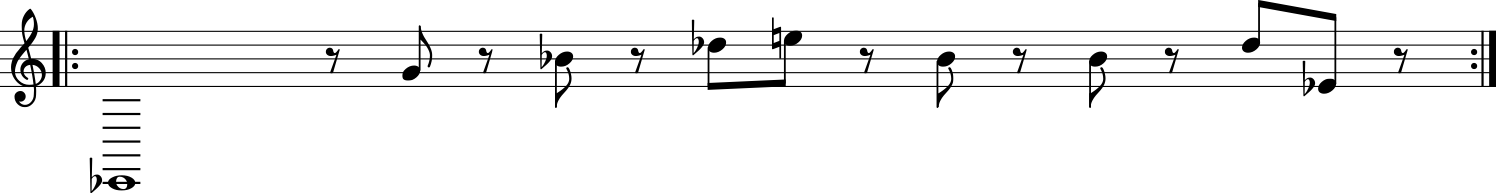

Playing corpus/generated_chords/audio_tensions/7/E7_ngbaka-maibo_Piano_13_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/E7_ngbaka-maibo_Piano_13_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


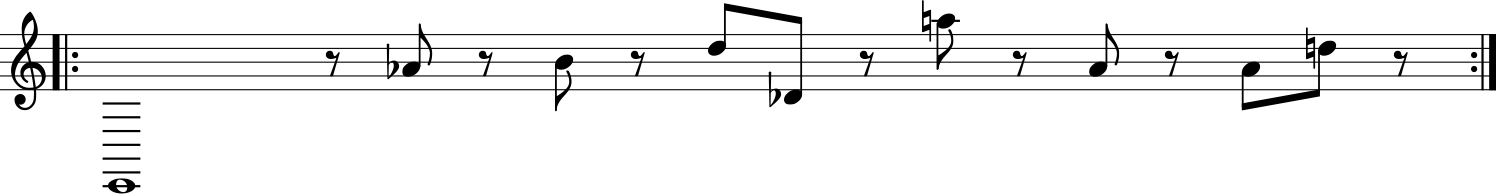

Playing corpus/generated_chords/audio_tensions/7/F7_ngbaka-maibo_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/F7_ngbaka-maibo_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


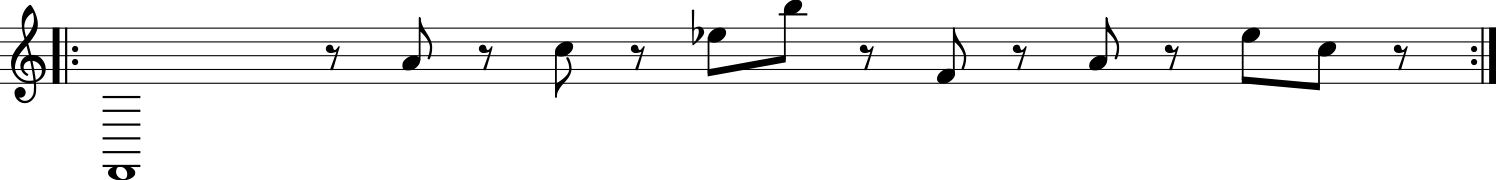

Playing corpus/generated_chords/audio_tensions/7/Gb7_ngbaka-maibo_Piano_13_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Gb7_ngbaka-maibo_Piano_13_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


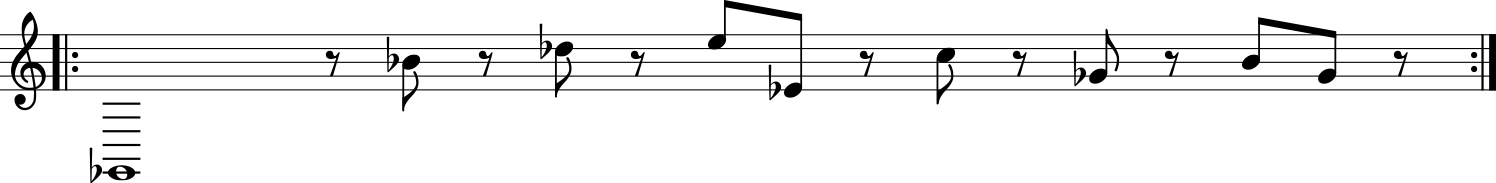

Playing corpus/generated_chords/audio_tensions/7/G7_ngbaka-maibo_Piano_b9_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/G7_ngbaka-maibo_Piano_b9_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


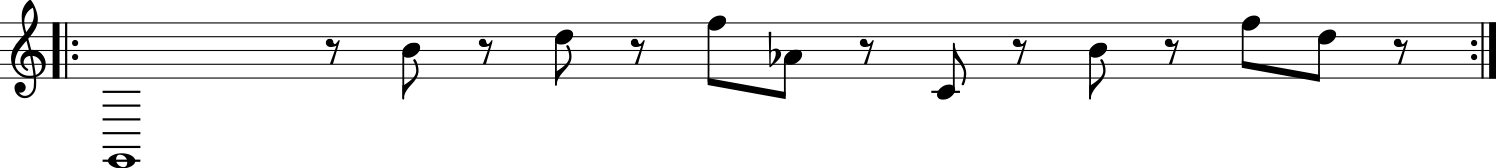

Playing corpus/generated_chords/audio_tensions/7/Ab7_ngbaka-maibo_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Ab7_ngbaka-maibo_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


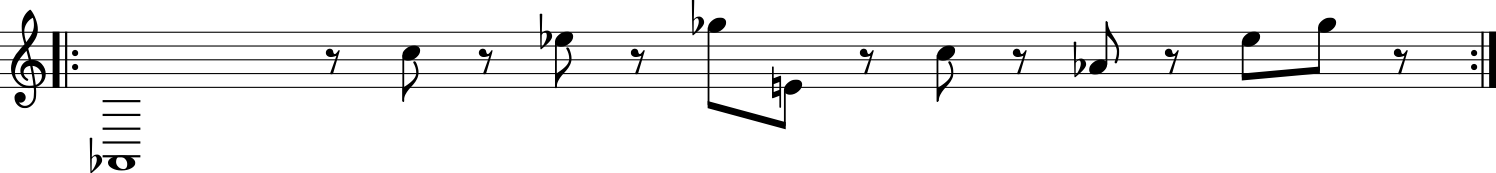

Playing corpus/generated_chords/audio_tensions/7/A7_ngbaka-maibo_Piano_#11_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/A7_ngbaka-maibo_Piano_#11_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


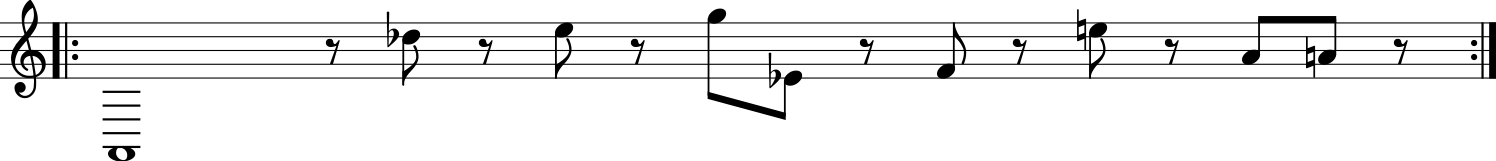

Playing corpus/generated_chords/audio_tensions/7/Bb7_ngbaka-maibo_Piano_b13_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Bb7_ngbaka-maibo_Piano_b13_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


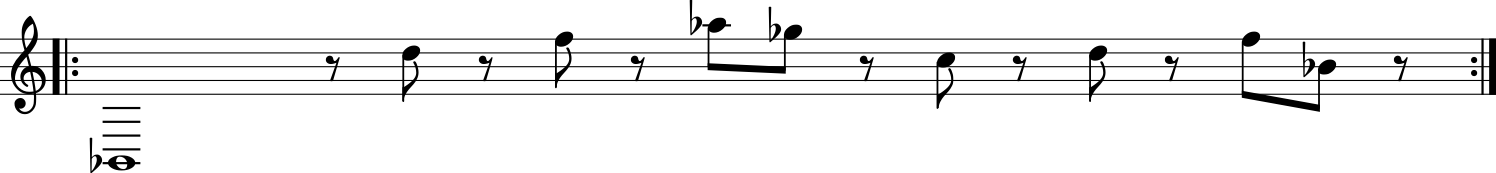

Playing corpus/generated_chords/audio_tensions/7/B7_ngbaka-maibo_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/B7_ngbaka-maibo_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


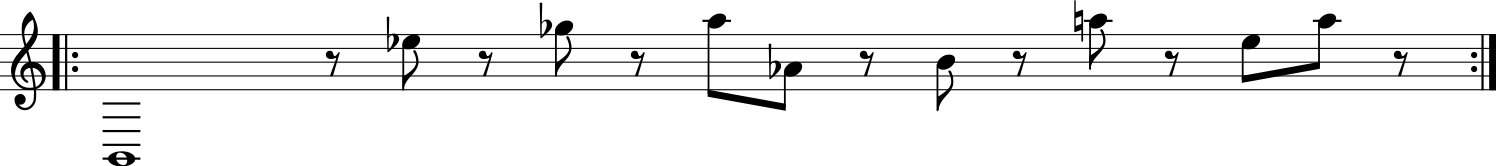

Playing corpus/generated_chords/audio_tensions/7/C7_aka_Piano_9_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/C7_aka_Piano_9_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


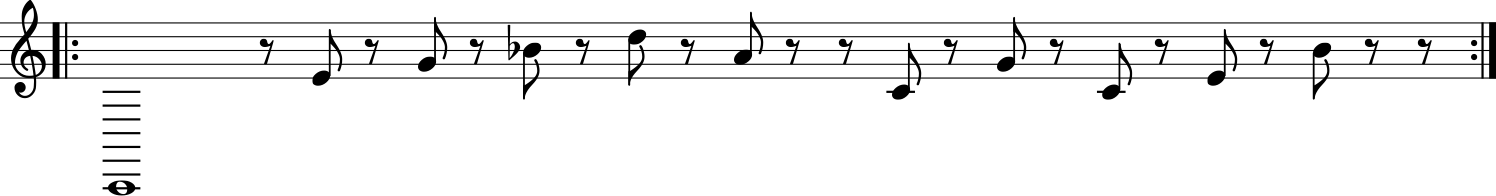

Playing corpus/generated_chords/audio_tensions/7/Db7_aka_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Db7_aka_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


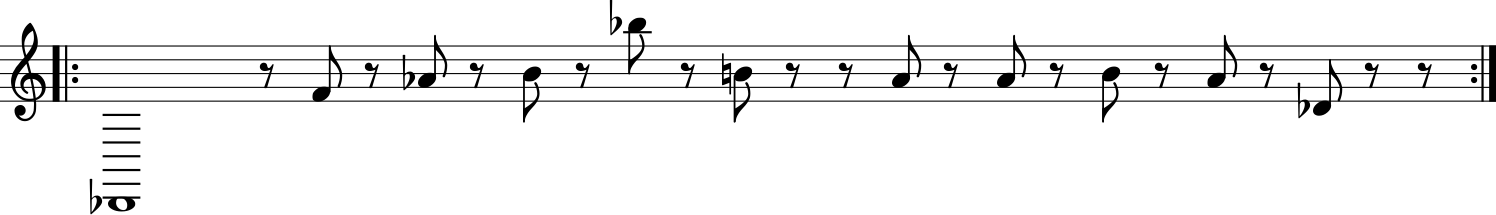

Playing corpus/generated_chords/audio_tensions/7/D7_aka_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/D7_aka_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


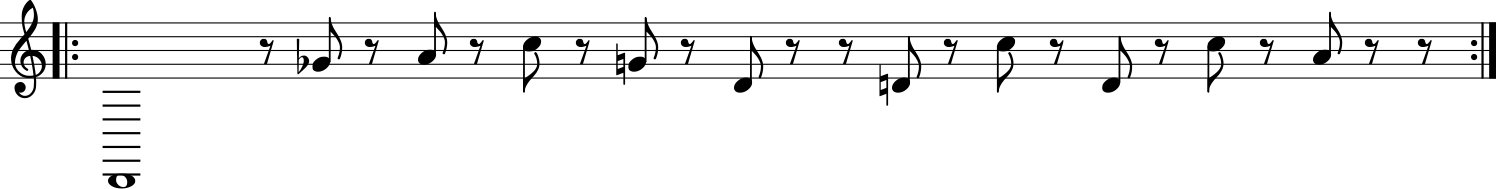

Playing corpus/generated_chords/audio_tensions/7/Eb7_aka_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Eb7_aka_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


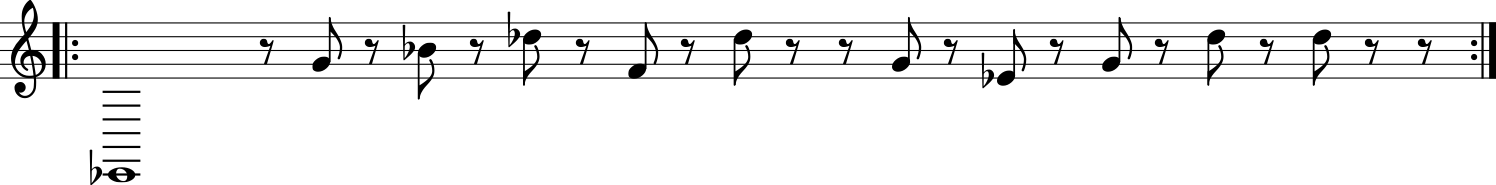

Playing corpus/generated_chords/audio_tensions/7/E7_aka_Piano_13_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/E7_aka_Piano_13_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


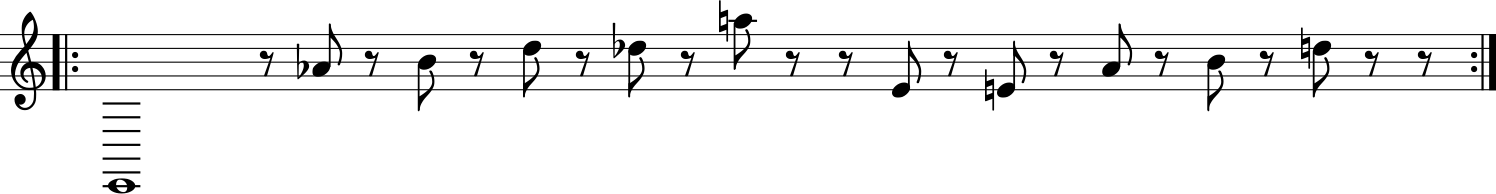

Playing corpus/generated_chords/audio_tensions/7/F7_aka_Piano_b13_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/F7_aka_Piano_b13_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


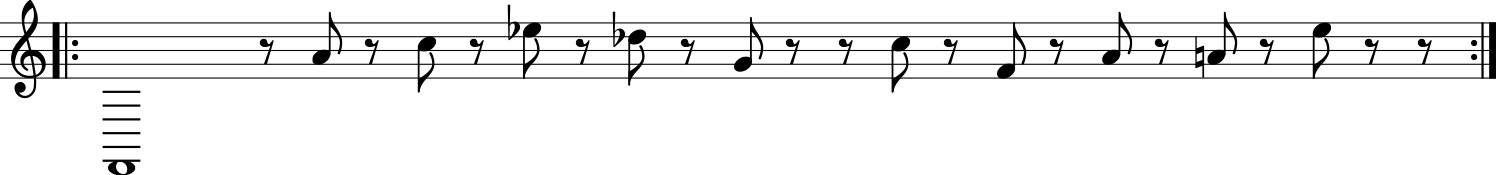

Playing corpus/generated_chords/audio_tensions/7/Gb7_aka_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Gb7_aka_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


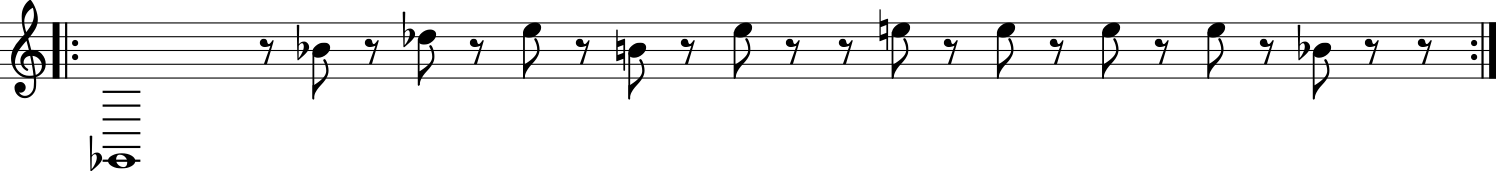

Playing corpus/generated_chords/audio_tensions/7/G7_aka_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/G7_aka_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


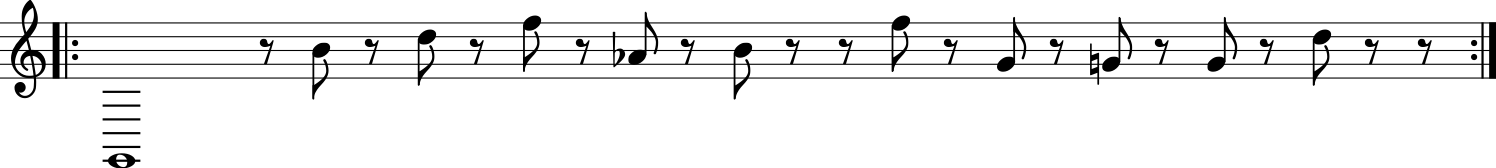

Playing corpus/generated_chords/audio_tensions/7/Ab7_aka_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Ab7_aka_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


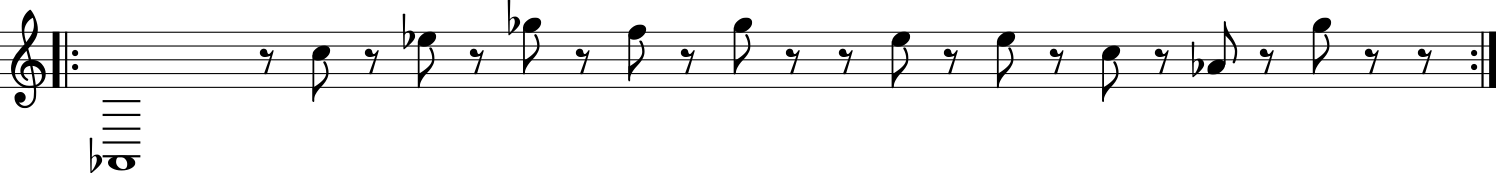

Playing corpus/generated_chords/audio_tensions/7/A7_aka_Piano_b13_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/A7_aka_Piano_b13_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


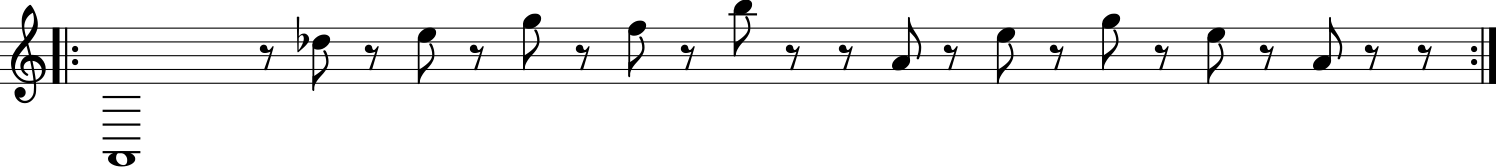

Playing corpus/generated_chords/audio_tensions/7/Bb7_aka_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Bb7_aka_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


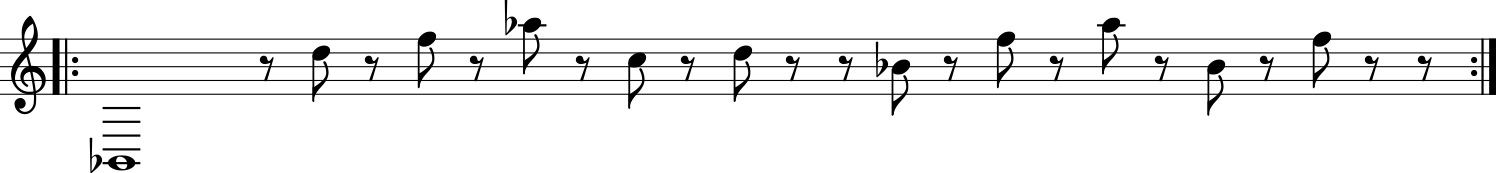

Playing corpus/generated_chords/audio_tensions/7/B7_aka_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/B7_aka_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


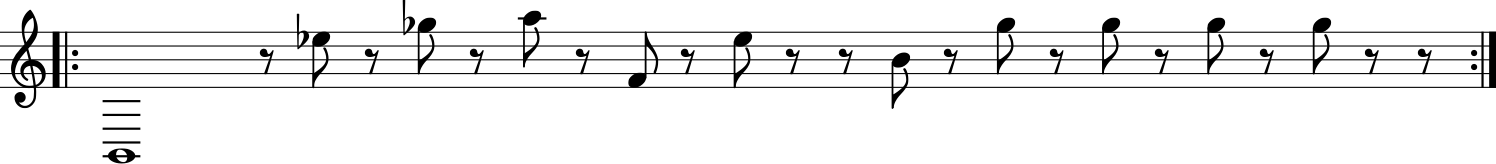

Playing corpus/generated_chords/audio_tensions/7/C7_aka_upper_sangha_Piano_9_11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/C7_aka_upper_sangha_Piano_9_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


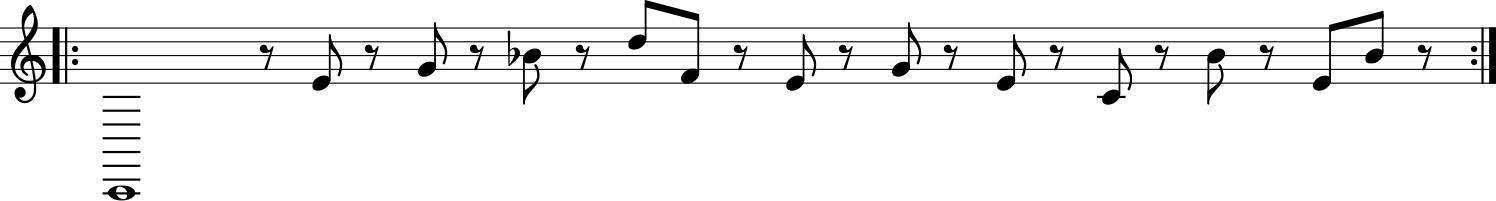

Playing corpus/generated_chords/audio_tensions/7/Db7_aka_upper_sangha_Piano_11_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Db7_aka_upper_sangha_Piano_11_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


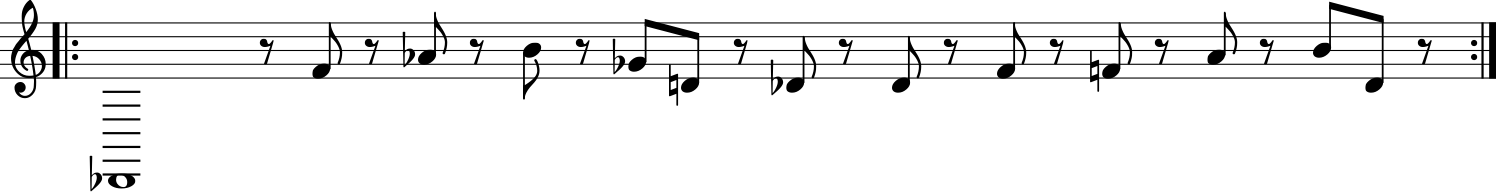

Playing corpus/generated_chords/audio_tensions/7/D7_aka_upper_sangha_Piano_b9_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/D7_aka_upper_sangha_Piano_b9_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


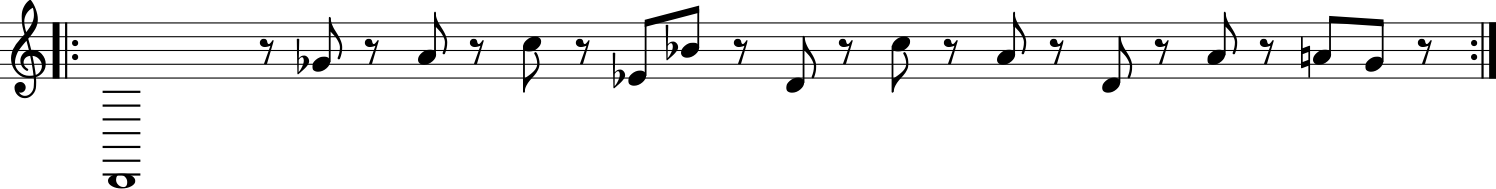

Playing corpus/generated_chords/audio_tensions/7/Eb7_aka_upper_sangha_Piano_13_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Eb7_aka_upper_sangha_Piano_13_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


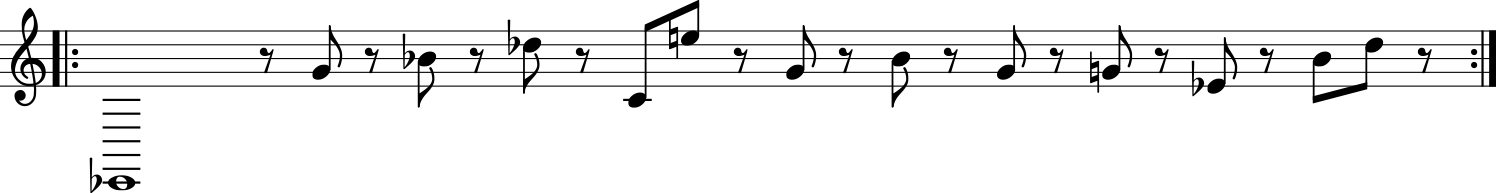

Playing corpus/generated_chords/audio_tensions/7/E7_aka_upper_sangha_Piano_11_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/E7_aka_upper_sangha_Piano_11_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


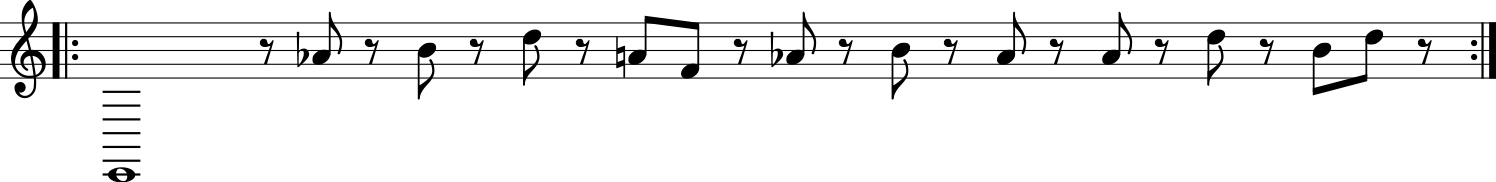

Playing corpus/generated_chords/audio_tensions/7/F7_aka_upper_sangha_Piano_9_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/F7_aka_upper_sangha_Piano_9_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


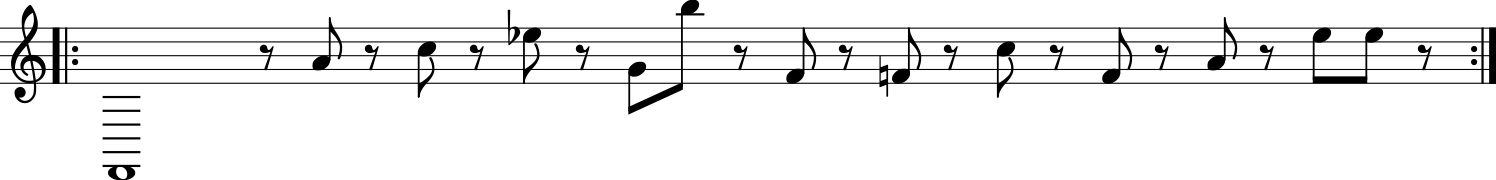

Playing corpus/generated_chords/audio_tensions/7/Gb7_aka_upper_sangha_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Gb7_aka_upper_sangha_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


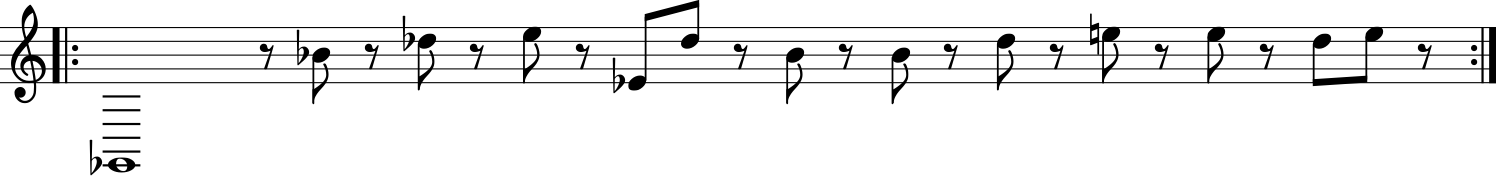

Playing corpus/generated_chords/audio_tensions/7/G7_aka_upper_sangha_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/G7_aka_upper_sangha_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


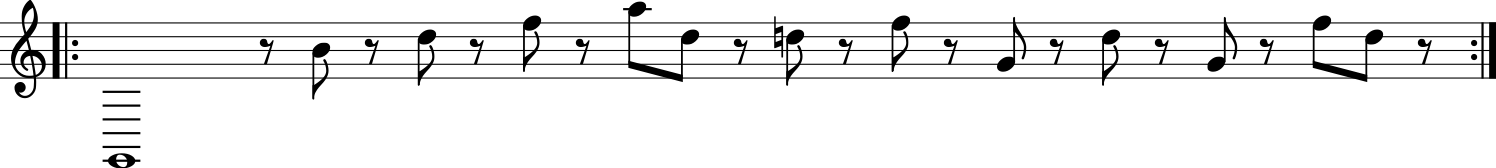

Playing corpus/generated_chords/audio_tensions/7/Ab7_aka_upper_sangha_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Ab7_aka_upper_sangha_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


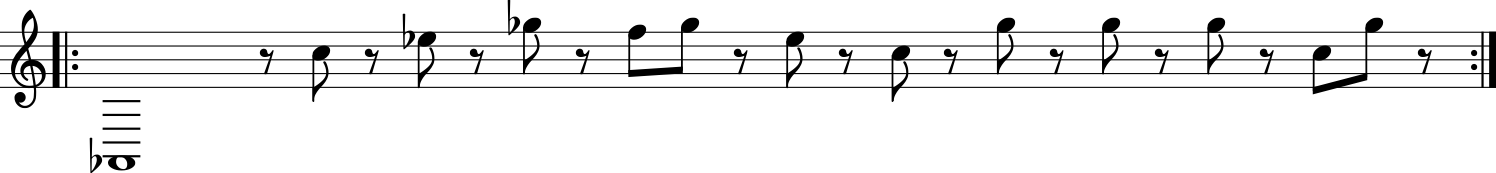

Playing corpus/generated_chords/audio_tensions/7/A7_aka_upper_sangha_Piano_9_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/7/A7_aka_upper_sangha_Piano_9_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


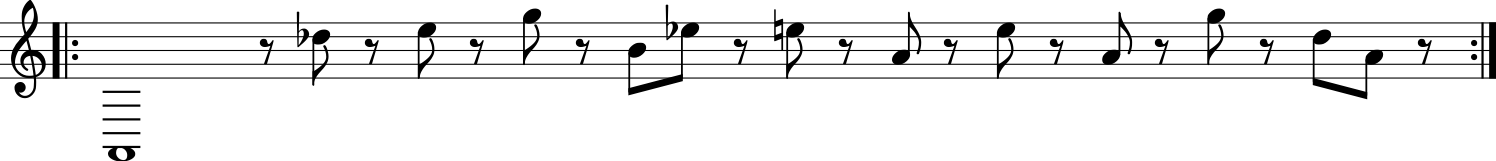

Playing corpus/generated_chords/audio_tensions/7/Bb7_aka_upper_sangha_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/7/Bb7_aka_upper_sangha_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


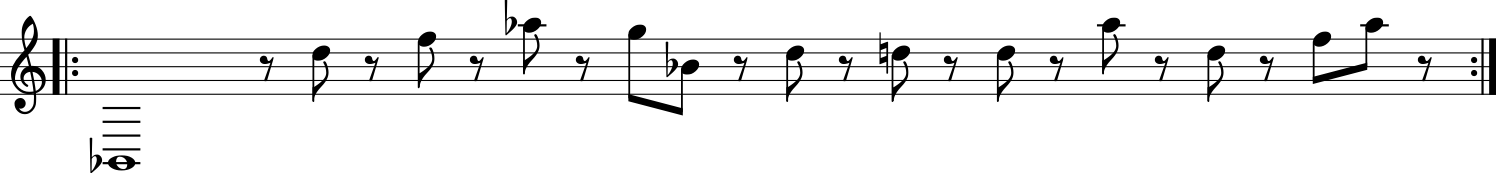

Playing corpus/generated_chords/audio_tensions/7/B7_aka_upper_sangha_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/7/B7_aka_upper_sangha_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


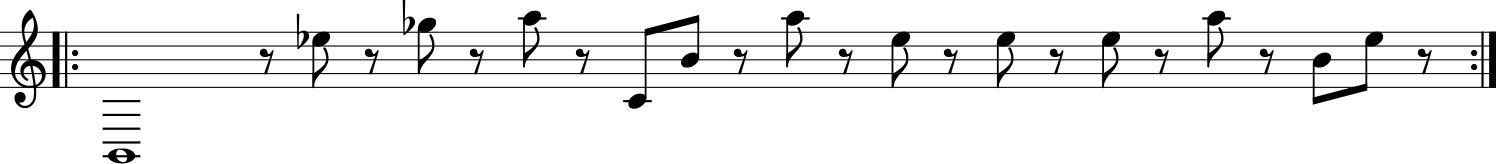

In [87]:
# variando os ritmos dos arpejos
chord_type = '7'
for ritmo, n_ataques in ritmos.items():    
    
    # variando a fundamental do acorde
    for i in list(range(12)):
        
        stream_teste = generate.traditional_rhythms[ritmo].get_beat()

        # definindo cada nota do acorde a partir dos intervalos, em semitons
        fundamental = 0 + i
        terca = fundamental + 4
        quinta = fundamental + 7
        setima = fundamental + 10

        # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
        i_C = semitons[fundamental]
        i_E = semitons[terca]
        i_G = semitons[quinta]
        i_B = semitons[setima]


        # criando um dicionário, em que a chave é a distância em semitons do dó e o valor é seu nome, como string
        acorde_dict = {i_C:notes[i_C], 
                       i_E:notes[i_E], 
                       i_G:notes[i_G], 
                       i_B:notes[i_B]}


        # aqui, tratamos a questão das oitavas. terça, quinta e sétima precisam ser sempre mais agudas que a fundamental
        semitom_fundamental = i_C
        for key, value in acorde_dict.items():
            if key < semitom_fundamental:
                acorde_dict[key] = value + '5'

            else:
                acorde_dict[key] = value + '4'

        acorde_list = []
        for key, value in acorde_dict.items():
            acorde_list.append(value)


        # amostrando aleatoriamente as notas que faltam pra completar a quantidade de ataques
        # ex.: se temos 7 ataques no ritmo, amostraremos 7 - 4 = 3 notas
        # obs.: as notas extra precisam ser pertencentes ao acorde em questão
        
        
        # se tivermos exatamente 5 ataques, só podemos ter 1 tensão
        # se tivermos mais do que 5 ataques, podemos ter 1 ou 2 tensões
        if n_ataques == 5:
            n_tensoes = 1
            
            # array de tamanho 1
            tensoes = np.random.choice(tensoes_list, 
                                       size=n_tensoes).tolist()
                
        else:
            n_tensoes = np.random.choice([1, 2], 1)[0]
            # se forem 2 tensões, não pode ser b9 e 9, por ex.
            
            tipos_tensao = np.random.choice(['9', '11', '13'], 
                                            size=n_tensoes, 
                                            replace=False)
            
            # a lista abaixo contem 1 ou 2 elementos, correspondendo a quantidade de semitons da tensão
            # em relação à fundamental
            tensoes = []
            for tipo_tensao in tipos_tensao:
                if tipo_tensao == '9':
                    tensao = np.random.choice(list(dict_9.keys()), 
                                              size=1, 
                                              replace=False)[0]
                    tensoes.append(tensao)
                    
                elif tipo_tensao == '11':
                    tensao = np.random.choice(list(dict_11.keys()), 
                                              size=1, 
                                              replace=False)[0]
                    tensoes.append(tensao)
                    
                else:
                    tensao = np.random.choice(list(dict_13.keys()), 
                                              size=1, 
                                              replace=False)[0]
                    tensoes.append(tensao)
            
        
        
#         print(tensoes)
        
        # criando um dicionário em que a chave é a quantidade de semitons da nota de tensão 
        # (ex.: se a tensão for b9 e a fundamental for D, a chave será 3, correspondendo ao Eb)
        # e o valor é o nome da nota de tensão no caso da fundamental em questão. no mesmo exemplo acima, o valor
        # seria Eb.
        
        
        nomes_tensoes = []
        notas_tensoes = []
        
        for tensao in tensoes:
            nota_tensao = tensao + i 
            i_tensao = semitons[nota_tensao]
            
            oitava_tensao = np.random.choice(['4', '5'], size=1)[0]
            
            # refletindo sobre se encararia, por exemplo, um 13 como 13 mesmo ou como 6 (pela oitava)
            # aí decidi alternar. a oitava da tensão é escolhida aleatoriamente entre 4 ou 5
             
            notas_tensoes.append(notes[i_tensao] + oitava_tensao)
            nomes_tensoes.append(dict_tensoes[tensao])
            
        
        
        if n_tensoes == 1:
            str_tensoes = nomes_tensoes[0]
            
        else:
            str_tensoes = nomes_tensoes[0] + '_' + nomes_tensoes[1]
        
        
        
#         print(notas_tensoes,'|' ,'fundamental:', notes[i_C])
            
        # ----------------------------------------------------
        

        notas_extra = np.random.choice(acorde_list, 
                                       size=n_ataques - 4 - n_tensoes, 
                                       replace=True)
        
        acorde_list.extend(notas_tensoes)
        acorde_list.extend(notas_extra)
        
#         print('fundamental:', notes[i_C], acorde_list)



        # Flavio pediu pra fundamental durar o compasso todo
        durations = []
        for element in stream_teste[0]:
            durations.append(element.duration.quarterLength)

        duration_fund = sum(durations)



        # alterando as notas do nosso stream, para serem iguais às notas do acorde
        counter = 0
        for element in stream_teste[0]:
            if type(element) == music21.note.Note:

                nota_nova = acorde_list[counter]

                note_name = nota_nova[0] 
                note_octave = nota_nova[-1]

                element.step = note_name
                element.pitch.octave = note_octave

                # tratando o problema com bemóis
                if 'b' in nota_nova:
                    element.pitch.accidental = '-'
#                     print(nota_nova, element.step, element.pitch.accidental)

                else:            
                    element.pitch.accidental = 'natural'
#                     print(nota_nova, element.step)

                # fundamental deve durar o compasso todo e soar na oitava 2
                if counter == 0:
                    element.duration = music21.duration.Duration(duration_fund)
                    element.pitch.octave = 2


                counter += 1

#         stream_teste.show('midi')
        
        output_file = 'corpus/generated_chords/audio_tensions/{}/{}{}_{}_Piano_{}.mid'.format(chord_type, 
                                                                                     notes[i], 
                                                                                     chord_type, 
                                                                                     ritmo,
                                                                                     str_tensoes)
        
        stream_teste.write('midi', output_file)
        output_file_name = output_file.split('.mid')[0]
    
    
        !timidity {output_file_name}.mid -Ow -o {output_file_name}.wav
        
        stream_teste.show()

### Acordes <font color ='blue'> menores </font> com sétima <font color ='blue'> menor </font>

Playing corpus/generated_chords/audio_tensions/min7/Cmin7_york-samai_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Cmin7_york-samai_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


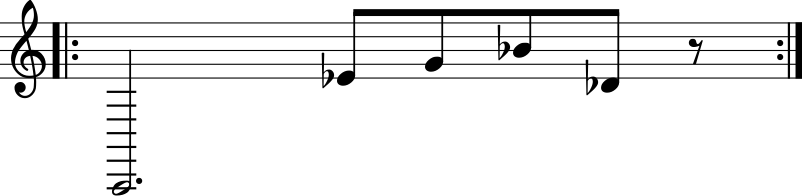

Playing corpus/generated_chords/audio_tensions/min7/Dbmin7_york-samai_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dbmin7_york-samai_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


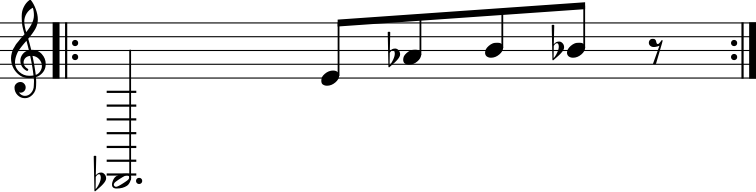

Playing corpus/generated_chords/audio_tensions/min7/Dmin7_york-samai_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dmin7_york-samai_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


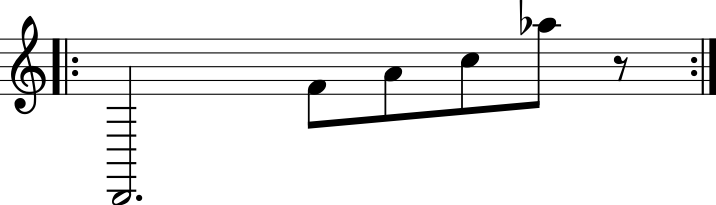

Playing corpus/generated_chords/audio_tensions/min7/Ebmin7_york-samai_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Ebmin7_york-samai_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


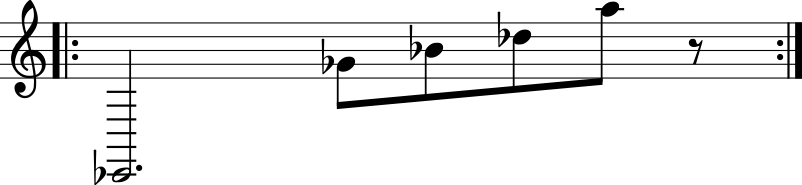

Playing corpus/generated_chords/audio_tensions/min7/Emin7_york-samai_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Emin7_york-samai_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


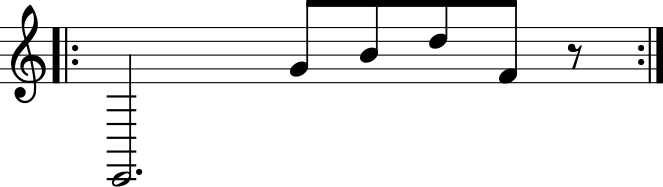

Playing corpus/generated_chords/audio_tensions/min7/Fmin7_york-samai_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Fmin7_york-samai_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


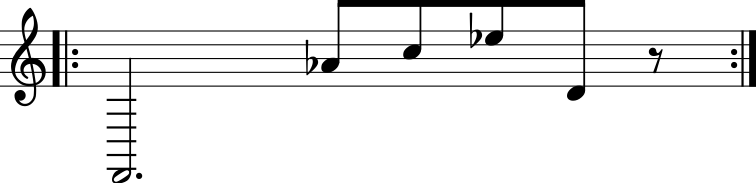

Playing corpus/generated_chords/audio_tensions/min7/Gbmin7_york-samai_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gbmin7_york-samai_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


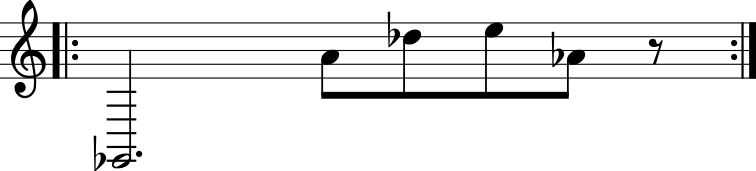

Playing corpus/generated_chords/audio_tensions/min7/Gmin7_york-samai_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gmin7_york-samai_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


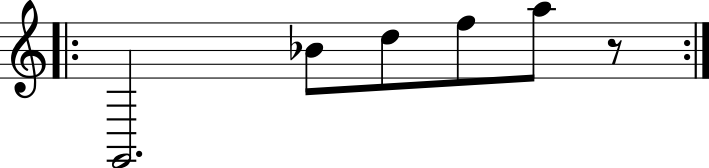

Playing corpus/generated_chords/audio_tensions/min7/Abmin7_york-samai_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Abmin7_york-samai_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


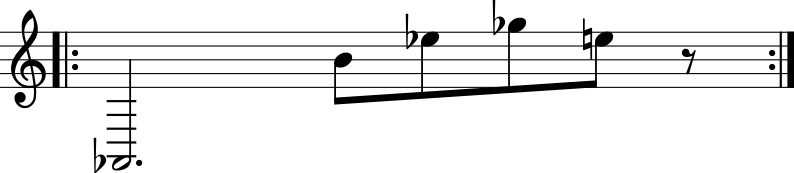

Playing corpus/generated_chords/audio_tensions/min7/Amin7_york-samai_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Amin7_york-samai_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


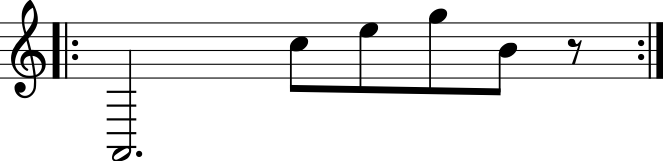

Playing corpus/generated_chords/audio_tensions/min7/Bbmin7_york-samai_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bbmin7_york-samai_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


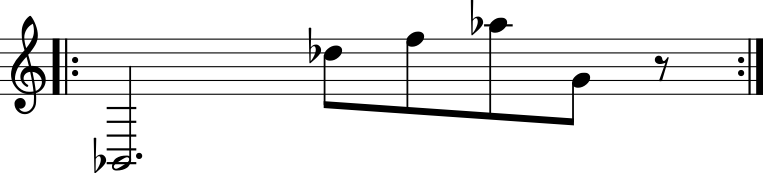

Playing corpus/generated_chords/audio_tensions/min7/Bmin7_york-samai_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bmin7_york-samai_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


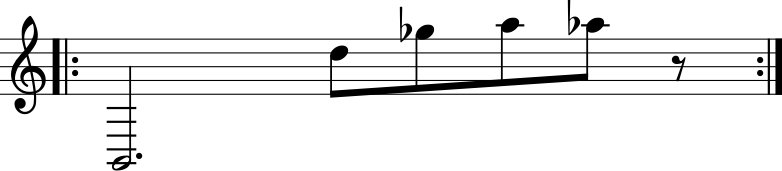

Playing corpus/generated_chords/audio_tensions/min7/Cmin7_Nawakhat_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Cmin7_Nawakhat_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


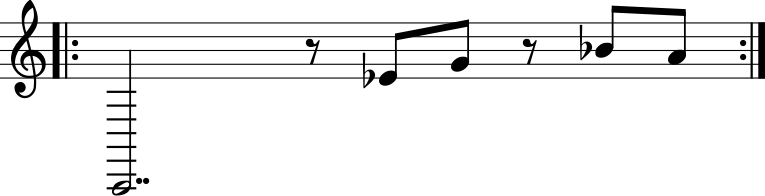

Playing corpus/generated_chords/audio_tensions/min7/Dbmin7_Nawakhat_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dbmin7_Nawakhat_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


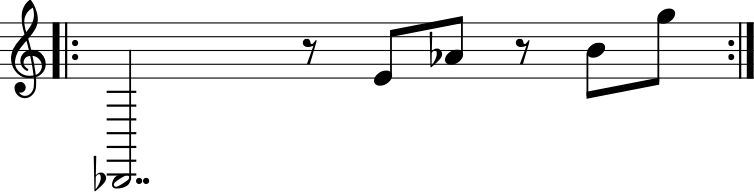

Playing corpus/generated_chords/audio_tensions/min7/Dmin7_Nawakhat_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dmin7_Nawakhat_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


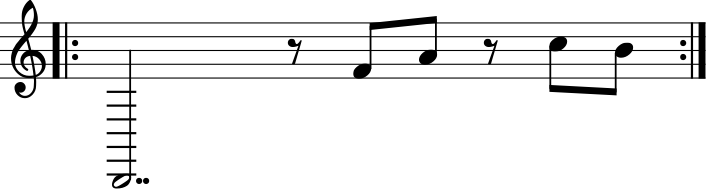

Playing corpus/generated_chords/audio_tensions/min7/Ebmin7_Nawakhat_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Ebmin7_Nawakhat_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


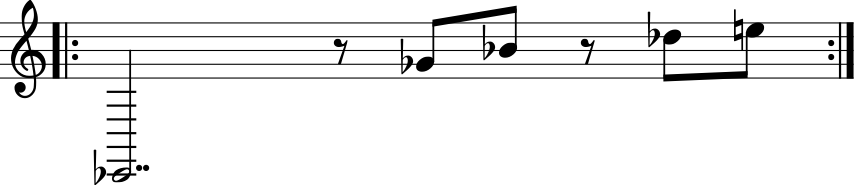

Playing corpus/generated_chords/audio_tensions/min7/Emin7_Nawakhat_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Emin7_Nawakhat_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


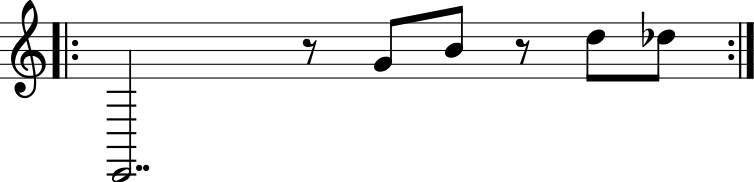

Playing corpus/generated_chords/audio_tensions/min7/Fmin7_Nawakhat_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Fmin7_Nawakhat_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


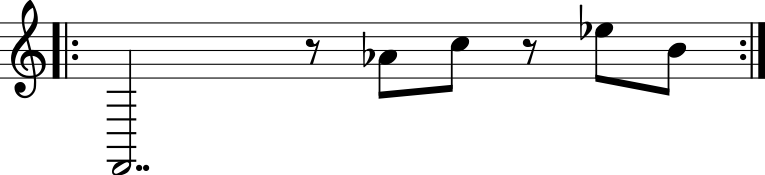

Playing corpus/generated_chords/audio_tensions/min7/Gbmin7_Nawakhat_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gbmin7_Nawakhat_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


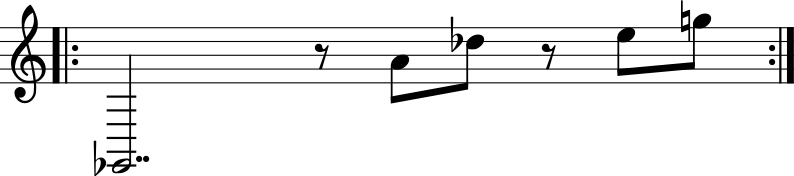

Playing corpus/generated_chords/audio_tensions/min7/Gmin7_Nawakhat_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gmin7_Nawakhat_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


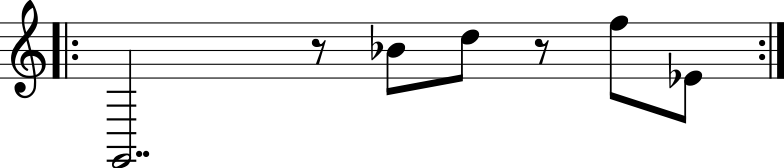

Playing corpus/generated_chords/audio_tensions/min7/Abmin7_Nawakhat_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Abmin7_Nawakhat_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


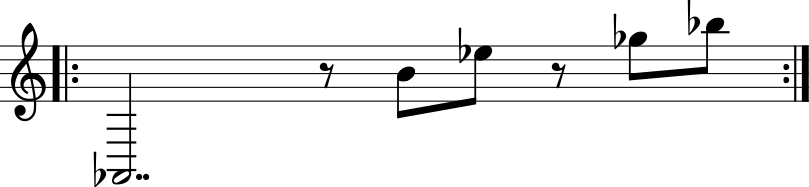

Playing corpus/generated_chords/audio_tensions/min7/Amin7_Nawakhat_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Amin7_Nawakhat_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


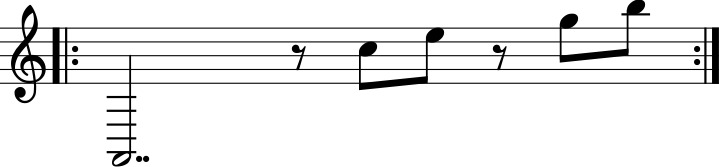

Playing corpus/generated_chords/audio_tensions/min7/Bbmin7_Nawakhat_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bbmin7_Nawakhat_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


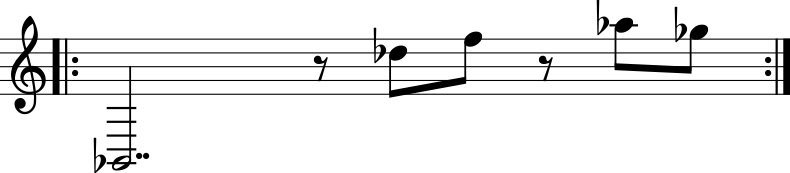

Playing corpus/generated_chords/audio_tensions/min7/Bmin7_Nawakhat_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bmin7_Nawakhat_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~7 seconds
Notes cut: 0
Notes lost totally: 0


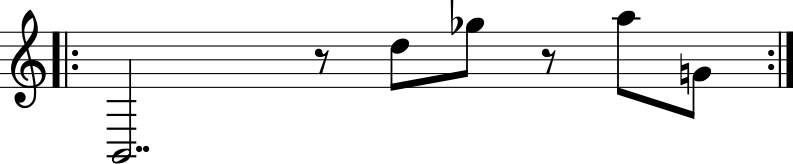

Playing corpus/generated_chords/audio_tensions/min7/Cmin7_cinquillo_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Cmin7_cinquillo_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


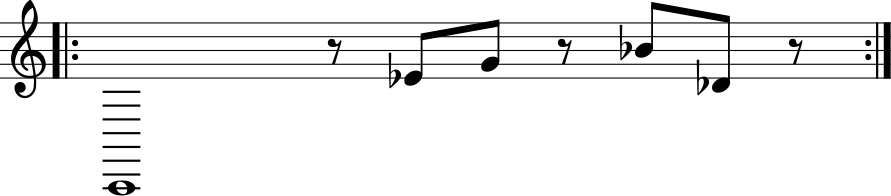

Playing corpus/generated_chords/audio_tensions/min7/Dbmin7_cinquillo_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dbmin7_cinquillo_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


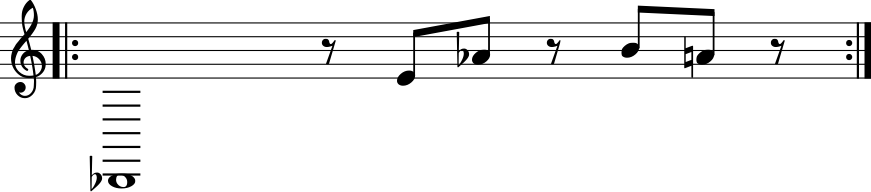

Playing corpus/generated_chords/audio_tensions/min7/Dmin7_cinquillo_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dmin7_cinquillo_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


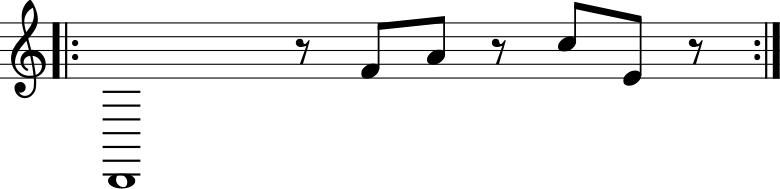

Playing corpus/generated_chords/audio_tensions/min7/Ebmin7_cinquillo_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Ebmin7_cinquillo_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


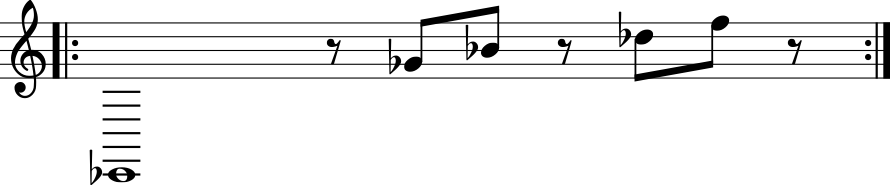

Playing corpus/generated_chords/audio_tensions/min7/Emin7_cinquillo_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Emin7_cinquillo_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


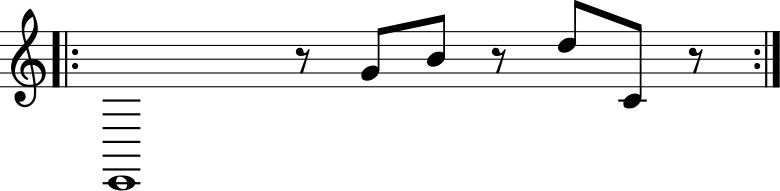

Playing corpus/generated_chords/audio_tensions/min7/Fmin7_cinquillo_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Fmin7_cinquillo_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


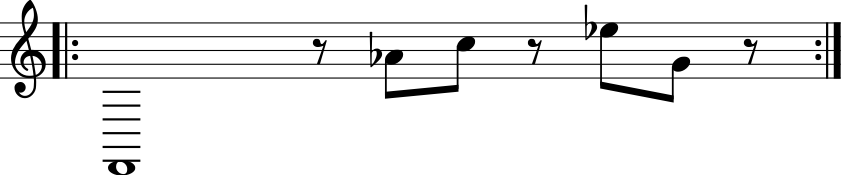

Playing corpus/generated_chords/audio_tensions/min7/Gbmin7_cinquillo_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gbmin7_cinquillo_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


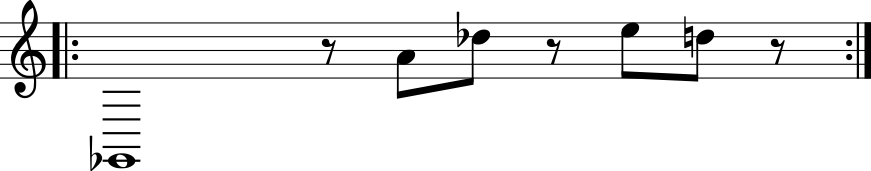

Playing corpus/generated_chords/audio_tensions/min7/Gmin7_cinquillo_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gmin7_cinquillo_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


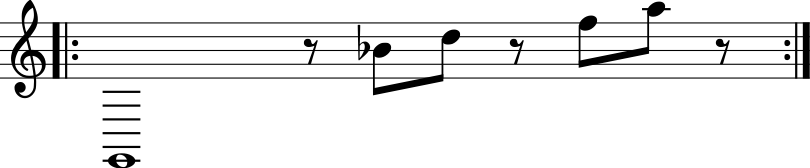

Playing corpus/generated_chords/audio_tensions/min7/Abmin7_cinquillo_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Abmin7_cinquillo_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


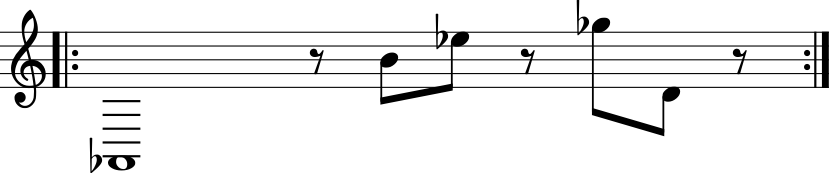

Playing corpus/generated_chords/audio_tensions/min7/Amin7_cinquillo_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Amin7_cinquillo_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


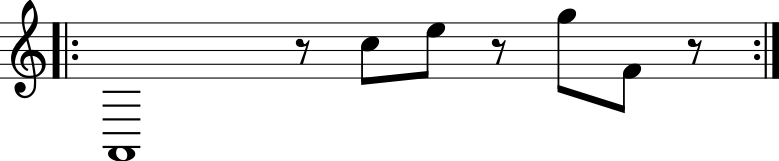

Playing corpus/generated_chords/audio_tensions/min7/Bbmin7_cinquillo_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bbmin7_cinquillo_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


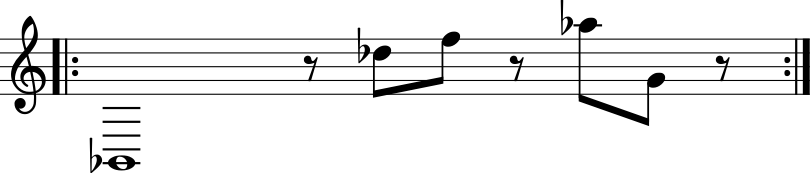

Playing corpus/generated_chords/audio_tensions/min7/Bmin7_cinquillo_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bmin7_cinquillo_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


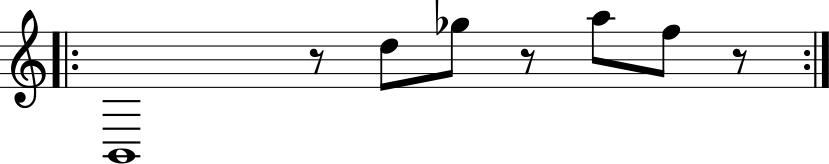

Playing corpus/generated_chords/audio_tensions/min7/Cmin7_spanish_tango_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Cmin7_spanish_tango_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


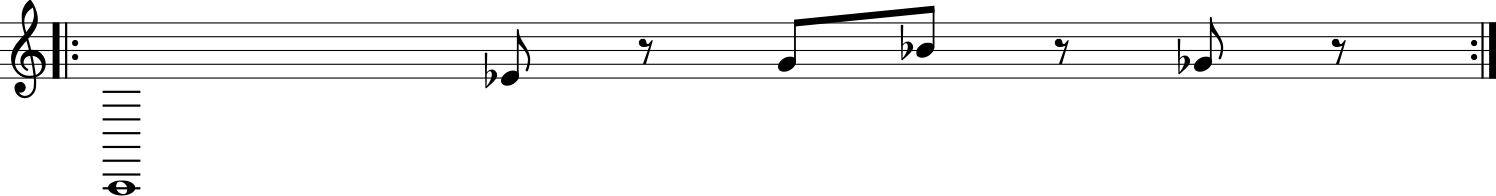

Playing corpus/generated_chords/audio_tensions/min7/Dbmin7_spanish_tango_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dbmin7_spanish_tango_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


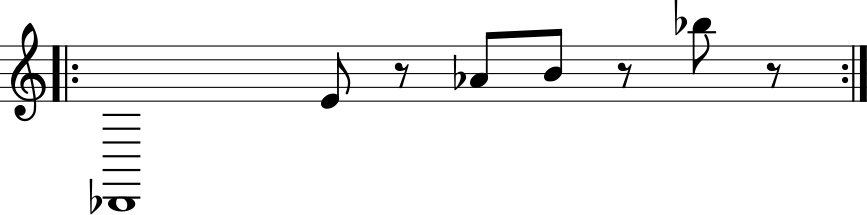

Playing corpus/generated_chords/audio_tensions/min7/Dmin7_spanish_tango_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dmin7_spanish_tango_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


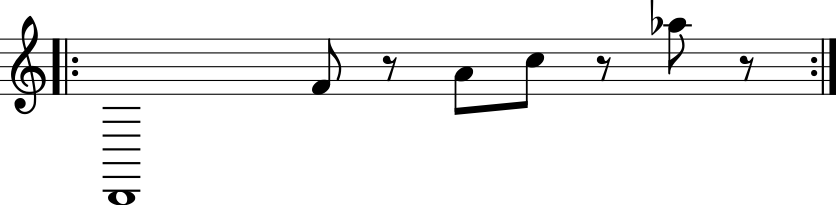

Playing corpus/generated_chords/audio_tensions/min7/Ebmin7_spanish_tango_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Ebmin7_spanish_tango_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


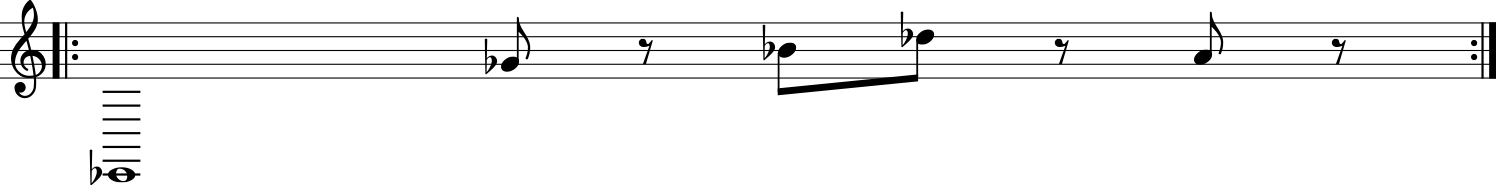

Playing corpus/generated_chords/audio_tensions/min7/Emin7_spanish_tango_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Emin7_spanish_tango_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


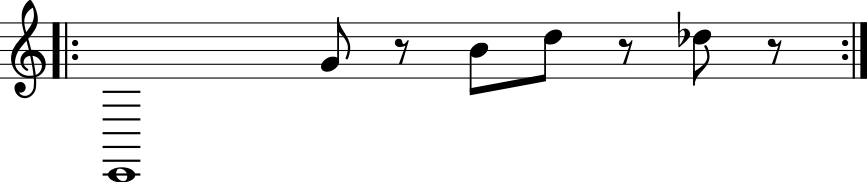

Playing corpus/generated_chords/audio_tensions/min7/Fmin7_spanish_tango_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Fmin7_spanish_tango_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


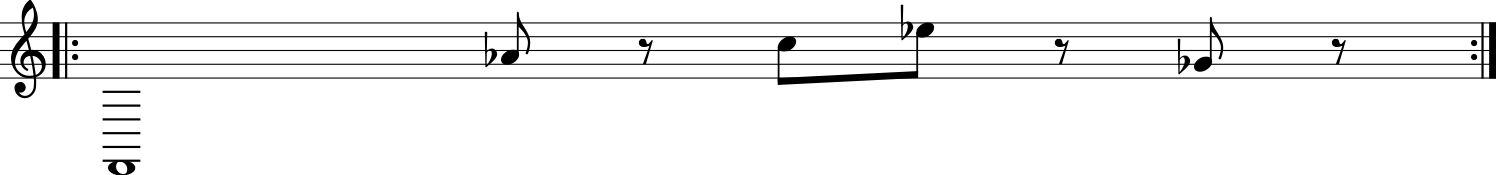

Playing corpus/generated_chords/audio_tensions/min7/Gbmin7_spanish_tango_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gbmin7_spanish_tango_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


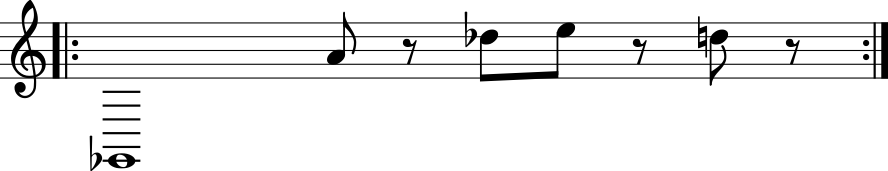

Playing corpus/generated_chords/audio_tensions/min7/Gmin7_spanish_tango_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gmin7_spanish_tango_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


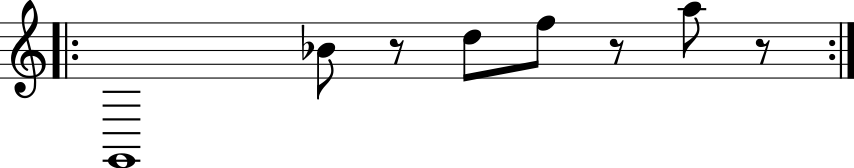

Playing corpus/generated_chords/audio_tensions/min7/Abmin7_spanish_tango_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Abmin7_spanish_tango_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


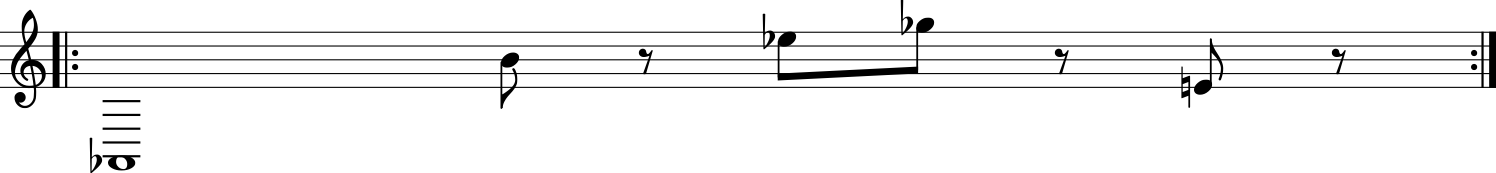

Playing corpus/generated_chords/audio_tensions/min7/Amin7_spanish_tango_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Amin7_spanish_tango_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


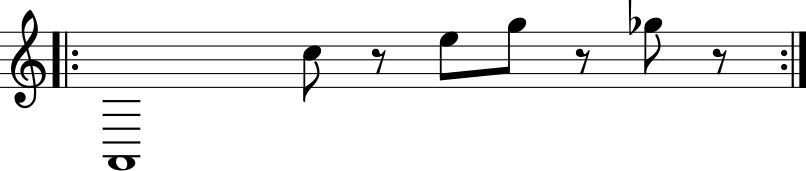

Playing corpus/generated_chords/audio_tensions/min7/Bbmin7_spanish_tango_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bbmin7_spanish_tango_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


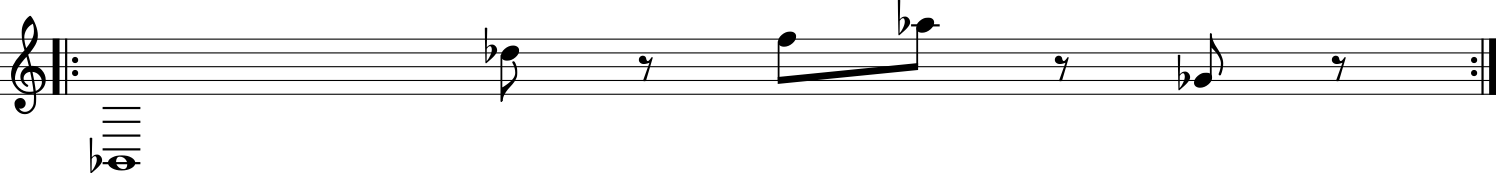

Playing corpus/generated_chords/audio_tensions/min7/Bmin7_spanish_tango_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bmin7_spanish_tango_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


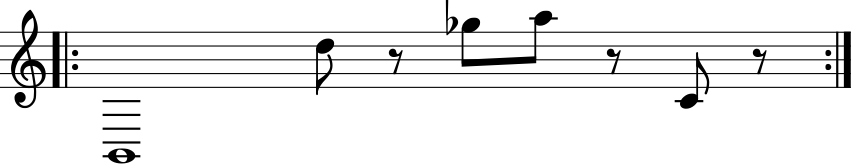

Playing corpus/generated_chords/audio_tensions/min7/Cmin7_al-saghil-al-sani_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Cmin7_al-saghil-al-sani_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


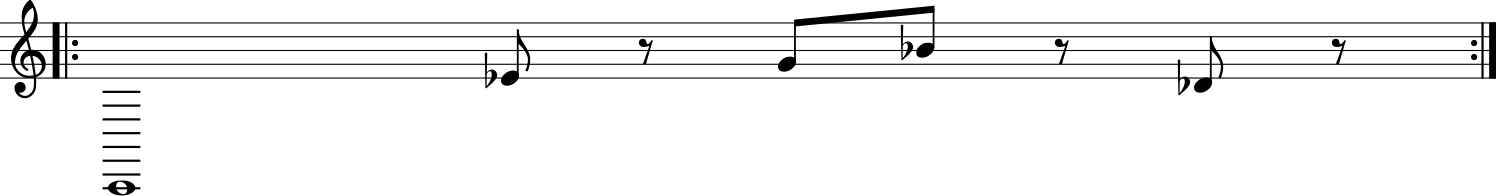

Playing corpus/generated_chords/audio_tensions/min7/Dbmin7_al-saghil-al-sani_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dbmin7_al-saghil-al-sani_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


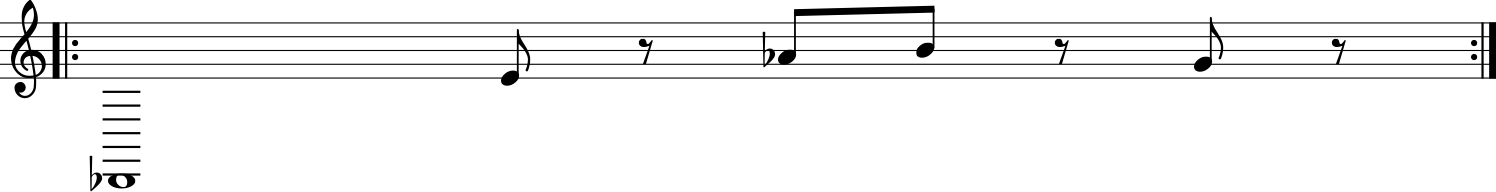

Playing corpus/generated_chords/audio_tensions/min7/Dmin7_al-saghil-al-sani_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dmin7_al-saghil-al-sani_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


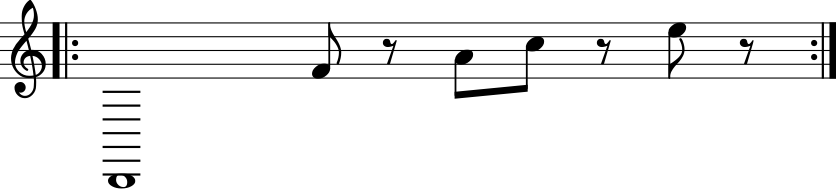

Playing corpus/generated_chords/audio_tensions/min7/Ebmin7_al-saghil-al-sani_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Ebmin7_al-saghil-al-sani_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


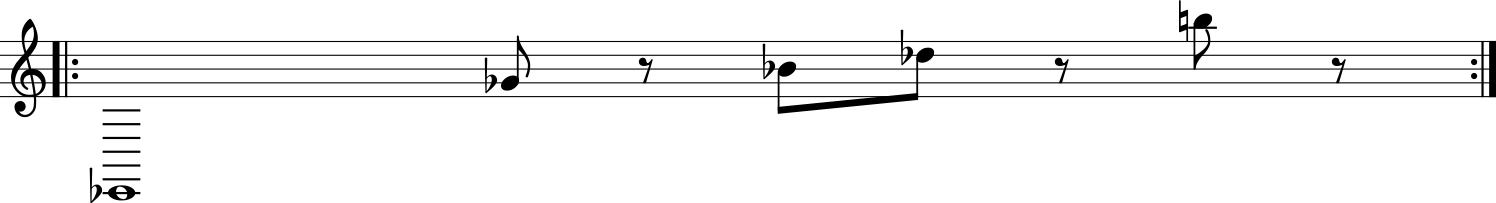

Playing corpus/generated_chords/audio_tensions/min7/Emin7_al-saghil-al-sani_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Emin7_al-saghil-al-sani_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


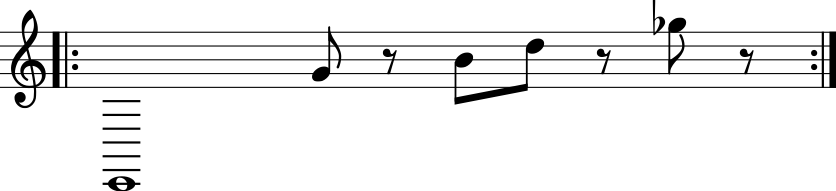

Playing corpus/generated_chords/audio_tensions/min7/Fmin7_al-saghil-al-sani_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Fmin7_al-saghil-al-sani_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


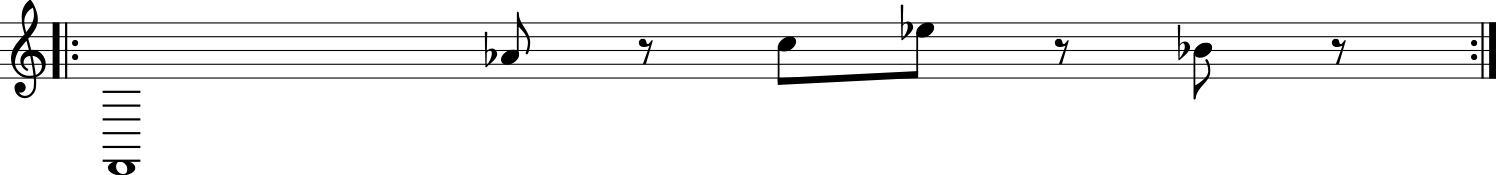

Playing corpus/generated_chords/audio_tensions/min7/Gbmin7_al-saghil-al-sani_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gbmin7_al-saghil-al-sani_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


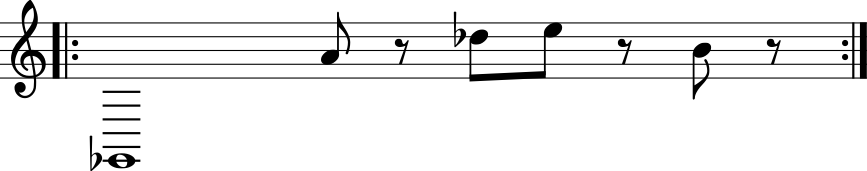

Playing corpus/generated_chords/audio_tensions/min7/Gmin7_al-saghil-al-sani_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gmin7_al-saghil-al-sani_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


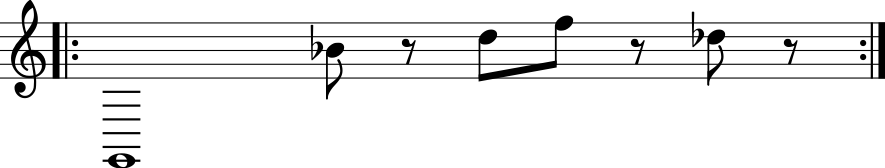

Playing corpus/generated_chords/audio_tensions/min7/Abmin7_al-saghil-al-sani_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Abmin7_al-saghil-al-sani_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


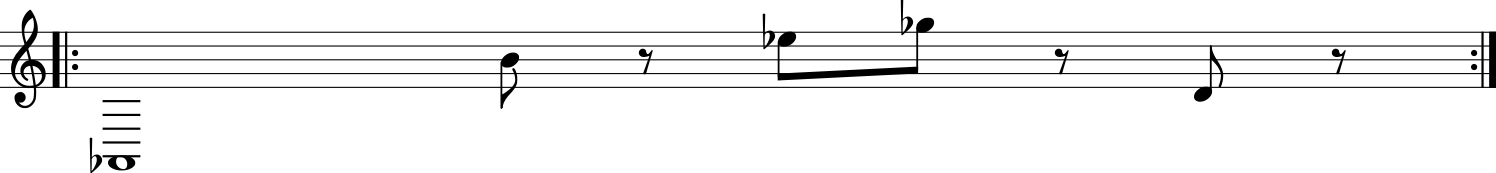

Playing corpus/generated_chords/audio_tensions/min7/Amin7_al-saghil-al-sani_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Amin7_al-saghil-al-sani_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


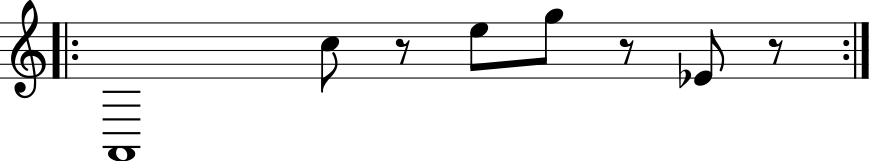

Playing corpus/generated_chords/audio_tensions/min7/Bbmin7_al-saghil-al-sani_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bbmin7_al-saghil-al-sani_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


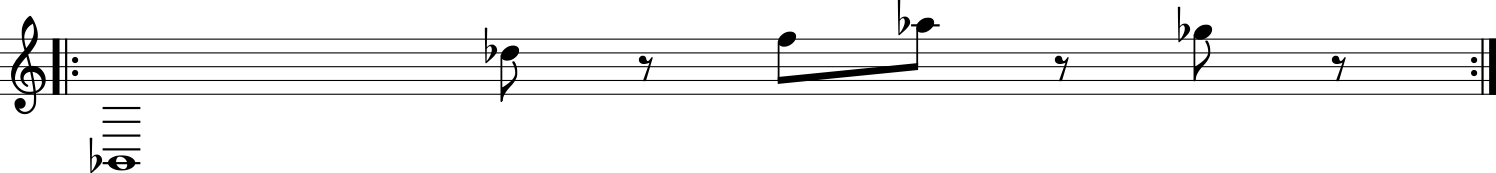

Playing corpus/generated_chords/audio_tensions/min7/Bmin7_al-saghil-al-sani_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bmin7_al-saghil-al-sani_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


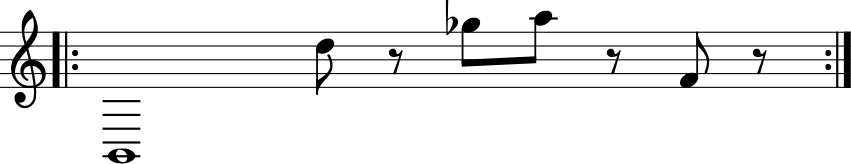

Playing corpus/generated_chords/audio_tensions/min7/Cmin7_agsag-samai_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Cmin7_agsag-samai_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


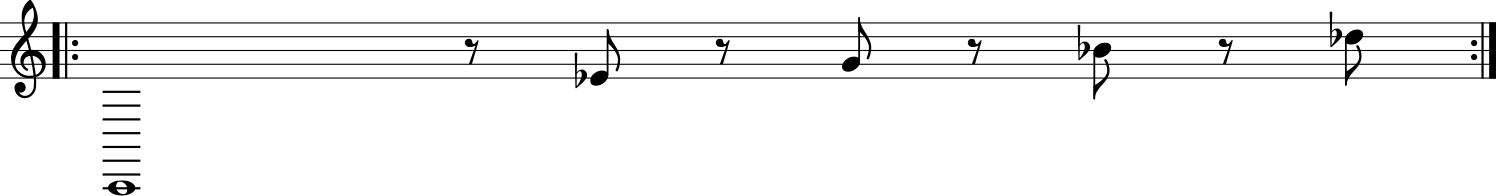

Playing corpus/generated_chords/audio_tensions/min7/Dbmin7_agsag-samai_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dbmin7_agsag-samai_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


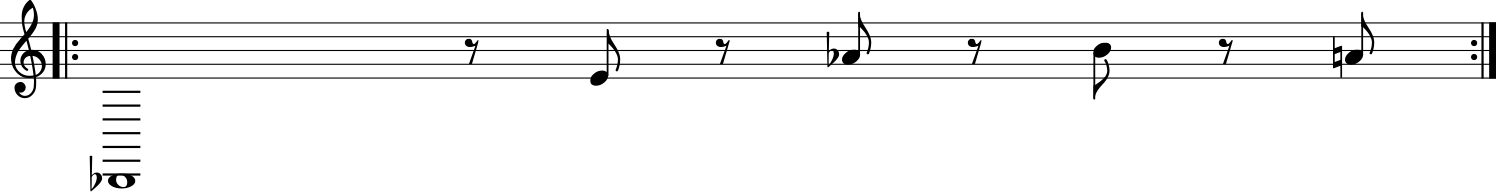

Playing corpus/generated_chords/audio_tensions/min7/Dmin7_agsag-samai_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dmin7_agsag-samai_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


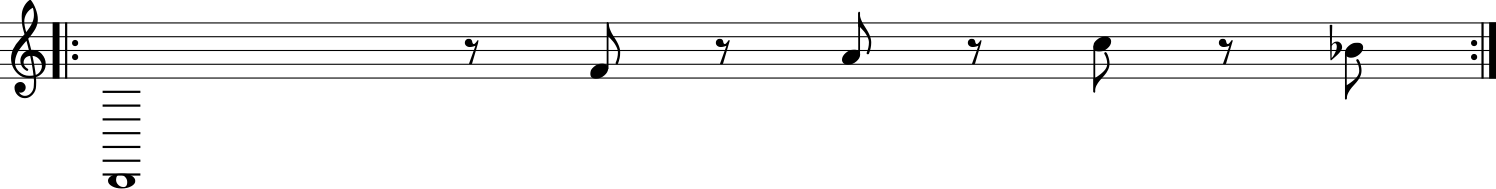

Playing corpus/generated_chords/audio_tensions/min7/Ebmin7_agsag-samai_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Ebmin7_agsag-samai_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


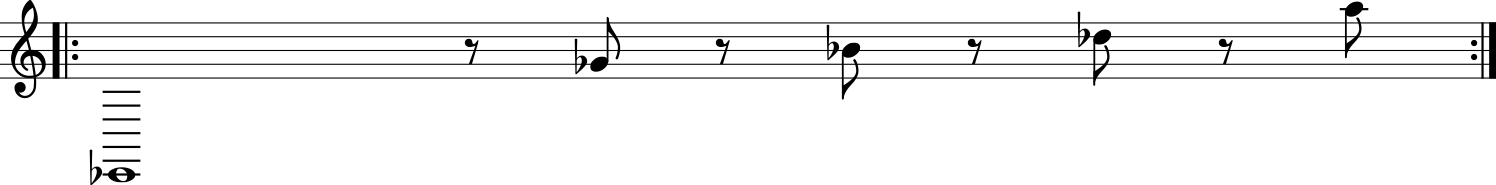

Playing corpus/generated_chords/audio_tensions/min7/Emin7_agsag-samai_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Emin7_agsag-samai_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


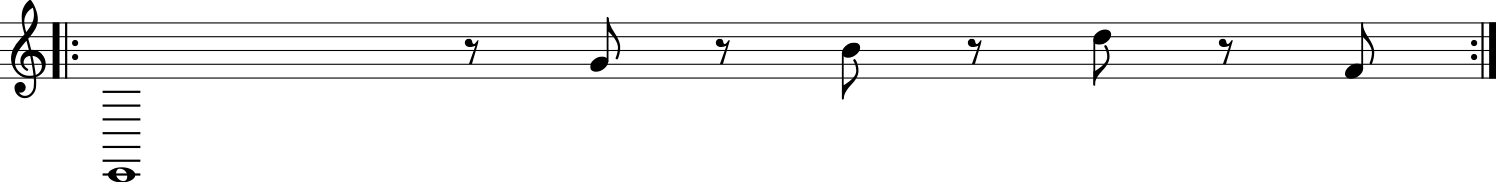

Playing corpus/generated_chords/audio_tensions/min7/Fmin7_agsag-samai_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Fmin7_agsag-samai_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


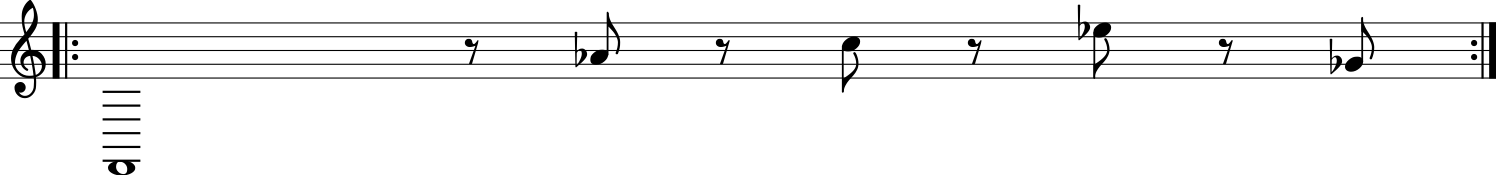

Playing corpus/generated_chords/audio_tensions/min7/Gbmin7_agsag-samai_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gbmin7_agsag-samai_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


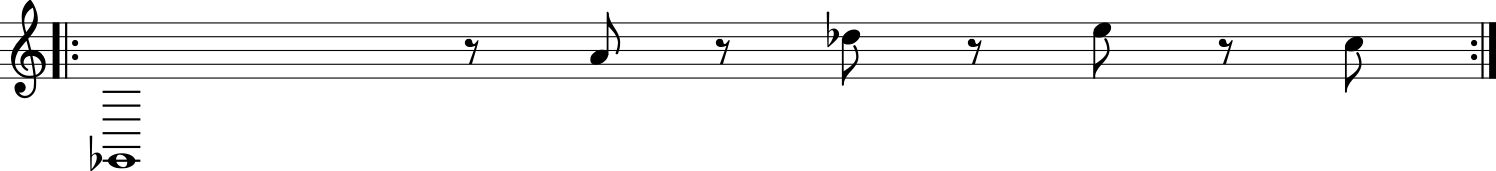

Playing corpus/generated_chords/audio_tensions/min7/Gmin7_agsag-samai_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gmin7_agsag-samai_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


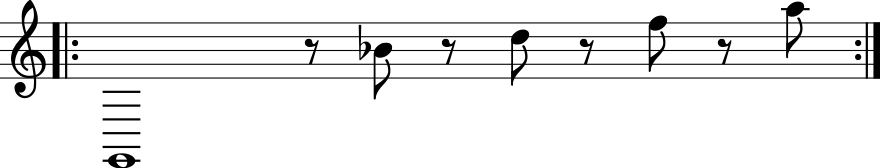

Playing corpus/generated_chords/audio_tensions/min7/Abmin7_agsag-samai_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Abmin7_agsag-samai_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


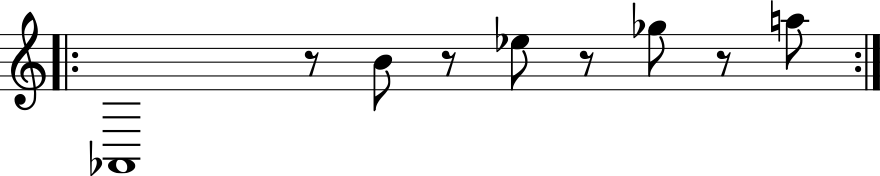

Playing corpus/generated_chords/audio_tensions/min7/Amin7_agsag-samai_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Amin7_agsag-samai_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


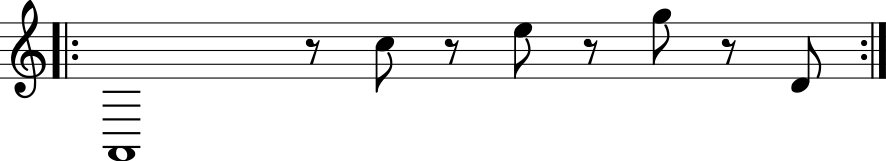

Playing corpus/generated_chords/audio_tensions/min7/Bbmin7_agsag-samai_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bbmin7_agsag-samai_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


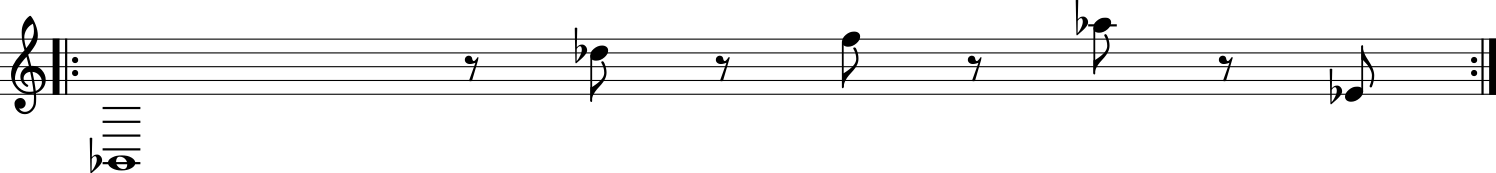

Playing corpus/generated_chords/audio_tensions/min7/Bmin7_agsag-samai_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bmin7_agsag-samai_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


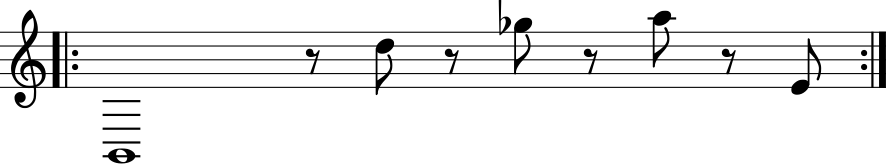

Playing corpus/generated_chords/audio_tensions/min7/Cmin7_venda_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Cmin7_venda_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


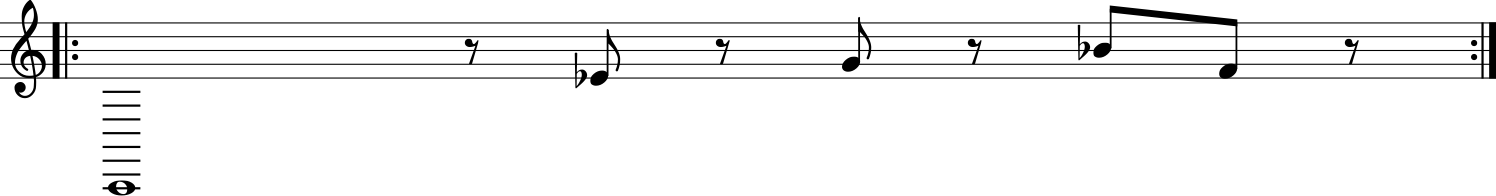

Playing corpus/generated_chords/audio_tensions/min7/Dbmin7_venda_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dbmin7_venda_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


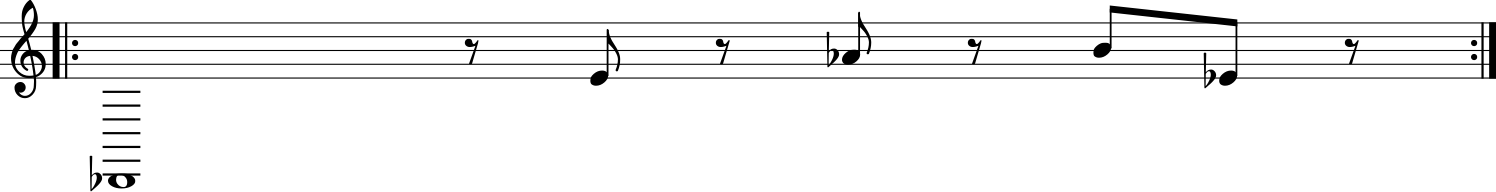

Playing corpus/generated_chords/audio_tensions/min7/Dmin7_venda_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dmin7_venda_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


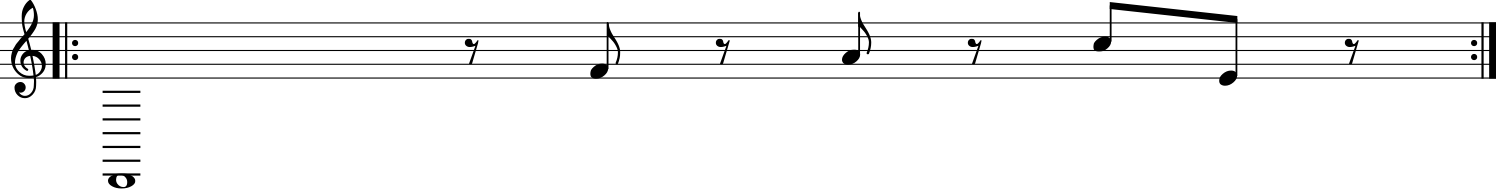

Playing corpus/generated_chords/audio_tensions/min7/Ebmin7_venda_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Ebmin7_venda_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


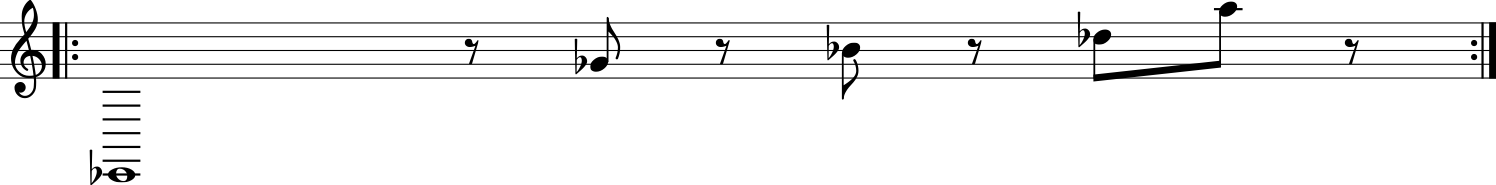

Playing corpus/generated_chords/audio_tensions/min7/Emin7_venda_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Emin7_venda_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


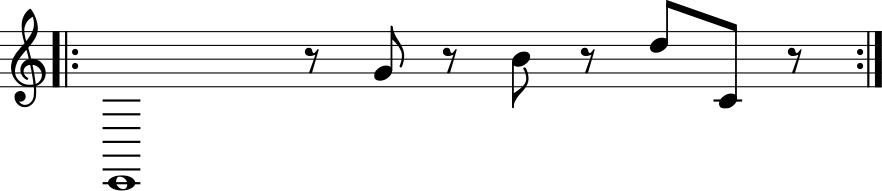

Playing corpus/generated_chords/audio_tensions/min7/Fmin7_venda_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Fmin7_venda_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


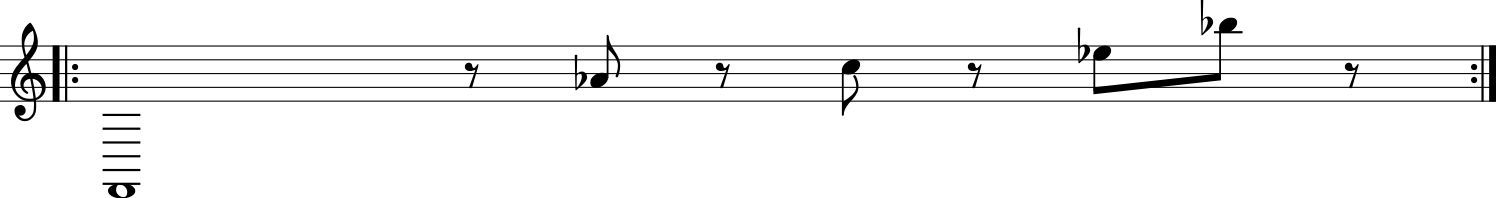

Playing corpus/generated_chords/audio_tensions/min7/Gbmin7_venda_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gbmin7_venda_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


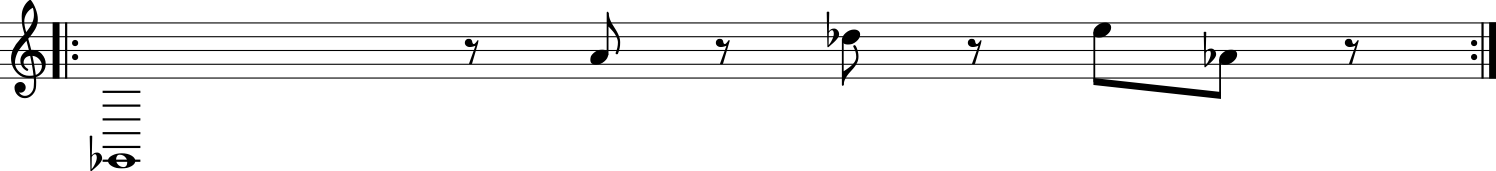

Playing corpus/generated_chords/audio_tensions/min7/Gmin7_venda_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gmin7_venda_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


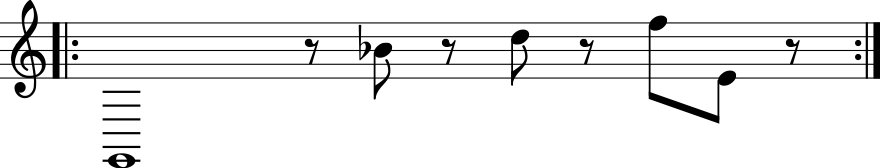

Playing corpus/generated_chords/audio_tensions/min7/Abmin7_venda_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Abmin7_venda_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


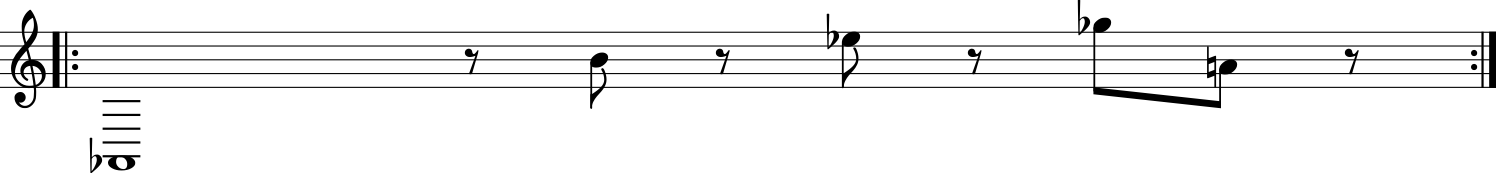

Playing corpus/generated_chords/audio_tensions/min7/Amin7_venda_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Amin7_venda_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


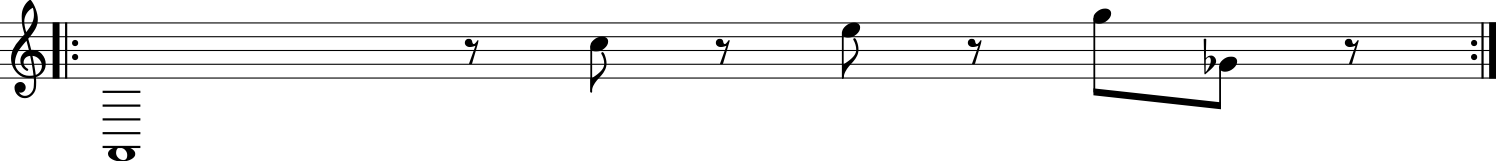

Playing corpus/generated_chords/audio_tensions/min7/Bbmin7_venda_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bbmin7_venda_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


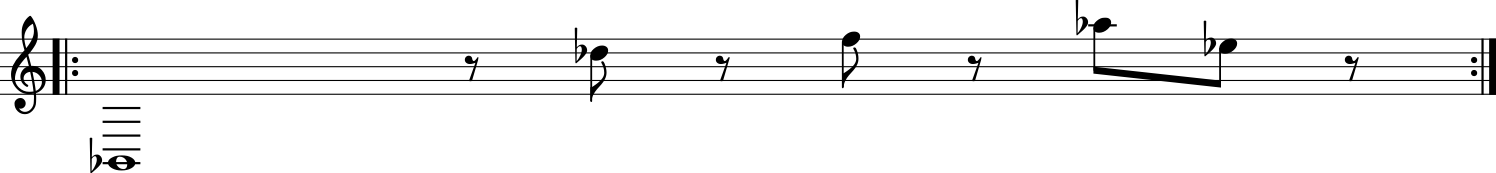

Playing corpus/generated_chords/audio_tensions/min7/Bmin7_venda_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bmin7_venda_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


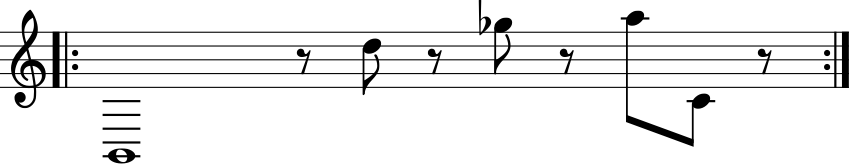

Playing corpus/generated_chords/audio_tensions/min7/Cmin7_pictures_at_an_exhibition_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Cmin7_pictures_at_an_exhibition_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


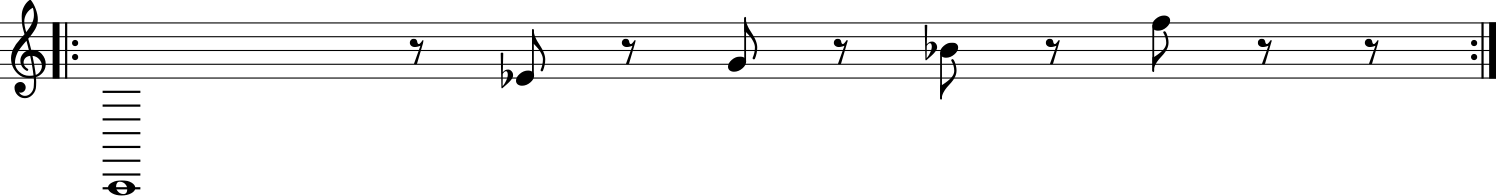

Playing corpus/generated_chords/audio_tensions/min7/Dbmin7_pictures_at_an_exhibition_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dbmin7_pictures_at_an_exhibition_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


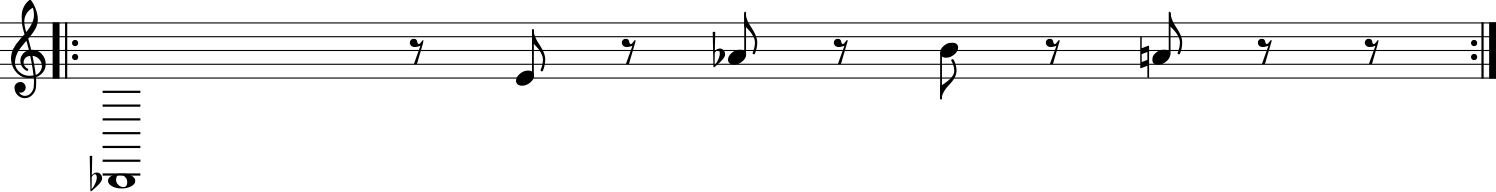

Playing corpus/generated_chords/audio_tensions/min7/Dmin7_pictures_at_an_exhibition_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dmin7_pictures_at_an_exhibition_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


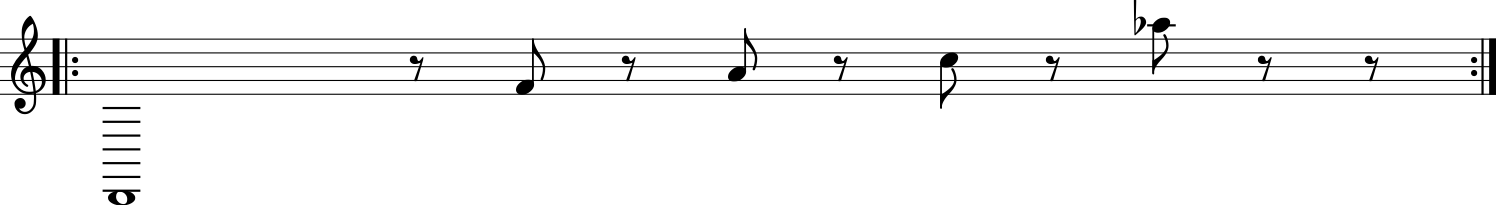

Playing corpus/generated_chords/audio_tensions/min7/Ebmin7_pictures_at_an_exhibition_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Ebmin7_pictures_at_an_exhibition_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


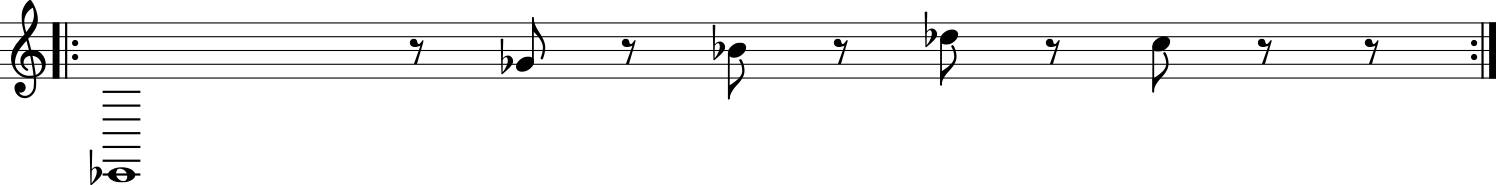

Playing corpus/generated_chords/audio_tensions/min7/Emin7_pictures_at_an_exhibition_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Emin7_pictures_at_an_exhibition_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


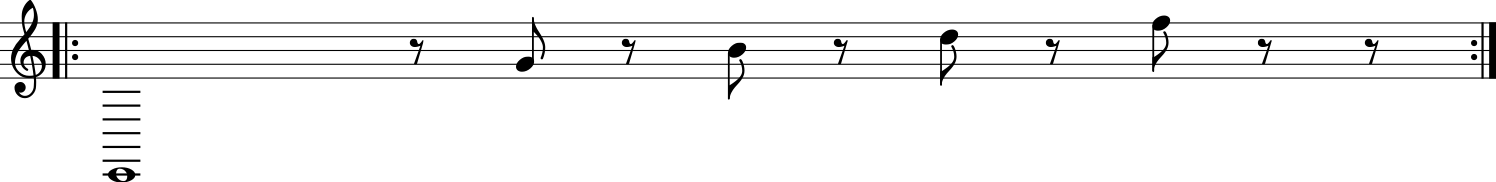

Playing corpus/generated_chords/audio_tensions/min7/Fmin7_pictures_at_an_exhibition_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Fmin7_pictures_at_an_exhibition_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


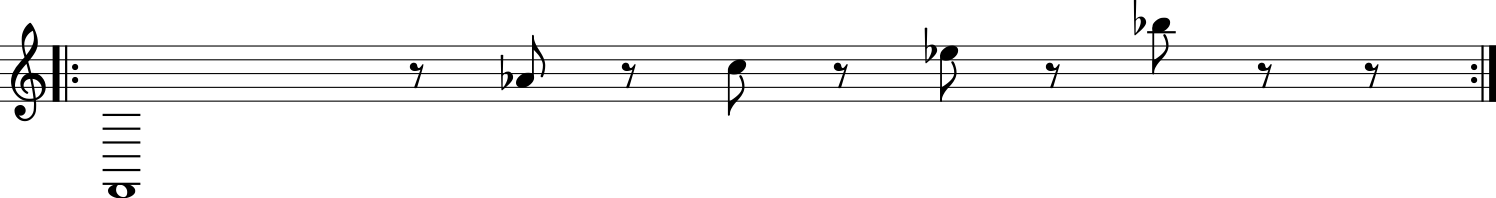

Playing corpus/generated_chords/audio_tensions/min7/Gbmin7_pictures_at_an_exhibition_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gbmin7_pictures_at_an_exhibition_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


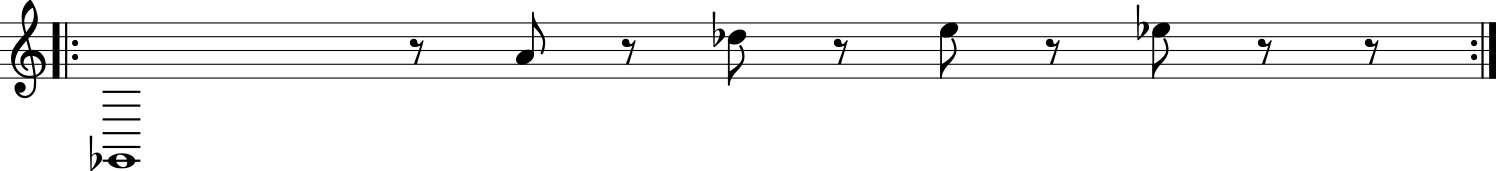

Playing corpus/generated_chords/audio_tensions/min7/Gmin7_pictures_at_an_exhibition_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gmin7_pictures_at_an_exhibition_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


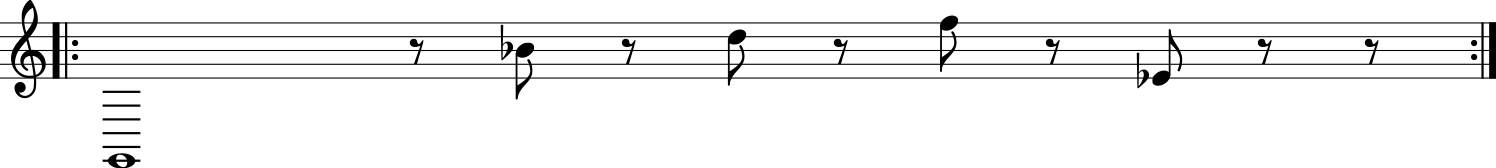

Playing corpus/generated_chords/audio_tensions/min7/Abmin7_pictures_at_an_exhibition_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Abmin7_pictures_at_an_exhibition_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


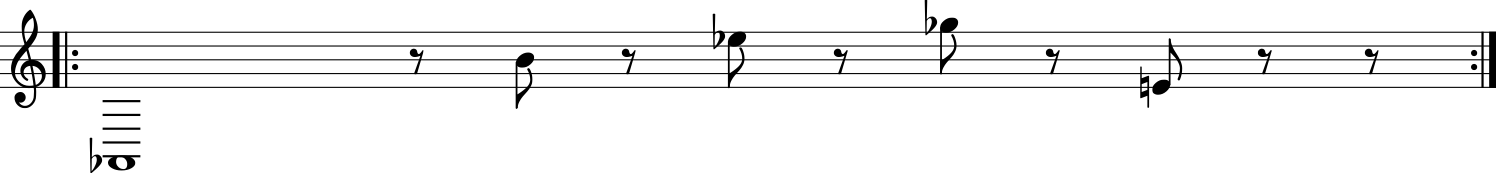

Playing corpus/generated_chords/audio_tensions/min7/Amin7_pictures_at_an_exhibition_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Amin7_pictures_at_an_exhibition_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


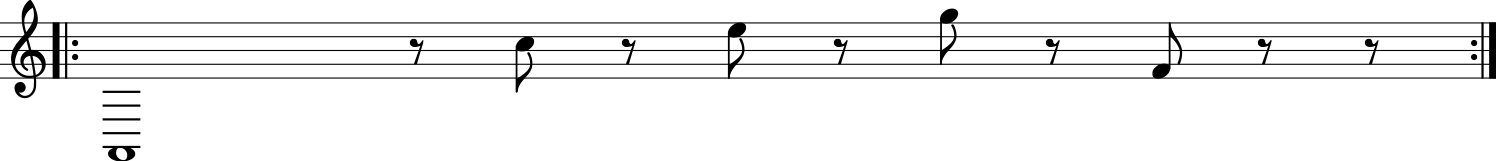

Playing corpus/generated_chords/audio_tensions/min7/Bbmin7_pictures_at_an_exhibition_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bbmin7_pictures_at_an_exhibition_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


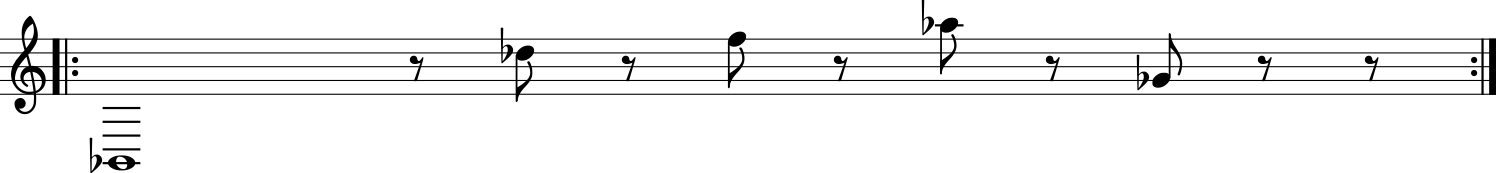

Playing corpus/generated_chords/audio_tensions/min7/Bmin7_pictures_at_an_exhibition_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bmin7_pictures_at_an_exhibition_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~9 seconds
Notes cut: 0
Notes lost totally: 0


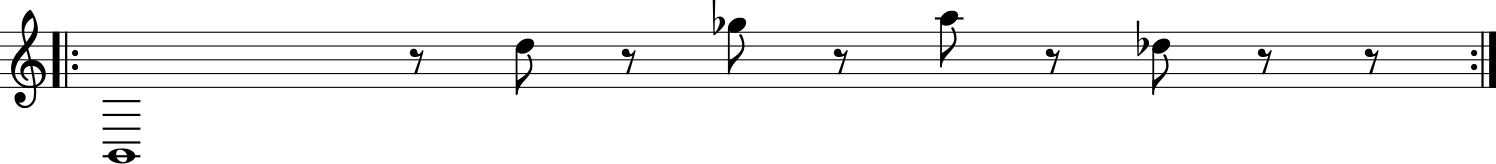

Playing corpus/generated_chords/audio_tensions/min7/Cmin7_venda_clapping_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Cmin7_venda_clapping_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


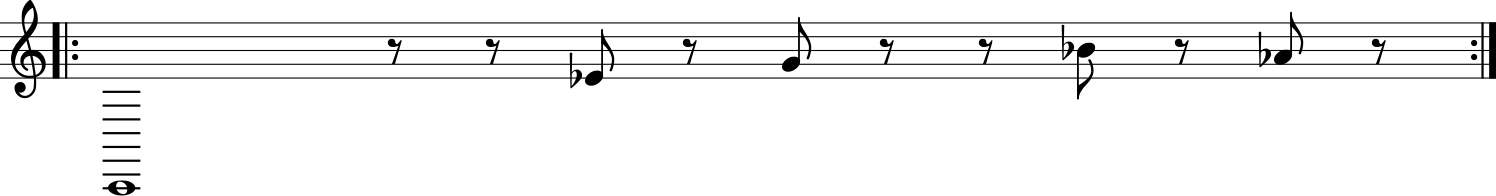

Playing corpus/generated_chords/audio_tensions/min7/Dbmin7_venda_clapping_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dbmin7_venda_clapping_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


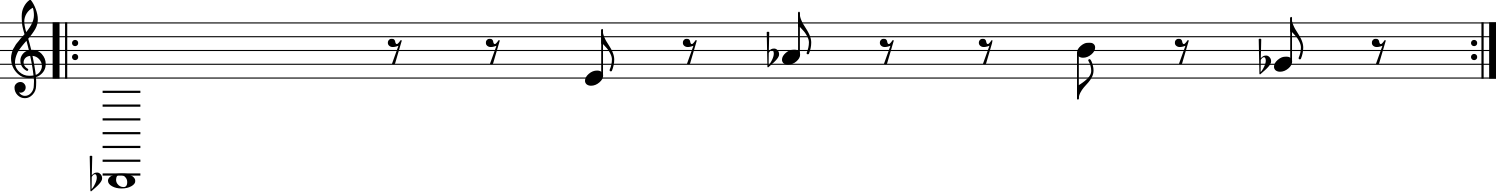

Playing corpus/generated_chords/audio_tensions/min7/Dmin7_venda_clapping_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dmin7_venda_clapping_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


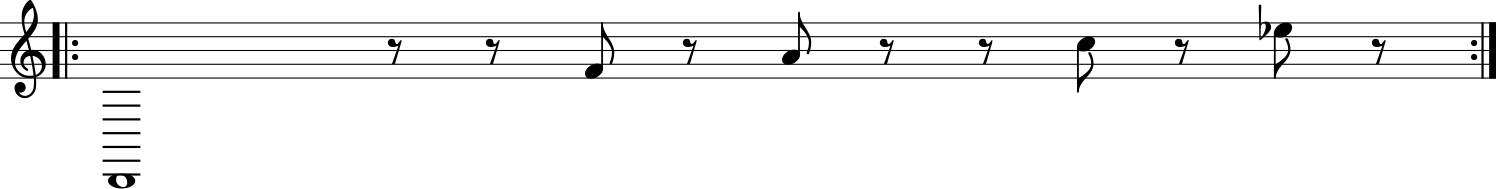

Playing corpus/generated_chords/audio_tensions/min7/Ebmin7_venda_clapping_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Ebmin7_venda_clapping_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


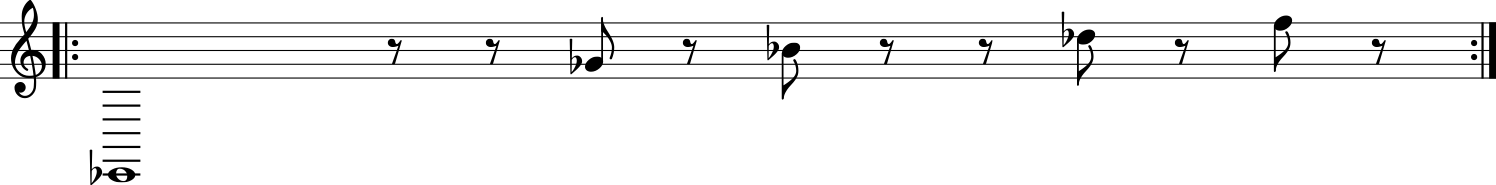

Playing corpus/generated_chords/audio_tensions/min7/Emin7_venda_clapping_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Emin7_venda_clapping_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


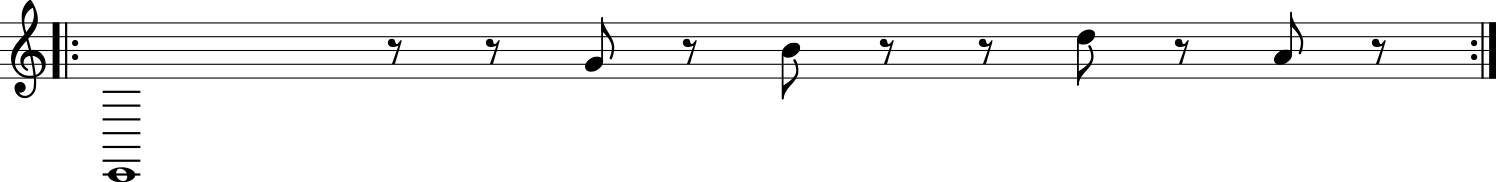

Playing corpus/generated_chords/audio_tensions/min7/Fmin7_venda_clapping_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Fmin7_venda_clapping_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


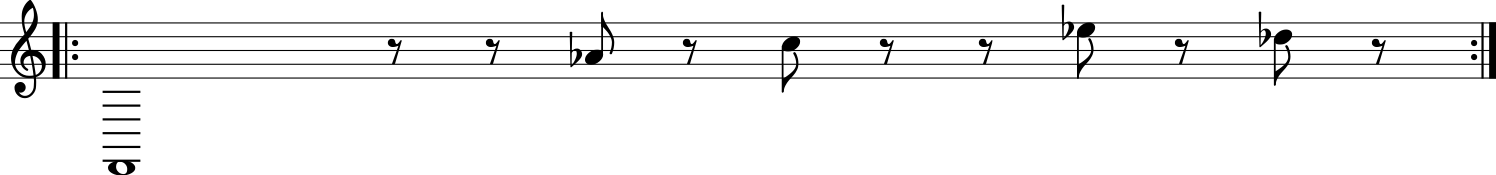

Playing corpus/generated_chords/audio_tensions/min7/Gbmin7_venda_clapping_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gbmin7_venda_clapping_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


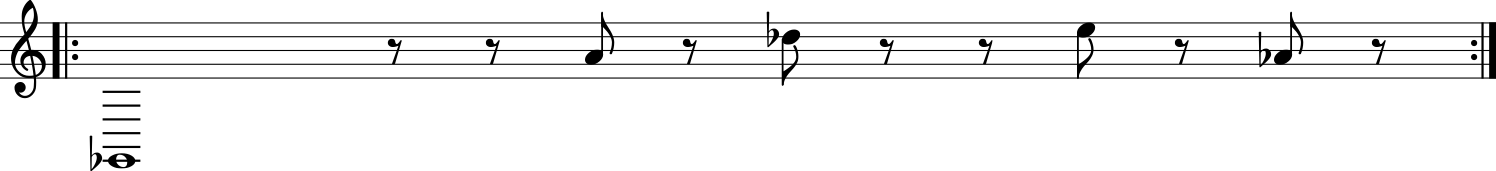

Playing corpus/generated_chords/audio_tensions/min7/Gmin7_venda_clapping_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gmin7_venda_clapping_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


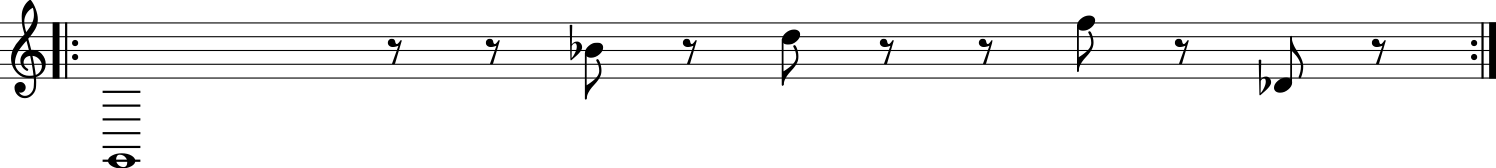

Playing corpus/generated_chords/audio_tensions/min7/Abmin7_venda_clapping_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Abmin7_venda_clapping_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


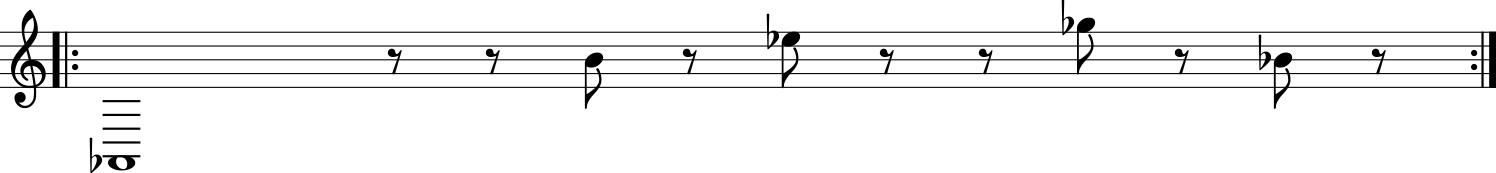

Playing corpus/generated_chords/audio_tensions/min7/Amin7_venda_clapping_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Amin7_venda_clapping_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


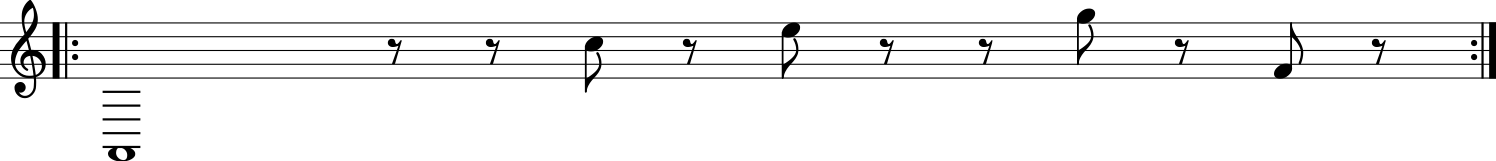

Playing corpus/generated_chords/audio_tensions/min7/Bbmin7_venda_clapping_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bbmin7_venda_clapping_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


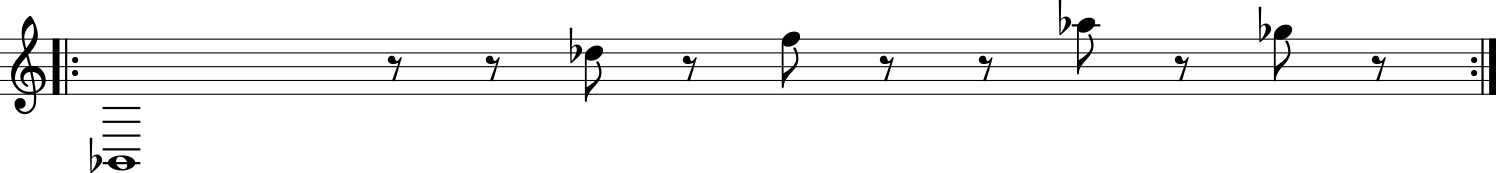

Playing corpus/generated_chords/audio_tensions/min7/Bmin7_venda_clapping_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bmin7_venda_clapping_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


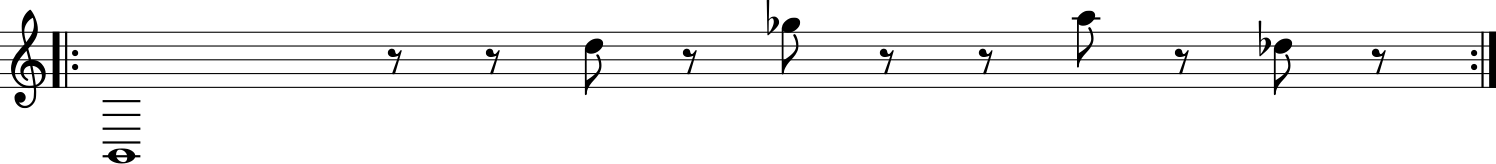

Playing corpus/generated_chords/audio_tensions/min7/Cmin7_bossa-nova_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Cmin7_bossa-nova_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


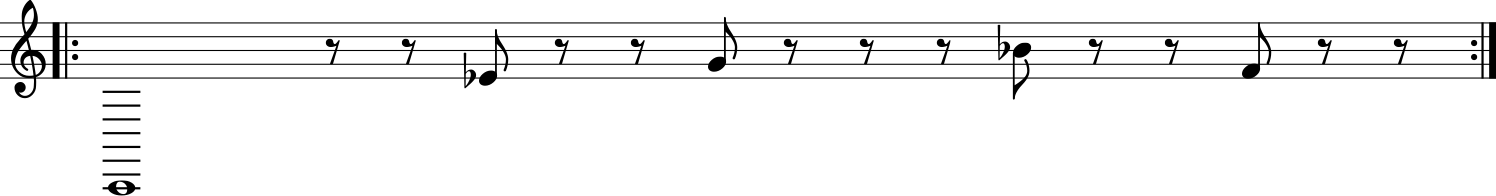

Playing corpus/generated_chords/audio_tensions/min7/Dbmin7_bossa-nova_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dbmin7_bossa-nova_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


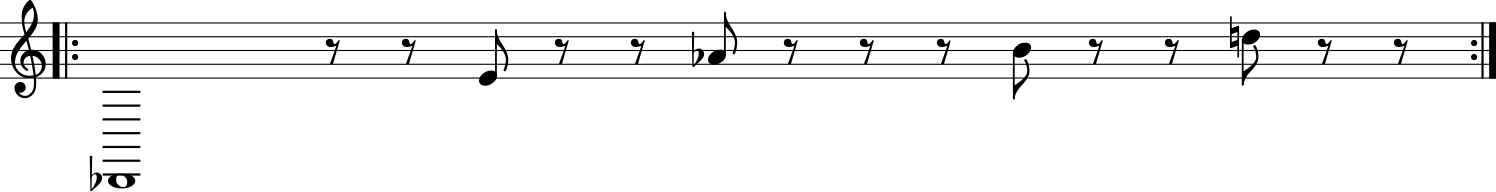

Playing corpus/generated_chords/audio_tensions/min7/Dmin7_bossa-nova_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dmin7_bossa-nova_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


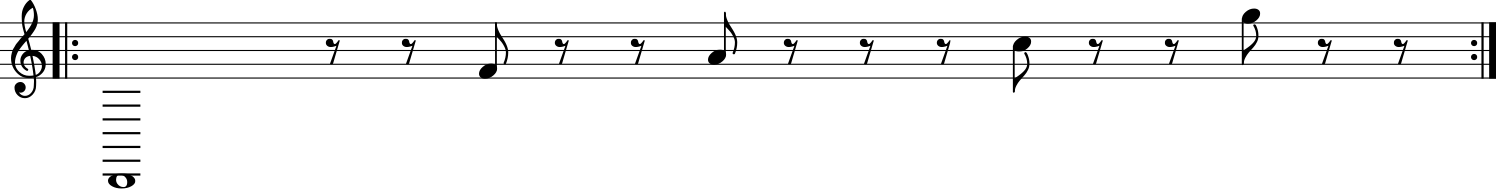

Playing corpus/generated_chords/audio_tensions/min7/Ebmin7_bossa-nova_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Ebmin7_bossa-nova_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


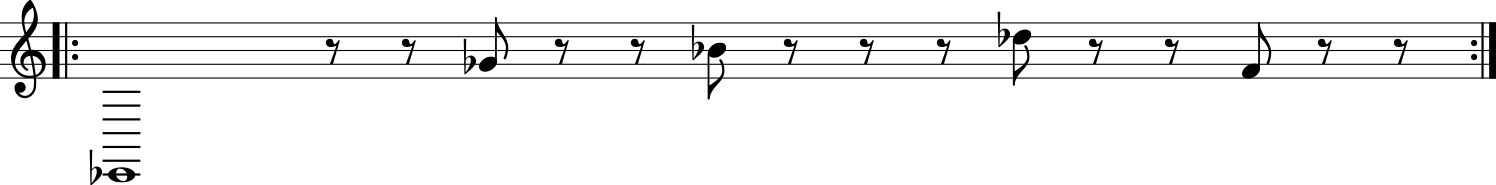

Playing corpus/generated_chords/audio_tensions/min7/Emin7_bossa-nova_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Emin7_bossa-nova_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


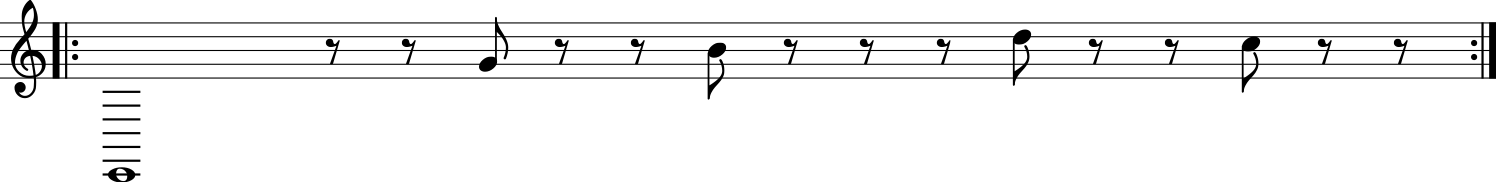

Playing corpus/generated_chords/audio_tensions/min7/Fmin7_bossa-nova_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Fmin7_bossa-nova_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


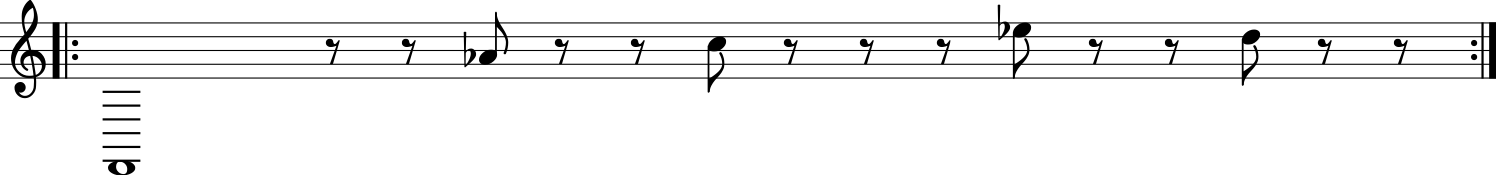

Playing corpus/generated_chords/audio_tensions/min7/Gbmin7_bossa-nova_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gbmin7_bossa-nova_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


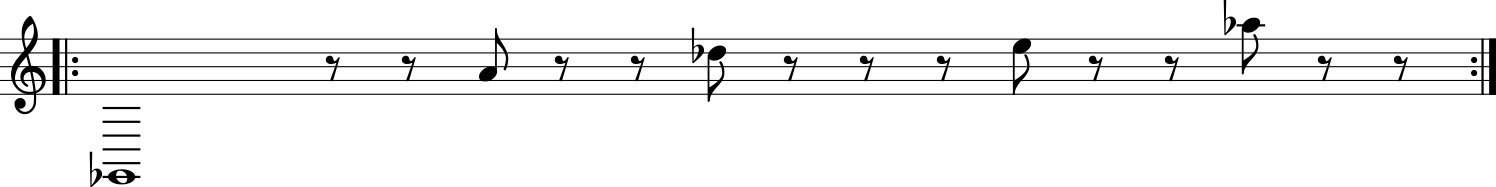

Playing corpus/generated_chords/audio_tensions/min7/Gmin7_bossa-nova_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gmin7_bossa-nova_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


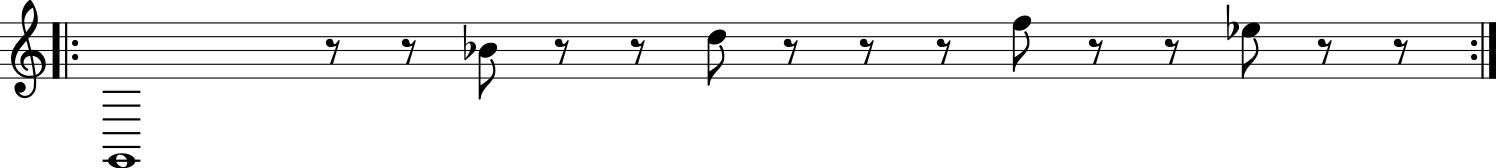

Playing corpus/generated_chords/audio_tensions/min7/Abmin7_bossa-nova_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Abmin7_bossa-nova_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


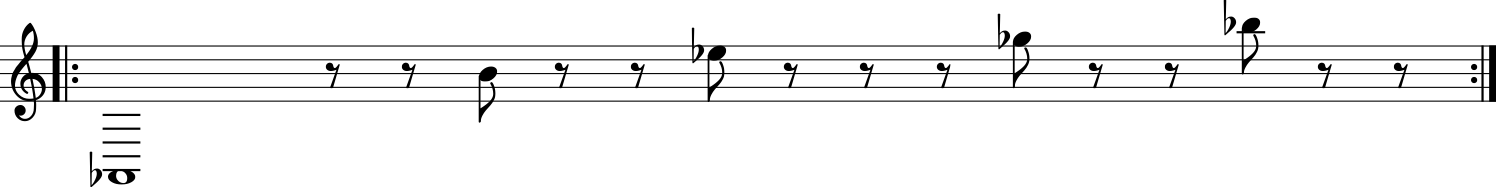

Playing corpus/generated_chords/audio_tensions/min7/Amin7_bossa-nova_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Amin7_bossa-nova_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


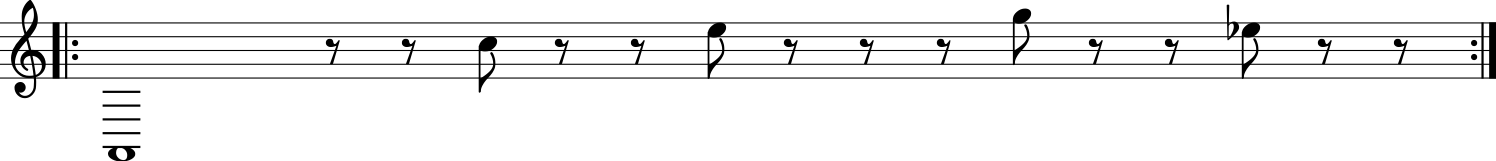

Playing corpus/generated_chords/audio_tensions/min7/Bbmin7_bossa-nova_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bbmin7_bossa-nova_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


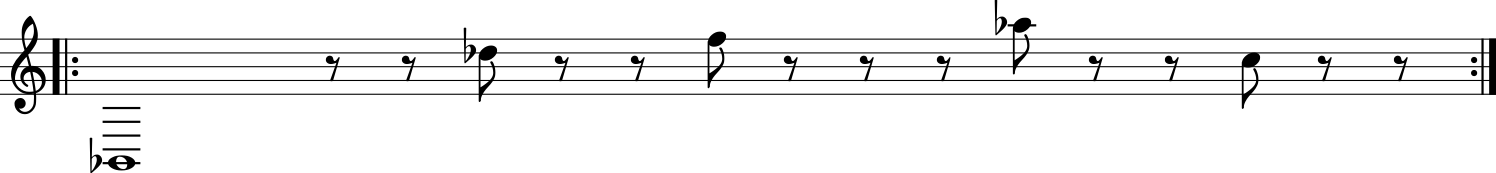

Playing corpus/generated_chords/audio_tensions/min7/Bmin7_bossa-nova_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bmin7_bossa-nova_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


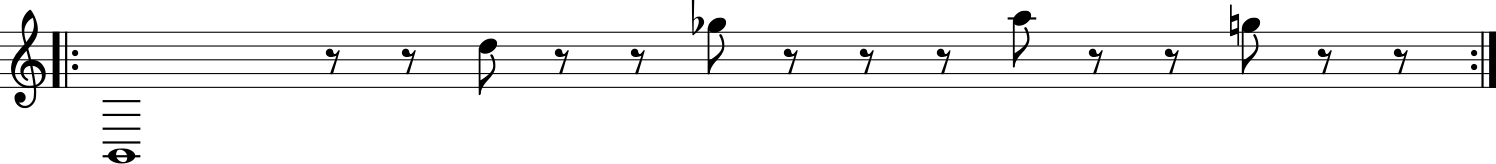

Playing corpus/generated_chords/audio_tensions/min7/Cmin7_bendir_Piano_b13_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Cmin7_bendir_Piano_b13_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


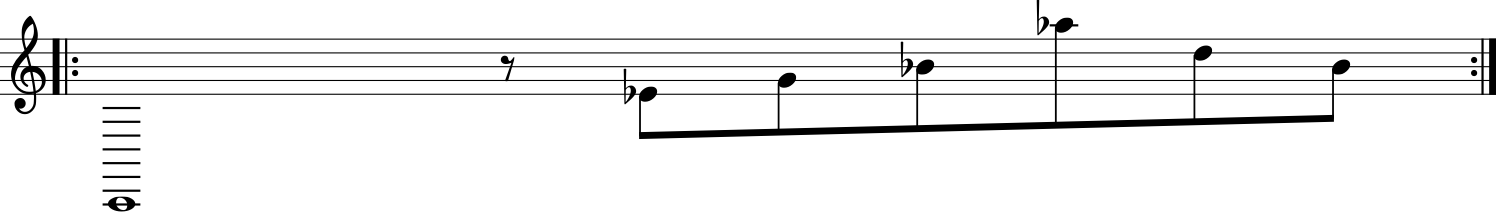

Playing corpus/generated_chords/audio_tensions/min7/Dbmin7_bendir_Piano_11_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dbmin7_bendir_Piano_11_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


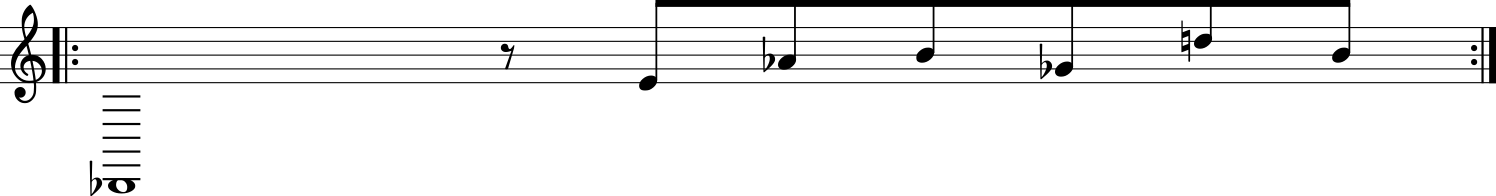

Playing corpus/generated_chords/audio_tensions/min7/Dmin7_bendir_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dmin7_bendir_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


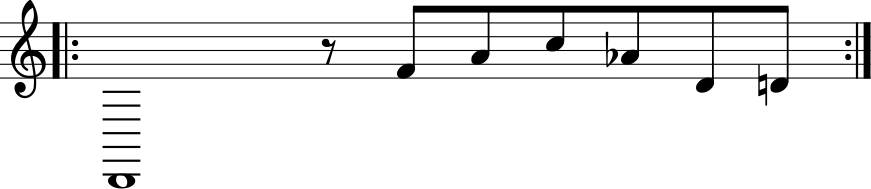

Playing corpus/generated_chords/audio_tensions/min7/Ebmin7_bendir_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Ebmin7_bendir_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


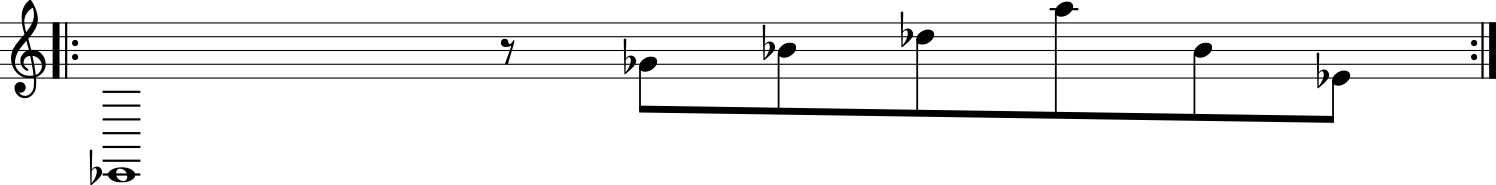

Playing corpus/generated_chords/audio_tensions/min7/Emin7_bendir_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Emin7_bendir_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


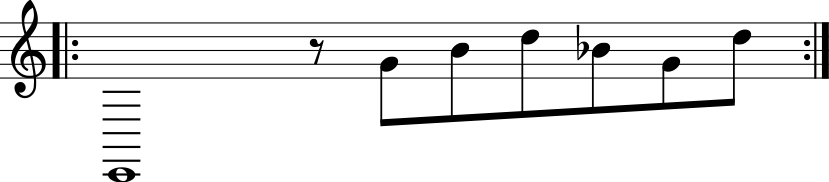

Playing corpus/generated_chords/audio_tensions/min7/Fmin7_bendir_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Fmin7_bendir_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


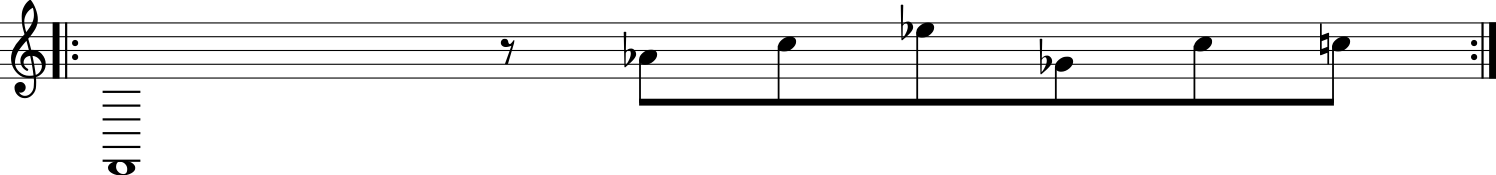

Playing corpus/generated_chords/audio_tensions/min7/Gbmin7_bendir_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gbmin7_bendir_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


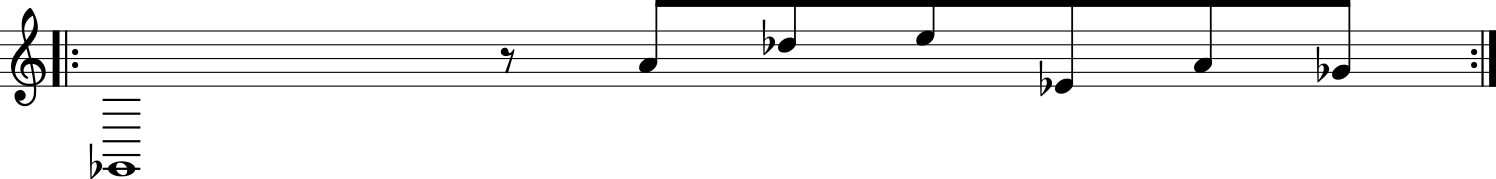

Playing corpus/generated_chords/audio_tensions/min7/Gmin7_bendir_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gmin7_bendir_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


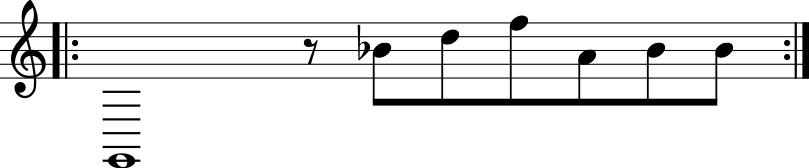

Playing corpus/generated_chords/audio_tensions/min7/Abmin7_bendir_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Abmin7_bendir_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


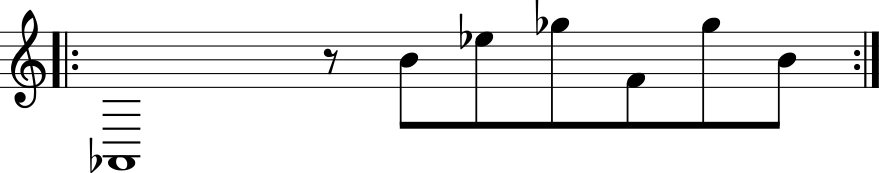

Playing corpus/generated_chords/audio_tensions/min7/Amin7_bendir_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Amin7_bendir_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


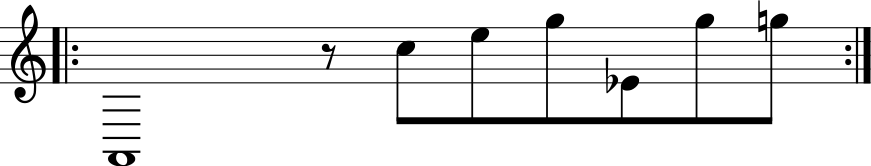

Playing corpus/generated_chords/audio_tensions/min7/Bbmin7_bendir_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bbmin7_bendir_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


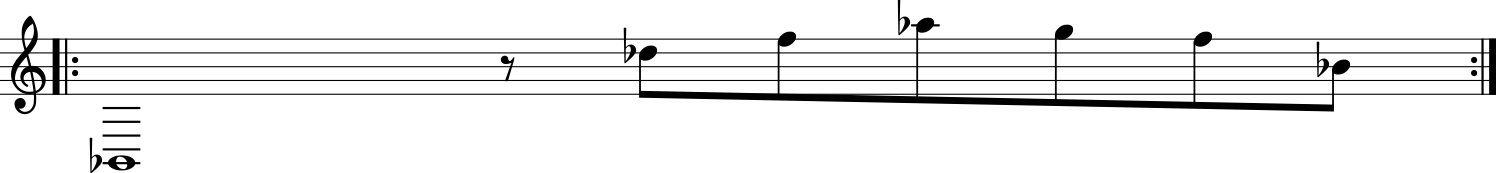

Playing corpus/generated_chords/audio_tensions/min7/Bmin7_bendir_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bmin7_bendir_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~8 seconds
Notes cut: 0
Notes lost totally: 0


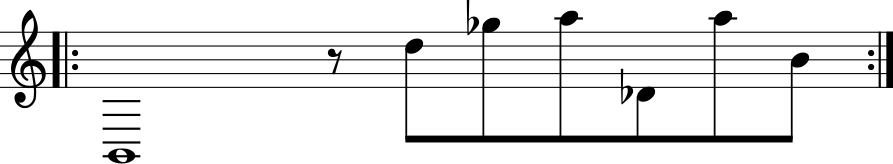

Playing corpus/generated_chords/audio_tensions/min7/Cmin7_mpre_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Cmin7_mpre_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


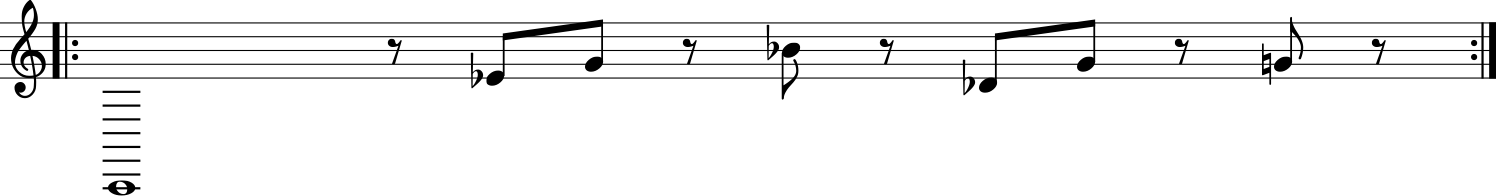

Playing corpus/generated_chords/audio_tensions/min7/Dbmin7_mpre_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dbmin7_mpre_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


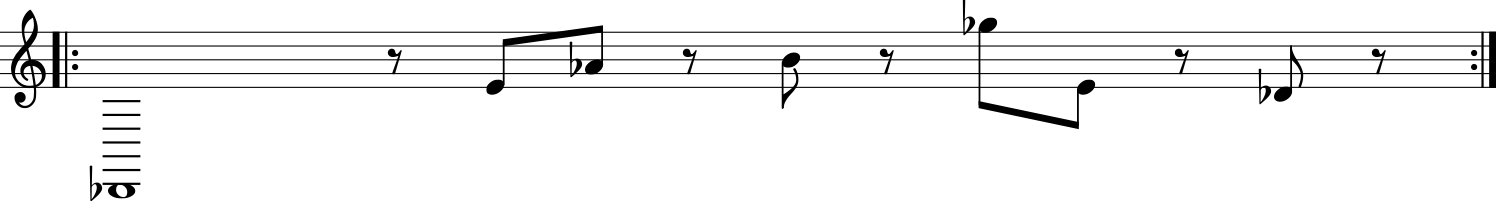

Playing corpus/generated_chords/audio_tensions/min7/Dmin7_mpre_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dmin7_mpre_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


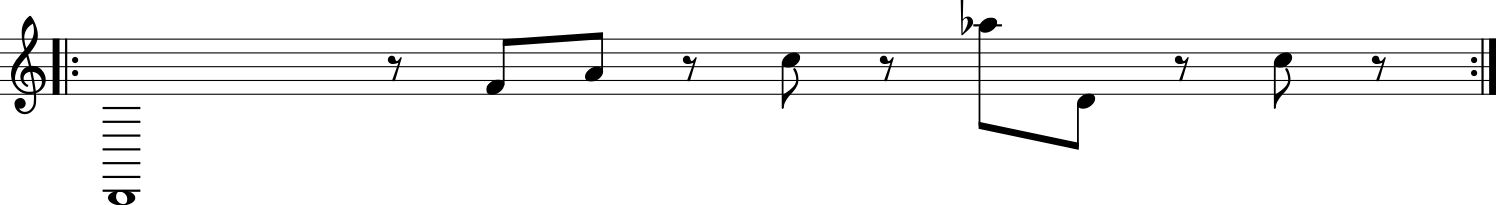

Playing corpus/generated_chords/audio_tensions/min7/Ebmin7_mpre_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Ebmin7_mpre_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


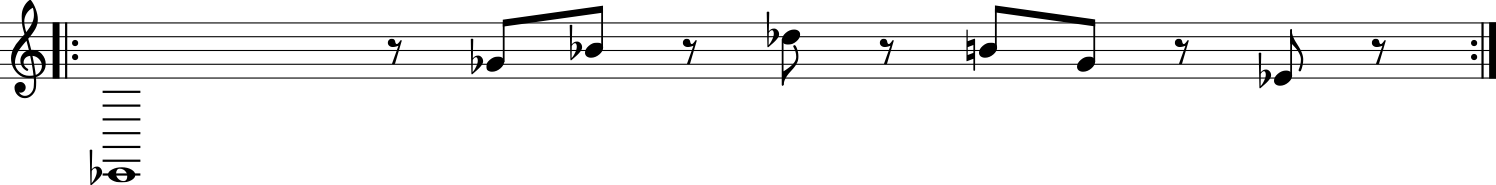

Playing corpus/generated_chords/audio_tensions/min7/Emin7_mpre_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Emin7_mpre_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


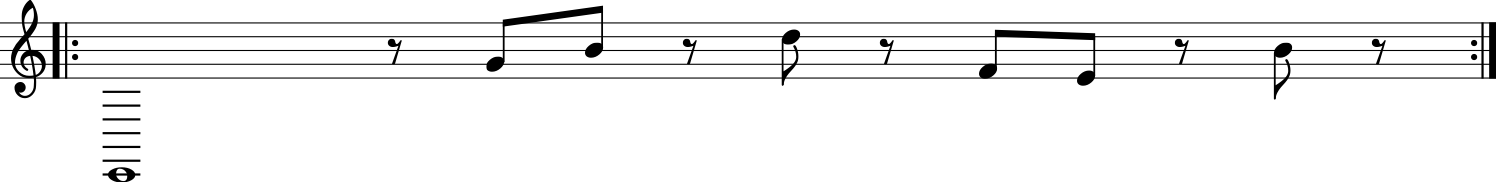

Playing corpus/generated_chords/audio_tensions/min7/Fmin7_mpre_Piano_11_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Fmin7_mpre_Piano_11_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


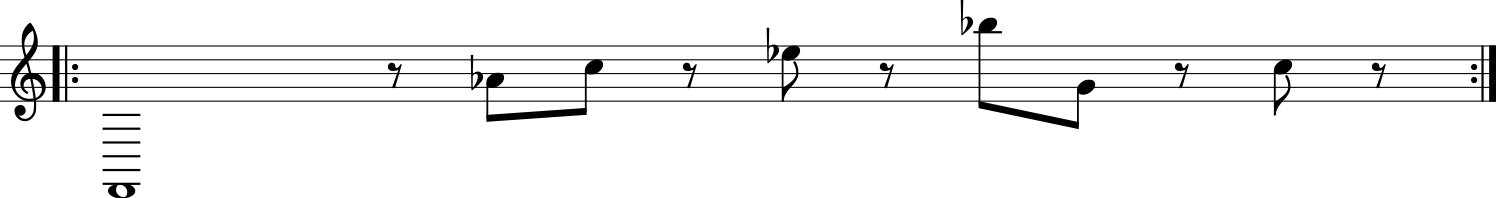

Playing corpus/generated_chords/audio_tensions/min7/Gbmin7_mpre_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gbmin7_mpre_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


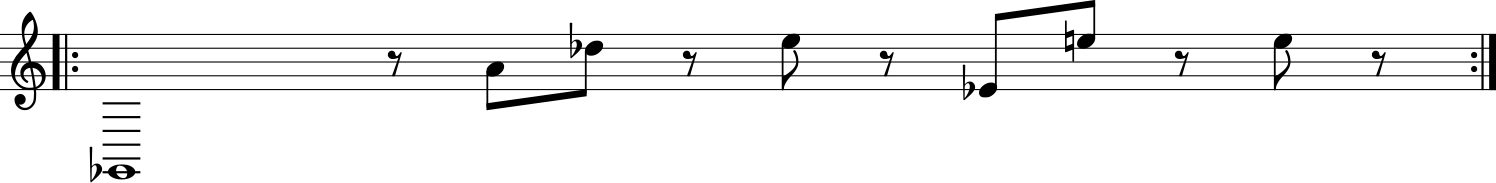

Playing corpus/generated_chords/audio_tensions/min7/Gmin7_mpre_Piano_#11_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gmin7_mpre_Piano_#11_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


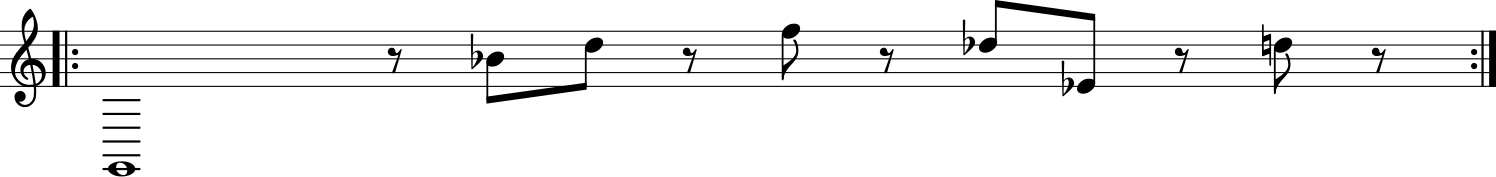

Playing corpus/generated_chords/audio_tensions/min7/Abmin7_mpre_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Abmin7_mpre_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


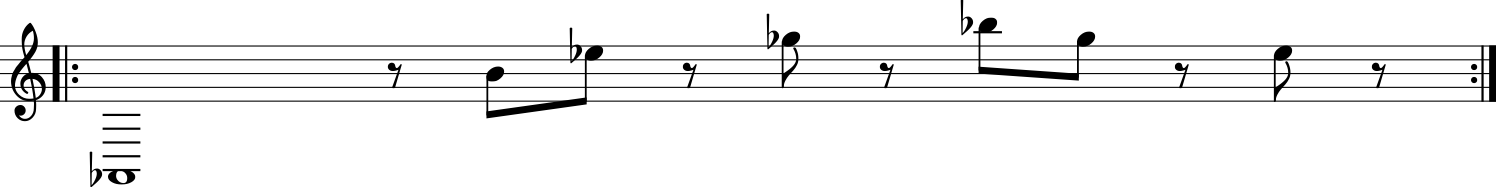

Playing corpus/generated_chords/audio_tensions/min7/Amin7_mpre_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Amin7_mpre_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


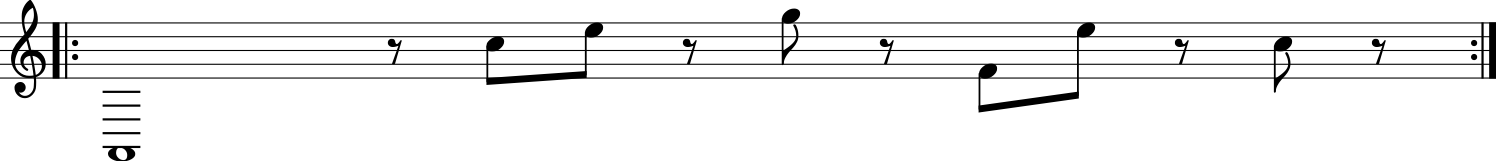

Playing corpus/generated_chords/audio_tensions/min7/Bbmin7_mpre_Piano_b13_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bbmin7_mpre_Piano_b13_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


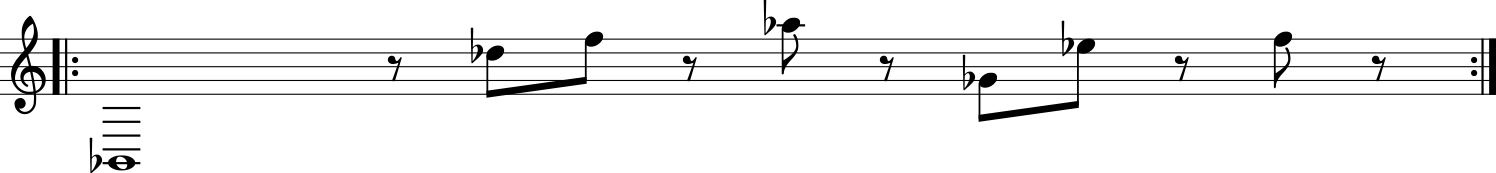

Playing corpus/generated_chords/audio_tensions/min7/Bmin7_mpre_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bmin7_mpre_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~10 seconds
Notes cut: 0
Notes lost totally: 0


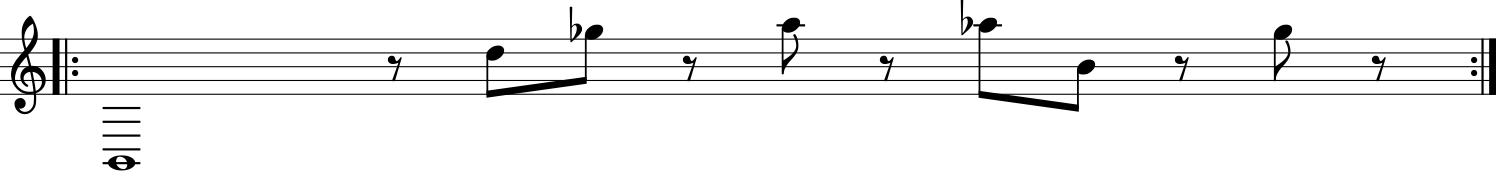

Playing corpus/generated_chords/audio_tensions/min7/Cmin7_samba_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Cmin7_samba_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


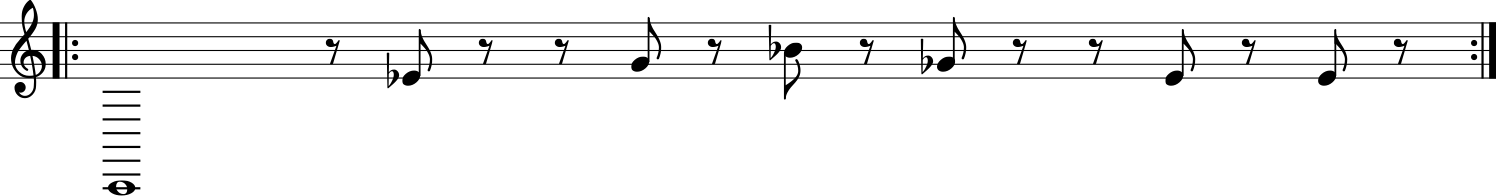

Playing corpus/generated_chords/audio_tensions/min7/Dbmin7_samba_Piano_b13_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dbmin7_samba_Piano_b13_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


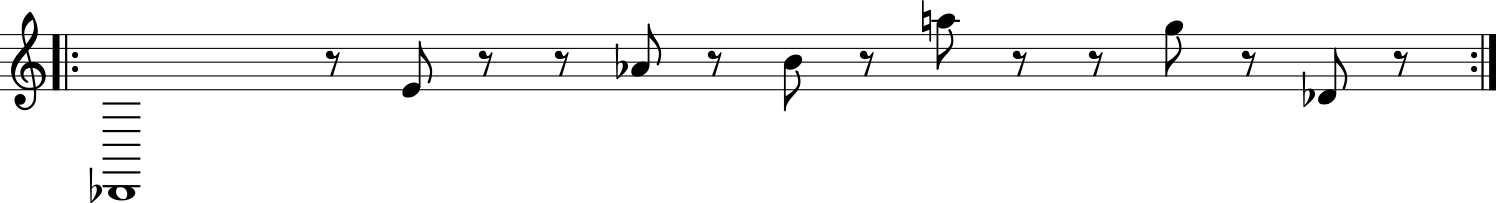

Playing corpus/generated_chords/audio_tensions/min7/Dmin7_samba_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dmin7_samba_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


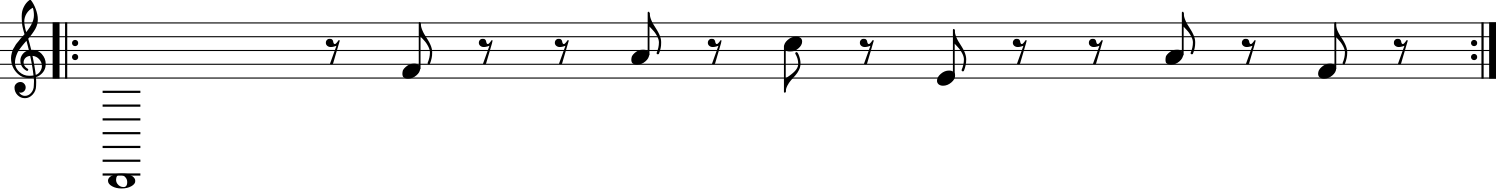

Playing corpus/generated_chords/audio_tensions/min7/Ebmin7_samba_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Ebmin7_samba_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


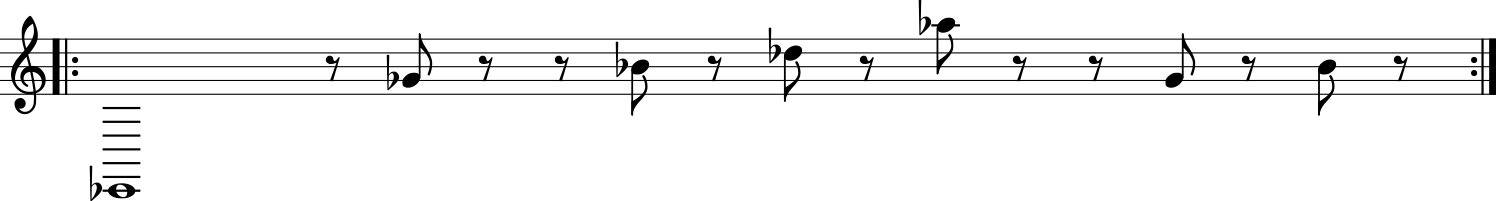

Playing corpus/generated_chords/audio_tensions/min7/Emin7_samba_Piano_13_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Emin7_samba_Piano_13_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


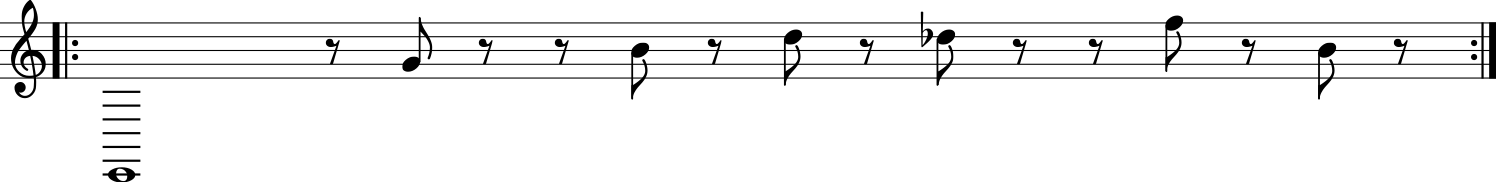

Playing corpus/generated_chords/audio_tensions/min7/Fmin7_samba_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Fmin7_samba_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


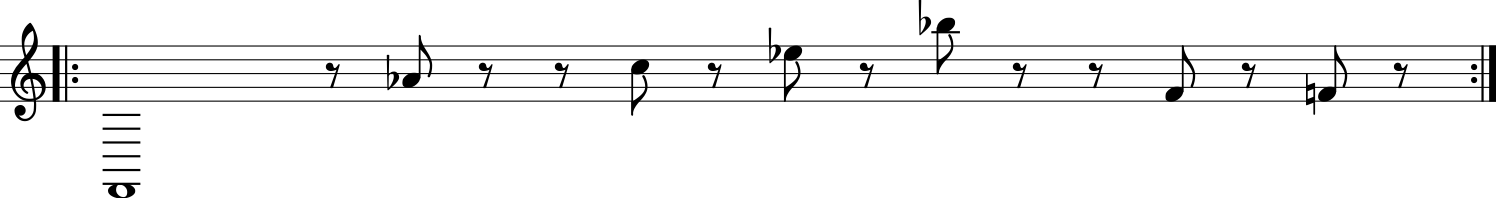

Playing corpus/generated_chords/audio_tensions/min7/Gbmin7_samba_Piano_13_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gbmin7_samba_Piano_13_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


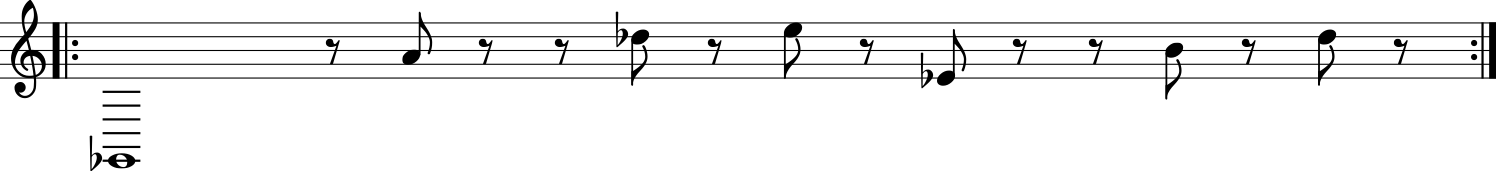

Playing corpus/generated_chords/audio_tensions/min7/Gmin7_samba_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gmin7_samba_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


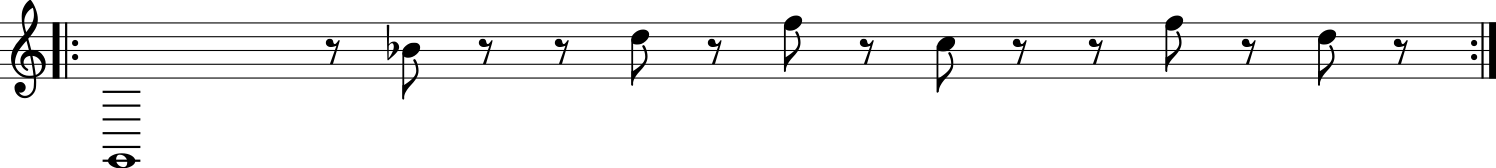

Playing corpus/generated_chords/audio_tensions/min7/Abmin7_samba_Piano_#11_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Abmin7_samba_Piano_#11_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


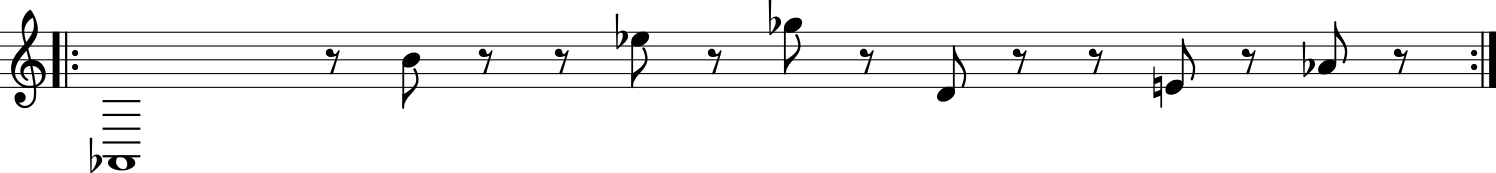

Playing corpus/generated_chords/audio_tensions/min7/Amin7_samba_Piano_#11_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Amin7_samba_Piano_#11_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


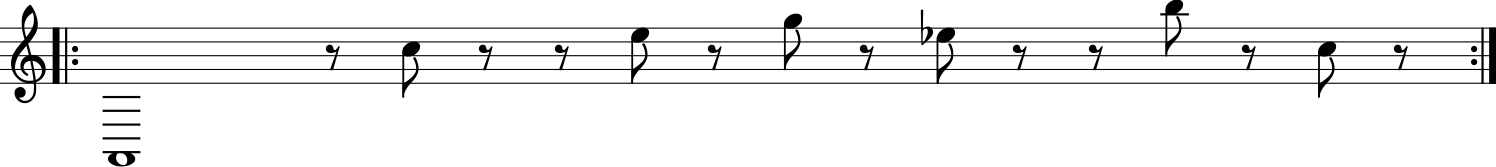

Playing corpus/generated_chords/audio_tensions/min7/Bbmin7_samba_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bbmin7_samba_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


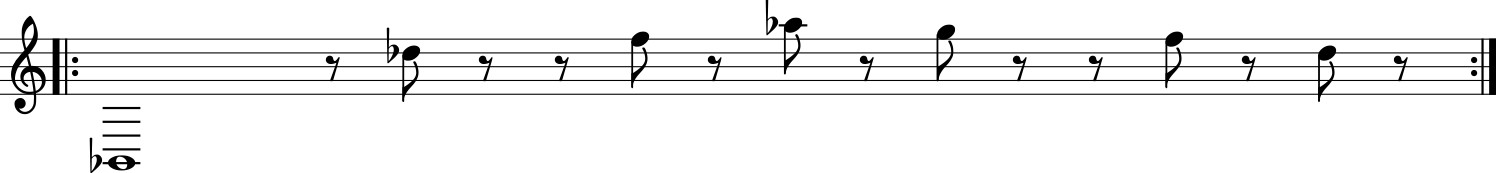

Playing corpus/generated_chords/audio_tensions/min7/Bmin7_samba_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bmin7_samba_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


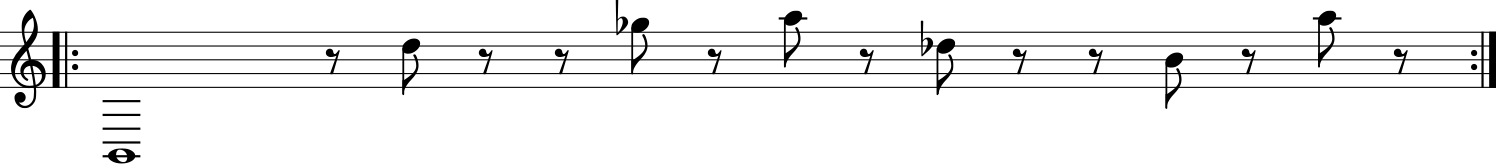

Playing corpus/generated_chords/audio_tensions/min7/Cmin7_agogo-samba_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Cmin7_agogo-samba_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


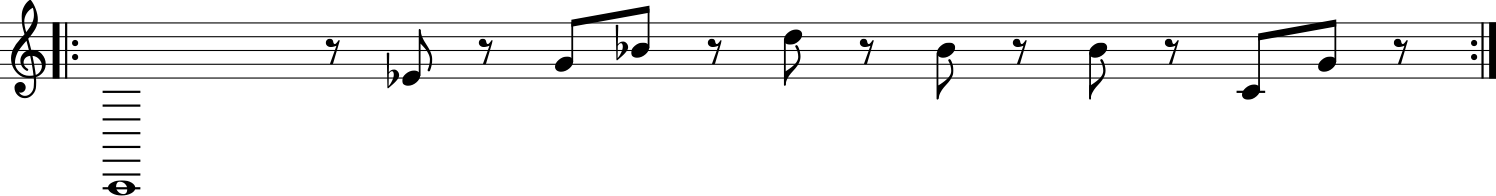

Playing corpus/generated_chords/audio_tensions/min7/Dbmin7_agogo-samba_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dbmin7_agogo-samba_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


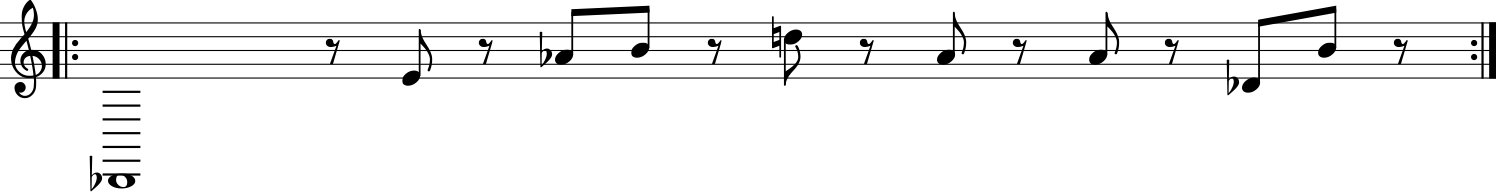

Playing corpus/generated_chords/audio_tensions/min7/Dmin7_agogo-samba_Piano_11_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dmin7_agogo-samba_Piano_11_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


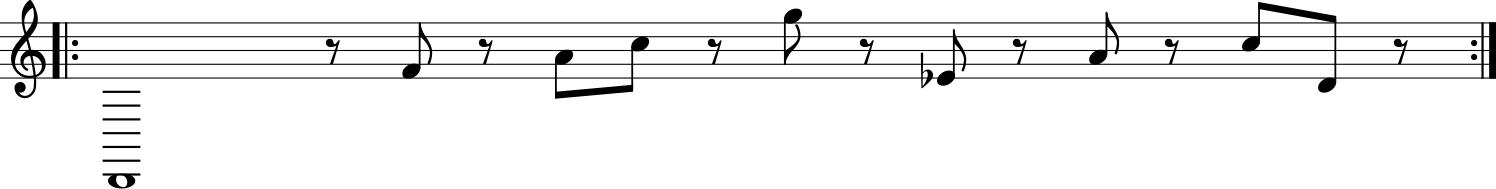

Playing corpus/generated_chords/audio_tensions/min7/Ebmin7_agogo-samba_Piano_b9_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Ebmin7_agogo-samba_Piano_b9_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


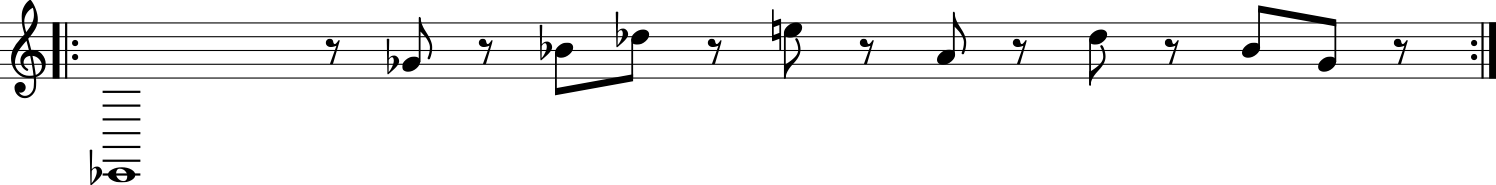

Playing corpus/generated_chords/audio_tensions/min7/Emin7_agogo-samba_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Emin7_agogo-samba_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


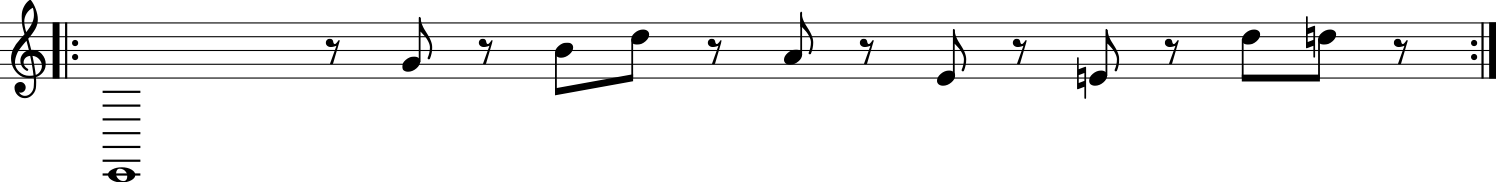

Playing corpus/generated_chords/audio_tensions/min7/Fmin7_agogo-samba_Piano_b13_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Fmin7_agogo-samba_Piano_b13_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


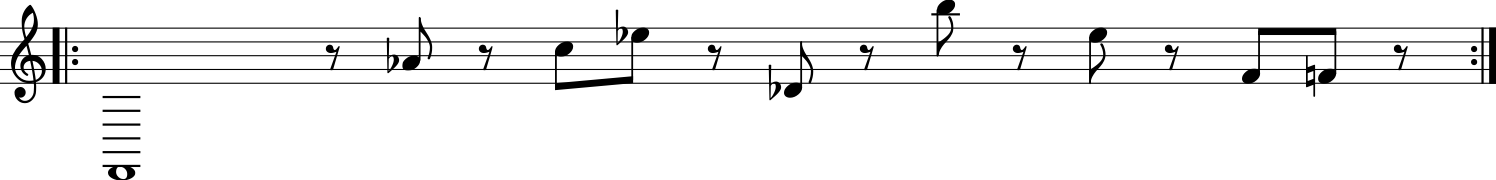

Playing corpus/generated_chords/audio_tensions/min7/Gbmin7_agogo-samba_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gbmin7_agogo-samba_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


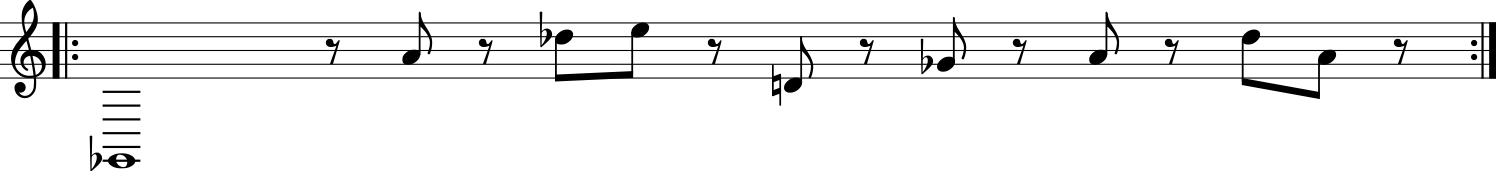

Playing corpus/generated_chords/audio_tensions/min7/Gmin7_agogo-samba_Piano_b9_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gmin7_agogo-samba_Piano_b9_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


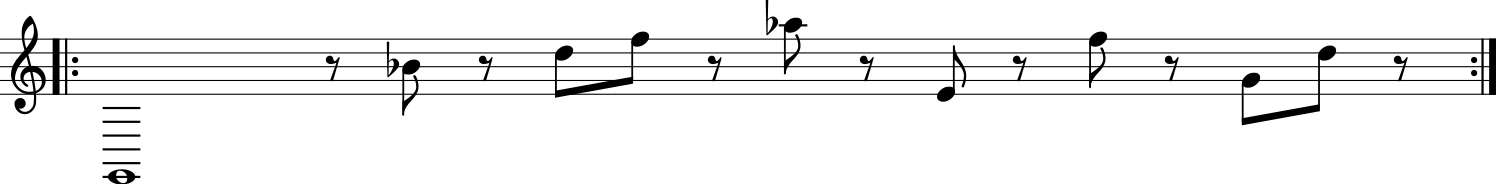

Playing corpus/generated_chords/audio_tensions/min7/Abmin7_agogo-samba_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Abmin7_agogo-samba_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


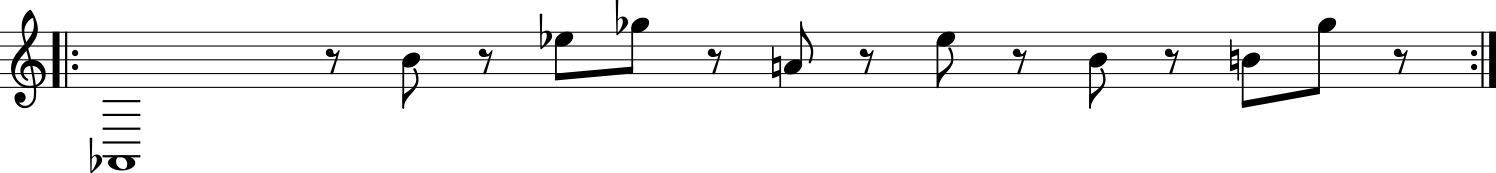

Playing corpus/generated_chords/audio_tensions/min7/Amin7_agogo-samba_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Amin7_agogo-samba_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


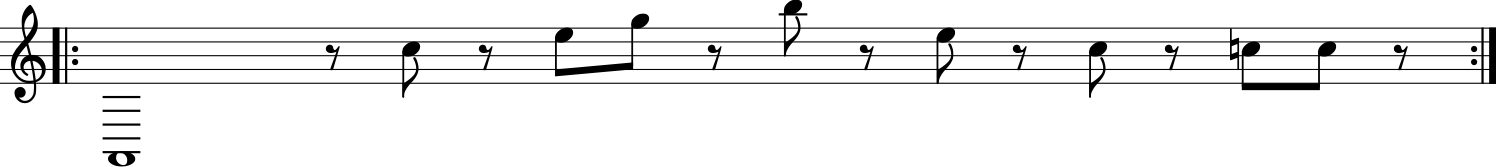

Playing corpus/generated_chords/audio_tensions/min7/Bbmin7_agogo-samba_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bbmin7_agogo-samba_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


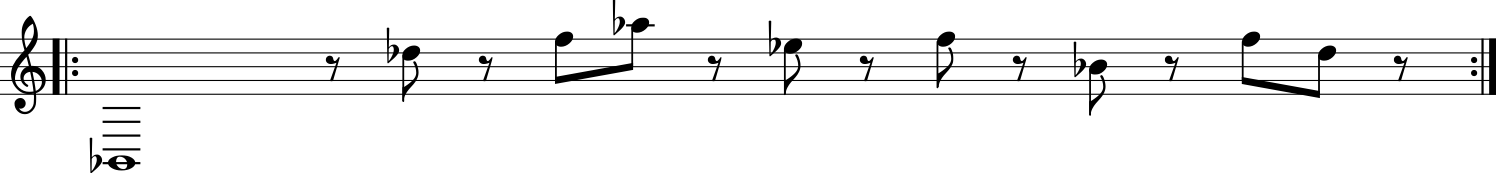

Playing corpus/generated_chords/audio_tensions/min7/Bmin7_agogo-samba_Piano_9_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bmin7_agogo-samba_Piano_9_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


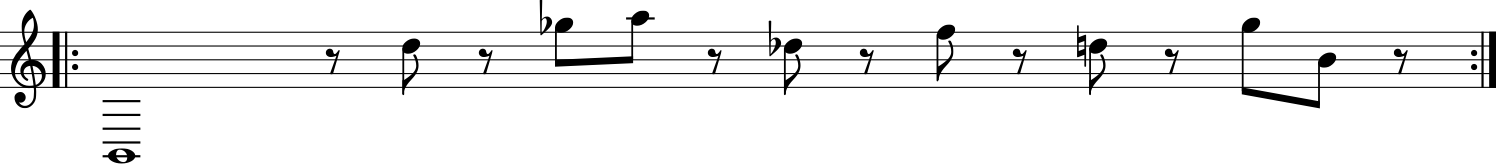

Playing corpus/generated_chords/audio_tensions/min7/Cmin7_ngbaka-maibo_Piano_b13_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Cmin7_ngbaka-maibo_Piano_b13_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


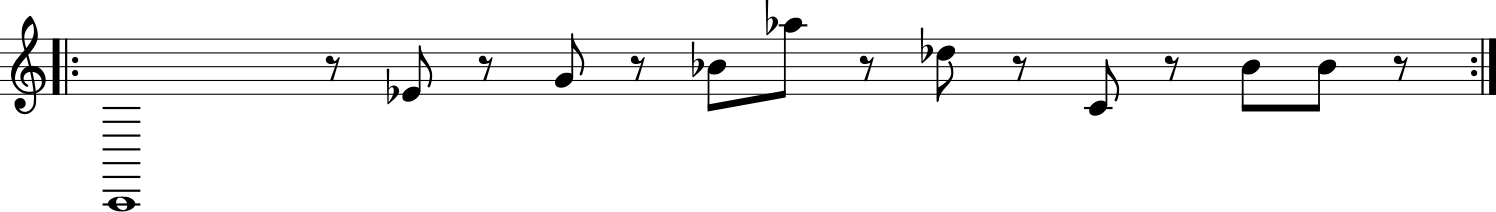

Playing corpus/generated_chords/audio_tensions/min7/Dbmin7_ngbaka-maibo_Piano_b13_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dbmin7_ngbaka-maibo_Piano_b13_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


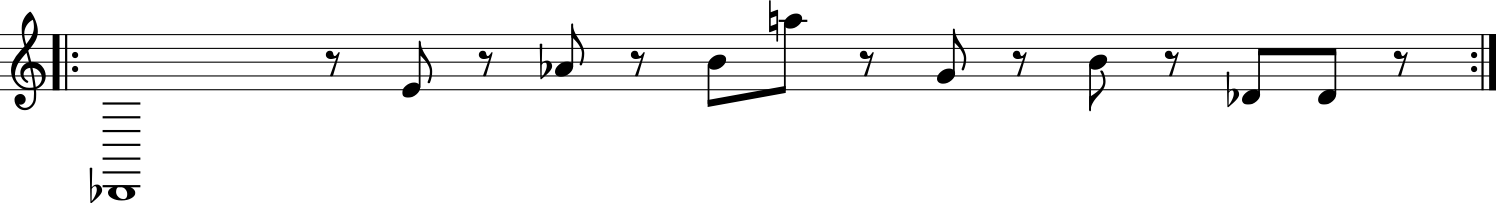

Playing corpus/generated_chords/audio_tensions/min7/Dmin7_ngbaka-maibo_Piano_b9_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dmin7_ngbaka-maibo_Piano_b9_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


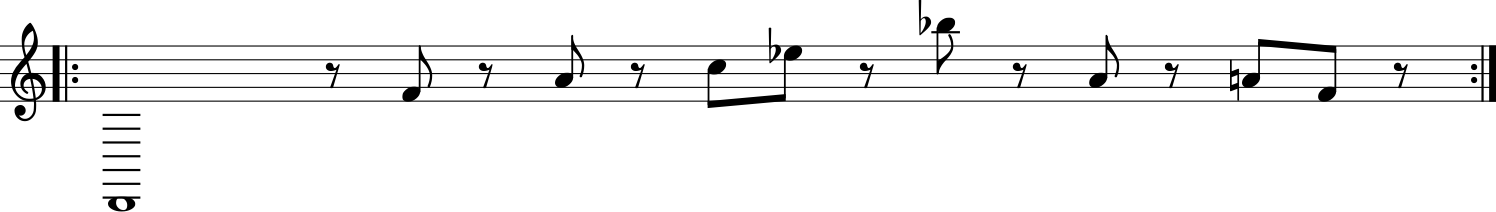

Playing corpus/generated_chords/audio_tensions/min7/Ebmin7_ngbaka-maibo_Piano_#11_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Ebmin7_ngbaka-maibo_Piano_#11_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


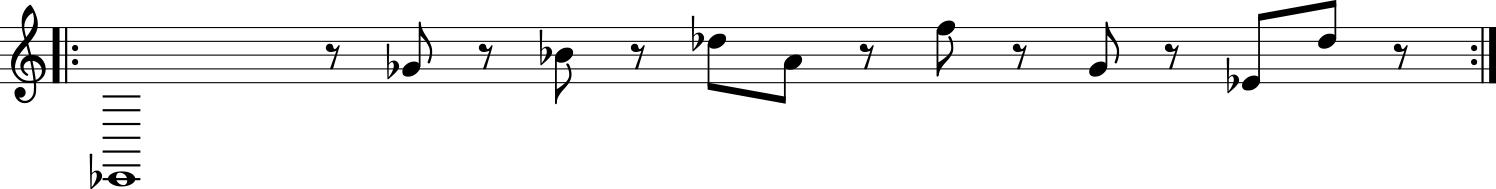

Playing corpus/generated_chords/audio_tensions/min7/Emin7_ngbaka-maibo_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Emin7_ngbaka-maibo_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


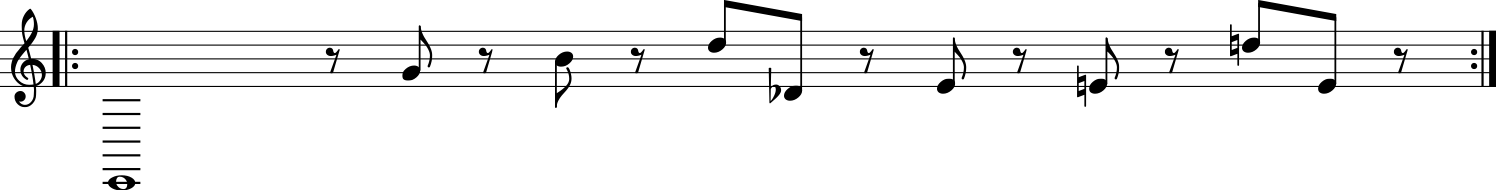

Playing corpus/generated_chords/audio_tensions/min7/Fmin7_ngbaka-maibo_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Fmin7_ngbaka-maibo_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


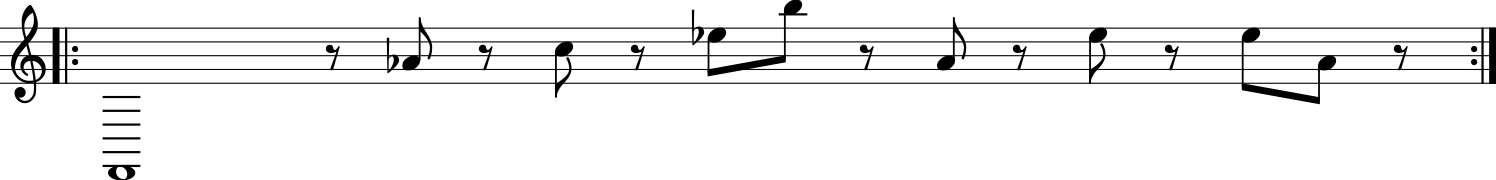

Playing corpus/generated_chords/audio_tensions/min7/Gbmin7_ngbaka-maibo_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gbmin7_ngbaka-maibo_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


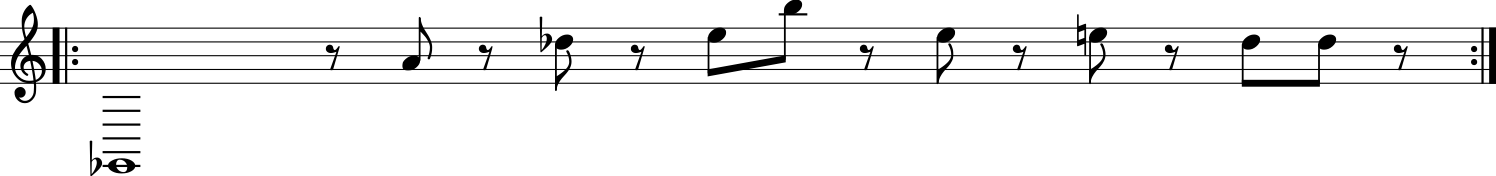

Playing corpus/generated_chords/audio_tensions/min7/Gmin7_ngbaka-maibo_Piano_#11_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gmin7_ngbaka-maibo_Piano_#11_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


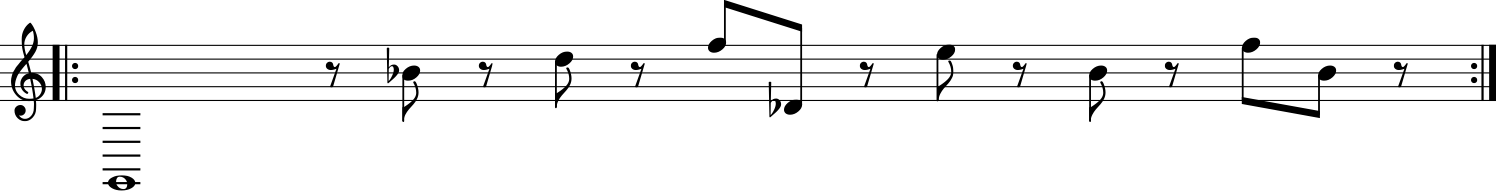

Playing corpus/generated_chords/audio_tensions/min7/Abmin7_ngbaka-maibo_Piano_11_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Abmin7_ngbaka-maibo_Piano_11_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


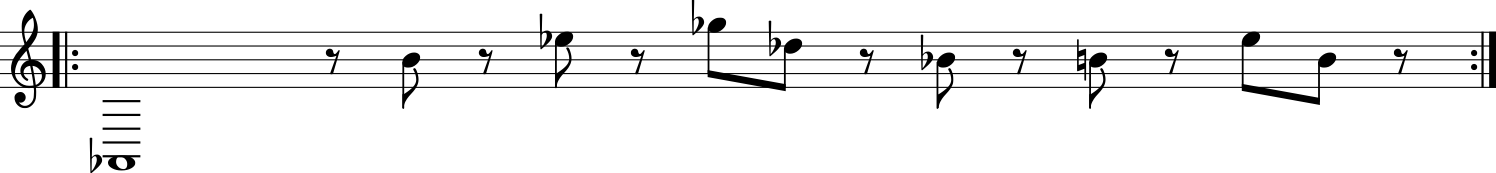

Playing corpus/generated_chords/audio_tensions/min7/Amin7_ngbaka-maibo_Piano_11_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Amin7_ngbaka-maibo_Piano_11_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


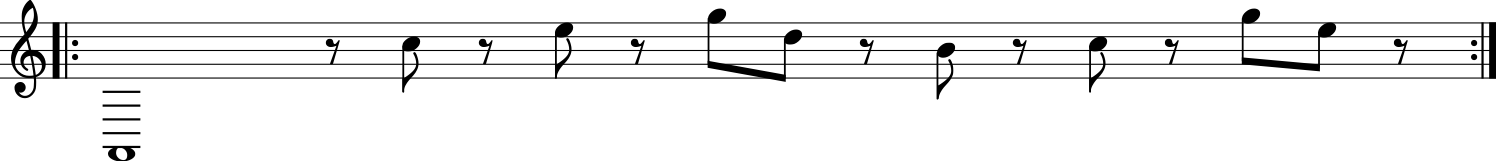

Playing corpus/generated_chords/audio_tensions/min7/Bbmin7_ngbaka-maibo_Piano_b9_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bbmin7_ngbaka-maibo_Piano_b9_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


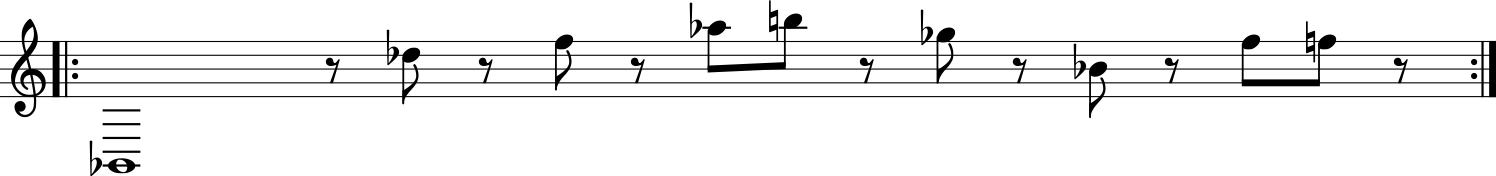

Playing corpus/generated_chords/audio_tensions/min7/Bmin7_ngbaka-maibo_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bmin7_ngbaka-maibo_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~12 seconds
Notes cut: 0
Notes lost totally: 0


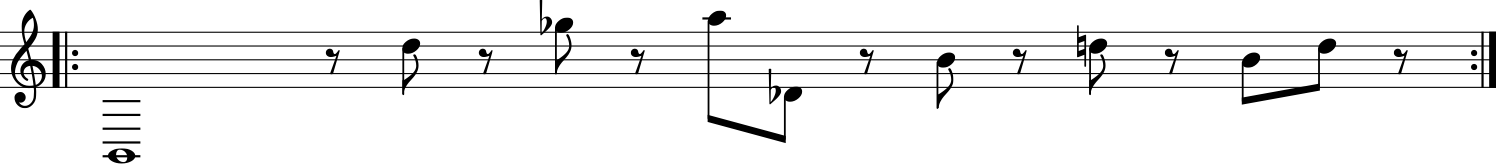

Playing corpus/generated_chords/audio_tensions/min7/Cmin7_aka_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Cmin7_aka_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


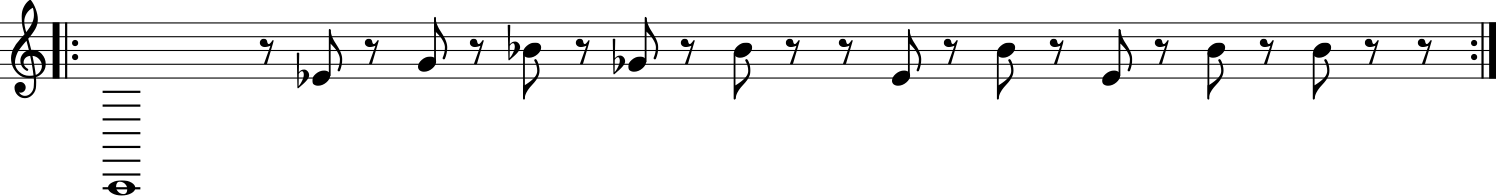

Playing corpus/generated_chords/audio_tensions/min7/Dbmin7_aka_Piano_11_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dbmin7_aka_Piano_11_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


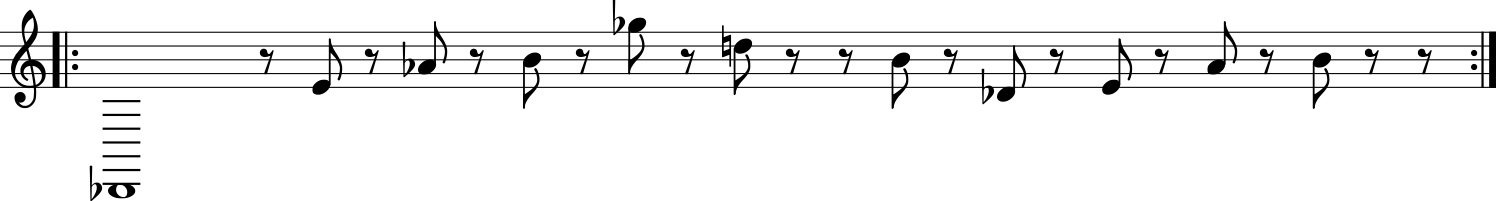

Playing corpus/generated_chords/audio_tensions/min7/Dmin7_aka_Piano_#11_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dmin7_aka_Piano_#11_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


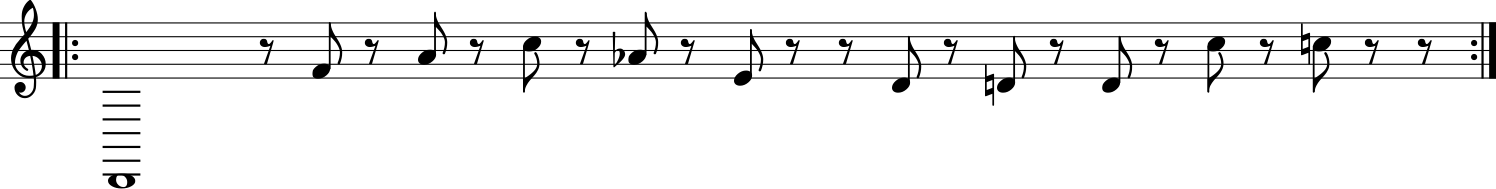

Playing corpus/generated_chords/audio_tensions/min7/Ebmin7_aka_Piano_#11_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Ebmin7_aka_Piano_#11_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


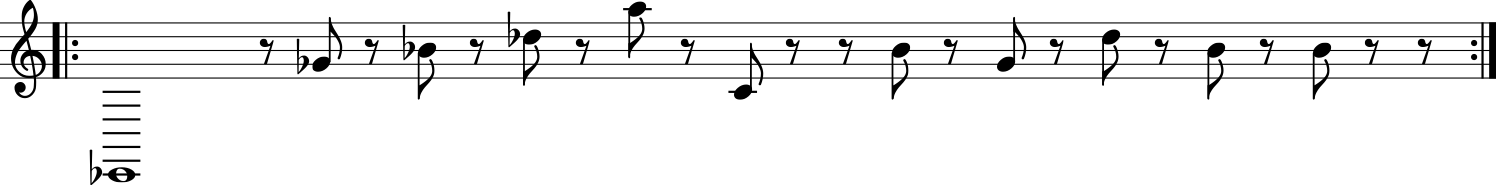

Playing corpus/generated_chords/audio_tensions/min7/Emin7_aka_Piano_9_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Emin7_aka_Piano_9_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


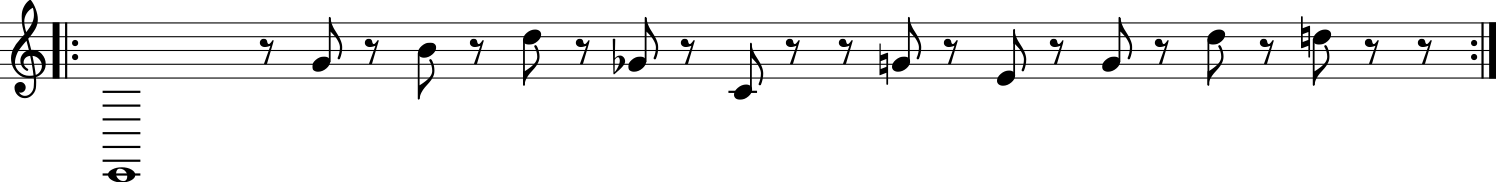

Playing corpus/generated_chords/audio_tensions/min7/Fmin7_aka_Piano_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Fmin7_aka_Piano_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


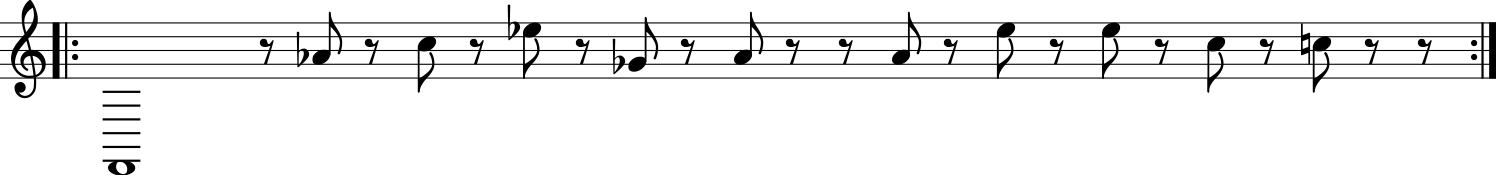

Playing corpus/generated_chords/audio_tensions/min7/Gbmin7_aka_Piano_9_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gbmin7_aka_Piano_9_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


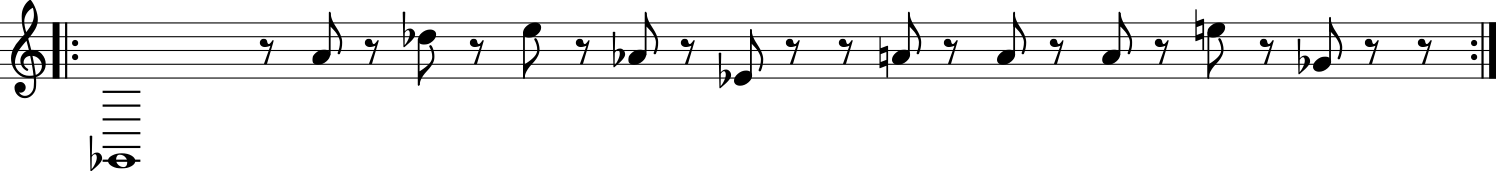

Playing corpus/generated_chords/audio_tensions/min7/Gmin7_aka_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gmin7_aka_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


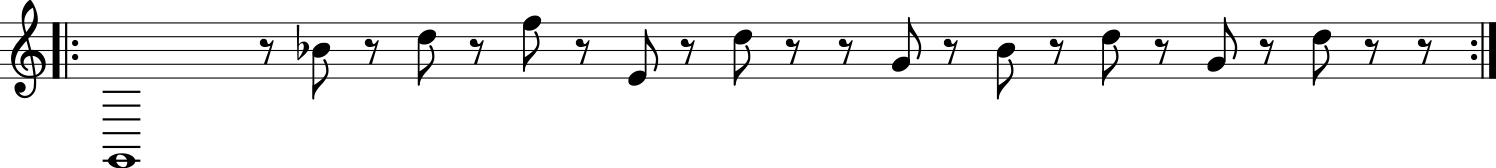

Playing corpus/generated_chords/audio_tensions/min7/Abmin7_aka_Piano_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Abmin7_aka_Piano_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


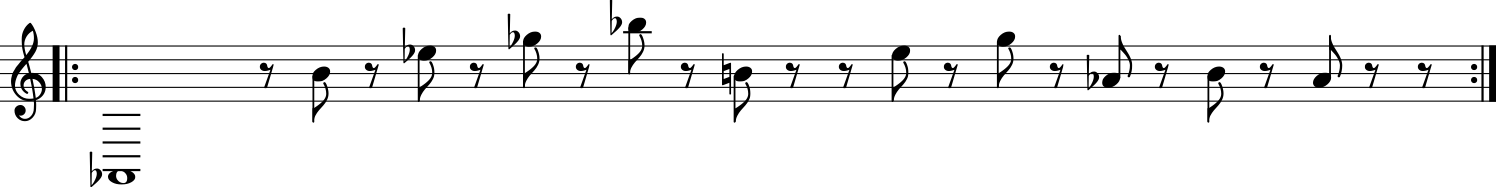

Playing corpus/generated_chords/audio_tensions/min7/Amin7_aka_Piano_b9_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Amin7_aka_Piano_b9_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


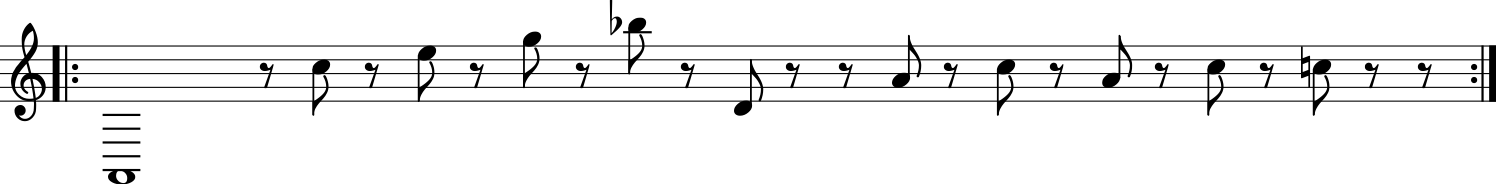

Playing corpus/generated_chords/audio_tensions/min7/Bbmin7_aka_Piano_13_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bbmin7_aka_Piano_13_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


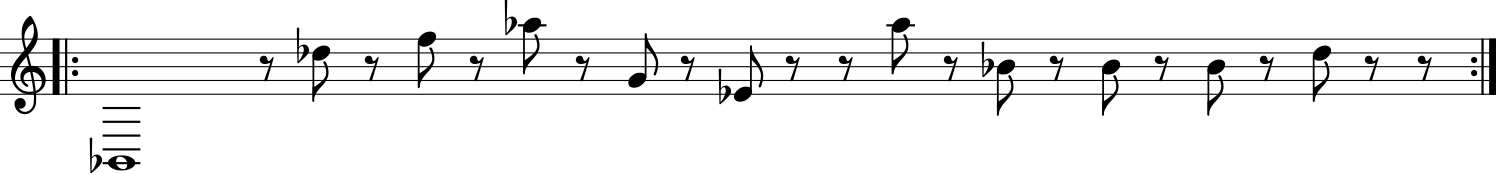

Playing corpus/generated_chords/audio_tensions/min7/Bmin7_aka_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bmin7_aka_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


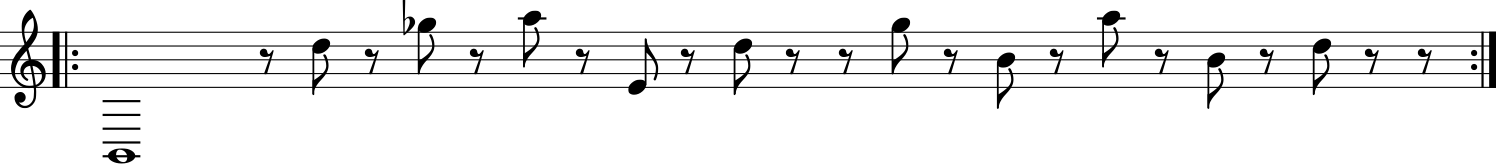

Playing corpus/generated_chords/audio_tensions/min7/Cmin7_aka_upper_sangha_Piano_#11_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Cmin7_aka_upper_sangha_Piano_#11_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


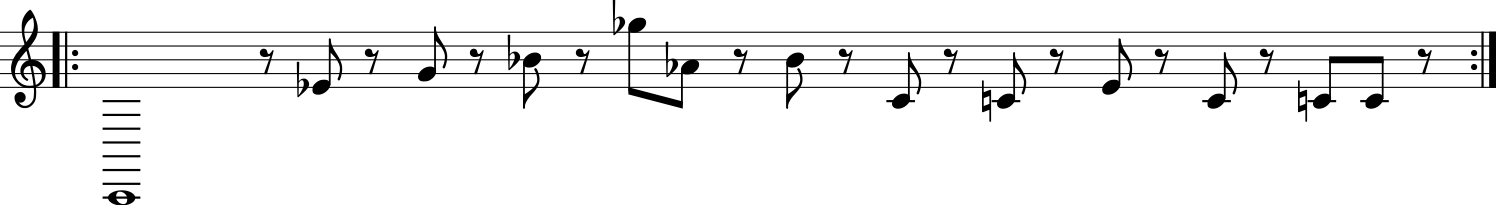

Playing corpus/generated_chords/audio_tensions/min7/Dbmin7_aka_upper_sangha_Piano_9_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dbmin7_aka_upper_sangha_Piano_9_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


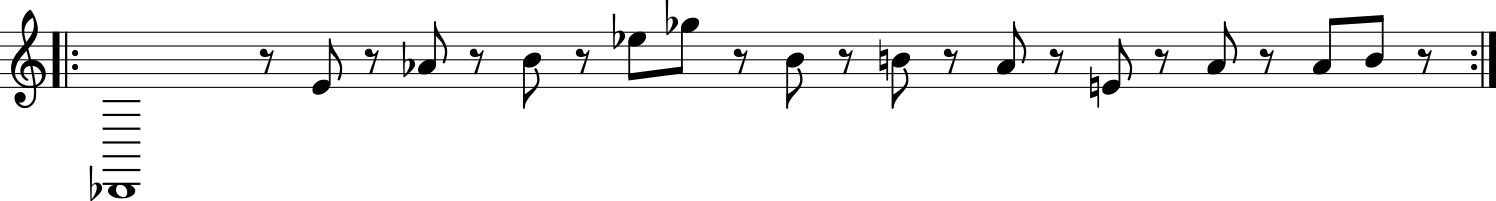

Playing corpus/generated_chords/audio_tensions/min7/Dmin7_aka_upper_sangha_Piano_13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Dmin7_aka_upper_sangha_Piano_13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


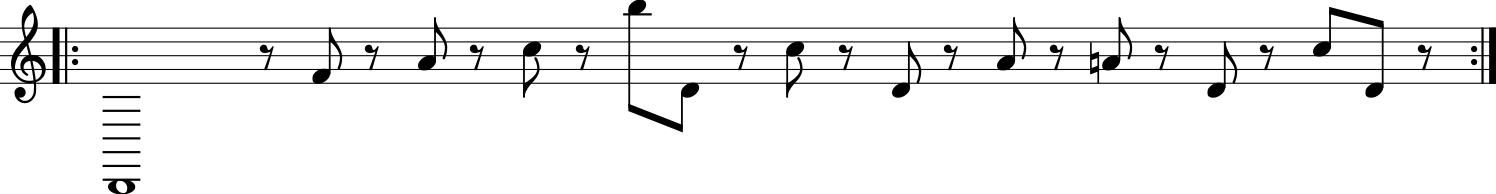

Playing corpus/generated_chords/audio_tensions/min7/Ebmin7_aka_upper_sangha_Piano_b9_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Ebmin7_aka_upper_sangha_Piano_b9_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


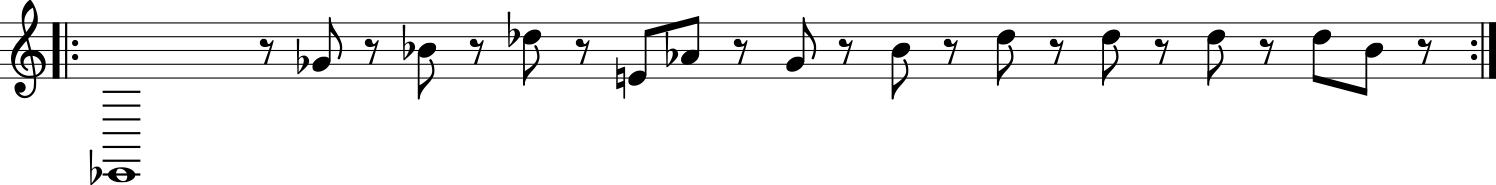

Playing corpus/generated_chords/audio_tensions/min7/Emin7_aka_upper_sangha_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Emin7_aka_upper_sangha_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


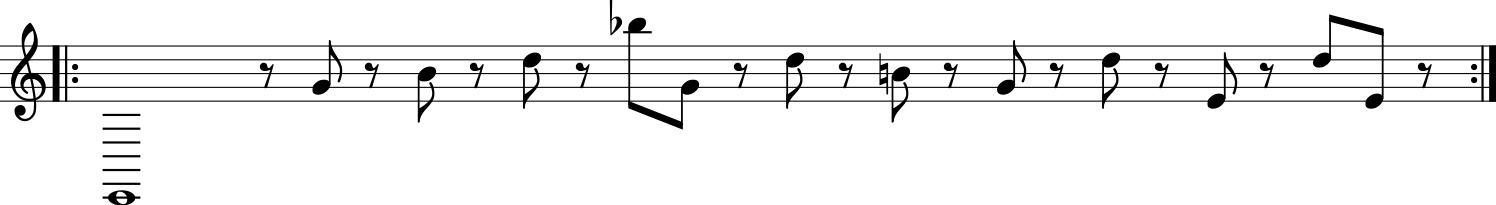

Playing corpus/generated_chords/audio_tensions/min7/Fmin7_aka_upper_sangha_Piano_13_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Fmin7_aka_upper_sangha_Piano_13_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


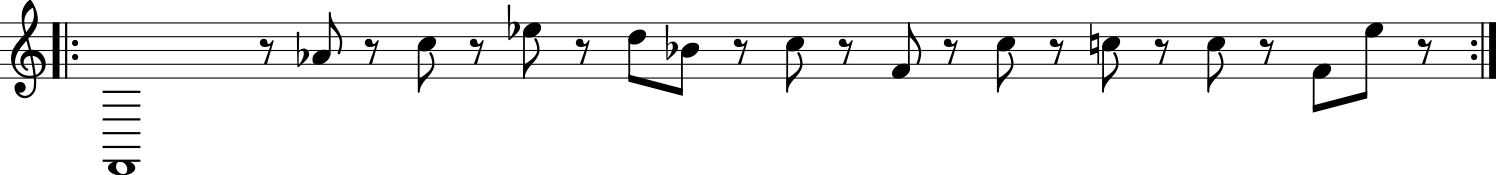

Playing corpus/generated_chords/audio_tensions/min7/Gbmin7_aka_upper_sangha_Piano_#11_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gbmin7_aka_upper_sangha_Piano_#11_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


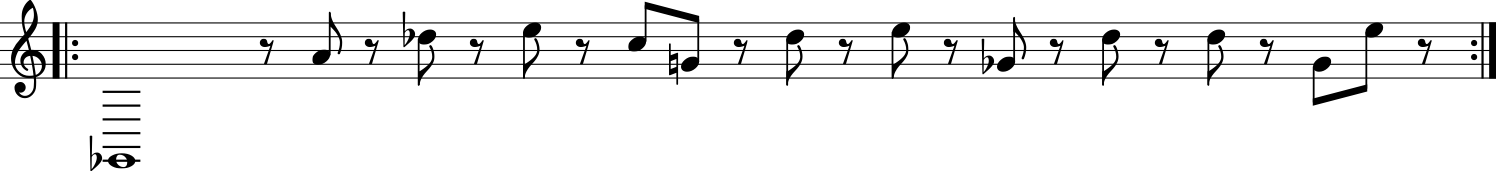

Playing corpus/generated_chords/audio_tensions/min7/Gmin7_aka_upper_sangha_Piano_b13.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Gmin7_aka_upper_sangha_Piano_b13.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


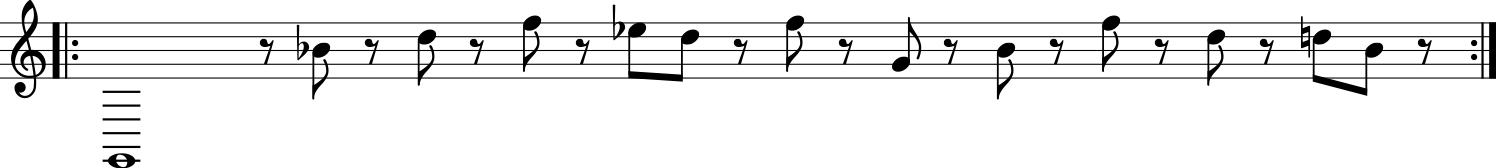

Playing corpus/generated_chords/audio_tensions/min7/Abmin7_aka_upper_sangha_Piano_11_9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Abmin7_aka_upper_sangha_Piano_11_9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


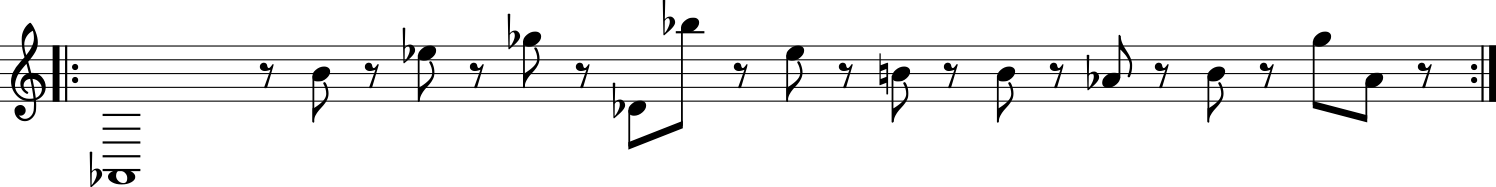

Playing corpus/generated_chords/audio_tensions/min7/Amin7_aka_upper_sangha_Piano_11_b9.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Amin7_aka_upper_sangha_Piano_11_b9.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


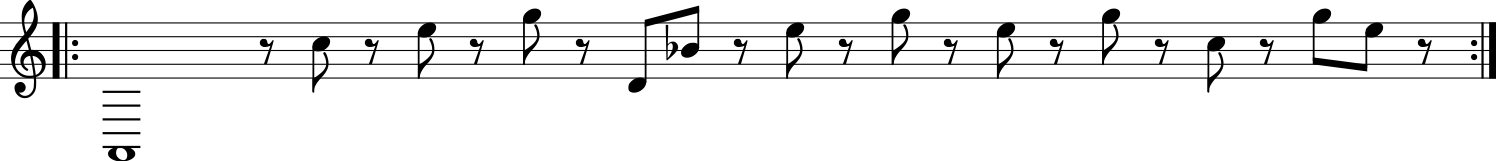

Playing corpus/generated_chords/audio_tensions/min7/Bbmin7_aka_upper_sangha_Piano_11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bbmin7_aka_upper_sangha_Piano_11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


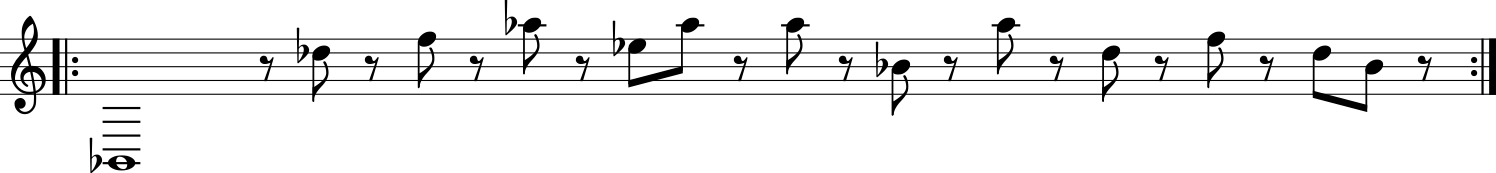

Playing corpus/generated_chords/audio_tensions/min7/Bmin7_aka_upper_sangha_Piano_#11.mid
MIDI file: corpus/generated_chords/audio_tensions/min7/Bmin7_aka_upper_sangha_Piano_#11.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


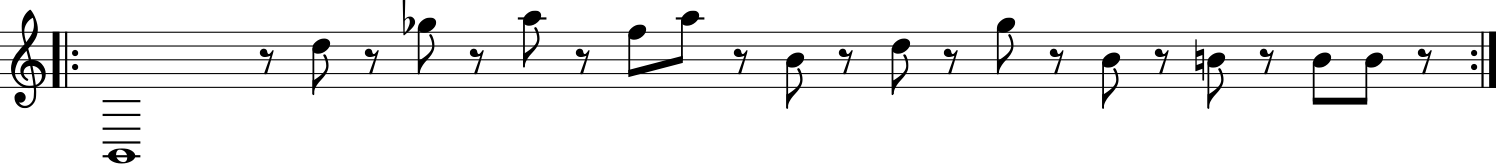

In [88]:
# variando os ritmos dos arpejos
chord_type = 'min7'
for ritmo, n_ataques in ritmos.items():    
    
    # variando a fundamental do acorde
    for i in list(range(12)):
        
        stream_teste = generate.traditional_rhythms[ritmo].get_beat()

        # definindo cada nota do acorde a partir dos intervalos, em semitons
        fundamental = 0 + i
        terca = fundamental + 3
        quinta = fundamental + 7
        setima = fundamental + 10

        # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
        i_C = semitons[fundamental]
        i_E = semitons[terca]
        i_G = semitons[quinta]
        i_B = semitons[setima]


        # criando um dicionário, em que a chave é a distância em semitons do dó e o valor é seu nome, como string
        acorde_dict = {i_C:notes[i_C], 
                       i_E:notes[i_E], 
                       i_G:notes[i_G], 
                       i_B:notes[i_B]}


        # aqui, tratamos a questão das oitavas. terça, quinta e sétima precisam ser sempre mais agudas que a fundamental
        semitom_fundamental = i_C
        for key, value in acorde_dict.items():
            if key < semitom_fundamental:
                acorde_dict[key] = value + '5'

            else:
                acorde_dict[key] = value + '4'

        acorde_list = []
        for key, value in acorde_dict.items():
            acorde_list.append(value)


        # amostrando aleatoriamente as notas que faltam pra completar a quantidade de ataques
        # ex.: se temos 7 ataques no ritmo, amostraremos 7 - 4 = 3 notas
        # obs.: as notas extra precisam ser pertencentes ao acorde em questão
        
        
        # se tivermos exatamente 5 ataques, só podemos ter 1 tensão
        # se tivermos mais do que 5 ataques, podemos ter 1 ou 2 tensões
        if n_ataques == 5:
            n_tensoes = 1
            
            # array de tamanho 1
            tensoes = np.random.choice(tensoes_list, 
                                       size=n_tensoes).tolist()
                
        else:
            n_tensoes = np.random.choice([1, 2], 1)[0]
            # se forem 2 tensões, não pode ser b9 e 9, por ex.
            
            tipos_tensao = np.random.choice(['9', '11', '13'], 
                                            size=n_tensoes, 
                                            replace=False)
            
            # a lista abaixo contem 1 ou 2 elementos, correspondendo a quantidade de semitons da tensão
            # em relação à fundamental
            tensoes = []
            for tipo_tensao in tipos_tensao:
                if tipo_tensao == '9':
                    tensao = np.random.choice(list(dict_9.keys()), 
                                              size=1, 
                                              replace=False)[0]
                    tensoes.append(tensao)
                    
                elif tipo_tensao == '11':
                    tensao = np.random.choice(list(dict_11.keys()), 
                                              size=1, 
                                              replace=False)[0]
                    tensoes.append(tensao)
                    
                else:
                    tensao = np.random.choice(list(dict_13.keys()), 
                                              size=1, 
                                              replace=False)[0]
                    tensoes.append(tensao)
            
        
        
#         print(tensoes)
        
        # criando um dicionário em que a chave é a quantidade de semitons da nota de tensão 
        # (ex.: se a tensão for b9 e a fundamental for D, a chave será 3, correspondendo ao Eb)
        # e o valor é o nome da nota de tensão no caso da fundamental em questão. no mesmo exemplo acima, o valor
        # seria Eb.
        
        
        nomes_tensoes = []
        notas_tensoes = []
        
        for tensao in tensoes:
            nota_tensao = tensao + i 
            i_tensao = semitons[nota_tensao]
            
            oitava_tensao = np.random.choice(['4', '5'], size=1)[0]
            
            # refletindo sobre se encararia, por exemplo, um 13 como 13 mesmo ou como 6 (pela oitava)
            # aí decidi alternar. a oitava da tensão é escolhida aleatoriamente entre 4 ou 5
             
            notas_tensoes.append(notes[i_tensao] + oitava_tensao)
            nomes_tensoes.append(dict_tensoes[tensao])
            
        
        
        if n_tensoes == 1:
            str_tensoes = nomes_tensoes[0]
            
        else:
            str_tensoes = nomes_tensoes[0] + '_' + nomes_tensoes[1]
        
        
        
#         print(notas_tensoes,'|' ,'fundamental:', notes[i_C])
            
        # ----------------------------------------------------
        

        notas_extra = np.random.choice(acorde_list, 
                                       size=n_ataques - 4 - n_tensoes, 
                                       replace=True)
        
        acorde_list.extend(notas_tensoes)
        acorde_list.extend(notas_extra)
        
#         print('fundamental:', notes[i_C], acorde_list)



        # Flavio pediu pra fundamental durar o compasso todo
        durations = []
        for element in stream_teste[0]:
            durations.append(element.duration.quarterLength)

        duration_fund = sum(durations)



        # alterando as notas do nosso stream, para serem iguais às notas do acorde
        counter = 0
        for element in stream_teste[0]:
            if type(element) == music21.note.Note:

                nota_nova = acorde_list[counter]

                note_name = nota_nova[0] 
                note_octave = nota_nova[-1]

                element.step = note_name
                element.pitch.octave = note_octave

                # tratando o problema com bemóis
                if 'b' in nota_nova:
                    element.pitch.accidental = '-'
#                     print(nota_nova, element.step, element.pitch.accidental)

                else:            
                    element.pitch.accidental = 'natural'
#                     print(nota_nova, element.step)

                # fundamental deve durar o compasso todo e soar na oitava 2
                if counter == 0:
                    element.duration = music21.duration.Duration(duration_fund)
                    element.pitch.octave = 2


                counter += 1

#         stream_teste.show('midi')
        
        output_file = 'corpus/generated_chords/audio_tensions/{}/{}{}_{}_Piano_{}.mid'.format(chord_type, 
                                                                                     notes[i], 
                                                                                     chord_type, 
                                                                                     ritmo,
                                                                                     str_tensoes)
        
        stream_teste.write('midi', output_file)
        output_file_name = output_file.split('.mid')[0]
    
    
        !timidity {output_file_name}.mid -Ow -o {output_file_name}.wav
        
        stream_teste.show()

## Acordes <font color ='green'> diminutos </font>

Questão estruturante: acordes diminutos e meio diminutos têm tensões?

In [ ]:
# variando os ritmos dos arpejos
chord_type = 'dim'
for ritmo, n_ataques in ritmos.items():    
    
    # variando a fundamental do acorde
    for i in list(range(12)):
        
        stream_teste = generate.traditional_rhythms[ritmo].get_beat()

        # definindo cada nota do acorde a partir dos intervalos, em semitons
        fundamental = 0 + i
        terca = fundamental + 3
        quinta = fundamental + 6
        setima = fundamental + 9
        

        # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
        i_C = semitons[fundamental]
        i_E = semitons[terca]
        i_G = semitons[quinta]
        i_B = semitons[setima]


        # criando um dicionário, em que a chave é a distância em semitons do dó e o valor é seu nome, como string
        acorde_dict = {i_C:notes[i_C], 
                       i_E:notes[i_E], 
                       i_G:notes[i_G], 
                       i_B:notes[i_B]}


        # aqui, tratamos a questão das oitavas. terça, quinta e sétima precisam ser sempre mais agudas que a fundamental
        semitom_fundamental = i_C
        for key, value in acorde_dict.items():
            if key < semitom_fundamental:
                acorde_dict[key] = value + '5'

            else:
                acorde_dict[key] = value + '4'

        acorde_list = []
        for key, value in acorde_dict.items():
            acorde_list.append(value)


        # amostrando aleatoriamente as notas que faltam pra completar a quantidade de ataques
        # ex.: se temos 7 ataques no ritmo, amostraremos 7 - 4 = 3 notas
        # obs.: as notas extra precisam ser pertencentes ao acorde em questão
        
        
        # se tivermos exatamente 5 ataques, só podemos ter 1 tensão
        # se tivermos mais do que 5 ataques, podemos ter 1 ou 2 tensões
        if n_ataques == 5:
            n_tensoes = 1
            
            # array de tamanho 1
            tensoes = np.random.choice(tensoes_list, 
                                       size=n_tensoes).tolist()
                
        else:
            n_tensoes = np.random.choice([1, 2], 1)[0]
            # se forem 2 tensões, não pode ser b9 e 9, por ex.
            
            tipos_tensao = np.random.choice(['9', '11', '13'], 
                                            size=n_tensoes, 
                                            replace=False)
            
            # a lista abaixo contem 1 ou 2 elementos, correspondendo a quantidade de semitons da tensão
            # em relação à fundamental
            tensoes = []
            for tipo_tensao in tipos_tensao:
                if tipo_tensao == '9':
                    tensao = np.random.choice(list(dict_9.keys()), 
                                              size=1, 
                                              replace=False)[0]
                    tensoes.append(tensao)
                    
                elif tipo_tensao == '11':
                    tensao = np.random.choice(list(dict_11.keys()), 
                                              size=1, 
                                              replace=False)[0]
                    tensoes.append(tensao)
                    
                else:
                    tensao = np.random.choice(list(dict_13.keys()), 
                                              size=1, 
                                              replace=False)[0]
                    tensoes.append(tensao)
            
        
        
#         print(tensoes)
        
        # criando um dicionário em que a chave é a quantidade de semitons da nota de tensão 
        # (ex.: se a tensão for b9 e a fundamental for D, a chave será 3, correspondendo ao Eb)
        # e o valor é o nome da nota de tensão no caso da fundamental em questão. no mesmo exemplo acima, o valor
        # seria Eb.
        
        
        nomes_tensoes = []
        notas_tensoes = []
        
        for tensao in tensoes:
            nota_tensao = tensao + i 
            i_tensao = semitons[nota_tensao]
            
            oitava_tensao = np.random.choice(['4', '5'], size=1)[0]
            
            # refletindo sobre se encararia, por exemplo, um 13 como 13 mesmo ou como 6 (pela oitava)
            # aí decidi alternar. a oitava da tensão é escolhida aleatoriamente entre 4 ou 5
             
            notas_tensoes.append(notes[i_tensao] + oitava_tensao)
            nomes_tensoes.append(dict_tensoes[tensao])
            
        
        
        if n_tensoes == 1:
            str_tensoes = nomes_tensoes[0]
            
        else:
            str_tensoes = nomes_tensoes[0] + '_' + nomes_tensoes[1]
        
        
        
#         print(notas_tensoes,'|' ,'fundamental:', notes[i_C])
            
        # ----------------------------------------------------
        

        notas_extra = np.random.choice(acorde_list, 
                                       size=n_ataques - 4 - n_tensoes, 
                                       replace=True)
        
        acorde_list.extend(notas_tensoes)
        acorde_list.extend(notas_extra)
        
#         print('fundamental:', notes[i_C], acorde_list)



        # Flavio pediu pra fundamental durar o compasso todo
        durations = []
        for element in stream_teste[0]:
            durations.append(element.duration.quarterLength)

        duration_fund = sum(durations)



        # alterando as notas do nosso stream, para serem iguais às notas do acorde
        counter = 0
        for element in stream_teste[0]:
            if type(element) == music21.note.Note:

                nota_nova = acorde_list[counter]

                note_name = nota_nova[0] 
                note_octave = nota_nova[-1]

                element.step = note_name
                element.pitch.octave = note_octave

                # tratando o problema com bemóis
                if 'b' in nota_nova:
                    element.pitch.accidental = '-'
#                     print(nota_nova, element.step, element.pitch.accidental)

                else:            
                    element.pitch.accidental = 'natural'
#                     print(nota_nova, element.step)

                # fundamental deve durar o compasso todo e soar na oitava 2
                if counter == 0:
                    element.duration = music21.duration.Duration(duration_fund)
                    element.pitch.octave = 2


                counter += 1

#         stream_teste.show('midi')
        
        output_file = 'corpus/generated_chords/audio_tensions/{}/{}{}_{}_Piano_{}.mid'.format(chord_type, 
                                                                                     notes[i], 
                                                                                     chord_type, 
                                                                                     ritmo,
                                                                                     str_tensoes)
        
        stream_teste.write('midi', output_file)
        output_file_name = output_file.split('.mid')[0]
    
    
        !timidity {output_file_name}.mid -Ow -o {output_file_name}.wav
        
        stream_teste.show()